In [83]:
import torch
import pandas as pd
#学长提供代码
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#实现wine数据集分类
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn.functional as F
import torch.utils.data as Data
import  torchvision.transforms as transaforms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from  sklearn import preprocessing
#垃圾邮件
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.manifold import TSNE

import torch
import torch.nn as nn
from torch.optim import SGD, Adam
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns
#import hiddenlayer as hl
#from torchviz import make_dot

#iris
from numpy import vstack
from numpy import argmax
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn import Linear, ReLU, Softmax, Module, CrossEntropyLoss
from torch.nn.init import kaiming_uniform_, xavier_uniform_

In [84]:
df = pd.read_csv('recipes_train.csv')
df_data = df.iloc[:,2:]
df_t = df_data.transpose()
df_data.describe().loc['max'] != 0

df_data_new = df_t.loc[df.describe().loc['max'] != 0].transpose()
#df_data_new #去除掉了全0的食材，还剩263种
df_info = df.loc[:,['id','cuisine']]
df_new = df_info.join(df_data_new)
df_new #去除掉了全0食材的总数据，还剩263种

id  cuisine  almond  anise  anise_seed  apple  apricot  artemisia  \
0        1   indian       0      0           0      0        0          0   
1        2  chinese       0      0           0      0        0          0   
2        3  chinese       0      0           0      0        0          0   
3        4   korean       0      0           0      0        0          0   
4        5     thai       0      0           0      0        0          0   
...    ...      ...     ...    ...         ...    ...      ...        ...   
1464  1465   indian       0      0           0      0        1          0   
1465  1466   korean       0      0           0      0        0          0   
1466  1467  chinese       0      0           0      0        0          0   
1467  1468  chinese       0      0           0      0        0          0   
1468  1469  chinese       0      0           0      0        0          0   

      asparagus  avocado  ...  wheat  wheat_bread  white_bread  white_wine  \
0             0        0  ...      0            0            0           0   
1             0        0  ...      1            0            0           0   
2             0        0  ...      1            0            0           0   
3             0        0  ...      0            0            0           0   
4             0        0  ...      0            0            0           0   
...         ...      ...  ...    ...          ...          ...         ...   
1464          0        0  ...      0            0            0           0   
1465          0        0  ...      0            0            0           0   
1466          0        0  ...      0            0            0           0   
1467          0        0  ...      1            0            0           0   
1468          0        0  ...      0            0            0           0   

      whole_grain_wheat_flour  wine  yam  yeast  yogurt  zucchini  
0                           0     0    0      0       0         0  
1                           0     0    0      0       0         0  
2                           0     0    0      0       0         0  
3                           0     0    0      0       0         0  
4                           0     0    0      0       0         0  
...                       ...   ...  ...    ...     ...       ...  
1464                        0     0    0      0       0         0  
1465                        0     0    0      0       0         0  
1466                        0     0    0      0       0         0  
1467                        0     0    0      0       0         0  
1468                        0     0    0      0       0         0  

[1469 rows x 265 columns]

In [4]:
test_df = pd.read_csv('recipes_test.csv')
test_df_data = test_df.iloc[:,1:]
test_df_t = test_df_data.transpose()

test_df_data_new = test_df_t.loc[df.describe().loc['max'] != 0].transpose()
test_df_data_new #去除掉了全0的食材，还剩263种

test_df_info = test_df.loc[:,['id']]
test_df_new = test_df_info.join(test_df_data_new)
test_df_new #去除掉了全0食材的总数据，还剩263种

id  almond  anise  anise_seed  apple  apricot  artemisia  asparagus  \
0      1       0      0           0      0        0          0          0   
1      2       0      0           0      0        0          0          0   
2      3       0      0           0      0        0          0          0   
3      4       0      0           0      0        0          0          0   
4      5       0      0           0      0        0          0          0   
..   ...     ...    ...         ...    ...      ...        ...        ...   
974  975       0      0           0      0        0          0          0   
975  976       0      0           0      0        0          0          0   
976  977       0      0           0      0        0          0          0   
977  978       0      0           0      0        0          0          0   
978  979       0      0           0      0        0          0          0   

     avocado  bacon  ...  wheat  wheat_bread  white_bread  white_wine  \
0          0      0  ...      0            0            0           0   
1          0      0  ...      1            0            0           0   
2          0      0  ...      0            0            0           0   
3          0      0  ...      0            0            0           0   
4          0      0  ...      0            0            0           0   
..       ...    ...  ...    ...          ...          ...         ...   
974        0      0  ...      0            0            0           0   
975        0      0  ...      0            0            0           0   
976        0      0  ...      0            0            0           0   
977        0      0  ...      0            0            0           0   
978        0      0  ...      0            0            0           0   

     whole_grain_wheat_flour  wine  yam  yeast  yogurt  zucchini  
0                          0     0    0      0       0         0  
1                          0     0    0      0       0         0  
2                          0     0    0      0       0         0  
3                          0     0    0      0       0         0  
4                          0     0    0      0       0         0  
..                       ...   ...  ...    ...     ...       ...  
974                        0     0    0      0       0         0  
975                        0     0    0      0       0         0  
976                        0     0    0      0       0         0  
977                        0     0    0      0       0         0  
978                        0     0    0      0       0         0  

[979 rows x 264 columns]

In [85]:
# 拆分训练数据
train_x = df_new.drop(columns=["id","cuisine"]).values
train_y = df_new.loc[:,'cuisine'].values

train_y_num = []
cuisine_dict = {'indian':0,'chinese':1,'korean':2,'thai':3,'japanese':4}
for cname in train_y:
    train_y_num.append(cuisine_dict[cname])

# 分割训练集验证集
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y_num, test_size=0.2)

In [86]:
def loadDateSet(dataMat,labelMat):
    return np.array(dataMat),np.array(labelMat)
torch_X_train,torch_y_train = loadDateSet(X_train,y_train)

In [87]:
torch_X_train = torch.from_numpy(torch_X_train)
torch_y_train = torch.from_numpy(torch_y_train)
print(type(torch_X_train))

<class 'torch.Tensor'>


In [88]:
torch_dataset = Data.TensorDataset(torch_X_train, torch_y_train)

In [90]:
#搭建模型
# 构建全连接神经网络
class myMLP(nn.Module):
    def __init__(self):
        super(myMLP, self).__init__()
    
        # 隐藏层1
        self.hidden1 = nn.Sequential(
            nn.Linear(in_features=263, # 第一个隐藏层输入为数据的特征数
                      out_features=30, # 输出为神经元的个数
                      bias=True # 默认会有偏置
                      ),
            nn.ReLU()
        )

        # 隐藏层2
        self.hidden2 = nn.Sequential(
            nn.Linear(30, 10),
            nn.ReLU()
        )

        # 分类层
        self.classify = nn.Sequential(
            nn.Linear(10, 5), # 二分类
            nn.Sigmoid()
        )
    
    # 定义前向传播路径
    def forward(self, x):
        fc1 = self.hidden1(x)
        fc2 = self.hidden2(fc1)
        output = self.classify(fc2)
        return fc1, fc2, output

In [ ]:
# 输出网络结构
from torchsummary import summary
testnet = myMLP()
summary(testnet, input_size=(1, 263)) # 表示1个样本，每个样本有263个特征

In [91]:
#训练模型
def train():
    a_data = []
    b_data = []
    c_data = []
    lossfunc = torch.nn.CrossEntropyLoss()
    optimzer = torch.optim.SGD(params=model.parameters(),lr = 1)
    for epoch in range(n_epoch):
        train_loss = 0
        for step,(batch_dataMat,batch_lableMat) in enumerate(loader):
            optimzer.zero_grad()
            output = model(batch_dataMat)
            # print(output)
            loss = lossfunc(output,batch_lableMat)
            loss.backward()
            optimzer.step()
            train_loss += loss.item()*batch_dataMat.size(0)
        train_loss = train_loss / len(loader.dataset)
        # print('epoch{}:{:.6f}'.format(epoch+1,train_loss))
        a_data.append(epoch+1)
        b_data.append(train_loss)
        c_data.append(test())
    plt.plot(a_data, b_data, ls="-.", lw=2, c="c", label="plot figure")
    plt.xlabel('num of train')
    plt.ylabel('loss')
    plt.grid()  # 网格
    plt.show()
    plt.plot(a_data, c_data, ls="-.", lw=2, c="c", label="plot figure")
    plt.xlabel('num of train')
    plt.ylabel('acc')
    plt.grid()  # 网格
    plt.show()


In [92]:
torch.set_default_tensor_type(torch.DoubleTensor)
n_epoch=10
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=15,
    shuffle=True,
    num_workers=2
)
train()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (15x263 and 383x10)

In [93]:
# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path, header=None)
        # store the inputs and outputs
        self.X = df.values[1:,2:]
        self.y = df.values[1:,1]
        # ensure input data is floats
        self.X = self.X.astype('float64')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        # self.y = LabelBinarizer().fit_transform(self.y)

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.2):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])
# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(10, 7)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(7, 5)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Softmax(dim=1)

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # output layer
        X = self.hidden3(X)
        X = self.act3(X)
        return X


# prepare the dataset
def prepare_data(path,print_or_not = False):
    # load the dataset
    dataset = CSVDataset(path)
    if print_or_not:
        print(f"this print the size of X:{dataset.X.shape}")
        print(f"this print the size of Y:{dataset.y.shape}")
        print(f"this print Y:{dataset.y[0:20]}")
    
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=10, shuffle=True)
    test_dl = DataLoader(test, batch_size=3, shuffle=False)
    return train_dl, test_dl


# train the model
def train_model(train_dl, model,epoch_num):
    # define the optimization
    criterion = CrossEntropyLoss()
    # optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    optimizer = Adam(model.parameters())
    # enumerate epochs
    for epoch in range(epoch_num):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            targets = targets.long()
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            print("epoch: {}, batch: {}, loss: {}".format(epoch, i, loss.data))
            # update model weights
            optimizer.step()


# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = [], []
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc


# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

In [96]:
epoch_num_list = []
epoch_acc = []
for i in range(50):
    train_dl, test_dl = prepare_data('recipes_train.csv')
    model = MLP(383)
    train_model(train_dl, model,epoch_num = i)
    acc = evaluate_model(test_dl, model)
    print('Accuracy: %.3f' % acc)
    epoch_num_list.append(i+1)
    epoch_acc.append(acc)
print(epoch_acc)

Accuracy: 0.143
epoch: 0, batch: 0, loss: 1.6255556028781135
epoch: 0, batch: 1, loss: 1.644300687406346
epoch: 0, batch: 2, loss: 1.6412907699313384
epoch: 0, batch: 3, loss: 1.6310808309315554
epoch: 0, batch: 4, loss: 1.6136804891447087
epoch: 0, batch: 5, loss: 1.5854195976793324
epoch: 0, batch: 6, loss: 1.6107671307400853
epoch: 0, batch: 7, loss: 1.6260761344710937
epoch: 0, batch: 8, loss: 1.6529482670488118
epoch: 0, batch: 9, loss: 1.6376865129657994
epoch: 0, batch: 10, loss: 1.6033615235886038
epoch: 0, batch: 11, loss: 1.6660684360382056
epoch: 0, batch: 12, loss: 1.6039145683070501
epoch: 0, batch: 13, loss: 1.608342821736148
epoch: 0, batch: 14, loss: 1.6380578491156075
epoch: 0, batch: 15, loss: 1.619484584099638
epoch: 0, batch: 16, loss: 1.6109991622704556
epoch: 0, batch: 17, loss: 1.6207978462305654
epoch: 0, batch: 18, loss: 1.6120619296606702
epoch: 0, batch: 19, loss: 1.5817042801870085
epoch: 0, batch: 20, loss: 1.6133001529458357
epoch: 0, batch: 21, loss: 1.60

epoch: 1, batch: 39, loss: 1.5848407221481287
epoch: 1, batch: 40, loss: 1.412717562704231
epoch: 1, batch: 41, loss: 1.4313484439658022
epoch: 1, batch: 42, loss: 1.5436338430479966
epoch: 1, batch: 43, loss: 1.4782066305892905
epoch: 1, batch: 44, loss: 1.304814639489144
epoch: 1, batch: 45, loss: 1.417453764607185
epoch: 1, batch: 46, loss: 1.3644855799125328
epoch: 1, batch: 47, loss: 1.408263920286009
epoch: 1, batch: 48, loss: 1.5385472934690632
epoch: 1, batch: 49, loss: 1.3020986571111681
epoch: 1, batch: 50, loss: 1.3766821452375297
epoch: 1, batch: 51, loss: 1.5544248025661571
epoch: 1, batch: 52, loss: 1.4685676109743415
epoch: 1, batch: 53, loss: 1.3575602662772492
epoch: 1, batch: 54, loss: 1.5836123870083845
epoch: 1, batch: 55, loss: 1.5588662634488344
epoch: 1, batch: 56, loss: 1.4253125511785076
epoch: 1, batch: 57, loss: 1.4325697940164595
epoch: 1, batch: 58, loss: 1.549210184341727
epoch: 1, batch: 59, loss: 1.4635147138064144
epoch: 1, batch: 60, loss: 1.4222966918

epoch: 1, batch: 42, loss: 1.520762665221822
epoch: 1, batch: 43, loss: 1.5708945647323802
epoch: 1, batch: 44, loss: 1.5096715289870395
epoch: 1, batch: 45, loss: 1.478883001150127
epoch: 1, batch: 46, loss: 1.597728800519735
epoch: 1, batch: 47, loss: 1.4610685699093655
epoch: 1, batch: 48, loss: 1.6276356319145493
epoch: 1, batch: 49, loss: 1.5761689681878681
epoch: 1, batch: 50, loss: 1.4645758247579925
epoch: 1, batch: 51, loss: 1.670060913615767
epoch: 1, batch: 52, loss: 1.5040440083204683
epoch: 1, batch: 53, loss: 1.4183249011621852
epoch: 1, batch: 54, loss: 1.514365783556966
epoch: 1, batch: 55, loss: 1.6426491394544283
epoch: 1, batch: 56, loss: 1.454082310412343
epoch: 1, batch: 57, loss: 1.3487598050724157
epoch: 1, batch: 58, loss: 1.481787283548905
epoch: 1, batch: 59, loss: 1.477135453449949
epoch: 1, batch: 60, loss: 1.4520876164213585
epoch: 1, batch: 61, loss: 1.4223779989320169
epoch: 1, batch: 62, loss: 1.5599428763649605
epoch: 1, batch: 63, loss: 1.4091106999633

epoch: 0, batch: 1, loss: 1.5885656719271914
epoch: 0, batch: 2, loss: 1.5769208270376398
epoch: 0, batch: 3, loss: 1.6096340314167552
epoch: 0, batch: 4, loss: 1.6236205749609813
epoch: 0, batch: 5, loss: 1.5562469554916514
epoch: 0, batch: 6, loss: 1.5397003443276316
epoch: 0, batch: 7, loss: 1.56432971879042
epoch: 0, batch: 8, loss: 1.5889582868467707
epoch: 0, batch: 9, loss: 1.560155252408438
epoch: 0, batch: 10, loss: 1.590656368779847
epoch: 0, batch: 11, loss: 1.5326102511925357
epoch: 0, batch: 12, loss: 1.5807834060677544
epoch: 0, batch: 13, loss: 1.5894493229169153
epoch: 0, batch: 14, loss: 1.627084148475912
epoch: 0, batch: 15, loss: 1.5979976127767181
epoch: 0, batch: 16, loss: 1.5103224808917879
epoch: 0, batch: 17, loss: 1.6083251674067724
epoch: 0, batch: 18, loss: 1.5037062241565882
epoch: 0, batch: 19, loss: 1.4922272882657528
epoch: 0, batch: 20, loss: 1.5620483773061846
epoch: 0, batch: 21, loss: 1.5290673039149218
epoch: 0, batch: 22, loss: 1.5458393032148856
ep

epoch: 2, batch: 104, loss: 1.2380396802679998
epoch: 2, batch: 105, loss: 1.259811606142398
epoch: 2, batch: 106, loss: 1.176412213551378
epoch: 2, batch: 107, loss: 1.1710149143243629
epoch: 2, batch: 108, loss: 1.374282161388019
epoch: 2, batch: 109, loss: 1.2701739077333267
epoch: 2, batch: 110, loss: 1.5490258043365541
epoch: 2, batch: 111, loss: 1.508750708947677
epoch: 2, batch: 112, loss: 1.270037966300952
epoch: 2, batch: 113, loss: 1.238812915289447
epoch: 2, batch: 114, loss: 1.157837601355031
epoch: 2, batch: 115, loss: 1.1397823607952604
epoch: 2, batch: 116, loss: 1.285435959712528
epoch: 2, batch: 117, loss: 1.330603424924269
epoch: 3, batch: 0, loss: 1.2336083835932974
epoch: 3, batch: 1, loss: 1.2339857936684058
epoch: 3, batch: 2, loss: 1.2450679560692381
epoch: 3, batch: 3, loss: 1.1509020216998471
epoch: 3, batch: 4, loss: 1.2652963620512565
epoch: 3, batch: 5, loss: 1.3975799906690312
epoch: 3, batch: 6, loss: 1.3421391771756541
epoch: 3, batch: 7, loss: 1.29488280

epoch: 1, batch: 51, loss: 1.5433413299506673
epoch: 1, batch: 52, loss: 1.5687400295282712
epoch: 1, batch: 53, loss: 1.559801640986968
epoch: 1, batch: 54, loss: 1.4407112340359118
epoch: 1, batch: 55, loss: 1.5318404865731812
epoch: 1, batch: 56, loss: 1.5129457767823644
epoch: 1, batch: 57, loss: 1.5093006395775972
epoch: 1, batch: 58, loss: 1.4428804430104565
epoch: 1, batch: 59, loss: 1.5358875275931392
epoch: 1, batch: 60, loss: 1.5065833840241034
epoch: 1, batch: 61, loss: 1.4741172252700694
epoch: 1, batch: 62, loss: 1.4319967061957528
epoch: 1, batch: 63, loss: 1.6125276673278754
epoch: 1, batch: 64, loss: 1.4925952854051814
epoch: 1, batch: 65, loss: 1.525682706941786
epoch: 1, batch: 66, loss: 1.552574217023807
epoch: 1, batch: 67, loss: 1.4931567510498578
epoch: 1, batch: 68, loss: 1.448031095507971
epoch: 1, batch: 69, loss: 1.496466055905194
epoch: 1, batch: 70, loss: 1.5559428990996076
epoch: 1, batch: 71, loss: 1.4573570629648225
epoch: 1, batch: 72, loss: 1.5525814162

epoch: 2, batch: 114, loss: 1.3544489762611474
epoch: 2, batch: 115, loss: 1.4599218300065187
epoch: 2, batch: 116, loss: 1.2585845784927394
epoch: 2, batch: 117, loss: 1.3154475022456764
epoch: 3, batch: 0, loss: 1.2704755021250675
epoch: 3, batch: 1, loss: 1.3436146563073208
epoch: 3, batch: 2, loss: 1.2229281648544854
epoch: 3, batch: 3, loss: 1.3890416500724718
epoch: 3, batch: 4, loss: 1.3032918065481311
epoch: 3, batch: 5, loss: 1.362540268416608
epoch: 3, batch: 6, loss: 1.3571431682232193
epoch: 3, batch: 7, loss: 1.3733929766911288
epoch: 3, batch: 8, loss: 1.2952959404957838
epoch: 3, batch: 9, loss: 1.1504190787070072
epoch: 3, batch: 10, loss: 1.2919977935938651
epoch: 3, batch: 11, loss: 1.2921153536327323
epoch: 3, batch: 12, loss: 1.222880045353835
epoch: 3, batch: 13, loss: 1.2092338619633405
epoch: 3, batch: 14, loss: 1.383305633837071
epoch: 3, batch: 15, loss: 1.2714548742332847
epoch: 3, batch: 16, loss: 1.2575037514138896
epoch: 3, batch: 17, loss: 1.31541911096354

epoch: 0, batch: 0, loss: 1.6346257953671368
epoch: 0, batch: 1, loss: 1.6133261836352442
epoch: 0, batch: 2, loss: 1.590956205135774
epoch: 0, batch: 3, loss: 1.6130985800241286
epoch: 0, batch: 4, loss: 1.601048317190532
epoch: 0, batch: 5, loss: 1.6149095546032677
epoch: 0, batch: 6, loss: 1.621909241939828
epoch: 0, batch: 7, loss: 1.6364353344318148
epoch: 0, batch: 8, loss: 1.611221956596875
epoch: 0, batch: 9, loss: 1.6184621967322599
epoch: 0, batch: 10, loss: 1.6232657608739298
epoch: 0, batch: 11, loss: 1.6242799434475217
epoch: 0, batch: 12, loss: 1.621446798039122
epoch: 0, batch: 13, loss: 1.617185490334616
epoch: 0, batch: 14, loss: 1.6041945319397848
epoch: 0, batch: 15, loss: 1.6289149277219859
epoch: 0, batch: 16, loss: 1.6193663255436206
epoch: 0, batch: 17, loss: 1.6277782721878862
epoch: 0, batch: 18, loss: 1.6441654326336852
epoch: 0, batch: 19, loss: 1.6216009087338565
epoch: 0, batch: 20, loss: 1.611492682538043
epoch: 0, batch: 21, loss: 1.610129984292816
epoch:

epoch: 2, batch: 95, loss: 1.4051381290959202
epoch: 2, batch: 96, loss: 1.3860623003057368
epoch: 2, batch: 97, loss: 1.4199911515709829
epoch: 2, batch: 98, loss: 1.292011587926424
epoch: 2, batch: 99, loss: 1.4982201926526515
epoch: 2, batch: 100, loss: 1.2795986082411452
epoch: 2, batch: 101, loss: 1.4058474441600488
epoch: 2, batch: 102, loss: 1.4276971657406672
epoch: 2, batch: 103, loss: 1.42142338110679
epoch: 2, batch: 104, loss: 1.2647503131113829
epoch: 2, batch: 105, loss: 1.5223755509928736
epoch: 2, batch: 106, loss: 1.424363230029451
epoch: 2, batch: 107, loss: 1.3855464681790488
epoch: 2, batch: 108, loss: 1.4685983416740767
epoch: 2, batch: 109, loss: 1.3215330143915953
epoch: 2, batch: 110, loss: 1.522877968212065
epoch: 2, batch: 111, loss: 1.5542078158541386
epoch: 2, batch: 112, loss: 1.4427553953301637
epoch: 2, batch: 113, loss: 1.4458321161440195
epoch: 2, batch: 114, loss: 1.487480855534742
epoch: 2, batch: 115, loss: 1.4082735744189316
epoch: 2, batch: 116, lo

epoch: 5, batch: 60, loss: 1.23542982483711
epoch: 5, batch: 61, loss: 1.2021450732863594
epoch: 5, batch: 62, loss: 1.194313497160302
epoch: 5, batch: 63, loss: 1.1400384163258943
epoch: 5, batch: 64, loss: 1.2997752781642369
epoch: 5, batch: 65, loss: 1.1373809443328828
epoch: 5, batch: 66, loss: 1.2690685262429795
epoch: 5, batch: 67, loss: 1.2038798958554522
epoch: 5, batch: 68, loss: 1.1373740759444932
epoch: 5, batch: 69, loss: 1.2829941591234881
epoch: 5, batch: 70, loss: 1.1275366445102482
epoch: 5, batch: 71, loss: 1.1917128453273562
epoch: 5, batch: 72, loss: 1.0713354574628955
epoch: 5, batch: 73, loss: 1.2528090597819115
epoch: 5, batch: 74, loss: 1.3464426477452613
epoch: 5, batch: 75, loss: 1.2753165876474624
epoch: 5, batch: 76, loss: 1.2636439140281464
epoch: 5, batch: 77, loss: 1.1607713975215224
epoch: 5, batch: 78, loss: 1.1618832121511262
epoch: 5, batch: 79, loss: 1.1672990018803735
epoch: 5, batch: 80, loss: 1.2202847316577223
epoch: 5, batch: 81, loss: 1.33526208

epoch: 1, batch: 46, loss: 1.458941928601359
epoch: 1, batch: 47, loss: 1.525626300406001
epoch: 1, batch: 48, loss: 1.431830238311006
epoch: 1, batch: 49, loss: 1.4918810817232295
epoch: 1, batch: 50, loss: 1.520404959328547
epoch: 1, batch: 51, loss: 1.5247607236075014
epoch: 1, batch: 52, loss: 1.534112711075865
epoch: 1, batch: 53, loss: 1.5512062611474184
epoch: 1, batch: 54, loss: 1.4331326150947317
epoch: 1, batch: 55, loss: 1.4567090643837468
epoch: 1, batch: 56, loss: 1.3668033945335483
epoch: 1, batch: 57, loss: 1.499875328816785
epoch: 1, batch: 58, loss: 1.3859340706576666
epoch: 1, batch: 59, loss: 1.5173510279656603
epoch: 1, batch: 60, loss: 1.521243087307915
epoch: 1, batch: 61, loss: 1.239787542009197
epoch: 1, batch: 62, loss: 1.5216524086476868
epoch: 1, batch: 63, loss: 1.6344498966246608
epoch: 1, batch: 64, loss: 1.4807445626243936
epoch: 1, batch: 65, loss: 1.3704471828383713
epoch: 1, batch: 66, loss: 1.4532604214213696
epoch: 1, batch: 67, loss: 1.5997599097955

epoch: 4, batch: 16, loss: 1.4098095331237803
epoch: 4, batch: 17, loss: 1.4205973816399387
epoch: 4, batch: 18, loss: 1.1346621122602507
epoch: 4, batch: 19, loss: 1.3283201761774557
epoch: 4, batch: 20, loss: 1.3570757380920222
epoch: 4, batch: 21, loss: 1.0624313894951227
epoch: 4, batch: 22, loss: 1.3615487179134376
epoch: 4, batch: 23, loss: 1.2809526505148126
epoch: 4, batch: 24, loss: 1.224447584068135
epoch: 4, batch: 25, loss: 1.4544535976795843
epoch: 4, batch: 26, loss: 1.4577584066417342
epoch: 4, batch: 27, loss: 1.067823957109019
epoch: 4, batch: 28, loss: 1.3511299815117674
epoch: 4, batch: 29, loss: 1.1943456782175816
epoch: 4, batch: 30, loss: 1.3725546823224044
epoch: 4, batch: 31, loss: 1.2142219047254834
epoch: 4, batch: 32, loss: 1.0953996941254445
epoch: 4, batch: 33, loss: 1.353488090074265
epoch: 4, batch: 34, loss: 1.4152592814691627
epoch: 4, batch: 35, loss: 1.210321909313866
epoch: 4, batch: 36, loss: 1.4118406961520051
epoch: 4, batch: 37, loss: 1.385651411

epoch: 0, batch: 0, loss: 1.6204490376736245
epoch: 0, batch: 1, loss: 1.6110943953252093
epoch: 0, batch: 2, loss: 1.6370388544071233
epoch: 0, batch: 3, loss: 1.6168131013889755
epoch: 0, batch: 4, loss: 1.614560971305942
epoch: 0, batch: 5, loss: 1.604871088419713
epoch: 0, batch: 6, loss: 1.634744328212183
epoch: 0, batch: 7, loss: 1.614075998253051
epoch: 0, batch: 8, loss: 1.6180194289464118
epoch: 0, batch: 9, loss: 1.6296398641232508
epoch: 0, batch: 10, loss: 1.6247463858140943
epoch: 0, batch: 11, loss: 1.6144242748696473
epoch: 0, batch: 12, loss: 1.5974743130577844
epoch: 0, batch: 13, loss: 1.614616036917726
epoch: 0, batch: 14, loss: 1.6313974691869118
epoch: 0, batch: 15, loss: 1.6011220479596449
epoch: 0, batch: 16, loss: 1.6205879275767732
epoch: 0, batch: 17, loss: 1.638369922675939
epoch: 0, batch: 18, loss: 1.6196474636805345
epoch: 0, batch: 19, loss: 1.6210108849258902
epoch: 0, batch: 20, loss: 1.6054671567245449
epoch: 0, batch: 21, loss: 1.5914917671388706
epoc

epoch: 2, batch: 105, loss: 1.0597321260157333
epoch: 2, batch: 106, loss: 1.3685787069997415
epoch: 2, batch: 107, loss: 1.2336911010452907
epoch: 2, batch: 108, loss: 1.2588096355133067
epoch: 2, batch: 109, loss: 1.2802987281668812
epoch: 2, batch: 110, loss: 1.3925034162009013
epoch: 2, batch: 111, loss: 1.4624131599981685
epoch: 2, batch: 112, loss: 1.217756048637629
epoch: 2, batch: 113, loss: 1.4708969054055596
epoch: 2, batch: 114, loss: 1.2071163477976645
epoch: 2, batch: 115, loss: 1.4155017010429274
epoch: 2, batch: 116, loss: 1.1841169074877842
epoch: 2, batch: 117, loss: 1.3758472678585534
epoch: 3, batch: 0, loss: 1.1500702427740221
epoch: 3, batch: 1, loss: 1.3252852398122346
epoch: 3, batch: 2, loss: 1.2889289245719424
epoch: 3, batch: 3, loss: 1.3708913162847989
epoch: 3, batch: 4, loss: 1.1011186001734867
epoch: 3, batch: 5, loss: 1.2299733576437852
epoch: 3, batch: 6, loss: 1.3804169243730255
epoch: 3, batch: 7, loss: 1.0338830266892889
epoch: 3, batch: 8, loss: 1.22

epoch: 4, batch: 51, loss: 1.2361307994482285
epoch: 4, batch: 52, loss: 1.3978644751702214
epoch: 4, batch: 53, loss: 1.2002122705786793
epoch: 4, batch: 54, loss: 1.407882288122403
epoch: 4, batch: 55, loss: 1.101859896529878
epoch: 4, batch: 56, loss: 1.2437595717283711
epoch: 4, batch: 57, loss: 1.2157744284224579
epoch: 4, batch: 58, loss: 1.2239517699548845
epoch: 4, batch: 59, loss: 1.25295308261458
epoch: 4, batch: 60, loss: 1.0968370133156187
epoch: 4, batch: 61, loss: 1.1407613688817588
epoch: 4, batch: 62, loss: 1.1678884306688981
epoch: 4, batch: 63, loss: 1.3456685894801534
epoch: 4, batch: 64, loss: 1.335901464152888
epoch: 4, batch: 65, loss: 1.2762111252204977
epoch: 4, batch: 66, loss: 1.2616669166435155
epoch: 4, batch: 67, loss: 1.338740023374542
epoch: 4, batch: 68, loss: 1.269846962159815
epoch: 4, batch: 69, loss: 1.2410703860466978
epoch: 4, batch: 70, loss: 1.3579954715629525
epoch: 4, batch: 71, loss: 1.182875023210204
epoch: 4, batch: 72, loss: 1.1980215841277

epoch: 7, batch: 8, loss: 1.2540054121037358
epoch: 7, batch: 9, loss: 1.042158422628298
epoch: 7, batch: 10, loss: 1.2679991571071567
epoch: 7, batch: 11, loss: 1.1443003292111242
epoch: 7, batch: 12, loss: 1.1988522864277305
epoch: 7, batch: 13, loss: 1.2032159096651034
epoch: 7, batch: 14, loss: 1.2476048671136226
epoch: 7, batch: 15, loss: 1.2725194466623317
epoch: 7, batch: 16, loss: 1.1948473526260222
epoch: 7, batch: 17, loss: 1.2216769060287287
epoch: 7, batch: 18, loss: 1.1864368612742242
epoch: 7, batch: 19, loss: 1.1904623804583132
epoch: 7, batch: 20, loss: 1.133939706978988
epoch: 7, batch: 21, loss: 1.123652247123957
epoch: 7, batch: 22, loss: 1.029410246152194
epoch: 7, batch: 23, loss: 1.1468523333382508
epoch: 7, batch: 24, loss: 1.1411698522584062
epoch: 7, batch: 25, loss: 1.1353670417415067
epoch: 7, batch: 26, loss: 0.9275457048682197
epoch: 7, batch: 27, loss: 1.0507290656154833
epoch: 7, batch: 28, loss: 1.2461666734219135
epoch: 7, batch: 29, loss: 1.10677550320

epoch: 1, batch: 35, loss: 1.4951981073148843
epoch: 1, batch: 36, loss: 1.4130876351214863
epoch: 1, batch: 37, loss: 1.4613558727579545
epoch: 1, batch: 38, loss: 1.5242755774957872
epoch: 1, batch: 39, loss: 1.4568222838812463
epoch: 1, batch: 40, loss: 1.4099183377711417
epoch: 1, batch: 41, loss: 1.520039052360308
epoch: 1, batch: 42, loss: 1.4337694078860779
epoch: 1, batch: 43, loss: 1.4124212074752662
epoch: 1, batch: 44, loss: 1.46952232973282
epoch: 1, batch: 45, loss: 1.4153577864169304
epoch: 1, batch: 46, loss: 1.4568105516152428
epoch: 1, batch: 47, loss: 1.4548934433917238
epoch: 1, batch: 48, loss: 1.406954622151765
epoch: 1, batch: 49, loss: 1.528131431021325
epoch: 1, batch: 50, loss: 1.46477028175541
epoch: 1, batch: 51, loss: 1.4852468362327143
epoch: 1, batch: 52, loss: 1.4506285529583136
epoch: 1, batch: 53, loss: 1.4097750009620968
epoch: 1, batch: 54, loss: 1.399353967206125
epoch: 1, batch: 55, loss: 1.4041270340796561
epoch: 1, batch: 56, loss: 1.3336836601035

epoch: 4, batch: 24, loss: 1.4117088921639462
epoch: 4, batch: 25, loss: 1.1968235322349674
epoch: 4, batch: 26, loss: 1.276172476394622
epoch: 4, batch: 27, loss: 1.2044368479286913
epoch: 4, batch: 28, loss: 1.3257982228068101
epoch: 4, batch: 29, loss: 1.3322136196934151
epoch: 4, batch: 30, loss: 1.1600230268788696
epoch: 4, batch: 31, loss: 1.255478837683858
epoch: 4, batch: 32, loss: 1.226360713927103
epoch: 4, batch: 33, loss: 1.1986568039923888
epoch: 4, batch: 34, loss: 1.1292409535677375
epoch: 4, batch: 35, loss: 1.2366789754257521
epoch: 4, batch: 36, loss: 1.1945951984453902
epoch: 4, batch: 37, loss: 1.1117237483715916
epoch: 4, batch: 38, loss: 1.2414033207243964
epoch: 4, batch: 39, loss: 1.3289463116425968
epoch: 4, batch: 40, loss: 1.2081405829333003
epoch: 4, batch: 41, loss: 0.9541896697910346
epoch: 4, batch: 42, loss: 1.2418605253229242
epoch: 4, batch: 43, loss: 1.342686653575539
epoch: 4, batch: 44, loss: 1.1051050683026848
epoch: 4, batch: 45, loss: 1.027497417

epoch: 6, batch: 107, loss: 1.1067233174177695
epoch: 6, batch: 108, loss: 1.1947881421812099
epoch: 6, batch: 109, loss: 1.1503886162186343
epoch: 6, batch: 110, loss: 1.152950237486245
epoch: 6, batch: 111, loss: 0.9631461869059272
epoch: 6, batch: 112, loss: 1.1167980309008132
epoch: 6, batch: 113, loss: 1.157941920098684
epoch: 6, batch: 114, loss: 1.1626021788065037
epoch: 6, batch: 115, loss: 1.1378647343667176
epoch: 6, batch: 116, loss: 1.385052983728881
epoch: 6, batch: 117, loss: 1.0614297767227598
epoch: 7, batch: 0, loss: 1.066401789434144
epoch: 7, batch: 1, loss: 1.2746129829515223
epoch: 7, batch: 2, loss: 1.0405051979427797
epoch: 7, batch: 3, loss: 1.2270452561889558
epoch: 7, batch: 4, loss: 1.3369612560704995
epoch: 7, batch: 5, loss: 1.2108573139435117
epoch: 7, batch: 6, loss: 1.1241000398272465
epoch: 7, batch: 7, loss: 1.3522216727600154
epoch: 7, batch: 8, loss: 1.144874883084174
epoch: 7, batch: 9, loss: 1.1845810476413159
epoch: 7, batch: 10, loss: 1.018003707

epoch: 0, batch: 0, loss: 1.6120404428428976
epoch: 0, batch: 1, loss: 1.6041683713528863
epoch: 0, batch: 2, loss: 1.6324389059682212
epoch: 0, batch: 3, loss: 1.5814540686522125
epoch: 0, batch: 4, loss: 1.6037232344219465
epoch: 0, batch: 5, loss: 1.6013254416375513
epoch: 0, batch: 6, loss: 1.5966589492996164
epoch: 0, batch: 7, loss: 1.6147833129123224
epoch: 0, batch: 8, loss: 1.6178165165023923
epoch: 0, batch: 9, loss: 1.6082970260395435
epoch: 0, batch: 10, loss: 1.6142338331683639
epoch: 0, batch: 11, loss: 1.5952249133030323
epoch: 0, batch: 12, loss: 1.6027529507037954
epoch: 0, batch: 13, loss: 1.5787327289537314
epoch: 0, batch: 14, loss: 1.5918600225167165
epoch: 0, batch: 15, loss: 1.619760953467403
epoch: 0, batch: 16, loss: 1.6066542952238307
epoch: 0, batch: 17, loss: 1.5947737983736172
epoch: 0, batch: 18, loss: 1.593015522197374
epoch: 0, batch: 19, loss: 1.5894181028773424
epoch: 0, batch: 20, loss: 1.6109818946647247
epoch: 0, batch: 21, loss: 1.62180910135092
ep

epoch: 2, batch: 97, loss: 1.5761768242133631
epoch: 2, batch: 98, loss: 1.4299054254405457
epoch: 2, batch: 99, loss: 1.5349986793217263
epoch: 2, batch: 100, loss: 1.2201821824436183
epoch: 2, batch: 101, loss: 1.2472744225614245
epoch: 2, batch: 102, loss: 1.2560539868962715
epoch: 2, batch: 103, loss: 1.2251394041188628
epoch: 2, batch: 104, loss: 1.3799613824203283
epoch: 2, batch: 105, loss: 1.3606514327043833
epoch: 2, batch: 106, loss: 1.219581121314818
epoch: 2, batch: 107, loss: 1.1441328667387336
epoch: 2, batch: 108, loss: 1.170653212748719
epoch: 2, batch: 109, loss: 1.1377904280969224
epoch: 2, batch: 110, loss: 1.1866383961866576
epoch: 2, batch: 111, loss: 1.1464458296585258
epoch: 2, batch: 112, loss: 1.3724402049622175
epoch: 2, batch: 113, loss: 1.2936835054194098
epoch: 2, batch: 114, loss: 1.232735699818543
epoch: 2, batch: 115, loss: 1.3494420770991238
epoch: 2, batch: 116, loss: 1.3285559895281747
epoch: 2, batch: 117, loss: 1.1033026999605144
epoch: 3, batch: 0,

epoch: 5, batch: 90, loss: 1.1624472564569677
epoch: 5, batch: 91, loss: 1.38074869399897
epoch: 5, batch: 92, loss: 0.9875127277791174
epoch: 5, batch: 93, loss: 1.2452641615136564
epoch: 5, batch: 94, loss: 1.1896047833929588
epoch: 5, batch: 95, loss: 1.2285667935176525
epoch: 5, batch: 96, loss: 1.335934024852105
epoch: 5, batch: 97, loss: 1.2567926930236295
epoch: 5, batch: 98, loss: 1.2112172964354113
epoch: 5, batch: 99, loss: 1.1787761727018342
epoch: 5, batch: 100, loss: 1.1128419114743833
epoch: 5, batch: 101, loss: 1.262988598777682
epoch: 5, batch: 102, loss: 1.1065915686269814
epoch: 5, batch: 103, loss: 1.2989555994871336
epoch: 5, batch: 104, loss: 1.081632134305347
epoch: 5, batch: 105, loss: 1.1551512369622212
epoch: 5, batch: 106, loss: 1.1938987356521724
epoch: 5, batch: 107, loss: 1.1709970178638462
epoch: 5, batch: 108, loss: 1.2661723525172703
epoch: 5, batch: 109, loss: 0.967393657477311
epoch: 5, batch: 110, loss: 1.0319823190456836
epoch: 5, batch: 111, loss: 1

epoch: 8, batch: 50, loss: 1.0721738142598487
epoch: 8, batch: 51, loss: 1.1350496494010545
epoch: 8, batch: 52, loss: 1.053201566386916
epoch: 8, batch: 53, loss: 1.036937116532054
epoch: 8, batch: 54, loss: 1.105092733406169
epoch: 8, batch: 55, loss: 1.2039223508565102
epoch: 8, batch: 56, loss: 1.0828184908588834
epoch: 8, batch: 57, loss: 1.1504011370511464
epoch: 8, batch: 58, loss: 1.1949675177222474
epoch: 8, batch: 59, loss: 1.0794692768129046
epoch: 8, batch: 60, loss: 1.2122417061160646
epoch: 8, batch: 61, loss: 1.1321791958562437
epoch: 8, batch: 62, loss: 1.082550855039242
epoch: 8, batch: 63, loss: 1.0766656469623497
epoch: 8, batch: 64, loss: 1.141686638202219
epoch: 8, batch: 65, loss: 1.173043985329189
epoch: 8, batch: 66, loss: 1.2339822443222432
epoch: 8, batch: 67, loss: 1.1990669879021838
epoch: 8, batch: 68, loss: 1.1112329673600752
epoch: 8, batch: 69, loss: 0.9466750796982876
epoch: 8, batch: 70, loss: 1.0364318500095189
epoch: 8, batch: 71, loss: 1.22968436365

epoch: 0, batch: 0, loss: 1.5987339921107824
epoch: 0, batch: 1, loss: 1.5664971886565984
epoch: 0, batch: 2, loss: 1.5799847599233978
epoch: 0, batch: 3, loss: 1.6055385243233347
epoch: 0, batch: 4, loss: 1.5769233391947188
epoch: 0, batch: 5, loss: 1.5751221583202883
epoch: 0, batch: 6, loss: 1.5953158493808153
epoch: 0, batch: 7, loss: 1.5527871307543883
epoch: 0, batch: 8, loss: 1.5606495747187559
epoch: 0, batch: 9, loss: 1.5407852426471815
epoch: 0, batch: 10, loss: 1.586761251700716
epoch: 0, batch: 11, loss: 1.6121814021226128
epoch: 0, batch: 12, loss: 1.5868649920285656
epoch: 0, batch: 13, loss: 1.5984355044102805
epoch: 0, batch: 14, loss: 1.6172161672201597
epoch: 0, batch: 15, loss: 1.580490311439262
epoch: 0, batch: 16, loss: 1.6184436118134158
epoch: 0, batch: 17, loss: 1.5486324026519085
epoch: 0, batch: 18, loss: 1.5558734572643063
epoch: 0, batch: 19, loss: 1.5569974092586603
epoch: 0, batch: 20, loss: 1.6645971469413219
epoch: 0, batch: 21, loss: 1.558115301658419
e

epoch: 2, batch: 105, loss: 1.585536866489783
epoch: 2, batch: 106, loss: 1.270692741939646
epoch: 2, batch: 107, loss: 1.2172294444740333
epoch: 2, batch: 108, loss: 1.162633887645941
epoch: 2, batch: 109, loss: 1.4282776322497295
epoch: 2, batch: 110, loss: 1.5008642938195145
epoch: 2, batch: 111, loss: 1.5114363250687313
epoch: 2, batch: 112, loss: 1.3567581467192757
epoch: 2, batch: 113, loss: 1.4004714115584211
epoch: 2, batch: 114, loss: 1.3347802149987718
epoch: 2, batch: 115, loss: 1.1282924118666533
epoch: 2, batch: 116, loss: 1.1576426960492332
epoch: 2, batch: 117, loss: 0.977890562457322
epoch: 3, batch: 0, loss: 1.3180970495708428
epoch: 3, batch: 1, loss: 1.1174175811180211
epoch: 3, batch: 2, loss: 1.4769203233017052
epoch: 3, batch: 3, loss: 1.164729309933753
epoch: 3, batch: 4, loss: 1.5459366792243012
epoch: 3, batch: 5, loss: 1.193714787365724
epoch: 3, batch: 6, loss: 1.4647758296716156
epoch: 3, batch: 7, loss: 1.522535618258892
epoch: 3, batch: 8, loss: 1.45629852

epoch: 5, batch: 87, loss: 1.3521816148514525
epoch: 5, batch: 88, loss: 1.0752046263573445
epoch: 5, batch: 89, loss: 1.272484290455414
epoch: 5, batch: 90, loss: 1.2708253414382844
epoch: 5, batch: 91, loss: 1.2151782419965242
epoch: 5, batch: 92, loss: 1.1842741730101223
epoch: 5, batch: 93, loss: 1.1034965397299008
epoch: 5, batch: 94, loss: 1.066047810909104
epoch: 5, batch: 95, loss: 1.250514507504585
epoch: 5, batch: 96, loss: 1.261398168118283
epoch: 5, batch: 97, loss: 1.2334071541124432
epoch: 5, batch: 98, loss: 1.0310859805225918
epoch: 5, batch: 99, loss: 1.0853600854834242
epoch: 5, batch: 100, loss: 1.2096445193730048
epoch: 5, batch: 101, loss: 1.1083887909774506
epoch: 5, batch: 102, loss: 1.10428818812272
epoch: 5, batch: 103, loss: 1.0900926750017979
epoch: 5, batch: 104, loss: 1.1307654962483789
epoch: 5, batch: 105, loss: 1.1498671492170904
epoch: 5, batch: 106, loss: 1.1223795825513718
epoch: 5, batch: 107, loss: 1.1420133114546807
epoch: 5, batch: 108, loss: 1.19

epoch: 8, batch: 85, loss: 1.153678835009838
epoch: 8, batch: 86, loss: 1.1642447905445563
epoch: 8, batch: 87, loss: 1.1287882567406609
epoch: 8, batch: 88, loss: 1.1808179728464794
epoch: 8, batch: 89, loss: 1.2125721847504374
epoch: 8, batch: 90, loss: 1.1456312552648114
epoch: 8, batch: 91, loss: 0.9809534307087346
epoch: 8, batch: 92, loss: 1.0375400568914637
epoch: 8, batch: 93, loss: 1.1227586528130842
epoch: 8, batch: 94, loss: 1.2018707387613305
epoch: 8, batch: 95, loss: 1.1711143447137515
epoch: 8, batch: 96, loss: 1.0741628663785459
epoch: 8, batch: 97, loss: 0.9826156994481015
epoch: 8, batch: 98, loss: 1.0216175692810894
epoch: 8, batch: 99, loss: 1.0451908814521507
epoch: 8, batch: 100, loss: 1.0591401775286495
epoch: 8, batch: 101, loss: 1.100301859105927
epoch: 8, batch: 102, loss: 1.1157629948647627
epoch: 8, batch: 103, loss: 1.3402112254920135
epoch: 8, batch: 104, loss: 1.2277083921316985
epoch: 8, batch: 105, loss: 1.0636949219972778
epoch: 8, batch: 106, loss: 0.

epoch: 10, batch: 31, loss: 1.07253063689182
epoch: 10, batch: 32, loss: 0.9216496559612288
epoch: 10, batch: 33, loss: 1.1216467934221899
epoch: 10, batch: 34, loss: 1.0099931852013235
epoch: 10, batch: 35, loss: 1.071483422288812
epoch: 10, batch: 36, loss: 1.1361462348205063
epoch: 10, batch: 37, loss: 0.9407417224989432
epoch: 10, batch: 38, loss: 1.0518148573290957
epoch: 10, batch: 39, loss: 1.0899214722013804
epoch: 10, batch: 40, loss: 1.1063926796673769
epoch: 10, batch: 41, loss: 1.1454097512875951
epoch: 10, batch: 42, loss: 0.9322590884297265
epoch: 10, batch: 43, loss: 1.2889234392683728
epoch: 10, batch: 44, loss: 1.0377718502057793
epoch: 10, batch: 45, loss: 1.1206895597178341
epoch: 10, batch: 46, loss: 1.2255404654905644
epoch: 10, batch: 47, loss: 1.0789600834683024
epoch: 10, batch: 48, loss: 1.0534950227648676
epoch: 10, batch: 49, loss: 1.0221297740675748
epoch: 10, batch: 50, loss: 0.9386560694400845
epoch: 10, batch: 51, loss: 0.9154682016345997
epoch: 10, batch

epoch: 1, batch: 50, loss: 1.5683104671845547
epoch: 1, batch: 51, loss: 1.5319505828886772
epoch: 1, batch: 52, loss: 1.354936258929
epoch: 1, batch: 53, loss: 1.5024617332626735
epoch: 1, batch: 54, loss: 1.4968358080147972
epoch: 1, batch: 55, loss: 1.470535879278416
epoch: 1, batch: 56, loss: 1.463290297361613
epoch: 1, batch: 57, loss: 1.5827372112718638
epoch: 1, batch: 58, loss: 1.6187523296845068
epoch: 1, batch: 59, loss: 1.5768884833220302
epoch: 1, batch: 60, loss: 1.654819763777518
epoch: 1, batch: 61, loss: 1.4300828273893469
epoch: 1, batch: 62, loss: 1.552806782686003
epoch: 1, batch: 63, loss: 1.5121009889729238
epoch: 1, batch: 64, loss: 1.504995505852338
epoch: 1, batch: 65, loss: 1.5254792254539962
epoch: 1, batch: 66, loss: 1.4503684979614153
epoch: 1, batch: 67, loss: 1.4275888709917735
epoch: 1, batch: 68, loss: 1.431108331551622
epoch: 1, batch: 69, loss: 1.4126485723745397
epoch: 1, batch: 70, loss: 1.4601500245147765
epoch: 1, batch: 71, loss: 1.538369073389817

epoch: 2, batch: 112, loss: 1.36746867460843
epoch: 2, batch: 113, loss: 1.2056607350651523
epoch: 2, batch: 114, loss: 1.3574201212387766
epoch: 2, batch: 115, loss: 1.328147802313142
epoch: 2, batch: 116, loss: 1.3978630876796942
epoch: 2, batch: 117, loss: 1.2183780266604207
epoch: 3, batch: 0, loss: 1.0655550620338805
epoch: 3, batch: 1, loss: 1.139487952977801
epoch: 3, batch: 2, loss: 1.3108266554144437
epoch: 3, batch: 3, loss: 1.2429951405104935
epoch: 3, batch: 4, loss: 1.3640088950015605
epoch: 3, batch: 5, loss: 1.0490865473993405
epoch: 3, batch: 6, loss: 1.2016746496677304
epoch: 3, batch: 7, loss: 1.307487881884596
epoch: 3, batch: 8, loss: 1.1426605824897997
epoch: 3, batch: 9, loss: 1.296772228246645
epoch: 3, batch: 10, loss: 1.4073962265511217
epoch: 3, batch: 11, loss: 1.3401127927750383
epoch: 3, batch: 12, loss: 1.3039955687573523
epoch: 3, batch: 13, loss: 1.1188917738366757
epoch: 3, batch: 14, loss: 1.257913509280511
epoch: 3, batch: 15, loss: 1.1212996030463271

epoch: 4, batch: 59, loss: 1.1265419922070419
epoch: 4, batch: 60, loss: 1.0442652301051671
epoch: 4, batch: 61, loss: 1.0621159352518466
epoch: 4, batch: 62, loss: 1.1119615151472182
epoch: 4, batch: 63, loss: 1.2579878790967114
epoch: 4, batch: 64, loss: 1.1132827128817122
epoch: 4, batch: 65, loss: 1.1096658628552012
epoch: 4, batch: 66, loss: 1.1734673080406495
epoch: 4, batch: 67, loss: 1.034293437153845
epoch: 4, batch: 68, loss: 1.0907354096654662
epoch: 4, batch: 69, loss: 1.2580709036521651
epoch: 4, batch: 70, loss: 1.3046291777105101
epoch: 4, batch: 71, loss: 1.1918951411471146
epoch: 4, batch: 72, loss: 0.9734214979729895
epoch: 4, batch: 73, loss: 1.0170392363867946
epoch: 4, batch: 74, loss: 1.2603346445997516
epoch: 4, batch: 75, loss: 1.0706882577277614
epoch: 4, batch: 76, loss: 1.1923293251641998
epoch: 4, batch: 77, loss: 1.0765206978627064
epoch: 4, batch: 78, loss: 1.1562765368185826
epoch: 4, batch: 79, loss: 1.402495718392595
epoch: 4, batch: 80, loss: 1.0087852

epoch: 6, batch: 2, loss: 1.1439931959897875
epoch: 6, batch: 3, loss: 0.9306011498228678
epoch: 6, batch: 4, loss: 1.339703267003398
epoch: 6, batch: 5, loss: 1.2621247475273814
epoch: 6, batch: 6, loss: 0.9207390478924127
epoch: 6, batch: 7, loss: 1.2082719023344553
epoch: 6, batch: 8, loss: 1.2743761301933658
epoch: 6, batch: 9, loss: 1.2187270894718583
epoch: 6, batch: 10, loss: 1.0820332379569828
epoch: 6, batch: 11, loss: 1.198519137188434
epoch: 6, batch: 12, loss: 1.1028155293644408
epoch: 6, batch: 13, loss: 1.1883134874261432
epoch: 6, batch: 14, loss: 1.0924083861611582
epoch: 6, batch: 15, loss: 1.054869294421405
epoch: 6, batch: 16, loss: 1.0563010154748982
epoch: 6, batch: 17, loss: 1.2219937115795334
epoch: 6, batch: 18, loss: 1.2269078516947993
epoch: 6, batch: 19, loss: 1.1687984870942663
epoch: 6, batch: 20, loss: 1.0114777295412323
epoch: 6, batch: 21, loss: 1.3483264188180668
epoch: 6, batch: 22, loss: 1.08976844484808
epoch: 6, batch: 23, loss: 1.2198072280713155
e

epoch: 8, batch: 90, loss: 1.1981669000995798
epoch: 8, batch: 91, loss: 1.1715313681644512
epoch: 8, batch: 92, loss: 0.9410941508026026
epoch: 8, batch: 93, loss: 1.220993265578788
epoch: 8, batch: 94, loss: 0.9293549289688803
epoch: 8, batch: 95, loss: 1.0368392007542893
epoch: 8, batch: 96, loss: 0.97039545665927
epoch: 8, batch: 97, loss: 0.9855214100037694
epoch: 8, batch: 98, loss: 1.2338612927942272
epoch: 8, batch: 99, loss: 1.3924248716809629
epoch: 8, batch: 100, loss: 1.2027899227126138
epoch: 8, batch: 101, loss: 1.0203215363521818
epoch: 8, batch: 102, loss: 1.0765190823862263
epoch: 8, batch: 103, loss: 1.416787617648152
epoch: 8, batch: 104, loss: 1.148615712269459
epoch: 8, batch: 105, loss: 1.1800318066287239
epoch: 8, batch: 106, loss: 1.1991391185607623
epoch: 8, batch: 107, loss: 1.0835457235489692
epoch: 8, batch: 108, loss: 1.1261790304158672
epoch: 8, batch: 109, loss: 1.064076953652328
epoch: 8, batch: 110, loss: 1.102798493958458
epoch: 8, batch: 111, loss: 1.

epoch: 11, batch: 87, loss: 1.2159655991516913
epoch: 11, batch: 88, loss: 0.9132804684212192
epoch: 11, batch: 89, loss: 0.9908336409579052
epoch: 11, batch: 90, loss: 1.0966852246997982
epoch: 11, batch: 91, loss: 1.1677444131075743
epoch: 11, batch: 92, loss: 1.1357234720660885
epoch: 11, batch: 93, loss: 1.1006493477597483
epoch: 11, batch: 94, loss: 1.1115651083291325
epoch: 11, batch: 95, loss: 1.0679334391445137
epoch: 11, batch: 96, loss: 1.126272223607425
epoch: 11, batch: 97, loss: 1.2266287838233632
epoch: 11, batch: 98, loss: 1.0883280864556826
epoch: 11, batch: 99, loss: 1.1182583989611472
epoch: 11, batch: 100, loss: 1.1602954303419954
epoch: 11, batch: 101, loss: 1.1661841246065845
epoch: 11, batch: 102, loss: 1.0204080993515787
epoch: 11, batch: 103, loss: 1.1334663676416261
epoch: 11, batch: 104, loss: 1.23324101242604
epoch: 11, batch: 105, loss: 0.9510224106681393
epoch: 11, batch: 106, loss: 1.0631275724035778
epoch: 11, batch: 107, loss: 1.1082931181078766
epoch: 1

epoch: 1, batch: 62, loss: 1.3831114858954527
epoch: 1, batch: 63, loss: 1.4124385316999502
epoch: 1, batch: 64, loss: 1.4823017396221778
epoch: 1, batch: 65, loss: 1.5364722048573456
epoch: 1, batch: 66, loss: 1.508173774909938
epoch: 1, batch: 67, loss: 1.4075934008796969
epoch: 1, batch: 68, loss: 1.49170807592009
epoch: 1, batch: 69, loss: 1.4198104711545678
epoch: 1, batch: 70, loss: 1.5016264880382406
epoch: 1, batch: 71, loss: 1.3742239994265617
epoch: 1, batch: 72, loss: 1.4934779184809377
epoch: 1, batch: 73, loss: 1.3742656085226943
epoch: 1, batch: 74, loss: 1.402386831409231
epoch: 1, batch: 75, loss: 1.3986830045225074
epoch: 1, batch: 76, loss: 1.4543200232057338
epoch: 1, batch: 77, loss: 1.3831344697821208
epoch: 1, batch: 78, loss: 1.3984020219909972
epoch: 1, batch: 79, loss: 1.4998823624267055
epoch: 1, batch: 80, loss: 1.2371473820430663
epoch: 1, batch: 81, loss: 1.3963548152454723
epoch: 1, batch: 82, loss: 1.498104507104092
epoch: 1, batch: 83, loss: 1.4530970551

epoch: 3, batch: 5, loss: 1.3033017950621688
epoch: 3, batch: 6, loss: 1.2778271819152227
epoch: 3, batch: 7, loss: 1.3226118243558491
epoch: 3, batch: 8, loss: 1.2689860924566188
epoch: 3, batch: 9, loss: 1.1682511342110407
epoch: 3, batch: 10, loss: 1.3321208155884097
epoch: 3, batch: 11, loss: 1.5016673624633896
epoch: 3, batch: 12, loss: 1.4177590386110053
epoch: 3, batch: 13, loss: 1.3957993706730896
epoch: 3, batch: 14, loss: 1.559998042283178
epoch: 3, batch: 15, loss: 1.3369601622065206
epoch: 3, batch: 16, loss: 1.28786982945188
epoch: 3, batch: 17, loss: 1.411754760755117
epoch: 3, batch: 18, loss: 1.265568079003549
epoch: 3, batch: 19, loss: 1.2532947389900273
epoch: 3, batch: 20, loss: 1.4695767753079045
epoch: 3, batch: 21, loss: 1.2555719965624912
epoch: 3, batch: 22, loss: 1.3888730710900499
epoch: 3, batch: 23, loss: 1.3335644884297364
epoch: 3, batch: 24, loss: 1.3254493821263678
epoch: 3, batch: 25, loss: 1.26189008568989
epoch: 3, batch: 26, loss: 1.2316008488243833


epoch: 4, batch: 70, loss: 1.3288886116344536
epoch: 4, batch: 71, loss: 1.3516724054433742
epoch: 4, batch: 72, loss: 1.3968132127040909
epoch: 4, batch: 73, loss: 1.3826550932090524
epoch: 4, batch: 74, loss: 1.3777618011600226
epoch: 4, batch: 75, loss: 1.201271260932106
epoch: 4, batch: 76, loss: 1.172995556169821
epoch: 4, batch: 77, loss: 1.1931447903562662
epoch: 4, batch: 78, loss: 1.3057706930513664
epoch: 4, batch: 79, loss: 1.1157244494259604
epoch: 4, batch: 80, loss: 1.1446724651118274
epoch: 4, batch: 81, loss: 1.2710992274663762
epoch: 4, batch: 82, loss: 1.2761844950058339
epoch: 4, batch: 83, loss: 1.1904824012614947
epoch: 4, batch: 84, loss: 1.0556068625468353
epoch: 4, batch: 85, loss: 1.2319225407989483
epoch: 4, batch: 86, loss: 1.2795425636336966
epoch: 4, batch: 87, loss: 1.1520865781116996
epoch: 4, batch: 88, loss: 1.0277441222685166
epoch: 4, batch: 89, loss: 1.097857745644688
epoch: 4, batch: 90, loss: 1.2022121662819736
epoch: 4, batch: 91, loss: 1.26310884

epoch: 7, batch: 58, loss: 1.0339581733612113
epoch: 7, batch: 59, loss: 1.1332262063030694
epoch: 7, batch: 60, loss: 1.3224136230453925
epoch: 7, batch: 61, loss: 1.3076404291991983
epoch: 7, batch: 62, loss: 1.2154146820898677
epoch: 7, batch: 63, loss: 1.2936043458326747
epoch: 7, batch: 64, loss: 1.071639051995783
epoch: 7, batch: 65, loss: 1.2824646571621734
epoch: 7, batch: 66, loss: 1.1540997806970943
epoch: 7, batch: 67, loss: 1.1822993341571502
epoch: 7, batch: 68, loss: 1.0684713692768337
epoch: 7, batch: 69, loss: 1.2047004292905197
epoch: 7, batch: 70, loss: 1.0927888295583161
epoch: 7, batch: 71, loss: 1.108078307172758
epoch: 7, batch: 72, loss: 1.300079403547595
epoch: 7, batch: 73, loss: 1.2630197945556376
epoch: 7, batch: 74, loss: 1.2260472724243079
epoch: 7, batch: 75, loss: 1.0367748320331462
epoch: 7, batch: 76, loss: 1.1955304674756402
epoch: 7, batch: 77, loss: 1.0518762269786723
epoch: 7, batch: 78, loss: 1.2061769431067169
epoch: 7, batch: 79, loss: 1.11705877

epoch: 10, batch: 59, loss: 1.0916454596798477
epoch: 10, batch: 60, loss: 1.3654486107481694
epoch: 10, batch: 61, loss: 1.0074268996917517
epoch: 10, batch: 62, loss: 1.0900176579376473
epoch: 10, batch: 63, loss: 1.0358389142011641
epoch: 10, batch: 64, loss: 1.000467749596893
epoch: 10, batch: 65, loss: 1.3162409876020569
epoch: 10, batch: 66, loss: 1.2205998338977857
epoch: 10, batch: 67, loss: 1.1635649794245282
epoch: 10, batch: 68, loss: 1.1404415169362994
epoch: 10, batch: 69, loss: 1.1103930428735391
epoch: 10, batch: 70, loss: 1.0768810134151703
epoch: 10, batch: 71, loss: 1.082234700661314
epoch: 10, batch: 72, loss: 1.030636843059355
epoch: 10, batch: 73, loss: 1.1095469686830355
epoch: 10, batch: 74, loss: 1.183081947820504
epoch: 10, batch: 75, loss: 0.9892183287698091
epoch: 10, batch: 76, loss: 1.3244661916859855
epoch: 10, batch: 77, loss: 0.9703949573108229
epoch: 10, batch: 78, loss: 1.1774661466067304
epoch: 10, batch: 79, loss: 1.0354117438945463
epoch: 10, batch:

epoch: 0, batch: 0, loss: 1.6481047602737653
epoch: 0, batch: 1, loss: 1.5902008248247146
epoch: 0, batch: 2, loss: 1.6211317428922052
epoch: 0, batch: 3, loss: 1.6233160681501495
epoch: 0, batch: 4, loss: 1.6236798976687805
epoch: 0, batch: 5, loss: 1.6095669337481684
epoch: 0, batch: 6, loss: 1.6073505042219787
epoch: 0, batch: 7, loss: 1.6188835273959579
epoch: 0, batch: 8, loss: 1.608845249534244
epoch: 0, batch: 9, loss: 1.61844818903572
epoch: 0, batch: 10, loss: 1.6100040688517772
epoch: 0, batch: 11, loss: 1.607391752813904
epoch: 0, batch: 12, loss: 1.6242164828039904
epoch: 0, batch: 13, loss: 1.6120690262956585
epoch: 0, batch: 14, loss: 1.6196985395589087
epoch: 0, batch: 15, loss: 1.620635385826331
epoch: 0, batch: 16, loss: 1.60559027314341
epoch: 0, batch: 17, loss: 1.61054553438026
epoch: 0, batch: 18, loss: 1.621014949774371
epoch: 0, batch: 19, loss: 1.6193348627472037
epoch: 0, batch: 20, loss: 1.6182772548984858
epoch: 0, batch: 21, loss: 1.6106575159448817
epoch: 0

epoch: 2, batch: 107, loss: 1.244843809366164
epoch: 2, batch: 108, loss: 1.2178724925038165
epoch: 2, batch: 109, loss: 1.2384578655708751
epoch: 2, batch: 110, loss: 1.252174145501287
epoch: 2, batch: 111, loss: 1.3698096945434122
epoch: 2, batch: 112, loss: 1.3302760109429657
epoch: 2, batch: 113, loss: 1.20987010351709
epoch: 2, batch: 114, loss: 1.3155088912838264
epoch: 2, batch: 115, loss: 1.3944322160842508
epoch: 2, batch: 116, loss: 1.332355598723124
epoch: 2, batch: 117, loss: 1.3934081669215594
epoch: 3, batch: 0, loss: 1.279321803523853
epoch: 3, batch: 1, loss: 1.2050534709305434
epoch: 3, batch: 2, loss: 1.2984714645303288
epoch: 3, batch: 3, loss: 1.2782432547692069
epoch: 3, batch: 4, loss: 1.2146204247739727
epoch: 3, batch: 5, loss: 1.2645196079385022
epoch: 3, batch: 6, loss: 1.2290918957109087
epoch: 3, batch: 7, loss: 1.2858449829226566
epoch: 3, batch: 8, loss: 1.0797463709602728
epoch: 3, batch: 9, loss: 1.282701464070044
epoch: 3, batch: 10, loss: 1.21292708314

epoch: 5, batch: 93, loss: 1.2784409044714444
epoch: 5, batch: 94, loss: 1.32162975518029
epoch: 5, batch: 95, loss: 1.0627227873827998
epoch: 5, batch: 96, loss: 1.2821533940388643
epoch: 5, batch: 97, loss: 1.2158307444182845
epoch: 5, batch: 98, loss: 1.1741691274637356
epoch: 5, batch: 99, loss: 1.1234985581093202
epoch: 5, batch: 100, loss: 1.2270655792874507
epoch: 5, batch: 101, loss: 1.2133182426209235
epoch: 5, batch: 102, loss: 1.203740378042232
epoch: 5, batch: 103, loss: 1.087883927085593
epoch: 5, batch: 104, loss: 1.2212933756189805
epoch: 5, batch: 105, loss: 1.0468905851498145
epoch: 5, batch: 106, loss: 1.1756383424703791
epoch: 5, batch: 107, loss: 1.0944342265669762
epoch: 5, batch: 108, loss: 1.2212647779860106
epoch: 5, batch: 109, loss: 1.2273543053040161
epoch: 5, batch: 110, loss: 1.155147696064769
epoch: 5, batch: 111, loss: 1.0762838690644942
epoch: 5, batch: 112, loss: 1.1249481964558743
epoch: 5, batch: 113, loss: 1.219229946825229
epoch: 5, batch: 114, loss

epoch: 8, batch: 84, loss: 1.0265782318995886
epoch: 8, batch: 85, loss: 1.1904034827878933
epoch: 8, batch: 86, loss: 1.171550857337258
epoch: 8, batch: 87, loss: 1.0826855623595573
epoch: 8, batch: 88, loss: 1.0146983134114254
epoch: 8, batch: 89, loss: 1.1962963305266685
epoch: 8, batch: 90, loss: 1.122113923250855
epoch: 8, batch: 91, loss: 0.978713225858713
epoch: 8, batch: 92, loss: 1.1917132191900708
epoch: 8, batch: 93, loss: 1.207927372231978
epoch: 8, batch: 94, loss: 1.0486689250684287
epoch: 8, batch: 95, loss: 1.089100122412526
epoch: 8, batch: 96, loss: 1.0545523690062955
epoch: 8, batch: 97, loss: 1.0940661496373083
epoch: 8, batch: 98, loss: 0.9625096319273169
epoch: 8, batch: 99, loss: 0.9389069300662529
epoch: 8, batch: 100, loss: 1.1494837316901498
epoch: 8, batch: 101, loss: 1.0944098671586464
epoch: 8, batch: 102, loss: 1.0739105094176777
epoch: 8, batch: 103, loss: 1.0694802121972025
epoch: 8, batch: 104, loss: 0.9950813321187955
epoch: 8, batch: 105, loss: 0.9749

epoch: 10, batch: 27, loss: 1.0189599786771546
epoch: 10, batch: 28, loss: 1.0724880760688138
epoch: 10, batch: 29, loss: 1.0824202673906071
epoch: 10, batch: 30, loss: 1.0049327494528983
epoch: 10, batch: 31, loss: 1.0251352632093265
epoch: 10, batch: 32, loss: 1.0448422563839042
epoch: 10, batch: 33, loss: 0.9315956189521117
epoch: 10, batch: 34, loss: 1.0266661434441111
epoch: 10, batch: 35, loss: 1.0400429327743839
epoch: 10, batch: 36, loss: 1.1216772985398191
epoch: 10, batch: 37, loss: 1.1614291473395066
epoch: 10, batch: 38, loss: 0.9616027914634578
epoch: 10, batch: 39, loss: 1.0721184230620127
epoch: 10, batch: 40, loss: 0.9920254216857292
epoch: 10, batch: 41, loss: 1.2793356462539704
epoch: 10, batch: 42, loss: 1.1094793437824577
epoch: 10, batch: 43, loss: 0.9335742967390057
epoch: 10, batch: 44, loss: 1.0863243242089522
epoch: 10, batch: 45, loss: 0.9621462689957909
epoch: 10, batch: 46, loss: 1.1733699721679998
epoch: 10, batch: 47, loss: 1.1387234056876014
epoch: 10, ba

epoch: 13, batch: 16, loss: 0.9149608302508444
epoch: 13, batch: 17, loss: 0.9454128647661669
epoch: 13, batch: 18, loss: 1.1145163923026125
epoch: 13, batch: 19, loss: 0.9274701371645431
epoch: 13, batch: 20, loss: 0.9881363016859271
epoch: 13, batch: 21, loss: 0.926639786856718
epoch: 13, batch: 22, loss: 1.0053935873523057
epoch: 13, batch: 23, loss: 1.0868286248633194
epoch: 13, batch: 24, loss: 0.9804313474172147
epoch: 13, batch: 25, loss: 1.0905956285939558
epoch: 13, batch: 26, loss: 1.0603713050851111
epoch: 13, batch: 27, loss: 1.147109139948285
epoch: 13, batch: 28, loss: 0.9617779184826551
epoch: 13, batch: 29, loss: 0.9381789187090795
epoch: 13, batch: 30, loss: 1.1098418198409177
epoch: 13, batch: 31, loss: 1.1296931081238113
epoch: 13, batch: 32, loss: 1.161696555276288
epoch: 13, batch: 33, loss: 1.1051144927619765
epoch: 13, batch: 34, loss: 0.9896356555614021
epoch: 13, batch: 35, loss: 1.058526452151088
epoch: 13, batch: 36, loss: 0.9372008738541796
epoch: 13, batch:

epoch: 1, batch: 63, loss: 1.4963676825120067
epoch: 1, batch: 64, loss: 1.4021203087559093
epoch: 1, batch: 65, loss: 1.5416466225308523
epoch: 1, batch: 66, loss: 1.5419148828965572
epoch: 1, batch: 67, loss: 1.4950050602092733
epoch: 1, batch: 68, loss: 1.2840480888774786
epoch: 1, batch: 69, loss: 1.5002354115078704
epoch: 1, batch: 70, loss: 1.3904441137484123
epoch: 1, batch: 71, loss: 1.3469055909550505
epoch: 1, batch: 72, loss: 1.3741171117997515
epoch: 1, batch: 73, loss: 1.3873365832745814
epoch: 1, batch: 74, loss: 1.4858897889232359
epoch: 1, batch: 75, loss: 1.3701152731761665
epoch: 1, batch: 76, loss: 1.3508504071479261
epoch: 1, batch: 77, loss: 1.4249909588438654
epoch: 1, batch: 78, loss: 1.486896454276905
epoch: 1, batch: 79, loss: 1.3824825862496293
epoch: 1, batch: 80, loss: 1.420755375311919
epoch: 1, batch: 81, loss: 1.570643156153402
epoch: 1, batch: 82, loss: 1.330372665955546
epoch: 1, batch: 83, loss: 1.2583746030790828
epoch: 1, batch: 84, loss: 1.406866335

epoch: 4, batch: 59, loss: 1.116055598519707
epoch: 4, batch: 60, loss: 1.2148262348251846
epoch: 4, batch: 61, loss: 1.2325351023519886
epoch: 4, batch: 62, loss: 1.2785617575028776
epoch: 4, batch: 63, loss: 1.191747705263281
epoch: 4, batch: 64, loss: 1.3897742111143523
epoch: 4, batch: 65, loss: 1.244588993822546
epoch: 4, batch: 66, loss: 1.2414244910826837
epoch: 4, batch: 67, loss: 1.163853098413028
epoch: 4, batch: 68, loss: 1.0951434340727766
epoch: 4, batch: 69, loss: 1.1070023901222028
epoch: 4, batch: 70, loss: 1.1730166108988644
epoch: 4, batch: 71, loss: 1.3237355856031399
epoch: 4, batch: 72, loss: 1.2401609797469875
epoch: 4, batch: 73, loss: 1.2980684198166177
epoch: 4, batch: 74, loss: 1.1038544910684327
epoch: 4, batch: 75, loss: 1.2485144369675643
epoch: 4, batch: 76, loss: 1.178937384569134
epoch: 4, batch: 77, loss: 1.158249008413239
epoch: 4, batch: 78, loss: 1.0792152707175995
epoch: 4, batch: 79, loss: 1.24426605463765
epoch: 4, batch: 80, loss: 1.1254025635312

epoch: 6, batch: 2, loss: 1.0240237173864448
epoch: 6, batch: 3, loss: 1.1365614014603538
epoch: 6, batch: 4, loss: 1.2973302415098469
epoch: 6, batch: 5, loss: 1.4091798125472987
epoch: 6, batch: 6, loss: 1.134791432534432
epoch: 6, batch: 7, loss: 1.0152488230865575
epoch: 6, batch: 8, loss: 1.4851058251930964
epoch: 6, batch: 9, loss: 1.1737978623429985
epoch: 6, batch: 10, loss: 1.2064174147675755
epoch: 6, batch: 11, loss: 1.1628560291861
epoch: 6, batch: 12, loss: 1.2887203782090315
epoch: 6, batch: 13, loss: 1.1622364126593219
epoch: 6, batch: 14, loss: 1.1796208529669259
epoch: 6, batch: 15, loss: 1.1187592155383013
epoch: 6, batch: 16, loss: 1.135289344672916
epoch: 6, batch: 17, loss: 1.0000998316850866
epoch: 6, batch: 18, loss: 1.1318434372939477
epoch: 6, batch: 19, loss: 1.1254093611683942
epoch: 6, batch: 20, loss: 1.050947118980588
epoch: 6, batch: 21, loss: 1.1621425023190441
epoch: 6, batch: 22, loss: 1.163359007476209
epoch: 6, batch: 23, loss: 1.0933407992985276
epo

epoch: 8, batch: 107, loss: 1.242160577957184
epoch: 8, batch: 108, loss: 1.0592193238069725
epoch: 8, batch: 109, loss: 1.1731071551691026
epoch: 8, batch: 110, loss: 1.304154823506455
epoch: 8, batch: 111, loss: 1.0785194867348307
epoch: 8, batch: 112, loss: 1.1380383967160295
epoch: 8, batch: 113, loss: 1.1331537718025353
epoch: 8, batch: 114, loss: 1.0267123479537341
epoch: 8, batch: 115, loss: 1.2664202966051232
epoch: 8, batch: 116, loss: 0.9393901669820961
epoch: 8, batch: 117, loss: 1.0638219702154594
epoch: 9, batch: 0, loss: 1.1116302289063362
epoch: 9, batch: 1, loss: 1.153275773011104
epoch: 9, batch: 2, loss: 1.1696963047380147
epoch: 9, batch: 3, loss: 0.9628939585333921
epoch: 9, batch: 4, loss: 0.9517520951675739
epoch: 9, batch: 5, loss: 1.0088723834577755
epoch: 9, batch: 6, loss: 1.167128485309018
epoch: 9, batch: 7, loss: 1.1375746305271546
epoch: 9, batch: 8, loss: 0.9416069300616419
epoch: 9, batch: 9, loss: 1.0419681406989698
epoch: 9, batch: 10, loss: 1.07872142

epoch: 11, batch: 104, loss: 0.9829434722659262
epoch: 11, batch: 105, loss: 0.9332742528024867
epoch: 11, batch: 106, loss: 1.3586829042153297
epoch: 11, batch: 107, loss: 1.274595525517903
epoch: 11, batch: 108, loss: 0.9910935481791562
epoch: 11, batch: 109, loss: 0.985873026999103
epoch: 11, batch: 110, loss: 1.009848096343767
epoch: 11, batch: 111, loss: 0.9393887792037863
epoch: 11, batch: 112, loss: 1.1720705863655994
epoch: 11, batch: 113, loss: 1.1459499547646526
epoch: 11, batch: 114, loss: 1.1419492526886659
epoch: 11, batch: 115, loss: 1.0149354505369295
epoch: 11, batch: 116, loss: 1.1403003001831933
epoch: 11, batch: 117, loss: 1.0632221832327067
epoch: 12, batch: 0, loss: 1.1527793744440207
epoch: 12, batch: 1, loss: 0.9854386160975362
epoch: 12, batch: 2, loss: 0.9615192035629706
epoch: 12, batch: 3, loss: 1.0837006172836703
epoch: 12, batch: 4, loss: 1.2944859805237992
epoch: 12, batch: 5, loss: 1.0557357425397842
epoch: 12, batch: 6, loss: 1.1681406979293925
epoch: 12

epoch: 13, batch: 45, loss: 1.1115879417862202
epoch: 13, batch: 46, loss: 0.988836763887744
epoch: 13, batch: 47, loss: 1.2457588632903989
epoch: 13, batch: 48, loss: 0.9817756353319693
epoch: 13, batch: 49, loss: 1.1235471924972074
epoch: 13, batch: 50, loss: 1.1114816259512321
epoch: 13, batch: 51, loss: 1.2239903949451514
epoch: 13, batch: 52, loss: 1.131300131501904
epoch: 13, batch: 53, loss: 1.2912662881719688
epoch: 13, batch: 54, loss: 0.9805024521195176
epoch: 13, batch: 55, loss: 1.0388973812788618
epoch: 13, batch: 56, loss: 1.1986968792649706
epoch: 13, batch: 57, loss: 1.1002655017742276
epoch: 13, batch: 58, loss: 0.9626100430398157
epoch: 13, batch: 59, loss: 1.071062994058445
epoch: 13, batch: 60, loss: 0.9587703012871673
epoch: 13, batch: 61, loss: 1.1377915282198487
epoch: 13, batch: 62, loss: 1.1336260884352694
epoch: 13, batch: 63, loss: 1.1061125395826354
epoch: 13, batch: 64, loss: 1.3026663707251855
epoch: 13, batch: 65, loss: 1.1578237098413242
epoch: 13, batch

epoch: 0, batch: 1, loss: 1.593937595290852
epoch: 0, batch: 2, loss: 1.640972880119739
epoch: 0, batch: 3, loss: 1.6189511612963066
epoch: 0, batch: 4, loss: 1.6038787864481492
epoch: 0, batch: 5, loss: 1.65336548051995
epoch: 0, batch: 6, loss: 1.609302738663138
epoch: 0, batch: 7, loss: 1.610762251815204
epoch: 0, batch: 8, loss: 1.6239657762952138
epoch: 0, batch: 9, loss: 1.6252245273580754
epoch: 0, batch: 10, loss: 1.6435444426204353
epoch: 0, batch: 11, loss: 1.6092909648334928
epoch: 0, batch: 12, loss: 1.6104729316482735
epoch: 0, batch: 13, loss: 1.594416304752457
epoch: 0, batch: 14, loss: 1.639771056992227
epoch: 0, batch: 15, loss: 1.5763497361583831
epoch: 0, batch: 16, loss: 1.6271976413728209
epoch: 0, batch: 17, loss: 1.6004885621780869
epoch: 0, batch: 18, loss: 1.5975993580268877
epoch: 0, batch: 19, loss: 1.6167951790310089
epoch: 0, batch: 20, loss: 1.635262162921006
epoch: 0, batch: 21, loss: 1.6106354444029294
epoch: 0, batch: 22, loss: 1.6139704924178813
epoch:

epoch: 2, batch: 111, loss: 1.5447042565790556
epoch: 2, batch: 112, loss: 1.4207994172448526
epoch: 2, batch: 113, loss: 1.3800869874888069
epoch: 2, batch: 114, loss: 1.413233879610369
epoch: 2, batch: 115, loss: 1.3464357400665292
epoch: 2, batch: 116, loss: 1.2890840644361687
epoch: 2, batch: 117, loss: 1.300142584019166
epoch: 3, batch: 0, loss: 1.47818538894739
epoch: 3, batch: 1, loss: 1.340614847804396
epoch: 3, batch: 2, loss: 1.28859942806274
epoch: 3, batch: 3, loss: 1.4208306097519308
epoch: 3, batch: 4, loss: 1.278694740134135
epoch: 3, batch: 5, loss: 1.3089863631147607
epoch: 3, batch: 6, loss: 1.360373862223542
epoch: 3, batch: 7, loss: 1.327282721148254
epoch: 3, batch: 8, loss: 1.4792103680704856
epoch: 3, batch: 9, loss: 1.2556657399537046
epoch: 3, batch: 10, loss: 1.3837644218242604
epoch: 3, batch: 11, loss: 1.3356129057388813
epoch: 3, batch: 12, loss: 1.3294450553538175
epoch: 3, batch: 13, loss: 1.4136627047841128
epoch: 3, batch: 14, loss: 1.3336940352640962
e

epoch: 5, batch: 107, loss: 1.1556980271054411
epoch: 5, batch: 108, loss: 1.0848944200597264
epoch: 5, batch: 109, loss: 1.2846756849385241
epoch: 5, batch: 110, loss: 1.2997405047093267
epoch: 5, batch: 111, loss: 1.2112985018902758
epoch: 5, batch: 112, loss: 1.2599848481672833
epoch: 5, batch: 113, loss: 1.2197883690306908
epoch: 5, batch: 114, loss: 1.008173398177459
epoch: 5, batch: 115, loss: 1.2560209310296893
epoch: 5, batch: 116, loss: 1.0955104171253538
epoch: 5, batch: 117, loss: 1.1555196440146032
epoch: 6, batch: 0, loss: 1.0153937157271469
epoch: 6, batch: 1, loss: 1.241909304061052
epoch: 6, batch: 2, loss: 1.2213437045251565
epoch: 6, batch: 3, loss: 1.0746353882523363
epoch: 6, batch: 4, loss: 1.192733687112436
epoch: 6, batch: 5, loss: 1.0832458308507034
epoch: 6, batch: 6, loss: 1.141395021257767
epoch: 6, batch: 7, loss: 1.1201753406630377
epoch: 6, batch: 8, loss: 0.9888304674026612
epoch: 6, batch: 9, loss: 0.966411377684312
epoch: 6, batch: 10, loss: 1.070627888

epoch: 8, batch: 98, loss: 0.9840798881232615
epoch: 8, batch: 99, loss: 0.9978299030189899
epoch: 8, batch: 100, loss: 1.28584832344279
epoch: 8, batch: 101, loss: 1.1315403582312078
epoch: 8, batch: 102, loss: 0.919985833110843
epoch: 8, batch: 103, loss: 1.0675097259137656
epoch: 8, batch: 104, loss: 1.2063035690865425
epoch: 8, batch: 105, loss: 1.1376044178137186
epoch: 8, batch: 106, loss: 1.2965755718936771
epoch: 8, batch: 107, loss: 1.2078222019577685
epoch: 8, batch: 108, loss: 1.046119049173439
epoch: 8, batch: 109, loss: 1.1480025663445297
epoch: 8, batch: 110, loss: 1.319739511975894
epoch: 8, batch: 111, loss: 1.2315061961016052
epoch: 8, batch: 112, loss: 1.194739578152952
epoch: 8, batch: 113, loss: 1.0251041149167475
epoch: 8, batch: 114, loss: 1.0550259455036024
epoch: 8, batch: 115, loss: 0.9746015632086472
epoch: 8, batch: 116, loss: 1.0819334194403822
epoch: 8, batch: 117, loss: 1.423020882435963
epoch: 9, batch: 0, loss: 1.0729686058989523
epoch: 9, batch: 1, loss

epoch: 11, batch: 93, loss: 1.1901059385874944
epoch: 11, batch: 94, loss: 1.0280870285528838
epoch: 11, batch: 95, loss: 1.1106736305454927
epoch: 11, batch: 96, loss: 1.0333757559788226
epoch: 11, batch: 97, loss: 0.9205044813606114
epoch: 11, batch: 98, loss: 0.9425975884102525
epoch: 11, batch: 99, loss: 1.0421940879264477
epoch: 11, batch: 100, loss: 1.1032835615727183
epoch: 11, batch: 101, loss: 0.9949008875900518
epoch: 11, batch: 102, loss: 1.0532420065807748
epoch: 11, batch: 103, loss: 1.0316544437850834
epoch: 11, batch: 104, loss: 0.9415534340222006
epoch: 11, batch: 105, loss: 1.144305745060199
epoch: 11, batch: 106, loss: 1.0375039387777318
epoch: 11, batch: 107, loss: 1.153675955854246
epoch: 11, batch: 108, loss: 1.0120019827040603
epoch: 11, batch: 109, loss: 1.1345344071080588
epoch: 11, batch: 110, loss: 1.0463201237659725
epoch: 11, batch: 111, loss: 1.0557870322218625
epoch: 11, batch: 112, loss: 1.1233398314307947
epoch: 11, batch: 113, loss: 1.0353558941064769
e

epoch: 14, batch: 82, loss: 0.9161853400835449
epoch: 14, batch: 83, loss: 1.0506236120152417
epoch: 14, batch: 84, loss: 1.1676053876921084
epoch: 14, batch: 85, loss: 1.2474372821911286
epoch: 14, batch: 86, loss: 1.1019134602221636
epoch: 14, batch: 87, loss: 1.3218531029062606
epoch: 14, batch: 88, loss: 1.012690821552831
epoch: 14, batch: 89, loss: 1.0102153501956725
epoch: 14, batch: 90, loss: 0.965025326946844
epoch: 14, batch: 91, loss: 1.1437820184883791
epoch: 14, batch: 92, loss: 0.9549883159099327
epoch: 14, batch: 93, loss: 0.9274870086849696
epoch: 14, batch: 94, loss: 0.9970248891201596
epoch: 14, batch: 95, loss: 1.0160590981612048
epoch: 14, batch: 96, loss: 1.145649877747425
epoch: 14, batch: 97, loss: 1.1161913915069974
epoch: 14, batch: 98, loss: 1.161176581202489
epoch: 14, batch: 99, loss: 0.9529141636821782
epoch: 14, batch: 100, loss: 0.9173920798997806
epoch: 14, batch: 101, loss: 1.1108212454184117
epoch: 14, batch: 102, loss: 1.0454591973410758
epoch: 14, bat

epoch: 1, batch: 77, loss: 1.4521154912933563
epoch: 1, batch: 78, loss: 1.478133026435716
epoch: 1, batch: 79, loss: 1.5865320739284254
epoch: 1, batch: 80, loss: 1.4224372458957806
epoch: 1, batch: 81, loss: 1.3740032468409453
epoch: 1, batch: 82, loss: 1.3885636321861257
epoch: 1, batch: 83, loss: 1.3941886792998193
epoch: 1, batch: 84, loss: 1.594332284422963
epoch: 1, batch: 85, loss: 1.4645531833025798
epoch: 1, batch: 86, loss: 1.4867831937654248
epoch: 1, batch: 87, loss: 1.3197791588103223
epoch: 1, batch: 88, loss: 1.5647263497279238
epoch: 1, batch: 89, loss: 1.5714510391302308
epoch: 1, batch: 90, loss: 1.4962308773587891
epoch: 1, batch: 91, loss: 1.5057221568361367
epoch: 1, batch: 92, loss: 1.4107562747390865
epoch: 1, batch: 93, loss: 1.36636644508307
epoch: 1, batch: 94, loss: 1.4183375424630216
epoch: 1, batch: 95, loss: 1.309193799310313
epoch: 1, batch: 96, loss: 1.5493489290711684
epoch: 1, batch: 97, loss: 1.4322517148792875
epoch: 1, batch: 98, loss: 1.4878659157

epoch: 4, batch: 75, loss: 1.3233952318531697
epoch: 4, batch: 76, loss: 1.2961261863749818
epoch: 4, batch: 77, loss: 1.190764568871795
epoch: 4, batch: 78, loss: 1.1870911035357845
epoch: 4, batch: 79, loss: 1.0834652148098087
epoch: 4, batch: 80, loss: 1.0703145518407975
epoch: 4, batch: 81, loss: 1.0295175084914003
epoch: 4, batch: 82, loss: 1.2004916221345123
epoch: 4, batch: 83, loss: 0.97118219996976
epoch: 4, batch: 84, loss: 1.1831037533446824
epoch: 4, batch: 85, loss: 1.1641842722406839
epoch: 4, batch: 86, loss: 1.2885647888502123
epoch: 4, batch: 87, loss: 1.1942380039060971
epoch: 4, batch: 88, loss: 1.1564702062393202
epoch: 4, batch: 89, loss: 1.3182904687890253
epoch: 4, batch: 90, loss: 1.3762337131375113
epoch: 4, batch: 91, loss: 1.0479203803318207
epoch: 4, batch: 92, loss: 1.0906462740121146
epoch: 4, batch: 93, loss: 1.2606227329308664
epoch: 4, batch: 94, loss: 1.1574476996901302
epoch: 4, batch: 95, loss: 1.038506451174987
epoch: 4, batch: 96, loss: 1.317680153

epoch: 7, batch: 57, loss: 1.0749726835080406
epoch: 7, batch: 58, loss: 1.104423751247438
epoch: 7, batch: 59, loss: 0.9663778311764831
epoch: 7, batch: 60, loss: 1.1690592350923332
epoch: 7, batch: 61, loss: 1.361902776948345
epoch: 7, batch: 62, loss: 1.2274946703268945
epoch: 7, batch: 63, loss: 0.9884983812417836
epoch: 7, batch: 64, loss: 1.2080131753871384
epoch: 7, batch: 65, loss: 1.0257697989348311
epoch: 7, batch: 66, loss: 1.0012627164178687
epoch: 7, batch: 67, loss: 1.0456895771430232
epoch: 7, batch: 68, loss: 1.119193514758646
epoch: 7, batch: 69, loss: 1.1008755794538474
epoch: 7, batch: 70, loss: 1.3664810761463293
epoch: 7, batch: 71, loss: 1.2319907403990187
epoch: 7, batch: 72, loss: 1.1127112831229262
epoch: 7, batch: 73, loss: 1.1914203222740265
epoch: 7, batch: 74, loss: 1.1252025235673546
epoch: 7, batch: 75, loss: 1.2170011396940679
epoch: 7, batch: 76, loss: 1.108008826386008
epoch: 7, batch: 77, loss: 1.083632600611844
epoch: 7, batch: 78, loss: 1.1216501049

epoch: 10, batch: 51, loss: 1.2196977509056919
epoch: 10, batch: 52, loss: 1.034370889740892
epoch: 10, batch: 53, loss: 1.070788321432048
epoch: 10, batch: 54, loss: 1.2436809027929745
epoch: 10, batch: 55, loss: 1.0672404301390088
epoch: 10, batch: 56, loss: 1.1567930098005588
epoch: 10, batch: 57, loss: 1.1977786683519516
epoch: 10, batch: 58, loss: 1.2194608443456407
epoch: 10, batch: 59, loss: 1.3715744950441782
epoch: 10, batch: 60, loss: 1.0519482797542459
epoch: 10, batch: 61, loss: 1.3111455979278202
epoch: 10, batch: 62, loss: 1.1842555065419815
epoch: 10, batch: 63, loss: 1.1172992935058166
epoch: 10, batch: 64, loss: 1.0173121788159745
epoch: 10, batch: 65, loss: 1.1294531008901192
epoch: 10, batch: 66, loss: 1.0976255595060165
epoch: 10, batch: 67, loss: 1.1878563258972492
epoch: 10, batch: 68, loss: 0.94062851939122
epoch: 10, batch: 69, loss: 1.004578197583603
epoch: 10, batch: 70, loss: 1.0059046460924093
epoch: 10, batch: 71, loss: 1.0035398183150916
epoch: 10, batch: 

epoch: 11, batch: 108, loss: 1.0896579856564568
epoch: 11, batch: 109, loss: 0.9465936713819785
epoch: 11, batch: 110, loss: 1.1859455350554895
epoch: 11, batch: 111, loss: 1.1176368174485318
epoch: 11, batch: 112, loss: 0.9506657118512105
epoch: 11, batch: 113, loss: 0.936009276001023
epoch: 11, batch: 114, loss: 1.1969457403712593
epoch: 11, batch: 115, loss: 0.9998637881358488
epoch: 11, batch: 116, loss: 1.1346532329022632
epoch: 11, batch: 117, loss: 0.9701526552665992
epoch: 12, batch: 0, loss: 1.071901734750019
epoch: 12, batch: 1, loss: 1.1757133020412043
epoch: 12, batch: 2, loss: 1.0243807791143742
epoch: 12, batch: 3, loss: 1.0476241166099831
epoch: 12, batch: 4, loss: 1.0602223209996569
epoch: 12, batch: 5, loss: 1.3032459199054822
epoch: 12, batch: 6, loss: 1.3160315977772459
epoch: 12, batch: 7, loss: 1.1416099163065634
epoch: 12, batch: 8, loss: 0.9494252080451911
epoch: 12, batch: 9, loss: 1.225214285023042
epoch: 12, batch: 10, loss: 1.1082784208058125
epoch: 12, batch

epoch: 14, batch: 97, loss: 0.9848769987977501
epoch: 14, batch: 98, loss: 1.1450156905829996
epoch: 14, batch: 99, loss: 1.1076976110571477
epoch: 14, batch: 100, loss: 1.0248436165060788
epoch: 14, batch: 101, loss: 1.0951944175452983
epoch: 14, batch: 102, loss: 0.9461225345541978
epoch: 14, batch: 103, loss: 1.1985824643573149
epoch: 14, batch: 104, loss: 1.1033876569790737
epoch: 14, batch: 105, loss: 1.0575934549063022
epoch: 14, batch: 106, loss: 0.9415339844238204
epoch: 14, batch: 107, loss: 1.026767308546186
epoch: 14, batch: 108, loss: 1.110678913933507
epoch: 14, batch: 109, loss: 1.0087247818092444
epoch: 14, batch: 110, loss: 1.0094008934263623
epoch: 14, batch: 111, loss: 1.1366289902607587
epoch: 14, batch: 112, loss: 1.113437442159293
epoch: 14, batch: 113, loss: 1.117641950027888
epoch: 14, batch: 114, loss: 1.098193608789178
epoch: 14, batch: 115, loss: 1.078429284074061
epoch: 14, batch: 116, loss: 1.0930925132672773
epoch: 14, batch: 117, loss: 1.1146314612274884
e

epoch: 0, batch: 0, loss: 1.5872941763105912
epoch: 0, batch: 1, loss: 1.6246485598959297
epoch: 0, batch: 2, loss: 1.602389091316462
epoch: 0, batch: 3, loss: 1.6269386947796594
epoch: 0, batch: 4, loss: 1.616036430532225
epoch: 0, batch: 5, loss: 1.582994884674171
epoch: 0, batch: 6, loss: 1.5856129017965963
epoch: 0, batch: 7, loss: 1.6187258976759225
epoch: 0, batch: 8, loss: 1.600508525462713
epoch: 0, batch: 9, loss: 1.5982538691534736
epoch: 0, batch: 10, loss: 1.6184392660705182
epoch: 0, batch: 11, loss: 1.584177625843842
epoch: 0, batch: 12, loss: 1.6146041675382594
epoch: 0, batch: 13, loss: 1.6059246648988978
epoch: 0, batch: 14, loss: 1.6054100652761125
epoch: 0, batch: 15, loss: 1.6179333836871972
epoch: 0, batch: 16, loss: 1.603875564720687
epoch: 0, batch: 17, loss: 1.5940997486667445
epoch: 0, batch: 18, loss: 1.63050167231668
epoch: 0, batch: 19, loss: 1.5960253577863714
epoch: 0, batch: 20, loss: 1.6064404259786484
epoch: 0, batch: 21, loss: 1.6131700905849837
epoch:

epoch: 2, batch: 93, loss: 1.3893223994467607
epoch: 2, batch: 94, loss: 1.1768676811274728
epoch: 2, batch: 95, loss: 1.4427900567301601
epoch: 2, batch: 96, loss: 1.4929808019365443
epoch: 2, batch: 97, loss: 1.1274930664838383
epoch: 2, batch: 98, loss: 1.4506085626869587
epoch: 2, batch: 99, loss: 1.3865830978445597
epoch: 2, batch: 100, loss: 1.197319080172228
epoch: 2, batch: 101, loss: 1.2289412726179267
epoch: 2, batch: 102, loss: 1.3378388713133753
epoch: 2, batch: 103, loss: 1.3438919047262012
epoch: 2, batch: 104, loss: 1.1903119560973392
epoch: 2, batch: 105, loss: 1.2100377685103092
epoch: 2, batch: 106, loss: 1.1877700485462679
epoch: 2, batch: 107, loss: 1.3187365467279275
epoch: 2, batch: 108, loss: 1.1522824563109517
epoch: 2, batch: 109, loss: 1.4730200399477864
epoch: 2, batch: 110, loss: 1.1545968662016775
epoch: 2, batch: 111, loss: 1.2293284803417526
epoch: 2, batch: 112, loss: 1.3589447046489735
epoch: 2, batch: 113, loss: 1.2973927033385082
epoch: 2, batch: 114,

epoch: 5, batch: 79, loss: 1.2645267685193804
epoch: 5, batch: 80, loss: 1.1470780680816037
epoch: 5, batch: 81, loss: 1.1085701873712686
epoch: 5, batch: 82, loss: 1.1237536409805777
epoch: 5, batch: 83, loss: 1.0357411193475625
epoch: 5, batch: 84, loss: 1.251630248310356
epoch: 5, batch: 85, loss: 1.2200650416408618
epoch: 5, batch: 86, loss: 1.0195765499220504
epoch: 5, batch: 87, loss: 1.0523473584381011
epoch: 5, batch: 88, loss: 1.2269641251226568
epoch: 5, batch: 89, loss: 1.1288382278323084
epoch: 5, batch: 90, loss: 1.186103771525535
epoch: 5, batch: 91, loss: 1.2495090231140682
epoch: 5, batch: 92, loss: 1.1712160081553271
epoch: 5, batch: 93, loss: 1.02042724836143
epoch: 5, batch: 94, loss: 1.1544071594165837
epoch: 5, batch: 95, loss: 1.0350699950921394
epoch: 5, batch: 96, loss: 1.2337233815181066
epoch: 5, batch: 97, loss: 1.1829714205088497
epoch: 5, batch: 98, loss: 1.0454456059463912
epoch: 5, batch: 99, loss: 1.251412899363929
epoch: 5, batch: 100, loss: 1.241729138

epoch: 8, batch: 61, loss: 1.1769752267062796
epoch: 8, batch: 62, loss: 1.1339739708237455
epoch: 8, batch: 63, loss: 1.1678472511506839
epoch: 8, batch: 64, loss: 0.961750807734089
epoch: 8, batch: 65, loss: 1.1050519244482555
epoch: 8, batch: 66, loss: 1.1229873256761902
epoch: 8, batch: 67, loss: 1.0871722177075753
epoch: 8, batch: 68, loss: 1.1012314782859112
epoch: 8, batch: 69, loss: 1.0561841018227316
epoch: 8, batch: 70, loss: 1.0215565876711905
epoch: 8, batch: 71, loss: 1.2253847310207324
epoch: 8, batch: 72, loss: 1.153930798352174
epoch: 8, batch: 73, loss: 1.2562278498239794
epoch: 8, batch: 74, loss: 1.031453649655887
epoch: 8, batch: 75, loss: 1.1391605744528686
epoch: 8, batch: 76, loss: 1.2110140073914064
epoch: 8, batch: 77, loss: 1.0853063399963538
epoch: 8, batch: 78, loss: 1.120459609676289
epoch: 8, batch: 79, loss: 1.1628802910803935
epoch: 8, batch: 80, loss: 1.2415183900930038
epoch: 8, batch: 81, loss: 1.018793329869638
epoch: 8, batch: 82, loss: 1.1003679306

epoch: 11, batch: 45, loss: 1.011740903151623
epoch: 11, batch: 46, loss: 0.9910068082968367
epoch: 11, batch: 47, loss: 1.2463698700122232
epoch: 11, batch: 48, loss: 1.060311307805683
epoch: 11, batch: 49, loss: 0.9517492500728411
epoch: 11, batch: 50, loss: 1.0367018191984783
epoch: 11, batch: 51, loss: 1.1377924720819925
epoch: 11, batch: 52, loss: 1.0680226781643314
epoch: 11, batch: 53, loss: 1.1610854187122448
epoch: 11, batch: 54, loss: 1.0507715945237432
epoch: 11, batch: 55, loss: 1.1282255198050697
epoch: 11, batch: 56, loss: 0.9745842688156958
epoch: 11, batch: 57, loss: 1.1182205833755243
epoch: 11, batch: 58, loss: 0.9582740393481617
epoch: 11, batch: 59, loss: 1.0048121612036574
epoch: 11, batch: 60, loss: 0.99389531771041
epoch: 11, batch: 61, loss: 0.9725907735594204
epoch: 11, batch: 62, loss: 1.1251486787990528
epoch: 11, batch: 63, loss: 1.0821553795265035
epoch: 11, batch: 64, loss: 0.9371425279987917
epoch: 11, batch: 65, loss: 1.1289120564655986
epoch: 11, batch:

epoch: 14, batch: 6, loss: 0.9935997641070902
epoch: 14, batch: 7, loss: 1.1117252878412731
epoch: 14, batch: 8, loss: 1.1947005828912993
epoch: 14, batch: 9, loss: 1.0228480976670307
epoch: 14, batch: 10, loss: 1.1129655517551638
epoch: 14, batch: 11, loss: 0.994996278101266
epoch: 14, batch: 12, loss: 0.9307099223587425
epoch: 14, batch: 13, loss: 1.0597524881740252
epoch: 14, batch: 14, loss: 1.246803904241008
epoch: 14, batch: 15, loss: 1.1639496153662863
epoch: 14, batch: 16, loss: 0.9327065960230396
epoch: 14, batch: 17, loss: 1.0487949141398132
epoch: 14, batch: 18, loss: 0.9352073939238659
epoch: 14, batch: 19, loss: 0.981767540389424
epoch: 14, batch: 20, loss: 1.1193893343797483
epoch: 14, batch: 21, loss: 1.1553888353077482
epoch: 14, batch: 22, loss: 0.9395865986683415
epoch: 14, batch: 23, loss: 0.9782828922911074
epoch: 14, batch: 24, loss: 0.9800404848464437
epoch: 14, batch: 25, loss: 1.03016726091976
epoch: 14, batch: 26, loss: 1.0585701930670801
epoch: 14, batch: 27, 

epoch: 16, batch: 98, loss: 1.0193408167645068
epoch: 16, batch: 99, loss: 1.1776756888072402
epoch: 16, batch: 100, loss: 1.023833717467499
epoch: 16, batch: 101, loss: 1.021585419376724
epoch: 16, batch: 102, loss: 1.1319274865639728
epoch: 16, batch: 103, loss: 1.0401753160174674
epoch: 16, batch: 104, loss: 1.0441167719806084
epoch: 16, batch: 105, loss: 0.9155330882067958
epoch: 16, batch: 106, loss: 0.9111676571931625
epoch: 16, batch: 107, loss: 1.0075500292270336
epoch: 16, batch: 108, loss: 1.055761466827574
epoch: 16, batch: 109, loss: 0.9402503600175918
epoch: 16, batch: 110, loss: 0.9451565413777724
epoch: 16, batch: 111, loss: 1.0129776536994672
epoch: 16, batch: 112, loss: 1.0378879394326557
epoch: 16, batch: 113, loss: 1.010139201107886
epoch: 16, batch: 114, loss: 0.9095164686804305
epoch: 16, batch: 115, loss: 1.0093257745252804
epoch: 16, batch: 116, loss: 1.1222983163792528
epoch: 16, batch: 117, loss: 1.105311331206251
epoch: 17, batch: 0, loss: 1.0459984502256172
e

epoch: 1, batch: 45, loss: 1.527007477935761
epoch: 1, batch: 46, loss: 1.432449596075679
epoch: 1, batch: 47, loss: 1.3973066875207925
epoch: 1, batch: 48, loss: 1.4114211050232401
epoch: 1, batch: 49, loss: 1.5116195818484843
epoch: 1, batch: 50, loss: 1.439439539394273
epoch: 1, batch: 51, loss: 1.4213969816719765
epoch: 1, batch: 52, loss: 1.408836693831497
epoch: 1, batch: 53, loss: 1.6914429587792568
epoch: 1, batch: 54, loss: 1.5340406169559404
epoch: 1, batch: 55, loss: 1.5588967538749217
epoch: 1, batch: 56, loss: 1.407481645530567
epoch: 1, batch: 57, loss: 1.3664290498654583
epoch: 1, batch: 58, loss: 1.4085235984633626
epoch: 1, batch: 59, loss: 1.5167936484314253
epoch: 1, batch: 60, loss: 1.4676900393625887
epoch: 1, batch: 61, loss: 1.4295290819369586
epoch: 1, batch: 62, loss: 1.5477993047781626
epoch: 1, batch: 63, loss: 1.4475525647251088
epoch: 1, batch: 64, loss: 1.382497089518909
epoch: 1, batch: 65, loss: 1.4702634085272726
epoch: 1, batch: 66, loss: 1.34589218647

epoch: 4, batch: 26, loss: 1.150757301250853
epoch: 4, batch: 27, loss: 1.526721118851843
epoch: 4, batch: 28, loss: 1.25264007280619
epoch: 4, batch: 29, loss: 1.30180083917053
epoch: 4, batch: 30, loss: 1.409636018439742
epoch: 4, batch: 31, loss: 1.313653710606748
epoch: 4, batch: 32, loss: 1.1117054721237025
epoch: 4, batch: 33, loss: 1.292234316133796
epoch: 4, batch: 34, loss: 1.440488347562892
epoch: 4, batch: 35, loss: 1.180449344048323
epoch: 4, batch: 36, loss: 1.3847321842899813
epoch: 4, batch: 37, loss: 1.151024707285143
epoch: 4, batch: 38, loss: 1.2969598682935952
epoch: 4, batch: 39, loss: 1.1507828842430972
epoch: 4, batch: 40, loss: 1.3243783694640112
epoch: 4, batch: 41, loss: 1.2892149429968578
epoch: 4, batch: 42, loss: 1.306462676049671
epoch: 4, batch: 43, loss: 1.2956186805456522
epoch: 4, batch: 44, loss: 1.23563979303221
epoch: 4, batch: 45, loss: 1.1951941626600948
epoch: 4, batch: 46, loss: 1.2407628313223358
epoch: 4, batch: 47, loss: 1.43738255863371
epoch

epoch: 7, batch: 11, loss: 0.9344985403285472
epoch: 7, batch: 12, loss: 1.2170970959599092
epoch: 7, batch: 13, loss: 1.1845897682182247
epoch: 7, batch: 14, loss: 1.0334928166725625
epoch: 7, batch: 15, loss: 1.2329007269564447
epoch: 7, batch: 16, loss: 1.2330394516935574
epoch: 7, batch: 17, loss: 1.198712773084941
epoch: 7, batch: 18, loss: 1.2618559505798526
epoch: 7, batch: 19, loss: 1.2216485477229377
epoch: 7, batch: 20, loss: 1.2125940887924145
epoch: 7, batch: 21, loss: 1.073180032059894
epoch: 7, batch: 22, loss: 1.1911142325197859
epoch: 7, batch: 23, loss: 1.1470325566530162
epoch: 7, batch: 24, loss: 1.1047686735167166
epoch: 7, batch: 25, loss: 1.1339895463010934
epoch: 7, batch: 26, loss: 1.1722364381499168
epoch: 7, batch: 27, loss: 1.195480896549117
epoch: 7, batch: 28, loss: 1.1525012076983114
epoch: 7, batch: 29, loss: 1.225524849148649
epoch: 7, batch: 30, loss: 1.1354019865763956
epoch: 7, batch: 31, loss: 1.1907252974003035
epoch: 7, batch: 32, loss: 1.110861693

epoch: 9, batch: 93, loss: 1.1466409292880775
epoch: 9, batch: 94, loss: 0.9704228938552906
epoch: 9, batch: 95, loss: 1.2151579449726393
epoch: 9, batch: 96, loss: 1.164440329354425
epoch: 9, batch: 97, loss: 1.2890022618216372
epoch: 9, batch: 98, loss: 1.0720241005128863
epoch: 9, batch: 99, loss: 1.0337159914118337
epoch: 9, batch: 100, loss: 1.0756703708128004
epoch: 9, batch: 101, loss: 1.1205505260913713
epoch: 9, batch: 102, loss: 1.0092658972172115
epoch: 9, batch: 103, loss: 0.9386145972519172
epoch: 9, batch: 104, loss: 1.0891287065325947
epoch: 9, batch: 105, loss: 1.0531099571194902
epoch: 9, batch: 106, loss: 1.1272401859256111
epoch: 9, batch: 107, loss: 1.0599157786098536
epoch: 9, batch: 108, loss: 1.034681866939216
epoch: 9, batch: 109, loss: 0.9973904545472072
epoch: 9, batch: 110, loss: 1.0007561169016297
epoch: 9, batch: 111, loss: 1.1717424314913747
epoch: 9, batch: 112, loss: 0.9248802330096684
epoch: 9, batch: 113, loss: 1.0861429771756246
epoch: 9, batch: 114, 

epoch: 12, batch: 73, loss: 0.9270681538417047
epoch: 12, batch: 74, loss: 1.1214047656590913
epoch: 12, batch: 75, loss: 0.9283363427103266
epoch: 12, batch: 76, loss: 1.0445223094717755
epoch: 12, batch: 77, loss: 1.128710362546936
epoch: 12, batch: 78, loss: 1.0216506044105984
epoch: 12, batch: 79, loss: 1.0735482654236965
epoch: 12, batch: 80, loss: 1.3014610595460638
epoch: 12, batch: 81, loss: 1.0169900246890466
epoch: 12, batch: 82, loss: 1.1253607749055974
epoch: 12, batch: 83, loss: 0.9485697090099748
epoch: 12, batch: 84, loss: 1.105518805835003
epoch: 12, batch: 85, loss: 1.075955944153953
epoch: 12, batch: 86, loss: 1.0362145176756414
epoch: 12, batch: 87, loss: 0.9412554355323209
epoch: 12, batch: 88, loss: 1.1442653724440723
epoch: 12, batch: 89, loss: 1.1132774365896105
epoch: 12, batch: 90, loss: 1.0652217231441532
epoch: 12, batch: 91, loss: 0.9446372003795072
epoch: 12, batch: 92, loss: 0.9594982915411965
epoch: 12, batch: 93, loss: 0.928699039545916
epoch: 12, batch:

epoch: 15, batch: 57, loss: 0.9999725332805449
epoch: 15, batch: 58, loss: 1.0350775180022773
epoch: 15, batch: 59, loss: 1.0247651160614477
epoch: 15, batch: 60, loss: 1.0239203228549905
epoch: 15, batch: 61, loss: 0.9645281736790071
epoch: 15, batch: 62, loss: 1.034938670034803
epoch: 15, batch: 63, loss: 0.9341853270352981
epoch: 15, batch: 64, loss: 0.9077098476246434
epoch: 15, batch: 65, loss: 1.0677681882161623
epoch: 15, batch: 66, loss: 1.0345443040873825
epoch: 15, batch: 67, loss: 1.1867633594142126
epoch: 15, batch: 68, loss: 0.9475314438589251
epoch: 15, batch: 69, loss: 1.093621290276781
epoch: 15, batch: 70, loss: 0.9714987002329213
epoch: 15, batch: 71, loss: 0.9173633676201748
epoch: 15, batch: 72, loss: 1.151025807051217
epoch: 15, batch: 73, loss: 1.0679727125825242
epoch: 15, batch: 74, loss: 1.0966566044743997
epoch: 15, batch: 75, loss: 0.9654585785992438
epoch: 15, batch: 76, loss: 0.957083319966727
epoch: 15, batch: 77, loss: 1.1377047964128986
epoch: 15, batch:

epoch: 18, batch: 41, loss: 0.9671307504830569
epoch: 18, batch: 42, loss: 0.9659589677133471
epoch: 18, batch: 43, loss: 0.9225033960641094
epoch: 18, batch: 44, loss: 1.0824369412764203
epoch: 18, batch: 45, loss: 1.0832831922506412
epoch: 18, batch: 46, loss: 1.0898339507187509
epoch: 18, batch: 47, loss: 1.0121439067232794
epoch: 18, batch: 48, loss: 1.0588707467323146
epoch: 18, batch: 49, loss: 1.0912628644323639
epoch: 18, batch: 50, loss: 1.048472362212979
epoch: 18, batch: 51, loss: 0.9774142427618244
epoch: 18, batch: 52, loss: 0.9234380694166837
epoch: 18, batch: 53, loss: 1.094544640529764
epoch: 18, batch: 54, loss: 1.1079388398816383
epoch: 18, batch: 55, loss: 1.1298572588865186
epoch: 18, batch: 56, loss: 1.2091449123898879
epoch: 18, batch: 57, loss: 0.9344005872398391
epoch: 18, batch: 58, loss: 0.937863458775156
epoch: 18, batch: 59, loss: 1.0178727705210302
epoch: 18, batch: 60, loss: 1.00899061626655
epoch: 18, batch: 61, loss: 1.1588272671151816
epoch: 18, batch: 

epoch: 1, batch: 43, loss: 1.601636073615375
epoch: 1, batch: 44, loss: 1.633975042374432
epoch: 1, batch: 45, loss: 1.4713638600109786
epoch: 1, batch: 46, loss: 1.6431298997915227
epoch: 1, batch: 47, loss: 1.5285239857691304
epoch: 1, batch: 48, loss: 1.462465547949059
epoch: 1, batch: 49, loss: 1.31852642479273
epoch: 1, batch: 50, loss: 1.4074314651911717
epoch: 1, batch: 51, loss: 1.4760754802016605
epoch: 1, batch: 52, loss: 1.3950321158302996
epoch: 1, batch: 53, loss: 1.375386375201282
epoch: 1, batch: 54, loss: 1.534758740391931
epoch: 1, batch: 55, loss: 1.4326716848926704
epoch: 1, batch: 56, loss: 1.4517299543174191
epoch: 1, batch: 57, loss: 1.5546479254908054
epoch: 1, batch: 58, loss: 1.4584727158760677
epoch: 1, batch: 59, loss: 1.4821995064097147
epoch: 1, batch: 60, loss: 1.5498936213601735
epoch: 1, batch: 61, loss: 1.5121674402099767
epoch: 1, batch: 62, loss: 1.5067809286696296
epoch: 1, batch: 63, loss: 1.5054749279616193
epoch: 1, batch: 64, loss: 1.368727727290

epoch: 4, batch: 20, loss: 1.2518907085322497
epoch: 4, batch: 21, loss: 1.190854435471939
epoch: 4, batch: 22, loss: 1.197451783949207
epoch: 4, batch: 23, loss: 1.2714342882572702
epoch: 4, batch: 24, loss: 1.3304681974480501
epoch: 4, batch: 25, loss: 1.3254125976656363
epoch: 4, batch: 26, loss: 1.2307768475934417
epoch: 4, batch: 27, loss: 1.2938533378682018
epoch: 4, batch: 28, loss: 1.284809496818116
epoch: 4, batch: 29, loss: 1.276164425693433
epoch: 4, batch: 30, loss: 1.1445804250679201
epoch: 4, batch: 31, loss: 1.29704480473497
epoch: 4, batch: 32, loss: 1.3058916877380533
epoch: 4, batch: 33, loss: 1.0805934301281763
epoch: 4, batch: 34, loss: 1.2800609679250923
epoch: 4, batch: 35, loss: 1.2309670485174151
epoch: 4, batch: 36, loss: 1.3180514889134796
epoch: 4, batch: 37, loss: 1.3796647142514842
epoch: 4, batch: 38, loss: 1.1180178207203877
epoch: 4, batch: 39, loss: 1.0287319389223084
epoch: 4, batch: 40, loss: 1.2480319224912586
epoch: 4, batch: 41, loss: 1.26331077438

epoch: 6, batch: 107, loss: 1.1080125912203844
epoch: 6, batch: 108, loss: 1.0628528701675322
epoch: 6, batch: 109, loss: 1.1860597718550612
epoch: 6, batch: 110, loss: 1.2197682898612554
epoch: 6, batch: 111, loss: 1.1684374674090636
epoch: 6, batch: 112, loss: 1.1504920564383154
epoch: 6, batch: 113, loss: 1.233741628144735
epoch: 6, batch: 114, loss: 1.2727167848266348
epoch: 6, batch: 115, loss: 1.1661657841767354
epoch: 6, batch: 116, loss: 1.135273166843363
epoch: 6, batch: 117, loss: 1.0289574633153766
epoch: 7, batch: 0, loss: 0.9909729535242977
epoch: 7, batch: 1, loss: 1.1216559639197219
epoch: 7, batch: 2, loss: 1.16671095528487
epoch: 7, batch: 3, loss: 1.132163094040266
epoch: 7, batch: 4, loss: 1.09763604729195
epoch: 7, batch: 5, loss: 1.2089915404463005
epoch: 7, batch: 6, loss: 1.1418079511960644
epoch: 7, batch: 7, loss: 1.051949909844358
epoch: 7, batch: 8, loss: 1.2802642375052091
epoch: 7, batch: 9, loss: 1.233537865241914
epoch: 7, batch: 10, loss: 1.1562215586517

epoch: 9, batch: 87, loss: 1.0398415537365282
epoch: 9, batch: 88, loss: 1.004288955170877
epoch: 9, batch: 89, loss: 1.2998382291414403
epoch: 9, batch: 90, loss: 1.018205437303198
epoch: 9, batch: 91, loss: 1.1179872656996257
epoch: 9, batch: 92, loss: 1.0039701646048154
epoch: 9, batch: 93, loss: 1.0197065687608877
epoch: 9, batch: 94, loss: 1.0010532985628549
epoch: 9, batch: 95, loss: 1.0305149845365194
epoch: 9, batch: 96, loss: 1.1730802504672897
epoch: 9, batch: 97, loss: 1.0395479660481262
epoch: 9, batch: 98, loss: 1.1105983201001701
epoch: 9, batch: 99, loss: 1.0389989751994584
epoch: 9, batch: 100, loss: 1.228506482490167
epoch: 9, batch: 101, loss: 1.0936611655679842
epoch: 9, batch: 102, loss: 0.9612810154491225
epoch: 9, batch: 103, loss: 1.037417850352678
epoch: 9, batch: 104, loss: 0.9974944964522102
epoch: 9, batch: 105, loss: 1.1496375690342104
epoch: 9, batch: 106, loss: 1.0520899139000044
epoch: 9, batch: 107, loss: 1.0731758728566052
epoch: 9, batch: 108, loss: 1.

epoch: 12, batch: 67, loss: 1.111900171574224
epoch: 12, batch: 68, loss: 1.1487555128195652
epoch: 12, batch: 69, loss: 1.0518590687250031
epoch: 12, batch: 70, loss: 1.0388834815635373
epoch: 12, batch: 71, loss: 0.9736053621670762
epoch: 12, batch: 72, loss: 1.0376708643466555
epoch: 12, batch: 73, loss: 1.148695643612442
epoch: 12, batch: 74, loss: 1.0158779712460497
epoch: 12, batch: 75, loss: 1.0729100519707848
epoch: 12, batch: 76, loss: 1.054093623614477
epoch: 12, batch: 77, loss: 1.2057637109399835
epoch: 12, batch: 78, loss: 1.245834171505896
epoch: 12, batch: 79, loss: 1.032494655181653
epoch: 12, batch: 80, loss: 0.9648772557979463
epoch: 12, batch: 81, loss: 1.031506884972446
epoch: 12, batch: 82, loss: 1.2162041808059512
epoch: 12, batch: 83, loss: 0.9141735999164536
epoch: 12, batch: 84, loss: 0.9879709043601366
epoch: 12, batch: 85, loss: 1.1380214469865924
epoch: 12, batch: 86, loss: 1.2160496609016795
epoch: 12, batch: 87, loss: 1.2845881155330183
epoch: 12, batch: 8

epoch: 15, batch: 49, loss: 1.046671664963379
epoch: 15, batch: 50, loss: 1.02135916263496
epoch: 15, batch: 51, loss: 0.9835439648084012
epoch: 15, batch: 52, loss: 1.1949746764288998
epoch: 15, batch: 53, loss: 1.145319007603319
epoch: 15, batch: 54, loss: 1.1086485390879832
epoch: 15, batch: 55, loss: 0.9169619171898999
epoch: 15, batch: 56, loss: 0.9600789488232075
epoch: 15, batch: 57, loss: 1.031015098103976
epoch: 15, batch: 58, loss: 0.9208998708010794
epoch: 15, batch: 59, loss: 1.0252479565778108
epoch: 15, batch: 60, loss: 1.1096463950210016
epoch: 15, batch: 61, loss: 1.143974822647179
epoch: 15, batch: 62, loss: 1.0957595895131977
epoch: 15, batch: 63, loss: 1.1372237079386203
epoch: 15, batch: 64, loss: 1.0241329214164805
epoch: 15, batch: 65, loss: 0.9719125999315212
epoch: 15, batch: 66, loss: 1.1563803735209872
epoch: 15, batch: 67, loss: 1.1661702373632026
epoch: 15, batch: 68, loss: 0.9823792065050329
epoch: 15, batch: 69, loss: 1.1428080693589397
epoch: 15, batch: 7

epoch: 18, batch: 33, loss: 1.0184948004543857
epoch: 18, batch: 34, loss: 1.0165876519971433
epoch: 18, batch: 35, loss: 0.9888967283194559
epoch: 18, batch: 36, loss: 1.1195336684730361
epoch: 18, batch: 37, loss: 1.087027136063695
epoch: 18, batch: 38, loss: 1.0662288408147729
epoch: 18, batch: 39, loss: 0.9533645518158409
epoch: 18, batch: 40, loss: 0.9181145894085555
epoch: 18, batch: 41, loss: 1.0206669040628618
epoch: 18, batch: 42, loss: 1.0032040172602208
epoch: 18, batch: 43, loss: 1.0555812723603482
epoch: 18, batch: 44, loss: 1.0154774542007983
epoch: 18, batch: 45, loss: 1.0752362783495117
epoch: 18, batch: 46, loss: 1.1210783041721997
epoch: 18, batch: 47, loss: 1.0086554729254642
epoch: 18, batch: 48, loss: 0.945286977124888
epoch: 18, batch: 49, loss: 1.0176344759096467
epoch: 18, batch: 50, loss: 1.172899365959123
epoch: 18, batch: 51, loss: 0.9976141306399159
epoch: 18, batch: 52, loss: 0.9793492140166553
epoch: 18, batch: 53, loss: 1.0416111349369128
epoch: 18, batch

epoch: 0, batch: 0, loss: 1.61969148944378
epoch: 0, batch: 1, loss: 1.628424450471874
epoch: 0, batch: 2, loss: 1.6234733479203551
epoch: 0, batch: 3, loss: 1.6220892967635305
epoch: 0, batch: 4, loss: 1.642254622734925
epoch: 0, batch: 5, loss: 1.6267953161227477
epoch: 0, batch: 6, loss: 1.6265007378804945
epoch: 0, batch: 7, loss: 1.6103649829677493
epoch: 0, batch: 8, loss: 1.6092112392731
epoch: 0, batch: 9, loss: 1.6242188153883845
epoch: 0, batch: 10, loss: 1.623101132286457
epoch: 0, batch: 11, loss: 1.6180158633121757
epoch: 0, batch: 12, loss: 1.607343852212439
epoch: 0, batch: 13, loss: 1.6170449896421737
epoch: 0, batch: 14, loss: 1.6226995697436664
epoch: 0, batch: 15, loss: 1.6234534370342089
epoch: 0, batch: 16, loss: 1.6032102156685277
epoch: 0, batch: 17, loss: 1.610538024820905
epoch: 0, batch: 18, loss: 1.61900668570565
epoch: 0, batch: 19, loss: 1.625679051894864
epoch: 0, batch: 20, loss: 1.6254407822949972
epoch: 0, batch: 21, loss: 1.6318284254883664
epoch: 0, b

epoch: 2, batch: 60, loss: 1.4714310696671764
epoch: 2, batch: 61, loss: 1.2860620818635486
epoch: 2, batch: 62, loss: 1.4449930696100537
epoch: 2, batch: 63, loss: 1.4952737562935046
epoch: 2, batch: 64, loss: 1.27494439589171
epoch: 2, batch: 65, loss: 1.3337774748320301
epoch: 2, batch: 66, loss: 1.4338767750366832
epoch: 2, batch: 67, loss: 1.3809661888162335
epoch: 2, batch: 68, loss: 1.2947473976496142
epoch: 2, batch: 69, loss: 1.2958363825992811
epoch: 2, batch: 70, loss: 1.3691027444090325
epoch: 2, batch: 71, loss: 1.336147008273577
epoch: 2, batch: 72, loss: 1.2513337996045333
epoch: 2, batch: 73, loss: 1.29295499582418
epoch: 2, batch: 74, loss: 1.308157062214102
epoch: 2, batch: 75, loss: 1.4936553919890012
epoch: 2, batch: 76, loss: 1.2863246588878976
epoch: 2, batch: 77, loss: 1.4658442895134969
epoch: 2, batch: 78, loss: 1.309585920214434
epoch: 2, batch: 79, loss: 1.3995282243779874
epoch: 2, batch: 80, loss: 1.245469456113042
epoch: 2, batch: 81, loss: 1.3746215459828

epoch: 5, batch: 27, loss: 1.2015964376172261
epoch: 5, batch: 28, loss: 1.228432344084513
epoch: 5, batch: 29, loss: 1.2479675008957687
epoch: 5, batch: 30, loss: 1.1920062295861285
epoch: 5, batch: 31, loss: 1.1584083236636364
epoch: 5, batch: 32, loss: 1.0250321202111656
epoch: 5, batch: 33, loss: 1.274866282785514
epoch: 5, batch: 34, loss: 1.2168495099643517
epoch: 5, batch: 35, loss: 1.0403097140702386
epoch: 5, batch: 36, loss: 1.2838178541443246
epoch: 5, batch: 37, loss: 1.168732729789106
epoch: 5, batch: 38, loss: 1.4581949797713696
epoch: 5, batch: 39, loss: 1.3393122286593397
epoch: 5, batch: 40, loss: 1.1841674524145414
epoch: 5, batch: 41, loss: 1.0426976994266417
epoch: 5, batch: 42, loss: 1.1943450309964736
epoch: 5, batch: 43, loss: 1.0326522845831732
epoch: 5, batch: 44, loss: 1.2268696174775198
epoch: 5, batch: 45, loss: 1.2092760157411562
epoch: 5, batch: 46, loss: 1.2863163275646161
epoch: 5, batch: 47, loss: 1.2214426519072157
epoch: 5, batch: 48, loss: 1.33249318

epoch: 8, batch: 7, loss: 1.2606030355773075
epoch: 8, batch: 8, loss: 1.0878157059421687
epoch: 8, batch: 9, loss: 1.0934224926838205
epoch: 8, batch: 10, loss: 1.2080531953158349
epoch: 8, batch: 11, loss: 0.9736604612068943
epoch: 8, batch: 12, loss: 1.1377740053519008
epoch: 8, batch: 13, loss: 1.2963868506311773
epoch: 8, batch: 14, loss: 1.3388439654914093
epoch: 8, batch: 15, loss: 1.118972518742332
epoch: 8, batch: 16, loss: 1.20175236328388
epoch: 8, batch: 17, loss: 1.2660472868560846
epoch: 8, batch: 18, loss: 1.1261624421089205
epoch: 8, batch: 19, loss: 1.2635215602248244
epoch: 8, batch: 20, loss: 1.302537364979638
epoch: 8, batch: 21, loss: 1.1253399432354265
epoch: 8, batch: 22, loss: 1.0965620993050966
epoch: 8, batch: 23, loss: 1.1254912218871742
epoch: 8, batch: 24, loss: 1.1100634691211724
epoch: 8, batch: 25, loss: 1.1420807762304892
epoch: 8, batch: 26, loss: 1.2116206665580285
epoch: 8, batch: 27, loss: 1.3634168007291596
epoch: 8, batch: 28, loss: 1.046889333357

epoch: 10, batch: 102, loss: 1.0274255360421853
epoch: 10, batch: 103, loss: 1.079321745661529
epoch: 10, batch: 104, loss: 1.2998230762821439
epoch: 10, batch: 105, loss: 1.2199542407415818
epoch: 10, batch: 106, loss: 1.0420643348430088
epoch: 10, batch: 107, loss: 1.1276286457453133
epoch: 10, batch: 108, loss: 1.1818569274366877
epoch: 10, batch: 109, loss: 1.1138315236568281
epoch: 10, batch: 110, loss: 1.0327622134924113
epoch: 10, batch: 111, loss: 1.2290902983392293
epoch: 10, batch: 112, loss: 1.0230402580508247
epoch: 10, batch: 113, loss: 1.1289922150343312
epoch: 10, batch: 114, loss: 1.3488041269852855
epoch: 10, batch: 115, loss: 1.1686691998932206
epoch: 10, batch: 116, loss: 0.9683734664021506
epoch: 10, batch: 117, loss: 1.2427220265350598
epoch: 11, batch: 0, loss: 1.2807534816029604
epoch: 11, batch: 1, loss: 1.0217096541639652
epoch: 11, batch: 2, loss: 0.9855567184366677
epoch: 11, batch: 3, loss: 1.069732278605851
epoch: 11, batch: 4, loss: 0.9800530759304185
epoc

epoch: 13, batch: 78, loss: 1.091894420100534
epoch: 13, batch: 79, loss: 1.0266793681785458
epoch: 13, batch: 80, loss: 1.1973385919655697
epoch: 13, batch: 81, loss: 1.0271172204344166
epoch: 13, batch: 82, loss: 1.2729781199098116
epoch: 13, batch: 83, loss: 1.1476107630684627
epoch: 13, batch: 84, loss: 1.032760110449805
epoch: 13, batch: 85, loss: 1.1675466776072603
epoch: 13, batch: 86, loss: 0.9363055613395643
epoch: 13, batch: 87, loss: 1.167420550829027
epoch: 13, batch: 88, loss: 1.0476212468054906
epoch: 13, batch: 89, loss: 1.078648069386434
epoch: 13, batch: 90, loss: 1.0563103472865256
epoch: 13, batch: 91, loss: 1.0384518321484033
epoch: 13, batch: 92, loss: 1.0690277556849146
epoch: 13, batch: 93, loss: 1.0384319153158257
epoch: 13, batch: 94, loss: 1.2042648514903094
epoch: 13, batch: 95, loss: 1.0494404710857856
epoch: 13, batch: 96, loss: 0.9891768534324206
epoch: 13, batch: 97, loss: 0.9618860467895811
epoch: 13, batch: 98, loss: 0.995588720124496
epoch: 13, batch: 

epoch: 16, batch: 53, loss: 1.1013827644759604
epoch: 16, batch: 54, loss: 1.3438938993205787
epoch: 16, batch: 55, loss: 1.092992138098914
epoch: 16, batch: 56, loss: 1.0977558649300176
epoch: 16, batch: 57, loss: 1.1475805757118775
epoch: 16, batch: 58, loss: 1.070483466062469
epoch: 16, batch: 59, loss: 1.0423772636033033
epoch: 16, batch: 60, loss: 1.0591776981274488
epoch: 16, batch: 61, loss: 1.1456249217504655
epoch: 16, batch: 62, loss: 1.3319401270319502
epoch: 16, batch: 63, loss: 1.2066406236486764
epoch: 16, batch: 64, loss: 1.0775075786584434
epoch: 16, batch: 65, loss: 1.102072039715652
epoch: 16, batch: 66, loss: 0.9253135701131419
epoch: 16, batch: 67, loss: 0.9653868915944791
epoch: 16, batch: 68, loss: 0.9486305173317744
epoch: 16, batch: 69, loss: 1.0754440577065831
epoch: 16, batch: 70, loss: 0.9629543390077254
epoch: 16, batch: 71, loss: 1.1273247411772531
epoch: 16, batch: 72, loss: 1.0251915395935647
epoch: 16, batch: 73, loss: 1.1560466309949635
epoch: 16, batch

epoch: 19, batch: 27, loss: 0.9323728016593366
epoch: 19, batch: 28, loss: 0.922602965098364
epoch: 19, batch: 29, loss: 0.9451902863469274
epoch: 19, batch: 30, loss: 1.1804598218394708
epoch: 19, batch: 31, loss: 0.9646148908438346
epoch: 19, batch: 32, loss: 1.0118064114693042
epoch: 19, batch: 33, loss: 0.9514839372738397
epoch: 19, batch: 34, loss: 1.0722788172561961
epoch: 19, batch: 35, loss: 0.9439007481474444
epoch: 19, batch: 36, loss: 0.9339229252912069
epoch: 19, batch: 37, loss: 0.940747954483005
epoch: 19, batch: 38, loss: 1.0046661189206256
epoch: 19, batch: 39, loss: 1.0272477921268892
epoch: 19, batch: 40, loss: 0.9281191307503738
epoch: 19, batch: 41, loss: 0.9686628566687775
epoch: 19, batch: 42, loss: 1.0259589614641544
epoch: 19, batch: 43, loss: 1.4213703211785926
epoch: 19, batch: 44, loss: 0.9397131836073015
epoch: 19, batch: 45, loss: 1.069590870055975
epoch: 19, batch: 46, loss: 1.0502634379316056
epoch: 19, batch: 47, loss: 1.0210842819178216
epoch: 19, batch

epoch: 0, batch: 0, loss: 1.5897511241931437
epoch: 0, batch: 1, loss: 1.6019226269382103
epoch: 0, batch: 2, loss: 1.6325467944760033
epoch: 0, batch: 3, loss: 1.5947180560034515
epoch: 0, batch: 4, loss: 1.6042888891962004
epoch: 0, batch: 5, loss: 1.6201736652372234
epoch: 0, batch: 6, loss: 1.580838376090083
epoch: 0, batch: 7, loss: 1.6121742406813009
epoch: 0, batch: 8, loss: 1.6234283912666296
epoch: 0, batch: 9, loss: 1.6252103267308455
epoch: 0, batch: 10, loss: 1.5840142573359033
epoch: 0, batch: 11, loss: 1.5946990591860606
epoch: 0, batch: 12, loss: 1.5915760893019335
epoch: 0, batch: 13, loss: 1.5815790339468512
epoch: 0, batch: 14, loss: 1.5978674224089615
epoch: 0, batch: 15, loss: 1.6229002150315766
epoch: 0, batch: 16, loss: 1.60003530909488
epoch: 0, batch: 17, loss: 1.586234517910716
epoch: 0, batch: 18, loss: 1.6232351201043358
epoch: 0, batch: 19, loss: 1.5852914824850604
epoch: 0, batch: 20, loss: 1.6081605343108674
epoch: 0, batch: 21, loss: 1.5753930295594347
ep

epoch: 2, batch: 88, loss: 1.2257240261465179
epoch: 2, batch: 89, loss: 1.4355291885966952
epoch: 2, batch: 90, loss: 1.375383517652327
epoch: 2, batch: 91, loss: 1.2381150465499104
epoch: 2, batch: 92, loss: 1.2633011783875485
epoch: 2, batch: 93, loss: 1.4611008339284761
epoch: 2, batch: 94, loss: 1.4044604639894993
epoch: 2, batch: 95, loss: 1.349763588155527
epoch: 2, batch: 96, loss: 1.0954544733278462
epoch: 2, batch: 97, loss: 1.195897167341812
epoch: 2, batch: 98, loss: 1.1663095494063471
epoch: 2, batch: 99, loss: 1.1547709797982648
epoch: 2, batch: 100, loss: 1.2166990481473283
epoch: 2, batch: 101, loss: 1.25645294424728
epoch: 2, batch: 102, loss: 1.2699061725497285
epoch: 2, batch: 103, loss: 1.265166825945516
epoch: 2, batch: 104, loss: 1.217381876342794
epoch: 2, batch: 105, loss: 1.273093663697709
epoch: 2, batch: 106, loss: 1.3741563832080756
epoch: 2, batch: 107, loss: 1.2432098471660127
epoch: 2, batch: 108, loss: 1.27858566155249
epoch: 2, batch: 109, loss: 1.33817

epoch: 5, batch: 65, loss: 1.449660496015059
epoch: 5, batch: 66, loss: 1.2601798765873498
epoch: 5, batch: 67, loss: 1.2888700969024915
epoch: 5, batch: 68, loss: 1.1331381959020526
epoch: 5, batch: 69, loss: 1.1116654302407531
epoch: 5, batch: 70, loss: 1.185348486176898
epoch: 5, batch: 71, loss: 1.148854818754239
epoch: 5, batch: 72, loss: 1.236220838200738
epoch: 5, batch: 73, loss: 1.2877400344488517
epoch: 5, batch: 74, loss: 1.286811893908083
epoch: 5, batch: 75, loss: 1.3102172131328629
epoch: 5, batch: 76, loss: 1.3075534183324564
epoch: 5, batch: 77, loss: 1.1467506060566328
epoch: 5, batch: 78, loss: 1.2298345330078402
epoch: 5, batch: 79, loss: 1.1475062565089307
epoch: 5, batch: 80, loss: 1.1607688122618458
epoch: 5, batch: 81, loss: 1.1585806050954495
epoch: 5, batch: 82, loss: 1.3395518642902797
epoch: 5, batch: 83, loss: 1.2326748496321287
epoch: 5, batch: 84, loss: 1.4392559713554247
epoch: 5, batch: 85, loss: 1.2399456576288903
epoch: 5, batch: 86, loss: 1.1176779284

epoch: 8, batch: 37, loss: 1.1311206134586596
epoch: 8, batch: 38, loss: 1.0199670599848503
epoch: 8, batch: 39, loss: 1.398649451072782
epoch: 8, batch: 40, loss: 1.0674054387374394
epoch: 8, batch: 41, loss: 1.0800209343990557
epoch: 8, batch: 42, loss: 1.0606569238238104
epoch: 8, batch: 43, loss: 1.1482546445507193
epoch: 8, batch: 44, loss: 1.069132504448255
epoch: 8, batch: 45, loss: 1.1654965857650788
epoch: 8, batch: 46, loss: 1.1470233864765886
epoch: 8, batch: 47, loss: 1.3129150766879096
epoch: 8, batch: 48, loss: 1.3679887341712282
epoch: 8, batch: 49, loss: 1.030076396610581
epoch: 8, batch: 50, loss: 1.2313755347539732
epoch: 8, batch: 51, loss: 1.0690819147568855
epoch: 8, batch: 52, loss: 1.3329375928619538
epoch: 8, batch: 53, loss: 1.0252550286778588
epoch: 8, batch: 54, loss: 1.0686570033790725
epoch: 8, batch: 55, loss: 1.226970893580853
epoch: 8, batch: 56, loss: 1.0534127346440125
epoch: 8, batch: 57, loss: 1.2463744694841152
epoch: 8, batch: 58, loss: 1.143927847

epoch: 11, batch: 6, loss: 1.222156476321777
epoch: 11, batch: 7, loss: 1.0543926083905477
epoch: 11, batch: 8, loss: 1.1437796206019408
epoch: 11, batch: 9, loss: 1.1430729442408023
epoch: 11, batch: 10, loss: 1.1993010428498034
epoch: 11, batch: 11, loss: 1.088261121159468
epoch: 11, batch: 12, loss: 1.096467413982153
epoch: 11, batch: 13, loss: 1.1144681204501852
epoch: 11, batch: 14, loss: 1.0120408426375351
epoch: 11, batch: 15, loss: 0.96220639709836
epoch: 11, batch: 16, loss: 1.1221856824227772
epoch: 11, batch: 17, loss: 0.9135313764408304
epoch: 11, batch: 18, loss: 1.1511665333108543
epoch: 11, batch: 19, loss: 1.1552853416686664
epoch: 11, batch: 20, loss: 0.9727518366775099
epoch: 11, batch: 21, loss: 1.14475754826992
epoch: 11, batch: 22, loss: 1.0814088563814086
epoch: 11, batch: 23, loss: 1.0547539431300903
epoch: 11, batch: 24, loss: 1.1907768653514734
epoch: 11, batch: 25, loss: 1.0183172315248776
epoch: 11, batch: 26, loss: 1.0097145130511564
epoch: 11, batch: 27, lo

epoch: 13, batch: 86, loss: 1.154893679452832
epoch: 13, batch: 87, loss: 1.1908999280750276
epoch: 13, batch: 88, loss: 1.1791387397116515
epoch: 13, batch: 89, loss: 1.0108530641918685
epoch: 13, batch: 90, loss: 1.1022365891818093
epoch: 13, batch: 91, loss: 1.1843605118505351
epoch: 13, batch: 92, loss: 1.1575280824252583
epoch: 13, batch: 93, loss: 1.0560907071105212
epoch: 13, batch: 94, loss: 1.0352287598539067
epoch: 13, batch: 95, loss: 0.9876138694998018
epoch: 13, batch: 96, loss: 1.1314578368014203
epoch: 13, batch: 97, loss: 1.1563716788001155
epoch: 13, batch: 98, loss: 1.0546200054380486
epoch: 13, batch: 99, loss: 1.1782424478920688
epoch: 13, batch: 100, loss: 1.0063059016861762
epoch: 13, batch: 101, loss: 0.9100538134260784
epoch: 13, batch: 102, loss: 1.2027415139244284
epoch: 13, batch: 103, loss: 1.2580041769819765
epoch: 13, batch: 104, loss: 1.0966118559018931
epoch: 13, batch: 105, loss: 1.1548024145839808
epoch: 13, batch: 106, loss: 1.1452950363933692
epoch: 

epoch: 16, batch: 57, loss: 1.011090640307948
epoch: 16, batch: 58, loss: 1.2674190769182327
epoch: 16, batch: 59, loss: 1.063704576175902
epoch: 16, batch: 60, loss: 0.9459598448324341
epoch: 16, batch: 61, loss: 1.0312046216163153
epoch: 16, batch: 62, loss: 1.113577129381183
epoch: 16, batch: 63, loss: 1.051793769751176
epoch: 16, batch: 64, loss: 1.056568620019364
epoch: 16, batch: 65, loss: 1.0840212503406992
epoch: 16, batch: 66, loss: 1.0768246633164649
epoch: 16, batch: 67, loss: 1.080085600794231
epoch: 16, batch: 68, loss: 0.9840380190894988
epoch: 16, batch: 69, loss: 1.1629239478477564
epoch: 16, batch: 70, loss: 1.0292281584844027
epoch: 16, batch: 71, loss: 1.0273664823829087
epoch: 16, batch: 72, loss: 1.0795806766323781
epoch: 16, batch: 73, loss: 1.032912955057919
epoch: 16, batch: 74, loss: 1.0217295605041659
epoch: 16, batch: 75, loss: 1.1036269524029794
epoch: 16, batch: 76, loss: 0.9854692633509321
epoch: 16, batch: 77, loss: 1.1333362338089243
epoch: 16, batch: 78

epoch: 19, batch: 23, loss: 1.2147514486724942
epoch: 19, batch: 24, loss: 1.023332698010541
epoch: 19, batch: 25, loss: 1.1578232823817367
epoch: 19, batch: 26, loss: 1.0053089653098024
epoch: 19, batch: 27, loss: 0.9871296693240603
epoch: 19, batch: 28, loss: 0.9499408701086882
epoch: 19, batch: 29, loss: 0.9294696322848754
epoch: 19, batch: 30, loss: 0.9250773994791299
epoch: 19, batch: 31, loss: 1.0890507868579375
epoch: 19, batch: 32, loss: 1.1022600021871682
epoch: 19, batch: 33, loss: 1.008928635357052
epoch: 19, batch: 34, loss: 0.9336969594665028
epoch: 19, batch: 35, loss: 1.0872407444081982
epoch: 19, batch: 36, loss: 1.1458162835229437
epoch: 19, batch: 37, loss: 1.1035891675314744
epoch: 19, batch: 38, loss: 0.9746423327247973
epoch: 19, batch: 39, loss: 0.9485985234894576
epoch: 19, batch: 40, loss: 0.9417982758436235
epoch: 19, batch: 41, loss: 1.1062176012465454
epoch: 19, batch: 42, loss: 1.1562402297144856
epoch: 19, batch: 43, loss: 0.9569160525098956
epoch: 19, batc

epoch: 21, batch: 113, loss: 1.0969480775528628
epoch: 21, batch: 114, loss: 1.2397433758019454
epoch: 21, batch: 115, loss: 1.0529855708707947
epoch: 21, batch: 116, loss: 0.922692929142537
epoch: 21, batch: 117, loss: 1.3718015717367522
Accuracy: 0.738
epoch: 0, batch: 0, loss: 1.6032765802825204
epoch: 0, batch: 1, loss: 1.583150260858757
epoch: 0, batch: 2, loss: 1.600148302477502
epoch: 0, batch: 3, loss: 1.6210908096055576
epoch: 0, batch: 4, loss: 1.5831969940817294
epoch: 0, batch: 5, loss: 1.5989120133523202
epoch: 0, batch: 6, loss: 1.572700767777047
epoch: 0, batch: 7, loss: 1.6310724634178677
epoch: 0, batch: 8, loss: 1.590633906320062
epoch: 0, batch: 9, loss: 1.614580883453557
epoch: 0, batch: 10, loss: 1.6161287580408032
epoch: 0, batch: 11, loss: 1.6214105844658764
epoch: 0, batch: 12, loss: 1.5804949251265212
epoch: 0, batch: 13, loss: 1.571075969746919
epoch: 0, batch: 14, loss: 1.6019351013132295
epoch: 0, batch: 15, loss: 1.5791848123535681
epoch: 0, batch: 16, loss

epoch: 2, batch: 92, loss: 1.319313133269976
epoch: 2, batch: 93, loss: 1.2111240788934547
epoch: 2, batch: 94, loss: 1.3624870094115178
epoch: 2, batch: 95, loss: 1.3407135590788397
epoch: 2, batch: 96, loss: 1.3661963902943364
epoch: 2, batch: 97, loss: 1.4066812162218598
epoch: 2, batch: 98, loss: 1.4208715627370636
epoch: 2, batch: 99, loss: 1.2800192697634478
epoch: 2, batch: 100, loss: 1.5024704889144807
epoch: 2, batch: 101, loss: 1.37130999555079
epoch: 2, batch: 102, loss: 1.239861723951452
epoch: 2, batch: 103, loss: 1.289432437218611
epoch: 2, batch: 104, loss: 1.178398493242247
epoch: 2, batch: 105, loss: 1.4296280445980174
epoch: 2, batch: 106, loss: 1.4811100456838995
epoch: 2, batch: 107, loss: 1.2336675097270986
epoch: 2, batch: 108, loss: 1.2363672730725495
epoch: 2, batch: 109, loss: 1.3275730488159516
epoch: 2, batch: 110, loss: 1.450692248842387
epoch: 2, batch: 111, loss: 1.303583082255831
epoch: 2, batch: 112, loss: 1.286462568584815
epoch: 2, batch: 113, loss: 1.

epoch: 5, batch: 72, loss: 1.0875435585237807
epoch: 5, batch: 73, loss: 1.2050494198233732
epoch: 5, batch: 74, loss: 1.1754091907951807
epoch: 5, batch: 75, loss: 1.0901489681279117
epoch: 5, batch: 76, loss: 1.2257866056823619
epoch: 5, batch: 77, loss: 1.1958672965655277
epoch: 5, batch: 78, loss: 1.1658305860190006
epoch: 5, batch: 79, loss: 1.2129720924699032
epoch: 5, batch: 80, loss: 1.4073770454329326
epoch: 5, batch: 81, loss: 1.1915389170510013
epoch: 5, batch: 82, loss: 1.2302621027158505
epoch: 5, batch: 83, loss: 1.0191791678046616
epoch: 5, batch: 84, loss: 1.0850180181223545
epoch: 5, batch: 85, loss: 1.2377780282884938
epoch: 5, batch: 86, loss: 1.2054233132140209
epoch: 5, batch: 87, loss: 1.2827626283769238
epoch: 5, batch: 88, loss: 1.2885250667946084
epoch: 5, batch: 89, loss: 1.1993916425636972
epoch: 5, batch: 90, loss: 1.1371312240434923
epoch: 5, batch: 91, loss: 1.1200986288619226
epoch: 5, batch: 92, loss: 1.2515916370649114
epoch: 5, batch: 93, loss: 1.20837

epoch: 8, batch: 52, loss: 1.182737041534633
epoch: 8, batch: 53, loss: 1.094254939535944
epoch: 8, batch: 54, loss: 1.0514145070519014
epoch: 8, batch: 55, loss: 1.1715801053850987
epoch: 8, batch: 56, loss: 1.0302108702368624
epoch: 8, batch: 57, loss: 1.1136404446323767
epoch: 8, batch: 58, loss: 1.157958095733952
epoch: 8, batch: 59, loss: 1.361313402748912
epoch: 8, batch: 60, loss: 1.1368992482380276
epoch: 8, batch: 61, loss: 1.2186064563899905
epoch: 8, batch: 62, loss: 1.1419901409016813
epoch: 8, batch: 63, loss: 1.1074924841971718
epoch: 8, batch: 64, loss: 1.0553387166886572
epoch: 8, batch: 65, loss: 1.0363295203724188
epoch: 8, batch: 66, loss: 1.1137776031062048
epoch: 8, batch: 67, loss: 1.0754266287604106
epoch: 8, batch: 68, loss: 1.0868033240266548
epoch: 8, batch: 69, loss: 1.1438123341074282
epoch: 8, batch: 70, loss: 1.0532388750434112
epoch: 8, batch: 71, loss: 1.0509526657535555
epoch: 8, batch: 72, loss: 1.2566913570356784
epoch: 8, batch: 73, loss: 1.103325571

epoch: 11, batch: 33, loss: 1.0616947080137131
epoch: 11, batch: 34, loss: 1.16010508869162
epoch: 11, batch: 35, loss: 1.0467187101263775
epoch: 11, batch: 36, loss: 1.015826382105642
epoch: 11, batch: 37, loss: 1.098979020981518
epoch: 11, batch: 38, loss: 1.0251086083474548
epoch: 11, batch: 39, loss: 1.0493337629459323
epoch: 11, batch: 40, loss: 1.1668764456735714
epoch: 11, batch: 41, loss: 1.0360368753697728
epoch: 11, batch: 42, loss: 0.9753373769698535
epoch: 11, batch: 43, loss: 1.076183453824106
epoch: 11, batch: 44, loss: 1.07168179350959
epoch: 11, batch: 45, loss: 0.9509992451046421
epoch: 11, batch: 46, loss: 1.108111289341807
epoch: 11, batch: 47, loss: 0.9635601129350677
epoch: 11, batch: 48, loss: 1.004759556865621
epoch: 11, batch: 49, loss: 1.0750056780552277
epoch: 11, batch: 50, loss: 1.412335005625306
epoch: 11, batch: 51, loss: 1.011239965834159
epoch: 11, batch: 52, loss: 1.1942843831673864
epoch: 11, batch: 53, loss: 0.958791991851087
epoch: 11, batch: 54, los

epoch: 14, batch: 12, loss: 0.9924699907785822
epoch: 14, batch: 13, loss: 1.1605948213850634
epoch: 14, batch: 14, loss: 0.966048149735677
epoch: 14, batch: 15, loss: 1.0138908432837608
epoch: 14, batch: 16, loss: 1.023745082533916
epoch: 14, batch: 17, loss: 0.9206610451120442
epoch: 14, batch: 18, loss: 1.0282470077685404
epoch: 14, batch: 19, loss: 0.9434425289733029
epoch: 14, batch: 20, loss: 1.1225137560396652
epoch: 14, batch: 21, loss: 0.933512981525416
epoch: 14, batch: 22, loss: 1.180574892603597
epoch: 14, batch: 23, loss: 0.9815822429513787
epoch: 14, batch: 24, loss: 1.1102625182820263
epoch: 14, batch: 25, loss: 1.010855901546727
epoch: 14, batch: 26, loss: 0.9190217765101885
epoch: 14, batch: 27, loss: 1.0434211603932966
epoch: 14, batch: 28, loss: 1.0121496121757911
epoch: 14, batch: 29, loss: 1.0789821819691363
epoch: 14, batch: 30, loss: 1.020622264264103
epoch: 14, batch: 31, loss: 1.0238981757337826
epoch: 14, batch: 32, loss: 1.0422521186967377
epoch: 14, batch: 3

epoch: 16, batch: 82, loss: 1.1161709586804844
epoch: 16, batch: 83, loss: 0.9454975028201881
epoch: 16, batch: 84, loss: 1.0263131020223148
epoch: 16, batch: 85, loss: 1.0093998040558734
epoch: 16, batch: 86, loss: 1.1043870520711974
epoch: 16, batch: 87, loss: 1.036568083379533
epoch: 16, batch: 88, loss: 1.0688968794711897
epoch: 16, batch: 89, loss: 0.9974058139201395
epoch: 16, batch: 90, loss: 0.9113625608944519
epoch: 16, batch: 91, loss: 1.2507570996580302
epoch: 16, batch: 92, loss: 1.020622053979745
epoch: 16, batch: 93, loss: 1.0177217768916462
epoch: 16, batch: 94, loss: 1.0857775763151147
epoch: 16, batch: 95, loss: 1.1489097522430414
epoch: 16, batch: 96, loss: 1.211006224405062
epoch: 16, batch: 97, loss: 0.982410776486056
epoch: 16, batch: 98, loss: 0.9354691731423399
epoch: 16, batch: 99, loss: 0.9336829294428783
epoch: 16, batch: 100, loss: 0.9663406226457095
epoch: 16, batch: 101, loss: 1.0307668021823932
epoch: 16, batch: 102, loss: 1.1207140563453257
epoch: 16, bat

epoch: 19, batch: 51, loss: 0.9777116514256425
epoch: 19, batch: 52, loss: 1.0387518320339357
epoch: 19, batch: 53, loss: 1.029026254885618
epoch: 19, batch: 54, loss: 0.9141387788075324
epoch: 19, batch: 55, loss: 1.0822028595532762
epoch: 19, batch: 56, loss: 1.1147784791700388
epoch: 19, batch: 57, loss: 0.9560622569402698
epoch: 19, batch: 58, loss: 0.9797557101410961
epoch: 19, batch: 59, loss: 1.0862820310867565
epoch: 19, batch: 60, loss: 1.2088196570244283
epoch: 19, batch: 61, loss: 1.0918493022517324
epoch: 19, batch: 62, loss: 1.183647443096402
epoch: 19, batch: 63, loss: 1.1201789201223438
epoch: 19, batch: 64, loss: 1.1176654082926227
epoch: 19, batch: 65, loss: 1.008253430232061
epoch: 19, batch: 66, loss: 0.9648731059774945
epoch: 19, batch: 67, loss: 1.1908986528917382
epoch: 19, batch: 68, loss: 1.0317618391891
epoch: 19, batch: 69, loss: 1.243112835291583
epoch: 19, batch: 70, loss: 1.016347995939174
epoch: 19, batch: 71, loss: 0.9172833615288457
epoch: 19, batch: 72,

epoch: 22, batch: 2, loss: 0.9259070708178803
epoch: 22, batch: 3, loss: 1.0595405057733192
epoch: 22, batch: 4, loss: 0.9335626771666121
epoch: 22, batch: 5, loss: 0.9489199112948625
epoch: 22, batch: 6, loss: 0.9195686900076886
epoch: 22, batch: 7, loss: 0.92752519188448
epoch: 22, batch: 8, loss: 1.072243774223109
epoch: 22, batch: 9, loss: 1.0163012132145106
epoch: 22, batch: 10, loss: 1.0274079302424934
epoch: 22, batch: 11, loss: 0.973274303535859
epoch: 22, batch: 12, loss: 1.0443348278394566
epoch: 22, batch: 13, loss: 1.0987837476808107
epoch: 22, batch: 14, loss: 1.0079517205287734
epoch: 22, batch: 15, loss: 1.155957412949143
epoch: 22, batch: 16, loss: 0.907948292304189
epoch: 22, batch: 17, loss: 0.9204394236443303
epoch: 22, batch: 18, loss: 1.0221685072241566
epoch: 22, batch: 19, loss: 1.0117228437298569
epoch: 22, batch: 20, loss: 1.027238125527271
epoch: 22, batch: 21, loss: 0.9952324389257763
epoch: 22, batch: 22, loss: 1.0602113995747897
epoch: 22, batch: 23, loss: 

epoch: 1, batch: 45, loss: 1.5875317927955863
epoch: 1, batch: 46, loss: 1.4356014946011022
epoch: 1, batch: 47, loss: 1.4257714302155318
epoch: 1, batch: 48, loss: 1.4966953538084913
epoch: 1, batch: 49, loss: 1.4506699163022003
epoch: 1, batch: 50, loss: 1.441398851518575
epoch: 1, batch: 51, loss: 1.638505404100504
epoch: 1, batch: 52, loss: 1.4673782855128135
epoch: 1, batch: 53, loss: 1.530320948850829
epoch: 1, batch: 54, loss: 1.5458405262824129
epoch: 1, batch: 55, loss: 1.5673803394222312
epoch: 1, batch: 56, loss: 1.3610405891972286
epoch: 1, batch: 57, loss: 1.5495017839652931
epoch: 1, batch: 58, loss: 1.44886616233847
epoch: 1, batch: 59, loss: 1.329984450642159
epoch: 1, batch: 60, loss: 1.2805826419491422
epoch: 1, batch: 61, loss: 1.6075811073074404
epoch: 1, batch: 62, loss: 1.6270234259979706
epoch: 1, batch: 63, loss: 1.2834474083630005
epoch: 1, batch: 64, loss: 1.6008974091337855
epoch: 1, batch: 65, loss: 1.6094496286839646
epoch: 1, batch: 66, loss: 1.47356712775

epoch: 4, batch: 24, loss: 1.2117775699962192
epoch: 4, batch: 25, loss: 1.3946843934812376
epoch: 4, batch: 26, loss: 1.1607449487034196
epoch: 4, batch: 27, loss: 1.3014832846893127
epoch: 4, batch: 28, loss: 1.3824287356483804
epoch: 4, batch: 29, loss: 1.2587488661826538
epoch: 4, batch: 30, loss: 1.3543280460419618
epoch: 4, batch: 31, loss: 0.9936415694884511
epoch: 4, batch: 32, loss: 1.2686479051851491
epoch: 4, batch: 33, loss: 1.1443063840605976
epoch: 4, batch: 34, loss: 1.2380971747881702
epoch: 4, batch: 35, loss: 1.1586958843015869
epoch: 4, batch: 36, loss: 1.1729536334228334
epoch: 4, batch: 37, loss: 1.1922391168350495
epoch: 4, batch: 38, loss: 1.1512211685593856
epoch: 4, batch: 39, loss: 1.2663758978563935
epoch: 4, batch: 40, loss: 1.2613398684179822
epoch: 4, batch: 41, loss: 1.2506577449036684
epoch: 4, batch: 42, loss: 1.3220314032656162
epoch: 4, batch: 43, loss: 1.3371994792890918
epoch: 4, batch: 44, loss: 1.152167087998428
epoch: 4, batch: 45, loss: 1.154948

epoch: 7, batch: 0, loss: 0.9601592141403813
epoch: 7, batch: 1, loss: 1.1403211738363161
epoch: 7, batch: 2, loss: 1.2384529482780253
epoch: 7, batch: 3, loss: 1.034042523606042
epoch: 7, batch: 4, loss: 1.1584069968154713
epoch: 7, batch: 5, loss: 1.2144030211111925
epoch: 7, batch: 6, loss: 1.2526040894739991
epoch: 7, batch: 7, loss: 1.0598842919136426
epoch: 7, batch: 8, loss: 1.2088295769684414
epoch: 7, batch: 9, loss: 1.18012196676062
epoch: 7, batch: 10, loss: 1.3032576191791576
epoch: 7, batch: 11, loss: 1.2326268369223587
epoch: 7, batch: 12, loss: 1.0334589621544588
epoch: 7, batch: 13, loss: 1.1397151612736267
epoch: 7, batch: 14, loss: 1.0622369489180497
epoch: 7, batch: 15, loss: 1.2251298823653403
epoch: 7, batch: 16, loss: 1.0108116539763494
epoch: 7, batch: 17, loss: 1.1813981746778848
epoch: 7, batch: 18, loss: 1.2336215922068496
epoch: 7, batch: 19, loss: 1.0721743672331132
epoch: 7, batch: 20, loss: 1.1853448935950879
epoch: 7, batch: 21, loss: 1.0569705600316248
e

epoch: 9, batch: 97, loss: 1.1809991044906165
epoch: 9, batch: 98, loss: 1.0836697144078116
epoch: 9, batch: 99, loss: 1.135828788108809
epoch: 9, batch: 100, loss: 1.0543612877359698
epoch: 9, batch: 101, loss: 1.2239076049516693
epoch: 9, batch: 102, loss: 1.0641075104767155
epoch: 9, batch: 103, loss: 1.261249859405471
epoch: 9, batch: 104, loss: 1.0433081234386272
epoch: 9, batch: 105, loss: 1.5546019738670396
epoch: 9, batch: 106, loss: 1.0179471762522545
epoch: 9, batch: 107, loss: 1.2513657036718877
epoch: 9, batch: 108, loss: 1.0521603974361626
epoch: 9, batch: 109, loss: 1.1626506487901975
epoch: 9, batch: 110, loss: 1.1079345567275658
epoch: 9, batch: 111, loss: 1.1290150268146717
epoch: 9, batch: 112, loss: 1.0393370297875069
epoch: 9, batch: 113, loss: 1.10797650621798
epoch: 9, batch: 114, loss: 1.078994131597769
epoch: 9, batch: 115, loss: 1.13155865526099
epoch: 9, batch: 116, loss: 0.979789395248741
epoch: 9, batch: 117, loss: 1.2316975601044848
epoch: 10, batch: 0, los

epoch: 12, batch: 39, loss: 0.9404488834871139
epoch: 12, batch: 40, loss: 0.9467864063198805
epoch: 12, batch: 41, loss: 1.0186189815704045
epoch: 12, batch: 42, loss: 1.13824739238711
epoch: 12, batch: 43, loss: 1.0345335347726228
epoch: 12, batch: 44, loss: 1.0750712373192002
epoch: 12, batch: 45, loss: 0.952598021616649
epoch: 12, batch: 46, loss: 1.1051681575272885
epoch: 12, batch: 47, loss: 0.928696433033433
epoch: 12, batch: 48, loss: 1.1827503630794118
epoch: 12, batch: 49, loss: 1.0206966323773545
epoch: 12, batch: 50, loss: 1.2621504860162116
epoch: 12, batch: 51, loss: 1.0954163463561937
epoch: 12, batch: 52, loss: 1.0240262864574878
epoch: 12, batch: 53, loss: 1.305622190214016
epoch: 12, batch: 54, loss: 1.163056435472821
epoch: 12, batch: 55, loss: 0.921187197657158
epoch: 12, batch: 56, loss: 0.9845159476497738
epoch: 12, batch: 57, loss: 0.9821976216642225
epoch: 12, batch: 58, loss: 0.996290409234593
epoch: 12, batch: 59, loss: 0.9731855926278179
epoch: 12, batch: 60,

epoch: 15, batch: 0, loss: 1.0331356956145394
epoch: 15, batch: 1, loss: 0.9127087322275191
epoch: 15, batch: 2, loss: 0.9594871737864926
epoch: 15, batch: 3, loss: 1.1892317426546986
epoch: 15, batch: 4, loss: 0.9377962439165295
epoch: 15, batch: 5, loss: 1.0757167117230464
epoch: 15, batch: 6, loss: 1.0661152273372287
epoch: 15, batch: 7, loss: 1.055229130389989
epoch: 15, batch: 8, loss: 1.00164969411077
epoch: 15, batch: 9, loss: 0.9602722479327696
epoch: 15, batch: 10, loss: 0.9704913463891207
epoch: 15, batch: 11, loss: 1.0256940960200773
epoch: 15, batch: 12, loss: 1.1066641450535104
epoch: 15, batch: 13, loss: 0.9399212066297158
epoch: 15, batch: 14, loss: 1.0768058332046926
epoch: 15, batch: 15, loss: 1.0013546282925239
epoch: 15, batch: 16, loss: 0.9232725083155688
epoch: 15, batch: 17, loss: 1.0480778659222678
epoch: 15, batch: 18, loss: 1.0274834334343903
epoch: 15, batch: 19, loss: 0.9392868716886834
epoch: 15, batch: 20, loss: 1.1422802452534064
epoch: 15, batch: 21, loss

epoch: 17, batch: 91, loss: 1.0500283312798198
epoch: 17, batch: 92, loss: 0.9693874889182366
epoch: 17, batch: 93, loss: 0.9531007748042656
epoch: 17, batch: 94, loss: 1.1303737942540129
epoch: 17, batch: 95, loss: 1.0283637460481156
epoch: 17, batch: 96, loss: 0.9202968622586244
epoch: 17, batch: 97, loss: 0.9455407570487535
epoch: 17, batch: 98, loss: 1.043680499344112
epoch: 17, batch: 99, loss: 1.1738423711934947
epoch: 17, batch: 100, loss: 0.9785056348899038
epoch: 17, batch: 101, loss: 1.0129808377681573
epoch: 17, batch: 102, loss: 0.9186419772364891
epoch: 17, batch: 103, loss: 0.9732434424805698
epoch: 17, batch: 104, loss: 1.0195828124178887
epoch: 17, batch: 105, loss: 1.0055004476359666
epoch: 17, batch: 106, loss: 1.0188228456348625
epoch: 17, batch: 107, loss: 0.9362334574080865
epoch: 17, batch: 108, loss: 0.9291002975059561
epoch: 17, batch: 109, loss: 0.9147915514450992
epoch: 17, batch: 110, loss: 1.0415097434400018
epoch: 17, batch: 111, loss: 1.0550597922116987
ep

epoch: 20, batch: 66, loss: 1.107532129284536
epoch: 20, batch: 67, loss: 0.995697480523974
epoch: 20, batch: 68, loss: 0.9831647447416382
epoch: 20, batch: 69, loss: 0.9326341599485858
epoch: 20, batch: 70, loss: 1.1917637041176519
epoch: 20, batch: 71, loss: 0.9791636724889032
epoch: 20, batch: 72, loss: 1.1331069286848514
epoch: 20, batch: 73, loss: 1.0987104085243575
epoch: 20, batch: 74, loss: 1.0307682330856165
epoch: 20, batch: 75, loss: 0.9475978337780898
epoch: 20, batch: 76, loss: 0.9191729112602885
epoch: 20, batch: 77, loss: 1.0043503891194254
epoch: 20, batch: 78, loss: 1.0817933342237138
epoch: 20, batch: 79, loss: 0.9365734133717115
epoch: 20, batch: 80, loss: 1.0105976673850194
epoch: 20, batch: 81, loss: 1.021394112730114
epoch: 20, batch: 82, loss: 1.0225133720878614
epoch: 20, batch: 83, loss: 0.9619173669603087
epoch: 20, batch: 84, loss: 1.009689163685599
epoch: 20, batch: 85, loss: 0.9951747141266019
epoch: 20, batch: 86, loss: 1.0295507489827913
epoch: 20, batch:

epoch: 23, batch: 37, loss: 1.1917690904421891
epoch: 23, batch: 38, loss: 0.9579855254226446
epoch: 23, batch: 39, loss: 1.050511281169388
epoch: 23, batch: 40, loss: 0.9975330962910753
epoch: 23, batch: 41, loss: 0.9197881662911129
epoch: 23, batch: 42, loss: 1.026905634203804
epoch: 23, batch: 43, loss: 0.9694032832896289
epoch: 23, batch: 44, loss: 1.1725156621759507
epoch: 23, batch: 45, loss: 0.9069615225171648
epoch: 23, batch: 46, loss: 0.9578158895318177
epoch: 23, batch: 47, loss: 0.9511892703265528
epoch: 23, batch: 48, loss: 1.118772881072876
epoch: 23, batch: 49, loss: 0.9302310510694592
epoch: 23, batch: 50, loss: 0.9341160119133736
epoch: 23, batch: 51, loss: 0.9344823435849847
epoch: 23, batch: 52, loss: 1.039057311859334
epoch: 23, batch: 53, loss: 1.0244856216689755
epoch: 23, batch: 54, loss: 1.034758981939934
epoch: 23, batch: 55, loss: 1.0550308107232111
epoch: 23, batch: 56, loss: 0.9270536939349752
epoch: 23, batch: 57, loss: 0.9798828725795184
epoch: 23, batch: 

epoch: 1, batch: 24, loss: 1.471978884881991
epoch: 1, batch: 25, loss: 1.5321686470642037
epoch: 1, batch: 26, loss: 1.5034391276574905
epoch: 1, batch: 27, loss: 1.47788154218513
epoch: 1, batch: 28, loss: 1.4511535108295976
epoch: 1, batch: 29, loss: 1.4491956983347163
epoch: 1, batch: 30, loss: 1.47081718397772
epoch: 1, batch: 31, loss: 1.4647619583723261
epoch: 1, batch: 32, loss: 1.4524557825099986
epoch: 1, batch: 33, loss: 1.5562713656402702
epoch: 1, batch: 34, loss: 1.5328357601376648
epoch: 1, batch: 35, loss: 1.5490351089931262
epoch: 1, batch: 36, loss: 1.382859712543298
epoch: 1, batch: 37, loss: 1.4388246927990507
epoch: 1, batch: 38, loss: 1.4702294640015567
epoch: 1, batch: 39, loss: 1.4796340617243307
epoch: 1, batch: 40, loss: 1.5776558600534956
epoch: 1, batch: 41, loss: 1.3108187055202316
epoch: 1, batch: 42, loss: 1.5093133591604726
epoch: 1, batch: 43, loss: 1.5002651401516995
epoch: 1, batch: 44, loss: 1.4496747497687823
epoch: 1, batch: 45, loss: 1.57533655788

epoch: 3, batch: 83, loss: 1.3174382640589752
epoch: 3, batch: 84, loss: 1.2310615124509376
epoch: 3, batch: 85, loss: 1.3095737573456898
epoch: 3, batch: 86, loss: 1.1383687037221555
epoch: 3, batch: 87, loss: 1.2040703837606186
epoch: 3, batch: 88, loss: 1.0626405303892588
epoch: 3, batch: 89, loss: 1.1694832731792628
epoch: 3, batch: 90, loss: 1.3638337146963375
epoch: 3, batch: 91, loss: 1.3407399987488564
epoch: 3, batch: 92, loss: 1.1252751443276658
epoch: 3, batch: 93, loss: 1.2603633291287966
epoch: 3, batch: 94, loss: 1.1658640295280134
epoch: 3, batch: 95, loss: 1.3271709063448518
epoch: 3, batch: 96, loss: 1.4188694661163546
epoch: 3, batch: 97, loss: 1.1242582999751038
epoch: 3, batch: 98, loss: 1.5307648758133354
epoch: 3, batch: 99, loss: 1.1174456551608325
epoch: 3, batch: 100, loss: 1.1401427665885495
epoch: 3, batch: 101, loss: 1.1600949031589693
epoch: 3, batch: 102, loss: 1.3319025053997784
epoch: 3, batch: 103, loss: 1.195512460959502
epoch: 3, batch: 104, loss: 1.1

epoch: 6, batch: 55, loss: 1.2115722146998862
epoch: 6, batch: 56, loss: 1.1338863311155962
epoch: 6, batch: 57, loss: 1.183178490219646
epoch: 6, batch: 58, loss: 1.089284595087205
epoch: 6, batch: 59, loss: 1.1386953408176463
epoch: 6, batch: 60, loss: 1.1836831583101393
epoch: 6, batch: 61, loss: 1.2794952518670595
epoch: 6, batch: 62, loss: 1.0703135175263916
epoch: 6, batch: 63, loss: 1.0655648695459763
epoch: 6, batch: 64, loss: 1.0783763711068421
epoch: 6, batch: 65, loss: 1.1624539245987435
epoch: 6, batch: 66, loss: 1.334657176035797
epoch: 6, batch: 67, loss: 1.1409584794537382
epoch: 6, batch: 68, loss: 1.0288360011585642
epoch: 6, batch: 69, loss: 1.124530116799629
epoch: 6, batch: 70, loss: 1.2282882162720636
epoch: 6, batch: 71, loss: 1.3376805577996729
epoch: 6, batch: 72, loss: 1.2960031266783791
epoch: 6, batch: 73, loss: 1.3559959642948871
epoch: 6, batch: 74, loss: 1.1809082657840744
epoch: 6, batch: 75, loss: 1.127120591450257
epoch: 6, batch: 76, loss: 1.0759762201

epoch: 9, batch: 30, loss: 1.2475186248445271
epoch: 9, batch: 31, loss: 1.014226900560717
epoch: 9, batch: 32, loss: 1.1012174827107244
epoch: 9, batch: 33, loss: 1.1063618113822513
epoch: 9, batch: 34, loss: 1.1587118374705199
epoch: 9, batch: 35, loss: 1.0430417146917983
epoch: 9, batch: 36, loss: 1.057326752602997
epoch: 9, batch: 37, loss: 1.192685687262565
epoch: 9, batch: 38, loss: 1.2227105545008534
epoch: 9, batch: 39, loss: 1.170161708420212
epoch: 9, batch: 40, loss: 1.0468152533181594
epoch: 9, batch: 41, loss: 1.0745163938735078
epoch: 9, batch: 42, loss: 1.0802453174671347
epoch: 9, batch: 43, loss: 1.107013071608184
epoch: 9, batch: 44, loss: 1.0551514336636987
epoch: 9, batch: 45, loss: 1.0302097517707545
epoch: 9, batch: 46, loss: 1.09989302484827
epoch: 9, batch: 47, loss: 1.0234279457867212
epoch: 9, batch: 48, loss: 1.1181196496008527
epoch: 9, batch: 49, loss: 1.1662569448179332
epoch: 9, batch: 50, loss: 1.252703749497786
epoch: 9, batch: 51, loss: 1.0255959638836

epoch: 12, batch: 4, loss: 1.005141360261589
epoch: 12, batch: 5, loss: 1.2131114549197388
epoch: 12, batch: 6, loss: 1.0076577811425809
epoch: 12, batch: 7, loss: 1.2391138518598406
epoch: 12, batch: 8, loss: 1.130832590633452
epoch: 12, batch: 9, loss: 1.0905019158122142
epoch: 12, batch: 10, loss: 0.9982541424360705
epoch: 12, batch: 11, loss: 1.0112678620088085
epoch: 12, batch: 12, loss: 1.1623784801548935
epoch: 12, batch: 13, loss: 1.0814187951907754
epoch: 12, batch: 14, loss: 1.3181374266021009
epoch: 12, batch: 15, loss: 1.039471005815061
epoch: 12, batch: 16, loss: 1.0957797208651752
epoch: 12, batch: 17, loss: 1.093511890820179
epoch: 12, batch: 18, loss: 1.0601172447387075
epoch: 12, batch: 19, loss: 0.9548442523347169
epoch: 12, batch: 20, loss: 1.201427426692114
epoch: 12, batch: 21, loss: 1.1419075247832124
epoch: 12, batch: 22, loss: 1.05874296505652
epoch: 12, batch: 23, loss: 1.2185233103347177
epoch: 12, batch: 24, loss: 1.0832700600481584
epoch: 12, batch: 25, loss

epoch: 14, batch: 95, loss: 0.9240406311368613
epoch: 14, batch: 96, loss: 1.0610971307030534
epoch: 14, batch: 97, loss: 0.9240825581635022
epoch: 14, batch: 98, loss: 0.9587547769762377
epoch: 14, batch: 99, loss: 1.1113654510966664
epoch: 14, batch: 100, loss: 1.0322263456766259
epoch: 14, batch: 101, loss: 0.9285183928907536
epoch: 14, batch: 102, loss: 0.9397387731167548
epoch: 14, batch: 103, loss: 1.0159100374860444
epoch: 14, batch: 104, loss: 1.0636601169350777
epoch: 14, batch: 105, loss: 1.0451027968027653
epoch: 14, batch: 106, loss: 0.9521898497329033
epoch: 14, batch: 107, loss: 1.1327360615906705
epoch: 14, batch: 108, loss: 0.98546443990548
epoch: 14, batch: 109, loss: 0.9485438602841286
epoch: 14, batch: 110, loss: 0.9794622915197729
epoch: 14, batch: 111, loss: 1.111541425317514
epoch: 14, batch: 112, loss: 1.0823699564409979
epoch: 14, batch: 113, loss: 0.9604698021692373
epoch: 14, batch: 114, loss: 0.9550005803276213
epoch: 14, batch: 115, loss: 1.173542704798828
e

epoch: 17, batch: 80, loss: 0.9781798569892629
epoch: 17, batch: 81, loss: 1.084269889138317
epoch: 17, batch: 82, loss: 0.9433194097479152
epoch: 17, batch: 83, loss: 0.9320738835012294
epoch: 17, batch: 84, loss: 1.0207018209650598
epoch: 17, batch: 85, loss: 0.9904889638593932
epoch: 17, batch: 86, loss: 0.9238127294371623
epoch: 17, batch: 87, loss: 0.9604034875172497
epoch: 17, batch: 88, loss: 1.1172901959882964
epoch: 17, batch: 89, loss: 0.9327177207378294
epoch: 17, batch: 90, loss: 1.022522471371348
epoch: 17, batch: 91, loss: 1.0121059365233944
epoch: 17, batch: 92, loss: 0.9416344703930164
epoch: 17, batch: 93, loss: 1.170594549935688
epoch: 17, batch: 94, loss: 0.945723877216531
epoch: 17, batch: 95, loss: 1.134334739434895
epoch: 17, batch: 96, loss: 0.9286154123192671
epoch: 17, batch: 97, loss: 0.917646078467342
epoch: 17, batch: 98, loss: 1.0953300352326227
epoch: 17, batch: 99, loss: 0.9694909094775411
epoch: 17, batch: 100, loss: 1.0129095567221758
epoch: 17, batch: 

epoch: 20, batch: 67, loss: 0.9799440161585264
epoch: 20, batch: 68, loss: 0.9412012481135867
epoch: 20, batch: 69, loss: 0.9167867723303654
epoch: 20, batch: 70, loss: 1.0247579819344517
epoch: 20, batch: 71, loss: 1.1707084850045866
epoch: 20, batch: 72, loss: 1.0096127647418847
epoch: 20, batch: 73, loss: 1.0114822545132376
epoch: 20, batch: 74, loss: 1.1289072202612145
epoch: 20, batch: 75, loss: 0.9849235015781632
epoch: 20, batch: 76, loss: 1.1238983827876226
epoch: 20, batch: 77, loss: 0.9121768572384168
epoch: 20, batch: 78, loss: 1.063776802594775
epoch: 20, batch: 79, loss: 1.035686134035317
epoch: 20, batch: 80, loss: 1.0078933973184674
epoch: 20, batch: 81, loss: 1.0667988471531933
epoch: 20, batch: 82, loss: 1.1630656787765976
epoch: 20, batch: 83, loss: 1.1216014111313992
epoch: 20, batch: 84, loss: 1.10545120960923
epoch: 20, batch: 85, loss: 1.097423260571601
epoch: 20, batch: 86, loss: 0.9310432780630868
epoch: 20, batch: 87, loss: 0.9809618492332289
epoch: 20, batch: 

epoch: 23, batch: 48, loss: 0.9204781793589234
epoch: 23, batch: 49, loss: 1.1215766857738547
epoch: 23, batch: 50, loss: 1.1680919601167015
epoch: 23, batch: 51, loss: 0.966776648903038
epoch: 23, batch: 52, loss: 1.009601931995811
epoch: 23, batch: 53, loss: 1.0957099298965147
epoch: 23, batch: 54, loss: 1.1135994282401245
epoch: 23, batch: 55, loss: 1.0547590377152691
epoch: 23, batch: 56, loss: 0.9144107222845698
epoch: 23, batch: 57, loss: 0.9115051538928862
epoch: 23, batch: 58, loss: 1.0276606697910569
epoch: 23, batch: 59, loss: 1.0440528192970193
epoch: 23, batch: 60, loss: 1.0017091979750536
epoch: 23, batch: 61, loss: 0.9171201703817289
epoch: 23, batch: 62, loss: 0.9991857360640708
epoch: 23, batch: 63, loss: 1.0491349773858372
epoch: 23, batch: 64, loss: 0.9314079393454557
epoch: 23, batch: 65, loss: 1.0179470558038708
epoch: 23, batch: 66, loss: 0.9394614596663644
epoch: 23, batch: 67, loss: 0.9687126227450209
epoch: 23, batch: 68, loss: 1.0359019822152564
epoch: 23, batc

epoch: 0, batch: 1, loss: 1.6337402187810675
epoch: 0, batch: 2, loss: 1.6444905114603308
epoch: 0, batch: 3, loss: 1.5942001873989828
epoch: 0, batch: 4, loss: 1.6207621864116533
epoch: 0, batch: 5, loss: 1.5936188286758632
epoch: 0, batch: 6, loss: 1.6048804220221258
epoch: 0, batch: 7, loss: 1.6170247605822077
epoch: 0, batch: 8, loss: 1.601677390872148
epoch: 0, batch: 9, loss: 1.617482133883898
epoch: 0, batch: 10, loss: 1.6069105440109503
epoch: 0, batch: 11, loss: 1.596323035540107
epoch: 0, batch: 12, loss: 1.6173543488556414
epoch: 0, batch: 13, loss: 1.6309586269566332
epoch: 0, batch: 14, loss: 1.5869924248328897
epoch: 0, batch: 15, loss: 1.5872038297585211
epoch: 0, batch: 16, loss: 1.5999919046888713
epoch: 0, batch: 17, loss: 1.5947464112136536
epoch: 0, batch: 18, loss: 1.6011844084963236
epoch: 0, batch: 19, loss: 1.605381029784721
epoch: 0, batch: 20, loss: 1.620080879083441
epoch: 0, batch: 21, loss: 1.5855418208106922
epoch: 0, batch: 22, loss: 1.5987810837347403
ep

epoch: 2, batch: 53, loss: 1.2206254973474961
epoch: 2, batch: 54, loss: 1.2999056392881934
epoch: 2, batch: 55, loss: 1.4403645160750056
epoch: 2, batch: 56, loss: 1.2253863916770256
epoch: 2, batch: 57, loss: 1.2543215655033295
epoch: 2, batch: 58, loss: 1.251261496269877
epoch: 2, batch: 59, loss: 1.11244217904322
epoch: 2, batch: 60, loss: 1.2205653923326794
epoch: 2, batch: 61, loss: 1.1148066140316
epoch: 2, batch: 62, loss: 1.1238906065288115
epoch: 2, batch: 63, loss: 1.2733532058148254
epoch: 2, batch: 64, loss: 1.508374062884049
epoch: 2, batch: 65, loss: 1.355872019526562
epoch: 2, batch: 66, loss: 1.2207862327841923
epoch: 2, batch: 67, loss: 1.3760912925163191
epoch: 2, batch: 68, loss: 1.2827856418385963
epoch: 2, batch: 69, loss: 1.226191366613664
epoch: 2, batch: 70, loss: 1.3352805968312527
epoch: 2, batch: 71, loss: 1.2808578790531098
epoch: 2, batch: 72, loss: 1.2186096008317153
epoch: 2, batch: 73, loss: 1.1214509001611872
epoch: 2, batch: 74, loss: 1.31138388329966

epoch: 5, batch: 29, loss: 1.139943798199285
epoch: 5, batch: 30, loss: 1.2262656526708742
epoch: 5, batch: 31, loss: 1.0687405745931717
epoch: 5, batch: 32, loss: 1.195457820311904
epoch: 5, batch: 33, loss: 1.0744925394156932
epoch: 5, batch: 34, loss: 1.039335465577854
epoch: 5, batch: 35, loss: 1.0169085825553166
epoch: 5, batch: 36, loss: 1.4381646880566774
epoch: 5, batch: 37, loss: 1.0312862677477148
epoch: 5, batch: 38, loss: 1.2427842607284947
epoch: 5, batch: 39, loss: 1.1383623835994539
epoch: 5, batch: 40, loss: 1.104932094006123
epoch: 5, batch: 41, loss: 1.0960831155548967
epoch: 5, batch: 42, loss: 1.033650551115779
epoch: 5, batch: 43, loss: 1.0842375791886885
epoch: 5, batch: 44, loss: 1.3133272334049344
epoch: 5, batch: 45, loss: 1.03675484690068
epoch: 5, batch: 46, loss: 1.2316092640534633
epoch: 5, batch: 47, loss: 1.1477504778794119
epoch: 5, batch: 48, loss: 1.4046662830370384
epoch: 5, batch: 49, loss: 1.1984529905035017
epoch: 5, batch: 50, loss: 1.070260809782

epoch: 8, batch: 10, loss: 1.2505874631101237
epoch: 8, batch: 11, loss: 0.9340429072290259
epoch: 8, batch: 12, loss: 1.111160647852534
epoch: 8, batch: 13, loss: 1.1160943326004449
epoch: 8, batch: 14, loss: 1.259894305372606
epoch: 8, batch: 15, loss: 1.212410520306443
epoch: 8, batch: 16, loss: 0.9904964795509287
epoch: 8, batch: 17, loss: 1.1462064024683707
epoch: 8, batch: 18, loss: 0.9337239572711068
epoch: 8, batch: 19, loss: 1.1496613505360052
epoch: 8, batch: 20, loss: 0.9522295488090812
epoch: 8, batch: 21, loss: 1.1582842051307383
epoch: 8, batch: 22, loss: 1.00528624018014
epoch: 8, batch: 23, loss: 1.1499905128806713
epoch: 8, batch: 24, loss: 1.2861139872810774
epoch: 8, batch: 25, loss: 1.1379583843603998
epoch: 8, batch: 26, loss: 1.0450335632825898
epoch: 8, batch: 27, loss: 1.1704319078670427
epoch: 8, batch: 28, loss: 1.2182048621868558
epoch: 8, batch: 29, loss: 1.2691256415697323
epoch: 8, batch: 30, loss: 1.1982000006820699
epoch: 8, batch: 31, loss: 1.0300932551

epoch: 10, batch: 84, loss: 0.9319638764144178
epoch: 10, batch: 85, loss: 1.1889838286127894
epoch: 10, batch: 86, loss: 1.3336675349361509
epoch: 10, batch: 87, loss: 1.3600467328260717
epoch: 10, batch: 88, loss: 1.050275783572173
epoch: 10, batch: 89, loss: 1.1961133753541564
epoch: 10, batch: 90, loss: 1.1994396888599343
epoch: 10, batch: 91, loss: 0.9324591244606694
epoch: 10, batch: 92, loss: 1.0145011756194733
epoch: 10, batch: 93, loss: 1.143551267389524
epoch: 10, batch: 94, loss: 1.1806739129919397
epoch: 10, batch: 95, loss: 1.0970306869353283
epoch: 10, batch: 96, loss: 1.240014392373252
epoch: 10, batch: 97, loss: 0.9675786191095757
epoch: 10, batch: 98, loss: 0.9928157844270318
epoch: 10, batch: 99, loss: 1.1661303587226772
epoch: 10, batch: 100, loss: 0.9334236934031782
epoch: 10, batch: 101, loss: 1.3043266451252744
epoch: 10, batch: 102, loss: 1.1026093599276587
epoch: 10, batch: 103, loss: 1.226825277667005
epoch: 10, batch: 104, loss: 1.0934355059128937
epoch: 10, b

epoch: 13, batch: 27, loss: 1.0210305252345278
epoch: 13, batch: 28, loss: 1.1957089558782923
epoch: 13, batch: 29, loss: 0.984731352400815
epoch: 13, batch: 30, loss: 1.090148741808367
epoch: 13, batch: 31, loss: 1.2175960387205627
epoch: 13, batch: 32, loss: 0.941318077205632
epoch: 13, batch: 33, loss: 1.0468809199604983
epoch: 13, batch: 34, loss: 1.0278321205909415
epoch: 13, batch: 35, loss: 1.159118114696275
epoch: 13, batch: 36, loss: 1.0093294931888086
epoch: 13, batch: 37, loss: 1.1423123694114545
epoch: 13, batch: 38, loss: 1.19715940215453
epoch: 13, batch: 39, loss: 0.9888577712427576
epoch: 13, batch: 40, loss: 1.1135480701325347
epoch: 13, batch: 41, loss: 1.0122391668925688
epoch: 13, batch: 42, loss: 1.1346951532287892
epoch: 13, batch: 43, loss: 1.2044690906910098
epoch: 13, batch: 44, loss: 1.014103104398798
epoch: 13, batch: 45, loss: 1.114252863379189
epoch: 13, batch: 46, loss: 1.0111528469962583
epoch: 13, batch: 47, loss: 1.1958717243461767
epoch: 13, batch: 48,

epoch: 16, batch: 7, loss: 1.0040485745389796
epoch: 16, batch: 8, loss: 1.1147186123137895
epoch: 16, batch: 9, loss: 1.0903401953735998
epoch: 16, batch: 10, loss: 1.05426889266889
epoch: 16, batch: 11, loss: 1.015801652049603
epoch: 16, batch: 12, loss: 1.170004996904987
epoch: 16, batch: 13, loss: 0.9387218429824096
epoch: 16, batch: 14, loss: 0.9528606310660569
epoch: 16, batch: 15, loss: 0.9125766848271137
epoch: 16, batch: 16, loss: 1.0765026612755908
epoch: 16, batch: 17, loss: 1.073695389253956
epoch: 16, batch: 18, loss: 1.1118108473484365
epoch: 16, batch: 19, loss: 0.9929623209729066
epoch: 16, batch: 20, loss: 0.9326192985514039
epoch: 16, batch: 21, loss: 1.1145715936991083
epoch: 16, batch: 22, loss: 1.0108479384279396
epoch: 16, batch: 23, loss: 1.0312531035016728
epoch: 16, batch: 24, loss: 1.0454630684012955
epoch: 16, batch: 25, loss: 1.099040656271579
epoch: 16, batch: 26, loss: 1.2008344169621918
epoch: 16, batch: 27, loss: 1.129760014050552
epoch: 16, batch: 28, l

epoch: 18, batch: 77, loss: 1.103739216880299
epoch: 18, batch: 78, loss: 1.0071997327526583
epoch: 18, batch: 79, loss: 1.0156846369913264
epoch: 18, batch: 80, loss: 1.109234045048089
epoch: 18, batch: 81, loss: 0.9962547447074245
epoch: 18, batch: 82, loss: 1.0684481357015665
epoch: 18, batch: 83, loss: 1.0038029721080672
epoch: 18, batch: 84, loss: 1.1375342163624362
epoch: 18, batch: 85, loss: 1.1248372057266296
epoch: 18, batch: 86, loss: 0.9832073696358874
epoch: 18, batch: 87, loss: 1.054747927968345
epoch: 18, batch: 88, loss: 1.0964568552928813
epoch: 18, batch: 89, loss: 1.1848201319750253
epoch: 18, batch: 90, loss: 1.051451503536916
epoch: 18, batch: 91, loss: 0.9158744335306312
epoch: 18, batch: 92, loss: 0.9326031634975436
epoch: 18, batch: 93, loss: 1.1568188653826958
epoch: 18, batch: 94, loss: 1.0195044378262168
epoch: 18, batch: 95, loss: 0.9894624575199773
epoch: 18, batch: 96, loss: 1.034833379017765
epoch: 18, batch: 97, loss: 1.0524029964335686
epoch: 18, batch: 

epoch: 21, batch: 55, loss: 1.2444225172746137
epoch: 21, batch: 56, loss: 1.034377952181083
epoch: 21, batch: 57, loss: 0.9801525324826278
epoch: 21, batch: 58, loss: 0.9920346723259044
epoch: 21, batch: 59, loss: 1.1515227525466332
epoch: 21, batch: 60, loss: 1.0658824417186927
epoch: 21, batch: 61, loss: 0.9656623946918985
epoch: 21, batch: 62, loss: 0.9800227688960031
epoch: 21, batch: 63, loss: 1.0075181762599512
epoch: 21, batch: 64, loss: 1.0158814994842185
epoch: 21, batch: 65, loss: 1.0959195883643553
epoch: 21, batch: 66, loss: 0.9411216865777519
epoch: 21, batch: 67, loss: 1.037601550710903
epoch: 21, batch: 68, loss: 1.187154715754767
epoch: 21, batch: 69, loss: 0.9406411052432937
epoch: 21, batch: 70, loss: 0.9145350429742629
epoch: 21, batch: 71, loss: 0.9985892134944969
epoch: 21, batch: 72, loss: 0.9496173617502304
epoch: 21, batch: 73, loss: 0.9251411007319899
epoch: 21, batch: 74, loss: 1.0341334837531064
epoch: 21, batch: 75, loss: 1.10691200997188
epoch: 21, batch: 

epoch: 24, batch: 15, loss: 0.9497810064431468
epoch: 24, batch: 16, loss: 0.9305905948647005
epoch: 24, batch: 17, loss: 1.012879653019116
epoch: 24, batch: 18, loss: 1.0388932633459778
epoch: 24, batch: 19, loss: 1.036381275574532
epoch: 24, batch: 20, loss: 0.9224589470261094
epoch: 24, batch: 21, loss: 1.0296359939510125
epoch: 24, batch: 22, loss: 0.9104689367123558
epoch: 24, batch: 23, loss: 1.02165311715621
epoch: 24, batch: 24, loss: 0.9400448320942058
epoch: 24, batch: 25, loss: 0.9459411262197438
epoch: 24, batch: 26, loss: 0.9718341816244592
epoch: 24, batch: 27, loss: 1.0732417896049493
epoch: 24, batch: 28, loss: 0.93056097930628
epoch: 24, batch: 29, loss: 0.9921776168034796
epoch: 24, batch: 30, loss: 0.9262422420341203
epoch: 24, batch: 31, loss: 0.9698039813191253
epoch: 24, batch: 32, loss: 1.1126561765531569
epoch: 24, batch: 33, loss: 0.9283725920691073
epoch: 24, batch: 34, loss: 0.9447152883207519
epoch: 24, batch: 35, loss: 0.9132919694339595
epoch: 24, batch: 3

epoch: 0, batch: 0, loss: 1.6101385098869763
epoch: 0, batch: 1, loss: 1.5991113222781939
epoch: 0, batch: 2, loss: 1.5909654189461389
epoch: 0, batch: 3, loss: 1.6062825698686314
epoch: 0, batch: 4, loss: 1.6058816376157483
epoch: 0, batch: 5, loss: 1.6273876737829034
epoch: 0, batch: 6, loss: 1.6142038680637352
epoch: 0, batch: 7, loss: 1.6066087851974313
epoch: 0, batch: 8, loss: 1.5966761977555166
epoch: 0, batch: 9, loss: 1.604838795385464
epoch: 0, batch: 10, loss: 1.5953220169136846
epoch: 0, batch: 11, loss: 1.618426616981976
epoch: 0, batch: 12, loss: 1.5879704061898312
epoch: 0, batch: 13, loss: 1.6022609154034408
epoch: 0, batch: 14, loss: 1.6031729435791195
epoch: 0, batch: 15, loss: 1.610942654240084
epoch: 0, batch: 16, loss: 1.6053488310553465
epoch: 0, batch: 17, loss: 1.6143887832036292
epoch: 0, batch: 18, loss: 1.618632428225665
epoch: 0, batch: 19, loss: 1.5820770918835767
epoch: 0, batch: 20, loss: 1.5810255778071014
epoch: 0, batch: 21, loss: 1.6049698702328559
ep

epoch: 2, batch: 84, loss: 1.4621323657544696
epoch: 2, batch: 85, loss: 1.541861347010667
epoch: 2, batch: 86, loss: 1.507956383778425
epoch: 2, batch: 87, loss: 1.4608444218530017
epoch: 2, batch: 88, loss: 1.4175769734705095
epoch: 2, batch: 89, loss: 1.525683670220881
epoch: 2, batch: 90, loss: 1.3974214474876387
epoch: 2, batch: 91, loss: 1.4442869871123383
epoch: 2, batch: 92, loss: 1.4294084505859794
epoch: 2, batch: 93, loss: 1.4375475369503241
epoch: 2, batch: 94, loss: 1.4516474287330543
epoch: 2, batch: 95, loss: 1.435541654845236
epoch: 2, batch: 96, loss: 1.43338618985198
epoch: 2, batch: 97, loss: 1.4552248369465635
epoch: 2, batch: 98, loss: 1.4966755435101518
epoch: 2, batch: 99, loss: 1.3922893619529955
epoch: 2, batch: 100, loss: 1.4259255834387201
epoch: 2, batch: 101, loss: 1.5059813405356182
epoch: 2, batch: 102, loss: 1.377052980623441
epoch: 2, batch: 103, loss: 1.4395124196718425
epoch: 2, batch: 104, loss: 1.4431081510896255
epoch: 2, batch: 105, loss: 1.439157

epoch: 5, batch: 26, loss: 1.1765892800475357
epoch: 5, batch: 27, loss: 1.4873160357482296
epoch: 5, batch: 28, loss: 1.300715630801853
epoch: 5, batch: 29, loss: 1.3349253931578757
epoch: 5, batch: 30, loss: 1.2098879402299956
epoch: 5, batch: 31, loss: 1.2211667368872672
epoch: 5, batch: 32, loss: 1.1426585334728911
epoch: 5, batch: 33, loss: 1.209228790253015
epoch: 5, batch: 34, loss: 1.2546708192087528
epoch: 5, batch: 35, loss: 1.2259710262155938
epoch: 5, batch: 36, loss: 1.1358245757174115
epoch: 5, batch: 37, loss: 1.3948011074961848
epoch: 5, batch: 38, loss: 1.0075128631319352
epoch: 5, batch: 39, loss: 1.2337208238218984
epoch: 5, batch: 40, loss: 1.100892683601458
epoch: 5, batch: 41, loss: 1.2361850264929588
epoch: 5, batch: 42, loss: 1.3063259734727226
epoch: 5, batch: 43, loss: 1.3908047482031551
epoch: 5, batch: 44, loss: 1.29156369864103
epoch: 5, batch: 45, loss: 1.0588418710645684
epoch: 5, batch: 46, loss: 1.0974814226202172
epoch: 5, batch: 47, loss: 1.2550353073

epoch: 7, batch: 90, loss: 1.2701209303713148
epoch: 7, batch: 91, loss: 1.1965408723601485
epoch: 7, batch: 92, loss: 1.034811940981029
epoch: 7, batch: 93, loss: 1.1029159737294862
epoch: 7, batch: 94, loss: 1.302419072427087
epoch: 7, batch: 95, loss: 1.0549598814201384
epoch: 7, batch: 96, loss: 1.144976321068245
epoch: 7, batch: 97, loss: 1.1306306681892075
epoch: 7, batch: 98, loss: 1.4141504962658096
epoch: 7, batch: 99, loss: 1.02522838082002
epoch: 7, batch: 100, loss: 1.3033321617835465
epoch: 7, batch: 101, loss: 1.102642621074287
epoch: 7, batch: 102, loss: 1.0620741613302525
epoch: 7, batch: 103, loss: 1.0662668528978831
epoch: 7, batch: 104, loss: 1.1202817519010382
epoch: 7, batch: 105, loss: 1.1364714136765695
epoch: 7, batch: 106, loss: 1.2130517027593986
epoch: 7, batch: 107, loss: 0.9938813344794866
epoch: 7, batch: 108, loss: 1.1338247908102728
epoch: 7, batch: 109, loss: 1.1645189465398849
epoch: 7, batch: 110, loss: 1.102087467057927
epoch: 7, batch: 111, loss: 1.

epoch: 10, batch: 55, loss: 1.0361364238138135
epoch: 10, batch: 56, loss: 0.9466729610992696
epoch: 10, batch: 57, loss: 1.0292984357854844
epoch: 10, batch: 58, loss: 1.1739954831464965
epoch: 10, batch: 59, loss: 1.0894879794483745
epoch: 10, batch: 60, loss: 1.0749710083387103
epoch: 10, batch: 61, loss: 1.145685819971223
epoch: 10, batch: 62, loss: 1.1257477552090012
epoch: 10, batch: 63, loss: 1.215257713300913
epoch: 10, batch: 64, loss: 0.9553728878084407
epoch: 10, batch: 65, loss: 0.9416486160383724
epoch: 10, batch: 66, loss: 0.9483555975914552
epoch: 10, batch: 67, loss: 0.9842245761178681
epoch: 10, batch: 68, loss: 1.1343190652080017
epoch: 10, batch: 69, loss: 1.0945125491299361
epoch: 10, batch: 70, loss: 1.2260789742649236
epoch: 10, batch: 71, loss: 1.079933632838393
epoch: 10, batch: 72, loss: 1.2889438851203106
epoch: 10, batch: 73, loss: 1.1207184091283968
epoch: 10, batch: 74, loss: 1.3066938236886632
epoch: 10, batch: 75, loss: 1.2299616780119396
epoch: 10, batch

epoch: 13, batch: 40, loss: 1.0505652571760824
epoch: 13, batch: 41, loss: 1.1139055689602122
epoch: 13, batch: 42, loss: 1.1095274979867484
epoch: 13, batch: 43, loss: 0.943839300256004
epoch: 13, batch: 44, loss: 1.1252330516568223
epoch: 13, batch: 45, loss: 1.156505214149461
epoch: 13, batch: 46, loss: 1.1788889317201812
epoch: 13, batch: 47, loss: 1.0347049589179371
epoch: 13, batch: 48, loss: 0.9871580139553652
epoch: 13, batch: 49, loss: 1.1874058178256688
epoch: 13, batch: 50, loss: 1.0796545790161376
epoch: 13, batch: 51, loss: 0.973194984071351
epoch: 13, batch: 52, loss: 0.9483281674161906
epoch: 13, batch: 53, loss: 1.031699455556026
epoch: 13, batch: 54, loss: 1.166877642484337
epoch: 13, batch: 55, loss: 1.1409966881411033
epoch: 13, batch: 56, loss: 1.0661649990702675
epoch: 13, batch: 57, loss: 1.0108949925699406
epoch: 13, batch: 58, loss: 0.9244190683926728
epoch: 13, batch: 59, loss: 0.9784055313733735
epoch: 13, batch: 60, loss: 0.9724263599936611
epoch: 13, batch: 

epoch: 16, batch: 28, loss: 0.9378250244263047
epoch: 16, batch: 29, loss: 1.0286067064483766
epoch: 16, batch: 30, loss: 1.09432704343055
epoch: 16, batch: 31, loss: 1.0108180218524285
epoch: 16, batch: 32, loss: 0.9598060384051601
epoch: 16, batch: 33, loss: 0.925108969959798
epoch: 16, batch: 34, loss: 1.0348276394591516
epoch: 16, batch: 35, loss: 1.0376993270561554
epoch: 16, batch: 36, loss: 1.1401561439207266
epoch: 16, batch: 37, loss: 1.1479752183954144
epoch: 16, batch: 38, loss: 0.9230892554708243
epoch: 16, batch: 39, loss: 1.0636106858024494
epoch: 16, batch: 40, loss: 1.1528103991667114
epoch: 16, batch: 41, loss: 1.0700554427268825
epoch: 16, batch: 42, loss: 1.1567162374310682
epoch: 16, batch: 43, loss: 0.9969761615797115
epoch: 16, batch: 44, loss: 0.9315235275372725
epoch: 16, batch: 45, loss: 0.9631220053095555
epoch: 16, batch: 46, loss: 1.0845523469975724
epoch: 16, batch: 47, loss: 1.0168786734452682
epoch: 16, batch: 48, loss: 1.0952135510746905
epoch: 16, batch

epoch: 19, batch: 16, loss: 1.0035097811404492
epoch: 19, batch: 17, loss: 1.0557316302731636
epoch: 19, batch: 18, loss: 0.9291542730465387
epoch: 19, batch: 19, loss: 0.9350629146502769
epoch: 19, batch: 20, loss: 1.0033445204940992
epoch: 19, batch: 21, loss: 1.0889235420401076
epoch: 19, batch: 22, loss: 0.926161336948715
epoch: 19, batch: 23, loss: 1.0304526958960838
epoch: 19, batch: 24, loss: 0.9297687488486444
epoch: 19, batch: 25, loss: 1.1192812118874766
epoch: 19, batch: 26, loss: 1.0065697134174394
epoch: 19, batch: 27, loss: 0.9556994388359412
epoch: 19, batch: 28, loss: 0.9892225599351849
epoch: 19, batch: 29, loss: 0.9430155158131459
epoch: 19, batch: 30, loss: 0.9328817164325596
epoch: 19, batch: 31, loss: 0.9602622164668759
epoch: 19, batch: 32, loss: 1.1214728809748946
epoch: 19, batch: 33, loss: 1.1409788918337818
epoch: 19, batch: 34, loss: 0.9401573401730458
epoch: 19, batch: 35, loss: 1.057995490146673
epoch: 19, batch: 36, loss: 0.9549696581812259
epoch: 19, batc

epoch: 21, batch: 114, loss: 1.02384928623994
epoch: 21, batch: 115, loss: 0.920254762818128
epoch: 21, batch: 116, loss: 1.0405451038953604
epoch: 21, batch: 117, loss: 1.0308761432663993
epoch: 22, batch: 0, loss: 1.024224042636607
epoch: 22, batch: 1, loss: 1.0169613088453184
epoch: 22, batch: 2, loss: 0.9388329916802289
epoch: 22, batch: 3, loss: 1.030093374388135
epoch: 22, batch: 4, loss: 1.0165176845120114
epoch: 22, batch: 5, loss: 0.9162406564390906
epoch: 22, batch: 6, loss: 1.051349914535813
epoch: 22, batch: 7, loss: 1.0851251401316668
epoch: 22, batch: 8, loss: 0.9962820128013583
epoch: 22, batch: 9, loss: 0.949568625190506
epoch: 22, batch: 10, loss: 1.0136461799505612
epoch: 22, batch: 11, loss: 1.1349777255017048
epoch: 22, batch: 12, loss: 1.0607900587451875
epoch: 22, batch: 13, loss: 0.9226405771048487
epoch: 22, batch: 14, loss: 0.9149172765911372
epoch: 22, batch: 15, loss: 1.0280369481561127
epoch: 22, batch: 16, loss: 1.0359188630671703
epoch: 22, batch: 17, loss

epoch: 24, batch: 62, loss: 1.0453137937970058
epoch: 24, batch: 63, loss: 0.9269954057386236
epoch: 24, batch: 64, loss: 1.1341038163925279
epoch: 24, batch: 65, loss: 0.931265709033922
epoch: 24, batch: 66, loss: 1.0815365805314021
epoch: 24, batch: 67, loss: 0.95040357233292
epoch: 24, batch: 68, loss: 0.9981546100572567
epoch: 24, batch: 69, loss: 0.9579549785205019
epoch: 24, batch: 70, loss: 0.9148352007390319
epoch: 24, batch: 71, loss: 1.003655583340882
epoch: 24, batch: 72, loss: 0.927882680951129
epoch: 24, batch: 73, loss: 1.0148578036903142
epoch: 24, batch: 74, loss: 1.0101844111433527
epoch: 24, batch: 75, loss: 0.963529359193319
epoch: 24, batch: 76, loss: 1.0476654945913813
epoch: 24, batch: 77, loss: 1.0386999226018598
epoch: 24, batch: 78, loss: 1.0476140480878553
epoch: 24, batch: 79, loss: 0.9288982049026917
epoch: 24, batch: 80, loss: 1.1155625448542845
epoch: 24, batch: 81, loss: 1.2307619748343483
epoch: 24, batch: 82, loss: 1.013958202434822
epoch: 24, batch: 83

epoch: 0, batch: 0, loss: 1.6399294911241475
epoch: 0, batch: 1, loss: 1.6191082317007914
epoch: 0, batch: 2, loss: 1.6172782262930359
epoch: 0, batch: 3, loss: 1.6309737822838044
epoch: 0, batch: 4, loss: 1.6159352976421757
epoch: 0, batch: 5, loss: 1.6026964014357012
epoch: 0, batch: 6, loss: 1.5995519858417064
epoch: 0, batch: 7, loss: 1.6242035632354717
epoch: 0, batch: 8, loss: 1.595910092585016
epoch: 0, batch: 9, loss: 1.6189609028037029
epoch: 0, batch: 10, loss: 1.5925611299928295
epoch: 0, batch: 11, loss: 1.6126821245239582
epoch: 0, batch: 12, loss: 1.6018332540739444
epoch: 0, batch: 13, loss: 1.6401513097820086
epoch: 0, batch: 14, loss: 1.6092733786490538
epoch: 0, batch: 15, loss: 1.5936532307871116
epoch: 0, batch: 16, loss: 1.6192018217314577
epoch: 0, batch: 17, loss: 1.625874970270414
epoch: 0, batch: 18, loss: 1.6071647862369023
epoch: 0, batch: 19, loss: 1.6080918783457236
epoch: 0, batch: 20, loss: 1.6138184406976932
epoch: 0, batch: 21, loss: 1.6057198959116774


epoch: 2, batch: 96, loss: 1.4493764394434308
epoch: 2, batch: 97, loss: 1.1886158741209862
epoch: 2, batch: 98, loss: 1.3680495889170126
epoch: 2, batch: 99, loss: 1.2208917998012487
epoch: 2, batch: 100, loss: 1.3931276734578364
epoch: 2, batch: 101, loss: 1.431456303830316
epoch: 2, batch: 102, loss: 1.4032529168166166
epoch: 2, batch: 103, loss: 1.3963920338265408
epoch: 2, batch: 104, loss: 1.3905107100705776
epoch: 2, batch: 105, loss: 1.0799298994048367
epoch: 2, batch: 106, loss: 1.3757502659329166
epoch: 2, batch: 107, loss: 1.4458579987367377
epoch: 2, batch: 108, loss: 1.3825441714862556
epoch: 2, batch: 109, loss: 1.4066362213098298
epoch: 2, batch: 110, loss: 1.259610276610409
epoch: 2, batch: 111, loss: 1.311521547668062
epoch: 2, batch: 112, loss: 1.2049072744713734
epoch: 2, batch: 113, loss: 1.2472235160048681
epoch: 2, batch: 114, loss: 1.3556857811074559
epoch: 2, batch: 115, loss: 1.4933608672903038
epoch: 2, batch: 116, loss: 1.3199626537210483
epoch: 2, batch: 117

epoch: 5, batch: 86, loss: 1.1138462227239172
epoch: 5, batch: 87, loss: 1.1540357301273851
epoch: 5, batch: 88, loss: 1.327649772152832
epoch: 5, batch: 89, loss: 1.0632289907774615
epoch: 5, batch: 90, loss: 1.188378301416266
epoch: 5, batch: 91, loss: 1.1430881833898472
epoch: 5, batch: 92, loss: 1.0882347548501046
epoch: 5, batch: 93, loss: 1.1029438892542047
epoch: 5, batch: 94, loss: 1.09184029477629
epoch: 5, batch: 95, loss: 1.242355825648146
epoch: 5, batch: 96, loss: 1.069430731699059
epoch: 5, batch: 97, loss: 1.0663646594184415
epoch: 5, batch: 98, loss: 1.2830066301314411
epoch: 5, batch: 99, loss: 1.1568923519391505
epoch: 5, batch: 100, loss: 1.1727025355867977
epoch: 5, batch: 101, loss: 1.1979981322839701
epoch: 5, batch: 102, loss: 1.0737677676396509
epoch: 5, batch: 103, loss: 1.051953419868074
epoch: 5, batch: 104, loss: 1.0782776901401387
epoch: 5, batch: 105, loss: 1.163727155253624
epoch: 5, batch: 106, loss: 1.4090734751789367
epoch: 5, batch: 107, loss: 1.24216

epoch: 8, batch: 66, loss: 1.1245543853184927
epoch: 8, batch: 67, loss: 1.1910422700918557
epoch: 8, batch: 68, loss: 1.2751856117566438
epoch: 8, batch: 69, loss: 0.9168080567530426
epoch: 8, batch: 70, loss: 1.1234436938128813
epoch: 8, batch: 71, loss: 0.9751292095303874
epoch: 8, batch: 72, loss: 1.1136010733510042
epoch: 8, batch: 73, loss: 1.166775199683598
epoch: 8, batch: 74, loss: 1.1672417587854855
epoch: 8, batch: 75, loss: 0.9772862970437233
epoch: 8, batch: 76, loss: 1.091116115473027
epoch: 8, batch: 77, loss: 1.1311880985082232
epoch: 8, batch: 78, loss: 0.9704475738178632
epoch: 8, batch: 79, loss: 1.2203019762636196
epoch: 8, batch: 80, loss: 0.9586555166279744
epoch: 8, batch: 81, loss: 1.102697567802165
epoch: 8, batch: 82, loss: 0.9467038495770369
epoch: 8, batch: 83, loss: 1.3199880604030665
epoch: 8, batch: 84, loss: 1.2942545020122047
epoch: 8, batch: 85, loss: 1.3591957674245119
epoch: 8, batch: 86, loss: 0.9210188618462392
epoch: 8, batch: 87, loss: 1.17308330

epoch: 11, batch: 45, loss: 1.0546093969175363
epoch: 11, batch: 46, loss: 1.144212781492159
epoch: 11, batch: 47, loss: 1.0735766073218618
epoch: 11, batch: 48, loss: 1.0252297255808627
epoch: 11, batch: 49, loss: 1.0541442832773869
epoch: 11, batch: 50, loss: 1.1638571370179656
epoch: 11, batch: 51, loss: 0.9635289567483667
epoch: 11, batch: 52, loss: 0.9556761826206733
epoch: 11, batch: 53, loss: 1.0307274259764359
epoch: 11, batch: 54, loss: 0.9248260989965352
epoch: 11, batch: 55, loss: 0.954944610363628
epoch: 11, batch: 56, loss: 1.1183398223536976
epoch: 11, batch: 57, loss: 1.217909037010878
epoch: 11, batch: 58, loss: 0.9518876639761886
epoch: 11, batch: 59, loss: 1.1621072420591354
epoch: 11, batch: 60, loss: 1.0635891414167713
epoch: 11, batch: 61, loss: 1.0148739170093763
epoch: 11, batch: 62, loss: 1.233869451663368
epoch: 11, batch: 63, loss: 1.0160277892081804
epoch: 11, batch: 64, loss: 1.0262455347308272
epoch: 11, batch: 65, loss: 1.0837028020595696
epoch: 11, batch:

epoch: 14, batch: 30, loss: 0.9273697541218968
epoch: 14, batch: 31, loss: 1.0313904900796378
epoch: 14, batch: 32, loss: 0.9730157619877456
epoch: 14, batch: 33, loss: 0.9794928168000107
epoch: 14, batch: 34, loss: 1.096424880320393
epoch: 14, batch: 35, loss: 0.956891379632761
epoch: 14, batch: 36, loss: 1.0896252397798836
epoch: 14, batch: 37, loss: 1.092294017133667
epoch: 14, batch: 38, loss: 1.147877934110763
epoch: 14, batch: 39, loss: 1.0808818734982226
epoch: 14, batch: 40, loss: 0.9393597983339118
epoch: 14, batch: 41, loss: 0.9313451955834404
epoch: 14, batch: 42, loss: 1.0212949447741397
epoch: 14, batch: 43, loss: 0.962617223821536
epoch: 14, batch: 44, loss: 1.1006894719082343
epoch: 14, batch: 45, loss: 0.9327745362397204
epoch: 14, batch: 46, loss: 1.137464841531323
epoch: 14, batch: 47, loss: 0.9843517200393181
epoch: 14, batch: 48, loss: 1.0241962254126435
epoch: 14, batch: 49, loss: 0.9860300367552309
epoch: 14, batch: 50, loss: 0.9789340826405708
epoch: 14, batch: 5

epoch: 16, batch: 102, loss: 0.9239557769321042
epoch: 16, batch: 103, loss: 1.0491426968314423
epoch: 16, batch: 104, loss: 1.0380481260956265
epoch: 16, batch: 105, loss: 1.1115792998747585
epoch: 16, batch: 106, loss: 0.9615102899048027
epoch: 16, batch: 107, loss: 1.0400192889627138
epoch: 16, batch: 108, loss: 0.9745364221480415
epoch: 16, batch: 109, loss: 1.011221079595965
epoch: 16, batch: 110, loss: 1.0380621843033113
epoch: 16, batch: 111, loss: 0.9990000278263695
epoch: 16, batch: 112, loss: 1.0261326057694473
epoch: 16, batch: 113, loss: 1.1396866102850562
epoch: 16, batch: 114, loss: 1.1540944614080022
epoch: 16, batch: 115, loss: 0.9584323694997957
epoch: 16, batch: 116, loss: 1.1036122953282481
epoch: 16, batch: 117, loss: 0.9638327231760547
epoch: 17, batch: 0, loss: 0.9117664300311704
epoch: 17, batch: 1, loss: 1.007987670961333
epoch: 17, batch: 2, loss: 1.2254402821490584
epoch: 17, batch: 3, loss: 1.0246721943658252
epoch: 17, batch: 4, loss: 1.0119845800620828
epoc

epoch: 19, batch: 62, loss: 0.9222209459817735
epoch: 19, batch: 63, loss: 0.9075106712037314
epoch: 19, batch: 64, loss: 1.117171632929073
epoch: 19, batch: 65, loss: 0.9999461360738089
epoch: 19, batch: 66, loss: 0.9514738642700726
epoch: 19, batch: 67, loss: 1.09233980100367
epoch: 19, batch: 68, loss: 0.953918800009202
epoch: 19, batch: 69, loss: 1.0541723696255385
epoch: 19, batch: 70, loss: 1.023344211017843
epoch: 19, batch: 71, loss: 1.1552103533549292
epoch: 19, batch: 72, loss: 0.9811134090245652
epoch: 19, batch: 73, loss: 0.9964014438014545
epoch: 19, batch: 74, loss: 0.9589334775743511
epoch: 19, batch: 75, loss: 1.0986105008477485
epoch: 19, batch: 76, loss: 1.018084729286357
epoch: 19, batch: 77, loss: 0.9252522489776599
epoch: 19, batch: 78, loss: 0.9259594695622171
epoch: 19, batch: 79, loss: 1.0357158345463535
epoch: 19, batch: 80, loss: 0.9127548567444055
epoch: 19, batch: 81, loss: 1.0796082988477218
epoch: 19, batch: 82, loss: 0.9276434793069374
epoch: 19, batch: 8

epoch: 22, batch: 20, loss: 1.020200667233691
epoch: 22, batch: 21, loss: 1.0178546598189224
epoch: 22, batch: 22, loss: 1.0035796690768308
epoch: 22, batch: 23, loss: 0.9106426944316084
epoch: 22, batch: 24, loss: 1.0103776876030914
epoch: 22, batch: 25, loss: 0.9343204478674828
epoch: 22, batch: 26, loss: 1.0179979703003854
epoch: 22, batch: 27, loss: 0.9294383193874118
epoch: 22, batch: 28, loss: 1.1237082881452007
epoch: 22, batch: 29, loss: 0.9128698579686194
epoch: 22, batch: 30, loss: 1.024894142506918
epoch: 22, batch: 31, loss: 0.9295936020305777
epoch: 22, batch: 32, loss: 1.0163889060282303
epoch: 22, batch: 33, loss: 1.0587027641252633
epoch: 22, batch: 34, loss: 0.9114727755287527
epoch: 22, batch: 35, loss: 0.9206665040176203
epoch: 22, batch: 36, loss: 1.0307482702773823
epoch: 22, batch: 37, loss: 1.0074891236225967
epoch: 22, batch: 38, loss: 1.0081689947798322
epoch: 22, batch: 39, loss: 1.0402347707916544
epoch: 22, batch: 40, loss: 0.9272665206822539
epoch: 22, batc

epoch: 24, batch: 84, loss: 1.0031715020322576
epoch: 24, batch: 85, loss: 1.1533435897409898
epoch: 24, batch: 86, loss: 0.9123189785558127
epoch: 24, batch: 87, loss: 0.9246002925920805
epoch: 24, batch: 88, loss: 0.913758711561887
epoch: 24, batch: 89, loss: 0.9408759506734782
epoch: 24, batch: 90, loss: 1.1170516405365327
epoch: 24, batch: 91, loss: 0.9288787174385957
epoch: 24, batch: 92, loss: 1.0068631021298609
epoch: 24, batch: 93, loss: 1.1384652711306114
epoch: 24, batch: 94, loss: 0.9982485105165624
epoch: 24, batch: 95, loss: 0.9154610559699747
epoch: 24, batch: 96, loss: 0.9707800486948935
epoch: 24, batch: 97, loss: 0.9891500348969391
epoch: 24, batch: 98, loss: 0.9139479005426695
epoch: 24, batch: 99, loss: 1.1055755729026786
epoch: 24, batch: 100, loss: 0.9425398153814275
epoch: 24, batch: 101, loss: 1.1152730813770317
epoch: 24, batch: 102, loss: 0.9215809197907996
epoch: 24, batch: 103, loss: 0.9875450410263289
epoch: 24, batch: 104, loss: 1.0332242695835476
epoch: 24

epoch: 27, batch: 65, loss: 1.0919000695748693
epoch: 27, batch: 66, loss: 1.0272448727471268
epoch: 27, batch: 67, loss: 0.9231698564925755
epoch: 27, batch: 68, loss: 1.0063406061329627
epoch: 27, batch: 69, loss: 0.9597459544202703
epoch: 27, batch: 70, loss: 1.1714239550346572
epoch: 27, batch: 71, loss: 0.9051781289080051
epoch: 27, batch: 72, loss: 1.1042250868855539
epoch: 27, batch: 73, loss: 1.113141892504144
epoch: 27, batch: 74, loss: 1.0083309327213246
epoch: 27, batch: 75, loss: 1.002298273116855
epoch: 27, batch: 76, loss: 0.9988553179174122
epoch: 27, batch: 77, loss: 0.9194756891447152
epoch: 27, batch: 78, loss: 0.9236089100584911
epoch: 27, batch: 79, loss: 0.9955953467905438
epoch: 27, batch: 80, loss: 0.9709382475304768
epoch: 27, batch: 81, loss: 0.9277138560468625
epoch: 27, batch: 82, loss: 1.009625472114619
epoch: 27, batch: 83, loss: 1.1049866781886217
epoch: 27, batch: 84, loss: 1.0204411372601607
epoch: 27, batch: 85, loss: 0.9058173581752491
epoch: 27, batch

epoch: 1, batch: 43, loss: 1.4689977376127592
epoch: 1, batch: 44, loss: 1.4514918111499568
epoch: 1, batch: 45, loss: 1.459828552113939
epoch: 1, batch: 46, loss: 1.3991299666091503
epoch: 1, batch: 47, loss: 1.4742791097910666
epoch: 1, batch: 48, loss: 1.3070786273321495
epoch: 1, batch: 49, loss: 1.6016358995913014
epoch: 1, batch: 50, loss: 1.486360806341295
epoch: 1, batch: 51, loss: 1.5112635423583218
epoch: 1, batch: 52, loss: 1.1504108306722143
epoch: 1, batch: 53, loss: 1.3759579961610886
epoch: 1, batch: 54, loss: 1.453115422158771
epoch: 1, batch: 55, loss: 1.434147246677595
epoch: 1, batch: 56, loss: 1.4530322469459525
epoch: 1, batch: 57, loss: 1.2876574909162621
epoch: 1, batch: 58, loss: 1.4712114556089215
epoch: 1, batch: 59, loss: 1.5024353163045099
epoch: 1, batch: 60, loss: 1.5209724220700418
epoch: 1, batch: 61, loss: 1.3159214857464554
epoch: 1, batch: 62, loss: 1.4085678617483572
epoch: 1, batch: 63, loss: 1.2785997701771883
epoch: 1, batch: 64, loss: 1.346418675

epoch: 3, batch: 114, loss: 1.4975093930946264
epoch: 3, batch: 115, loss: 1.2008107270298125
epoch: 3, batch: 116, loss: 1.2184621957399
epoch: 3, batch: 117, loss: 1.0636069290677463
epoch: 4, batch: 0, loss: 1.3210514835250886
epoch: 4, batch: 1, loss: 1.4469948114424622
epoch: 4, batch: 2, loss: 1.324217007113309
epoch: 4, batch: 3, loss: 1.2254043494572155
epoch: 4, batch: 4, loss: 1.2331762065033458
epoch: 4, batch: 5, loss: 1.494401665385688
epoch: 4, batch: 6, loss: 1.300856464904472
epoch: 4, batch: 7, loss: 1.276908451841512
epoch: 4, batch: 8, loss: 1.5681576755555575
epoch: 4, batch: 9, loss: 1.3091279777998648
epoch: 4, batch: 10, loss: 1.1769265259740866
epoch: 4, batch: 11, loss: 1.4284892873717774
epoch: 4, batch: 12, loss: 0.9903815227019208
epoch: 4, batch: 13, loss: 1.2108439391831844
epoch: 4, batch: 14, loss: 1.3501136571316197
epoch: 4, batch: 15, loss: 1.0735313852121828
epoch: 4, batch: 16, loss: 1.3291663084951009
epoch: 4, batch: 17, loss: 1.3908045422159385
e

epoch: 6, batch: 76, loss: 1.3049700489421523
epoch: 6, batch: 77, loss: 1.2773561168130152
epoch: 6, batch: 78, loss: 1.2643074326771642
epoch: 6, batch: 79, loss: 1.1909452140134857
epoch: 6, batch: 80, loss: 1.1846657030401595
epoch: 6, batch: 81, loss: 1.183792413037186
epoch: 6, batch: 82, loss: 1.2089474087707237
epoch: 6, batch: 83, loss: 1.4659353382057119
epoch: 6, batch: 84, loss: 1.214556675752592
epoch: 6, batch: 85, loss: 1.255164958362443
epoch: 6, batch: 86, loss: 1.256371639834939
epoch: 6, batch: 87, loss: 1.0904746712757594
epoch: 6, batch: 88, loss: 1.4053133248251428
epoch: 6, batch: 89, loss: 1.2107163118725477
epoch: 6, batch: 90, loss: 1.3070291975263402
epoch: 6, batch: 91, loss: 1.189686589621564
epoch: 6, batch: 92, loss: 1.3612403966599396
epoch: 6, batch: 93, loss: 1.2232502262387945
epoch: 6, batch: 94, loss: 1.21181938491985
epoch: 6, batch: 95, loss: 1.24600957416884
epoch: 6, batch: 96, loss: 1.0746287147434554
epoch: 6, batch: 97, loss: 1.18272514841265

epoch: 9, batch: 34, loss: 1.0069119304643912
epoch: 9, batch: 35, loss: 1.1861503019009614
epoch: 9, batch: 36, loss: 1.1430887265510514
epoch: 9, batch: 37, loss: 1.2215998822996668
epoch: 9, batch: 38, loss: 1.5599720111239601
epoch: 9, batch: 39, loss: 1.0263092696877993
epoch: 9, batch: 40, loss: 1.2289637717404873
epoch: 9, batch: 41, loss: 1.2795688371282918
epoch: 9, batch: 42, loss: 1.2795587230615315
epoch: 9, batch: 43, loss: 1.1622786131625749
epoch: 9, batch: 44, loss: 1.2261004439150578
epoch: 9, batch: 45, loss: 1.0964186256591737
epoch: 9, batch: 46, loss: 1.109805248614885
epoch: 9, batch: 47, loss: 1.2108727652025189
epoch: 9, batch: 48, loss: 1.0397356434872436
epoch: 9, batch: 49, loss: 1.2196237508508143
epoch: 9, batch: 50, loss: 1.144978315894501
epoch: 9, batch: 51, loss: 1.2448069230460066
epoch: 9, batch: 52, loss: 1.2203872691503626
epoch: 9, batch: 53, loss: 1.12836813631619
epoch: 9, batch: 54, loss: 1.1039187382280844
epoch: 9, batch: 55, loss: 1.194470263

epoch: 12, batch: 16, loss: 0.9372391966813026
epoch: 12, batch: 17, loss: 1.0298647358587965
epoch: 12, batch: 18, loss: 1.0304762717346674
epoch: 12, batch: 19, loss: 1.1074711421493675
epoch: 12, batch: 20, loss: 1.1186598311999325
epoch: 12, batch: 21, loss: 1.1846918568856741
epoch: 12, batch: 22, loss: 0.9374273636870113
epoch: 12, batch: 23, loss: 1.0118427185852128
epoch: 12, batch: 24, loss: 1.0799742745570275
epoch: 12, batch: 25, loss: 1.213371815722939
epoch: 12, batch: 26, loss: 0.9953181832631725
epoch: 12, batch: 27, loss: 1.215734506028102
epoch: 12, batch: 28, loss: 0.9265967290575121
epoch: 12, batch: 29, loss: 0.9771451838350224
epoch: 12, batch: 30, loss: 1.2369351918159897
epoch: 12, batch: 31, loss: 1.1222705439895182
epoch: 12, batch: 32, loss: 1.1138154932564521
epoch: 12, batch: 33, loss: 1.0777940444269367
epoch: 12, batch: 34, loss: 1.0523017004031396
epoch: 12, batch: 35, loss: 1.1750315338757327
epoch: 12, batch: 36, loss: 1.1073286892726304
epoch: 12, batc

epoch: 15, batch: 6, loss: 0.931827169106084
epoch: 15, batch: 7, loss: 1.0359778523657048
epoch: 15, batch: 8, loss: 1.157211117396513
epoch: 15, batch: 9, loss: 1.0437393571893927
epoch: 15, batch: 10, loss: 1.2405670278642058
epoch: 15, batch: 11, loss: 0.9241938228419639
epoch: 15, batch: 12, loss: 1.192093576092724
epoch: 15, batch: 13, loss: 0.9383591816929938
epoch: 15, batch: 14, loss: 0.9456735664222611
epoch: 15, batch: 15, loss: 0.9584389854065611
epoch: 15, batch: 16, loss: 1.0469116742583384
epoch: 15, batch: 17, loss: 0.9936733194488874
epoch: 15, batch: 18, loss: 1.0559844402952787
epoch: 15, batch: 19, loss: 1.0509841659524937
epoch: 15, batch: 20, loss: 0.9767452979324226
epoch: 15, batch: 21, loss: 1.0190984248747028
epoch: 15, batch: 22, loss: 1.0320999254864036
epoch: 15, batch: 23, loss: 1.2939780220819397
epoch: 15, batch: 24, loss: 1.195364094834383
epoch: 15, batch: 25, loss: 1.0238756049683582
epoch: 15, batch: 26, loss: 0.9238806331886169
epoch: 15, batch: 27,

epoch: 17, batch: 107, loss: 1.0574473982090107
epoch: 17, batch: 108, loss: 0.9531968415835236
epoch: 17, batch: 109, loss: 1.0229303117949449
epoch: 17, batch: 110, loss: 0.9763123691567916
epoch: 17, batch: 111, loss: 1.0366098701858741
epoch: 17, batch: 112, loss: 1.0640558473607002
epoch: 17, batch: 113, loss: 0.936055157715848
epoch: 17, batch: 114, loss: 1.2152176837206565
epoch: 17, batch: 115, loss: 0.9205187546058138
epoch: 17, batch: 116, loss: 1.0472296822168619
epoch: 17, batch: 117, loss: 1.293618614254852
epoch: 18, batch: 0, loss: 1.0284549620434915
epoch: 18, batch: 1, loss: 0.9177200952667885
epoch: 18, batch: 2, loss: 1.057494459803745
epoch: 18, batch: 3, loss: 0.964990162359987
epoch: 18, batch: 4, loss: 1.0014690595629343
epoch: 18, batch: 5, loss: 0.9078091362458707
epoch: 18, batch: 6, loss: 1.0463775298460574
epoch: 18, batch: 7, loss: 0.9182175740489598
epoch: 18, batch: 8, loss: 1.154458539773405
epoch: 18, batch: 9, loss: 1.013934154055843
epoch: 18, batch: 

epoch: 20, batch: 94, loss: 1.0185087894625993
epoch: 20, batch: 95, loss: 0.9170622604737375
epoch: 20, batch: 96, loss: 1.0256304130192153
epoch: 20, batch: 97, loss: 1.0162281585007165
epoch: 20, batch: 98, loss: 1.2311832303262054
epoch: 20, batch: 99, loss: 1.1119511804694688
epoch: 20, batch: 100, loss: 1.0485824833379904
epoch: 20, batch: 101, loss: 1.032162230979799
epoch: 20, batch: 102, loss: 1.032702522341662
epoch: 20, batch: 103, loss: 1.0257800083061357
epoch: 20, batch: 104, loss: 0.9634696867553612
epoch: 20, batch: 105, loss: 1.070900816825137
epoch: 20, batch: 106, loss: 0.933167061525246
epoch: 20, batch: 107, loss: 1.0375963474081655
epoch: 20, batch: 108, loss: 1.1230975342360128
epoch: 20, batch: 109, loss: 1.1167530243832489
epoch: 20, batch: 110, loss: 1.0306087769230132
epoch: 20, batch: 111, loss: 1.1339575884712125
epoch: 20, batch: 112, loss: 1.0439773991380736
epoch: 20, batch: 113, loss: 1.0121273546919476
epoch: 20, batch: 114, loss: 1.0095770554521726
ep

epoch: 23, batch: 79, loss: 1.1383238760240695
epoch: 23, batch: 80, loss: 0.9313587588193754
epoch: 23, batch: 81, loss: 0.9107230261511676
epoch: 23, batch: 82, loss: 1.1192426833047204
epoch: 23, batch: 83, loss: 0.9147891627690907
epoch: 23, batch: 84, loss: 0.9253909089236132
epoch: 23, batch: 85, loss: 1.1928894555934992
epoch: 23, batch: 86, loss: 1.0113615027890759
epoch: 23, batch: 87, loss: 1.2226431583867376
epoch: 23, batch: 88, loss: 0.9289735270470484
epoch: 23, batch: 89, loss: 1.0800793693591877
epoch: 23, batch: 90, loss: 0.9069335581779729
epoch: 23, batch: 91, loss: 0.9677472223121152
epoch: 23, batch: 92, loss: 0.9272636913566872
epoch: 23, batch: 93, loss: 1.03247411508193
epoch: 23, batch: 94, loss: 0.9387154632099536
epoch: 23, batch: 95, loss: 1.0076066644962753
epoch: 23, batch: 96, loss: 1.026477572067066
epoch: 23, batch: 97, loss: 1.0291760054510477
epoch: 23, batch: 98, loss: 1.0284015274109666
epoch: 23, batch: 99, loss: 0.9307393335123957
epoch: 23, batch

epoch: 26, batch: 63, loss: 1.1031319908938373
epoch: 26, batch: 64, loss: 1.0444891330898733
epoch: 26, batch: 65, loss: 0.9105431467911851
epoch: 26, batch: 66, loss: 1.2101567532198736
epoch: 26, batch: 67, loss: 0.999234765036897
epoch: 26, batch: 68, loss: 1.0984972148077592
epoch: 26, batch: 69, loss: 1.007346735986105
epoch: 26, batch: 70, loss: 1.0983762393059133
epoch: 26, batch: 71, loss: 1.242187223763095
epoch: 26, batch: 72, loss: 0.9652586681839569
epoch: 26, batch: 73, loss: 1.116069907457093
epoch: 26, batch: 74, loss: 1.0039557355097934
epoch: 26, batch: 75, loss: 0.9200358995966511
epoch: 26, batch: 76, loss: 1.0320252785570836
epoch: 26, batch: 77, loss: 1.1144132453121212
epoch: 26, batch: 78, loss: 0.9283835408655963
epoch: 26, batch: 79, loss: 0.9086369790654192
epoch: 26, batch: 80, loss: 1.1050322216822281
epoch: 26, batch: 81, loss: 0.9186682483856854
epoch: 26, batch: 82, loss: 1.0127661918975337
epoch: 26, batch: 83, loss: 0.917716391671432
epoch: 26, batch: 

epoch: 0, batch: 0, loss: 1.5926120440716591
epoch: 0, batch: 1, loss: 1.6122645326107947
epoch: 0, batch: 2, loss: 1.608005943695617
epoch: 0, batch: 3, loss: 1.6111170812017714
epoch: 0, batch: 4, loss: 1.6228015644828748
epoch: 0, batch: 5, loss: 1.6203770495134169
epoch: 0, batch: 6, loss: 1.624150300726205
epoch: 0, batch: 7, loss: 1.601805117314282
epoch: 0, batch: 8, loss: 1.607224120641725
epoch: 0, batch: 9, loss: 1.6212753341981418
epoch: 0, batch: 10, loss: 1.6019418319833822
epoch: 0, batch: 11, loss: 1.6295586224204164
epoch: 0, batch: 12, loss: 1.6054232162115216
epoch: 0, batch: 13, loss: 1.6120444570170958
epoch: 0, batch: 14, loss: 1.6088784713565367
epoch: 0, batch: 15, loss: 1.5886439038528826
epoch: 0, batch: 16, loss: 1.5990951626134127
epoch: 0, batch: 17, loss: 1.602684428678796
epoch: 0, batch: 18, loss: 1.633187843734855
epoch: 0, batch: 19, loss: 1.5787859318239872
epoch: 0, batch: 20, loss: 1.627970821189966
epoch: 0, batch: 21, loss: 1.6011708450980096
epoch

epoch: 2, batch: 97, loss: 1.363778867950384
epoch: 2, batch: 98, loss: 1.2638856697045333
epoch: 2, batch: 99, loss: 1.2156874603836403
epoch: 2, batch: 100, loss: 1.2513323761128878
epoch: 2, batch: 101, loss: 1.3113693944179325
epoch: 2, batch: 102, loss: 1.4235798976703635
epoch: 2, batch: 103, loss: 1.3530605759276741
epoch: 2, batch: 104, loss: 1.1988375441510464
epoch: 2, batch: 105, loss: 1.1283244756351005
epoch: 2, batch: 106, loss: 1.2818462739469432
epoch: 2, batch: 107, loss: 1.3047414404258215
epoch: 2, batch: 108, loss: 1.1512999074604215
epoch: 2, batch: 109, loss: 1.3210630714365492
epoch: 2, batch: 110, loss: 1.2883410346653354
epoch: 2, batch: 111, loss: 1.3613508552122509
epoch: 2, batch: 112, loss: 1.2876906280310993
epoch: 2, batch: 113, loss: 1.2911453977730918
epoch: 2, batch: 114, loss: 1.3278607077969142
epoch: 2, batch: 115, loss: 1.4463930952027546
epoch: 2, batch: 116, loss: 1.3364723850740678
epoch: 2, batch: 117, loss: 1.146038530525094
epoch: 3, batch: 0

epoch: 5, batch: 85, loss: 1.1933554859757654
epoch: 5, batch: 86, loss: 1.1695822690877775
epoch: 5, batch: 87, loss: 1.0785227725648914
epoch: 5, batch: 88, loss: 1.2024300438677904
epoch: 5, batch: 89, loss: 1.164668290648441
epoch: 5, batch: 90, loss: 1.3276921164463904
epoch: 5, batch: 91, loss: 1.241244608501257
epoch: 5, batch: 92, loss: 0.9996650903043962
epoch: 5, batch: 93, loss: 1.2452930400970608
epoch: 5, batch: 94, loss: 1.2198128050803967
epoch: 5, batch: 95, loss: 1.3536241776559848
epoch: 5, batch: 96, loss: 1.1935313161887702
epoch: 5, batch: 97, loss: 1.1568517188275416
epoch: 5, batch: 98, loss: 1.2379347307812576
epoch: 5, batch: 99, loss: 1.136880200975098
epoch: 5, batch: 100, loss: 1.218864826321489
epoch: 5, batch: 101, loss: 1.065886706148854
epoch: 5, batch: 102, loss: 1.228634802974012
epoch: 5, batch: 103, loss: 1.0540005220177566
epoch: 5, batch: 104, loss: 1.099068544651378
epoch: 5, batch: 105, loss: 1.3193628318948858
epoch: 5, batch: 106, loss: 1.11074

epoch: 8, batch: 70, loss: 0.9148857784193641
epoch: 8, batch: 71, loss: 1.0868464675640157
epoch: 8, batch: 72, loss: 1.2586134887444949
epoch: 8, batch: 73, loss: 1.0031940189529176
epoch: 8, batch: 74, loss: 1.1522211525206256
epoch: 8, batch: 75, loss: 1.005896827843208
epoch: 8, batch: 76, loss: 0.9664054794549626
epoch: 8, batch: 77, loss: 1.006855530909769
epoch: 8, batch: 78, loss: 1.0410354497060592
epoch: 8, batch: 79, loss: 1.2221248177128337
epoch: 8, batch: 80, loss: 1.1212942690971357
epoch: 8, batch: 81, loss: 1.1496733119094575
epoch: 8, batch: 82, loss: 0.993400100723016
epoch: 8, batch: 83, loss: 1.0344217440124308
epoch: 8, batch: 84, loss: 1.0504429408454257
epoch: 8, batch: 85, loss: 1.1361922443970105
epoch: 8, batch: 86, loss: 1.0724765521204058
epoch: 8, batch: 87, loss: 1.126093086879679
epoch: 8, batch: 88, loss: 1.0927507900611988
epoch: 8, batch: 89, loss: 1.1601726799691356
epoch: 8, batch: 90, loss: 1.0345608582585242
epoch: 8, batch: 91, loss: 1.060631644

epoch: 11, batch: 57, loss: 1.0946538640151415
epoch: 11, batch: 58, loss: 0.9081073009480172
epoch: 11, batch: 59, loss: 1.0119011067673482
epoch: 11, batch: 60, loss: 0.964752866914027
epoch: 11, batch: 61, loss: 1.1329264286150516
epoch: 11, batch: 62, loss: 0.9645422718558416
epoch: 11, batch: 63, loss: 1.0276528439442778
epoch: 11, batch: 64, loss: 1.0673079501297524
epoch: 11, batch: 65, loss: 1.2261008642390023
epoch: 11, batch: 66, loss: 1.175798643846277
epoch: 11, batch: 67, loss: 1.100495426699347
epoch: 11, batch: 68, loss: 1.0745560796606841
epoch: 11, batch: 69, loss: 1.0580528020527542
epoch: 11, batch: 70, loss: 1.0045127180697624
epoch: 11, batch: 71, loss: 1.2726539813898068
epoch: 11, batch: 72, loss: 1.177261796517122
epoch: 11, batch: 73, loss: 1.1672958282000507
epoch: 11, batch: 74, loss: 1.108742746373301
epoch: 11, batch: 75, loss: 1.0962094779997817
epoch: 11, batch: 76, loss: 1.126318228465116
epoch: 11, batch: 77, loss: 1.0318050663939666
epoch: 11, batch: 7

epoch: 14, batch: 43, loss: 1.0073061158409375
epoch: 14, batch: 44, loss: 1.0433819529086459
epoch: 14, batch: 45, loss: 1.1163298974957216
epoch: 14, batch: 46, loss: 1.069792042860193
epoch: 14, batch: 47, loss: 0.9993069867875233
epoch: 14, batch: 48, loss: 1.0853662170920668
epoch: 14, batch: 49, loss: 1.0535656919876675
epoch: 14, batch: 50, loss: 1.1021312676864548
epoch: 14, batch: 51, loss: 1.1722783683510247
epoch: 14, batch: 52, loss: 1.0177240457547978
epoch: 14, batch: 53, loss: 0.9152481576933003
epoch: 14, batch: 54, loss: 1.1011416798738303
epoch: 14, batch: 55, loss: 1.0789855656899028
epoch: 14, batch: 56, loss: 0.9905991399990318
epoch: 14, batch: 57, loss: 0.9860640805107659
epoch: 14, batch: 58, loss: 1.1276030835797717
epoch: 14, batch: 59, loss: 1.0212719507878214
epoch: 14, batch: 60, loss: 0.9321194962280381
epoch: 14, batch: 61, loss: 0.9262311043049799
epoch: 14, batch: 62, loss: 1.0142260658952598
epoch: 14, batch: 63, loss: 1.0635628479270502
epoch: 14, bat

epoch: 17, batch: 29, loss: 0.9408335355485582
epoch: 17, batch: 30, loss: 1.153355606491838
epoch: 17, batch: 31, loss: 1.0186710434366606
epoch: 17, batch: 32, loss: 1.1089789300082553
epoch: 17, batch: 33, loss: 1.0892207988712055
epoch: 17, batch: 34, loss: 1.048463983838528
epoch: 17, batch: 35, loss: 1.077144415209672
epoch: 17, batch: 36, loss: 1.0412047180162116
epoch: 17, batch: 37, loss: 0.985957109796573
epoch: 17, batch: 38, loss: 1.041815699635197
epoch: 17, batch: 39, loss: 0.9902148913196169
epoch: 17, batch: 40, loss: 0.9272040518293272
epoch: 17, batch: 41, loss: 1.128452963585332
epoch: 17, batch: 42, loss: 0.9239230728780639
epoch: 17, batch: 43, loss: 1.0371596229942983
epoch: 17, batch: 44, loss: 0.9471077689350664
epoch: 17, batch: 45, loss: 0.9776410349216617
epoch: 17, batch: 46, loss: 1.2010184176624032
epoch: 17, batch: 47, loss: 0.9647302610285309
epoch: 17, batch: 48, loss: 0.9571271099882231
epoch: 17, batch: 49, loss: 0.9277709378824419
epoch: 17, batch: 5

epoch: 20, batch: 13, loss: 1.028701054058269
epoch: 20, batch: 14, loss: 0.922590904830971
epoch: 20, batch: 15, loss: 1.0167687088134154
epoch: 20, batch: 16, loss: 1.0371753806289141
epoch: 20, batch: 17, loss: 1.0781960529913732
epoch: 20, batch: 18, loss: 1.1190706972642528
epoch: 20, batch: 19, loss: 0.9117319884581592
epoch: 20, batch: 20, loss: 0.978708023841399
epoch: 20, batch: 21, loss: 0.972778890924932
epoch: 20, batch: 22, loss: 1.0198809873004984
epoch: 20, batch: 23, loss: 0.9096586758278153
epoch: 20, batch: 24, loss: 0.9428399848022577
epoch: 20, batch: 25, loss: 1.3756768576167737
epoch: 20, batch: 26, loss: 1.0185171020608457
epoch: 20, batch: 27, loss: 1.0130407213396475
epoch: 20, batch: 28, loss: 1.0702339224625215
epoch: 20, batch: 29, loss: 0.9514116726396825
epoch: 20, batch: 30, loss: 0.9716238166204827
epoch: 20, batch: 31, loss: 0.9388337857999147
epoch: 20, batch: 32, loss: 0.9975987567287102
epoch: 20, batch: 33, loss: 1.0092746035954756
epoch: 20, batch:

epoch: 23, batch: 3, loss: 1.1419224431182704
epoch: 23, batch: 4, loss: 1.1166931511264488
epoch: 23, batch: 5, loss: 1.1393251068148345
epoch: 23, batch: 6, loss: 1.0285281867183436
epoch: 23, batch: 7, loss: 1.0914685626389482
epoch: 23, batch: 8, loss: 1.0946536289853768
epoch: 23, batch: 9, loss: 1.0752226767948057
epoch: 23, batch: 10, loss: 1.0090333975217283
epoch: 23, batch: 11, loss: 0.9441519314563644
epoch: 23, batch: 12, loss: 1.1111630495239646
epoch: 23, batch: 13, loss: 0.9180141266922881
epoch: 23, batch: 14, loss: 0.9622371556717715
epoch: 23, batch: 15, loss: 1.0247500912034435
epoch: 23, batch: 16, loss: 1.0171084997034456
epoch: 23, batch: 17, loss: 1.1076990196401435
epoch: 23, batch: 18, loss: 1.0132254171426869
epoch: 23, batch: 19, loss: 0.9486781839585158
epoch: 23, batch: 20, loss: 1.1457166581470655
epoch: 23, batch: 21, loss: 1.119447147282827
epoch: 23, batch: 22, loss: 1.026067739553069
epoch: 23, batch: 23, loss: 0.9106179790030551
epoch: 23, batch: 24, 

epoch: 25, batch: 105, loss: 1.0399828768000938
epoch: 25, batch: 106, loss: 0.9329718945202201
epoch: 25, batch: 107, loss: 0.9178204123257458
epoch: 25, batch: 108, loss: 0.9481242870892557
epoch: 25, batch: 109, loss: 0.9266098209864417
epoch: 25, batch: 110, loss: 0.9994380596762363
epoch: 25, batch: 111, loss: 1.2937193328106975
epoch: 25, batch: 112, loss: 0.9672954395374223
epoch: 25, batch: 113, loss: 1.0156465016967169
epoch: 25, batch: 114, loss: 0.9238522703583862
epoch: 25, batch: 115, loss: 1.1884948307566858
epoch: 25, batch: 116, loss: 1.0290290641992124
epoch: 25, batch: 117, loss: 0.9490297079641257
epoch: 26, batch: 0, loss: 1.0563274647168792
epoch: 26, batch: 1, loss: 1.1188310707505427
epoch: 26, batch: 2, loss: 1.033234552638855
epoch: 26, batch: 3, loss: 1.0034947555548794
epoch: 26, batch: 4, loss: 1.0401885101503003
epoch: 26, batch: 5, loss: 1.1160862247239285
epoch: 26, batch: 6, loss: 1.0201547345779658
epoch: 26, batch: 7, loss: 1.0104809981077398
epoch: 26

epoch: 28, batch: 87, loss: 0.9259562026887839
epoch: 28, batch: 88, loss: 1.0281205651705307
epoch: 28, batch: 89, loss: 0.9087124573530406
epoch: 28, batch: 90, loss: 0.9206786362172007
epoch: 28, batch: 91, loss: 0.9304413888012613
epoch: 28, batch: 92, loss: 1.1867982993846342
epoch: 28, batch: 93, loss: 1.1205209936093445
epoch: 28, batch: 94, loss: 1.1085755755490694
epoch: 28, batch: 95, loss: 0.9458347228310456
epoch: 28, batch: 96, loss: 1.041655889528395
epoch: 28, batch: 97, loss: 0.9806651807750345
epoch: 28, batch: 98, loss: 1.1166159958082407
epoch: 28, batch: 99, loss: 0.9250700013427606
epoch: 28, batch: 100, loss: 1.0052081082592523
epoch: 28, batch: 101, loss: 0.9370689062084521
epoch: 28, batch: 102, loss: 0.9198556719654851
epoch: 28, batch: 103, loss: 1.0281891934811505
epoch: 28, batch: 104, loss: 1.0177959676519057
epoch: 28, batch: 105, loss: 0.9267646586303414
epoch: 28, batch: 106, loss: 0.9274121303024654
epoch: 28, batch: 107, loss: 0.9120143454113843
epoch:

epoch: 1, batch: 41, loss: 1.611148960538964
epoch: 1, batch: 42, loss: 1.409607548514242
epoch: 1, batch: 43, loss: 1.5207837318559148
epoch: 1, batch: 44, loss: 1.5289470737112363
epoch: 1, batch: 45, loss: 1.4738958552085355
epoch: 1, batch: 46, loss: 1.4185165252347052
epoch: 1, batch: 47, loss: 1.2708762143823322
epoch: 1, batch: 48, loss: 1.4659559478158433
epoch: 1, batch: 49, loss: 1.4699399136146276
epoch: 1, batch: 50, loss: 1.3497650493297872
epoch: 1, batch: 51, loss: 1.3693375068330889
epoch: 1, batch: 52, loss: 1.6095249122072772
epoch: 1, batch: 53, loss: 1.392214076487517
epoch: 1, batch: 54, loss: 1.446677791019681
epoch: 1, batch: 55, loss: 1.4651486052264961
epoch: 1, batch: 56, loss: 1.3985067234858686
epoch: 1, batch: 57, loss: 1.430413051613767
epoch: 1, batch: 58, loss: 1.3643674197296358
epoch: 1, batch: 59, loss: 1.2349405587016458
epoch: 1, batch: 60, loss: 1.4325914588550237
epoch: 1, batch: 61, loss: 1.3498917512103277
epoch: 1, batch: 62, loss: 1.3843275663

epoch: 4, batch: 29, loss: 1.5602622921374307
epoch: 4, batch: 30, loss: 1.377765216628863
epoch: 4, batch: 31, loss: 1.3996993560091615
epoch: 4, batch: 32, loss: 1.418413591204415
epoch: 4, batch: 33, loss: 1.3249718436905988
epoch: 4, batch: 34, loss: 1.2752880761857521
epoch: 4, batch: 35, loss: 1.287438063824783
epoch: 4, batch: 36, loss: 1.4400769298214395
epoch: 4, batch: 37, loss: 1.2668986748322064
epoch: 4, batch: 38, loss: 1.3292364702941382
epoch: 4, batch: 39, loss: 1.3479947738133116
epoch: 4, batch: 40, loss: 1.2967596456435666
epoch: 4, batch: 41, loss: 1.313271793677585
epoch: 4, batch: 42, loss: 1.2781059178040888
epoch: 4, batch: 43, loss: 1.2485199303073742
epoch: 4, batch: 44, loss: 1.400496839701125
epoch: 4, batch: 45, loss: 1.391796329627678
epoch: 4, batch: 46, loss: 1.202644778471321
epoch: 4, batch: 47, loss: 1.037476063498937
epoch: 4, batch: 48, loss: 1.467057519915263
epoch: 4, batch: 49, loss: 1.375371304791571
epoch: 4, batch: 50, loss: 1.153395182465429

epoch: 7, batch: 22, loss: 0.9875169477821796
epoch: 7, batch: 23, loss: 1.0442069042682318
epoch: 7, batch: 24, loss: 1.344552051974635
epoch: 7, batch: 25, loss: 1.2300548988881235
epoch: 7, batch: 26, loss: 1.1629436601155232
epoch: 7, batch: 27, loss: 1.5320596554883017
epoch: 7, batch: 28, loss: 1.1413070377468346
epoch: 7, batch: 29, loss: 1.2821923693874582
epoch: 7, batch: 30, loss: 1.2399000495714136
epoch: 7, batch: 31, loss: 1.1552400872641746
epoch: 7, batch: 32, loss: 1.2551610756123617
epoch: 7, batch: 33, loss: 1.3568020833843226
epoch: 7, batch: 34, loss: 1.313477437245559
epoch: 7, batch: 35, loss: 1.234659785536192
epoch: 7, batch: 36, loss: 1.1466812112392835
epoch: 7, batch: 37, loss: 1.2595115243488264
epoch: 7, batch: 38, loss: 1.272316081201613
epoch: 7, batch: 39, loss: 1.1618345880502705
epoch: 7, batch: 40, loss: 1.2088691088575403
epoch: 7, batch: 41, loss: 1.2401150040076576
epoch: 7, batch: 42, loss: 1.271838661387666
epoch: 7, batch: 43, loss: 1.3028109476

epoch: 10, batch: 8, loss: 1.0880185923890235
epoch: 10, batch: 9, loss: 1.20005547628671
epoch: 10, batch: 10, loss: 1.1551810642652243
epoch: 10, batch: 11, loss: 1.3325404892551647
epoch: 10, batch: 12, loss: 1.1446646022710119
epoch: 10, batch: 13, loss: 1.150983143043872
epoch: 10, batch: 14, loss: 1.3382877317748643
epoch: 10, batch: 15, loss: 1.044906650161312
epoch: 10, batch: 16, loss: 1.1694452763250438
epoch: 10, batch: 17, loss: 1.1476859621539834
epoch: 10, batch: 18, loss: 1.179129703796567
epoch: 10, batch: 19, loss: 1.0715641577452761
epoch: 10, batch: 20, loss: 1.2803358139853753
epoch: 10, batch: 21, loss: 1.118173166360608
epoch: 10, batch: 22, loss: 1.0910184862167596
epoch: 10, batch: 23, loss: 1.2159169067621942
epoch: 10, batch: 24, loss: 1.0720470210498463
epoch: 10, batch: 25, loss: 1.0110752537016188
epoch: 10, batch: 26, loss: 1.33475754652273
epoch: 10, batch: 27, loss: 1.3946133992844447
epoch: 10, batch: 28, loss: 1.43180646071084
epoch: 10, batch: 29, los

epoch: 12, batch: 107, loss: 1.2638394267214212
epoch: 12, batch: 108, loss: 1.0695100405235398
epoch: 12, batch: 109, loss: 1.029181477848867
epoch: 12, batch: 110, loss: 1.2134129850239257
epoch: 12, batch: 111, loss: 1.2271447603357963
epoch: 12, batch: 112, loss: 0.9712837566038429
epoch: 12, batch: 113, loss: 1.0787145001813139
epoch: 12, batch: 114, loss: 1.082277475529186
epoch: 12, batch: 115, loss: 1.0885943749243867
epoch: 12, batch: 116, loss: 0.9194093061538215
epoch: 12, batch: 117, loss: 1.30544050602561
epoch: 13, batch: 0, loss: 0.9455045308782479
epoch: 13, batch: 1, loss: 1.0777622896045425
epoch: 13, batch: 2, loss: 1.069122602739776
epoch: 13, batch: 3, loss: 1.1498654489090554
epoch: 13, batch: 4, loss: 0.9440741590242585
epoch: 13, batch: 5, loss: 1.0277541545218918
epoch: 13, batch: 6, loss: 1.2330970405105486
epoch: 13, batch: 7, loss: 1.0872995303010113
epoch: 13, batch: 8, loss: 0.9331918896256599
epoch: 13, batch: 9, loss: 0.9616861322516119
epoch: 13, batch:

epoch: 15, batch: 95, loss: 1.0526008085394545
epoch: 15, batch: 96, loss: 1.049464434822283
epoch: 15, batch: 97, loss: 1.0971376517565115
epoch: 15, batch: 98, loss: 1.0133023149599896
epoch: 15, batch: 99, loss: 1.2345811698054694
epoch: 15, batch: 100, loss: 1.0238188431299884
epoch: 15, batch: 101, loss: 1.0314345923852803
epoch: 15, batch: 102, loss: 1.1383031387441234
epoch: 15, batch: 103, loss: 0.9268690940119816
epoch: 15, batch: 104, loss: 1.0657236184793237
epoch: 15, batch: 105, loss: 1.1158863738148912
epoch: 15, batch: 106, loss: 1.005052402735751
epoch: 15, batch: 107, loss: 1.1475629549296866
epoch: 15, batch: 108, loss: 0.9127340937938314
epoch: 15, batch: 109, loss: 1.1847001019282306
epoch: 15, batch: 110, loss: 0.9894930379764751
epoch: 15, batch: 111, loss: 1.0252500493652617
epoch: 15, batch: 112, loss: 1.1631325277175044
epoch: 15, batch: 113, loss: 1.0025283517237011
epoch: 15, batch: 114, loss: 0.9526293054269933
epoch: 15, batch: 115, loss: 1.1477190982741123

epoch: 18, batch: 84, loss: 0.9956001171380665
epoch: 18, batch: 85, loss: 0.9831771822657382
epoch: 18, batch: 86, loss: 1.0173627012656747
epoch: 18, batch: 87, loss: 1.112455001613043
epoch: 18, batch: 88, loss: 1.042508719393936
epoch: 18, batch: 89, loss: 1.0845564716480196
epoch: 18, batch: 90, loss: 1.1347887450332077
epoch: 18, batch: 91, loss: 0.9997102515946998
epoch: 18, batch: 92, loss: 0.90773260917546
epoch: 18, batch: 93, loss: 1.180237673546507
epoch: 18, batch: 94, loss: 0.9396599807848807
epoch: 18, batch: 95, loss: 1.1028551687681554
epoch: 18, batch: 96, loss: 1.0635506982745415
epoch: 18, batch: 97, loss: 1.0296698695040691
epoch: 18, batch: 98, loss: 1.0095388396871097
epoch: 18, batch: 99, loss: 1.0358063729176163
epoch: 18, batch: 100, loss: 0.9437581099092652
epoch: 18, batch: 101, loss: 0.9527183871476563
epoch: 18, batch: 102, loss: 1.2376120154069923
epoch: 18, batch: 103, loss: 1.135499857272317
epoch: 18, batch: 104, loss: 1.0299663225117803
epoch: 18, bat

epoch: 21, batch: 70, loss: 1.036812555841827
epoch: 21, batch: 71, loss: 1.1140773049686477
epoch: 21, batch: 72, loss: 0.9156771746540091
epoch: 21, batch: 73, loss: 0.936936400455696
epoch: 21, batch: 74, loss: 1.0092047929238661
epoch: 21, batch: 75, loss: 0.9777451860102062
epoch: 21, batch: 76, loss: 1.0508314365068074
epoch: 21, batch: 77, loss: 1.037638594812814
epoch: 21, batch: 78, loss: 1.1425304053044183
epoch: 21, batch: 79, loss: 0.9408938006925384
epoch: 21, batch: 80, loss: 0.9724133056814896
epoch: 21, batch: 81, loss: 0.9658452031210268
epoch: 21, batch: 82, loss: 0.970246618389058
epoch: 21, batch: 83, loss: 1.059947453293456
epoch: 21, batch: 84, loss: 1.018518809293092
epoch: 21, batch: 85, loss: 1.0340159076838078
epoch: 21, batch: 86, loss: 1.104407762604993
epoch: 21, batch: 87, loss: 0.938482558122776
epoch: 21, batch: 88, loss: 1.0487719796989248
epoch: 21, batch: 89, loss: 1.049298932793072
epoch: 21, batch: 90, loss: 1.0183660332748514
epoch: 21, batch: 91, 

epoch: 24, batch: 61, loss: 0.9679662514114099
epoch: 24, batch: 62, loss: 1.019395770002975
epoch: 24, batch: 63, loss: 1.0622160468268629
epoch: 24, batch: 64, loss: 0.9232732213526141
epoch: 24, batch: 65, loss: 1.1145611716950312
epoch: 24, batch: 66, loss: 0.9877936526062591
epoch: 24, batch: 67, loss: 0.9324053080108106
epoch: 24, batch: 68, loss: 0.9177918669373865
epoch: 24, batch: 69, loss: 1.0962187707125908
epoch: 24, batch: 70, loss: 1.0132531800869242
epoch: 24, batch: 71, loss: 0.9192114355507763
epoch: 24, batch: 72, loss: 1.1937726544256795
epoch: 24, batch: 73, loss: 1.0212313595090203
epoch: 24, batch: 74, loss: 1.0063731030152332
epoch: 24, batch: 75, loss: 0.9401323623479604
epoch: 24, batch: 76, loss: 1.0241024294322
epoch: 24, batch: 77, loss: 1.0371960110623557
epoch: 24, batch: 78, loss: 1.1445456122380646
epoch: 24, batch: 79, loss: 1.0989179206989266
epoch: 24, batch: 80, loss: 0.9321626378486056
epoch: 24, batch: 81, loss: 1.0680752516941665
epoch: 24, batch:

epoch: 27, batch: 53, loss: 1.0789901873777177
epoch: 27, batch: 54, loss: 0.9173254102611613
epoch: 27, batch: 55, loss: 1.012830098603708
epoch: 27, batch: 56, loss: 1.0177684833594012
epoch: 27, batch: 57, loss: 0.947211812412692
epoch: 27, batch: 58, loss: 1.0100221686914492
epoch: 27, batch: 59, loss: 0.9488771962898113
epoch: 27, batch: 60, loss: 1.0506274925227164
epoch: 27, batch: 61, loss: 1.0382038346336961
epoch: 27, batch: 62, loss: 1.0187151994386743
epoch: 27, batch: 63, loss: 1.1915111601974644
epoch: 27, batch: 64, loss: 1.0136187035821491
epoch: 27, batch: 65, loss: 0.9197035575658031
epoch: 27, batch: 66, loss: 1.2015632943930878
epoch: 27, batch: 67, loss: 0.9543859114569446
epoch: 27, batch: 68, loss: 0.9172035392627957
epoch: 27, batch: 69, loss: 1.010784499618978
epoch: 27, batch: 70, loss: 0.9284007601105249
epoch: 27, batch: 71, loss: 0.9308893305393005
epoch: 27, batch: 72, loss: 0.9292078681701561
epoch: 27, batch: 73, loss: 1.0567252115733787
epoch: 27, batch

epoch: 30, batch: 38, loss: 1.0257817687785307
epoch: 30, batch: 39, loss: 0.9161056252063119
epoch: 30, batch: 40, loss: 1.1205883492134325
epoch: 30, batch: 41, loss: 0.922707428118257
epoch: 30, batch: 42, loss: 0.9607686232476167
epoch: 30, batch: 43, loss: 0.9062771954197146
epoch: 30, batch: 44, loss: 1.0148152550302103
epoch: 30, batch: 45, loss: 1.0231743956442112
epoch: 30, batch: 46, loss: 0.9061981388661771
epoch: 30, batch: 47, loss: 1.0402123225860735
epoch: 30, batch: 48, loss: 0.9126123022485235
epoch: 30, batch: 49, loss: 1.0993794125386143
epoch: 30, batch: 50, loss: 1.0009941106580904
epoch: 30, batch: 51, loss: 0.97997967834125
epoch: 30, batch: 52, loss: 0.9456521237481011
epoch: 30, batch: 53, loss: 1.038059951168848
epoch: 30, batch: 54, loss: 0.9215531280560972
epoch: 30, batch: 55, loss: 1.0087794485360484
epoch: 30, batch: 56, loss: 1.1099264049857278
epoch: 30, batch: 57, loss: 0.9097007872624318
epoch: 30, batch: 58, loss: 1.0134154200229215
epoch: 30, batch:

epoch: 1, batch: 46, loss: 1.5124415238242335
epoch: 1, batch: 47, loss: 1.5187722222144109
epoch: 1, batch: 48, loss: 1.6577533504395447
epoch: 1, batch: 49, loss: 1.4492153426915384
epoch: 1, batch: 50, loss: 1.4315917304394206
epoch: 1, batch: 51, loss: 1.3491080860951497
epoch: 1, batch: 52, loss: 1.575534709603851
epoch: 1, batch: 53, loss: 1.4745054218117184
epoch: 1, batch: 54, loss: 1.4272191881457579
epoch: 1, batch: 55, loss: 1.4724466266478324
epoch: 1, batch: 56, loss: 1.3841372367757927
epoch: 1, batch: 57, loss: 1.4544344995587357
epoch: 1, batch: 58, loss: 1.5027070192585124
epoch: 1, batch: 59, loss: 1.3658492519596654
epoch: 1, batch: 60, loss: 1.502444849904728
epoch: 1, batch: 61, loss: 1.3263825084460366
epoch: 1, batch: 62, loss: 1.395121789939163
epoch: 1, batch: 63, loss: 1.2911054371244917
epoch: 1, batch: 64, loss: 1.33506879371165
epoch: 1, batch: 65, loss: 1.542702525574422
epoch: 1, batch: 66, loss: 1.3844359013479024
epoch: 1, batch: 67, loss: 1.55988112359

epoch: 4, batch: 36, loss: 1.1498624853116783
epoch: 4, batch: 37, loss: 1.2655937797641692
epoch: 4, batch: 38, loss: 1.3058917235771568
epoch: 4, batch: 39, loss: 1.1516248704340772
epoch: 4, batch: 40, loss: 1.1905073371947563
epoch: 4, batch: 41, loss: 1.2962130718223432
epoch: 4, batch: 42, loss: 1.1705096847387115
epoch: 4, batch: 43, loss: 1.1680542739445527
epoch: 4, batch: 44, loss: 1.361850355546864
epoch: 4, batch: 45, loss: 1.1437267781232676
epoch: 4, batch: 46, loss: 1.3346610954379672
epoch: 4, batch: 47, loss: 1.2679526871285407
epoch: 4, batch: 48, loss: 1.0679192373534714
epoch: 4, batch: 49, loss: 1.283814818435659
epoch: 4, batch: 50, loss: 1.3771776691093889
epoch: 4, batch: 51, loss: 1.1458163416265597
epoch: 4, batch: 52, loss: 1.014137809900915
epoch: 4, batch: 53, loss: 1.1308705424335803
epoch: 4, batch: 54, loss: 1.1624462999740097
epoch: 4, batch: 55, loss: 1.2486023937595312
epoch: 4, batch: 56, loss: 1.2218385866370398
epoch: 4, batch: 57, loss: 1.32301836

epoch: 7, batch: 19, loss: 1.1223925168360886
epoch: 7, batch: 20, loss: 1.0386066630548554
epoch: 7, batch: 21, loss: 1.1606608770730225
epoch: 7, batch: 22, loss: 1.175338171536343
epoch: 7, batch: 23, loss: 1.319745670389572
epoch: 7, batch: 24, loss: 1.2572609935662087
epoch: 7, batch: 25, loss: 1.1206826861296586
epoch: 7, batch: 26, loss: 1.0632048799779432
epoch: 7, batch: 27, loss: 1.264480857645926
epoch: 7, batch: 28, loss: 1.1762670560701403
epoch: 7, batch: 29, loss: 1.121564366826769
epoch: 7, batch: 30, loss: 1.3788706251232479
epoch: 7, batch: 31, loss: 1.1529373731280748
epoch: 7, batch: 32, loss: 1.1195515498199764
epoch: 7, batch: 33, loss: 1.0131137932255814
epoch: 7, batch: 34, loss: 1.371076915297632
epoch: 7, batch: 35, loss: 1.3002285610667446
epoch: 7, batch: 36, loss: 1.0581384723158518
epoch: 7, batch: 37, loss: 1.2529659853734376
epoch: 7, batch: 38, loss: 1.148591363313539
epoch: 7, batch: 39, loss: 1.237832559889615
epoch: 7, batch: 40, loss: 1.139760410686

epoch: 10, batch: 7, loss: 1.2457482572458836
epoch: 10, batch: 8, loss: 1.1959581181551664
epoch: 10, batch: 9, loss: 1.1223625149201162
epoch: 10, batch: 10, loss: 1.1708134430124653
epoch: 10, batch: 11, loss: 1.3098142277676308
epoch: 10, batch: 12, loss: 1.0183731864899983
epoch: 10, batch: 13, loss: 1.2547944628175858
epoch: 10, batch: 14, loss: 1.0762666407090473
epoch: 10, batch: 15, loss: 1.3883463773039968
epoch: 10, batch: 16, loss: 1.0286920824001466
epoch: 10, batch: 17, loss: 1.0844168499188638
epoch: 10, batch: 18, loss: 1.2134693369891332
epoch: 10, batch: 19, loss: 1.0201832815982959
epoch: 10, batch: 20, loss: 1.1279153327281355
epoch: 10, batch: 21, loss: 1.0327934836754291
epoch: 10, batch: 22, loss: 1.0457215763100363
epoch: 10, batch: 23, loss: 1.2850791852200885
epoch: 10, batch: 24, loss: 1.2846724537727172
epoch: 10, batch: 25, loss: 1.1469620104145197
epoch: 10, batch: 26, loss: 1.136125193057705
epoch: 10, batch: 27, loss: 1.119851711445633
epoch: 10, batch: 

epoch: 12, batch: 112, loss: 1.0135626499908763
epoch: 12, batch: 113, loss: 1.0923367139137663
epoch: 12, batch: 114, loss: 1.042396781916205
epoch: 12, batch: 115, loss: 1.0638608923297581
epoch: 12, batch: 116, loss: 1.1738101023652012
epoch: 12, batch: 117, loss: 0.9471570289348474
epoch: 13, batch: 0, loss: 1.0814162266745029
epoch: 13, batch: 1, loss: 1.0026613033866254
epoch: 13, batch: 2, loss: 1.1562056866049022
epoch: 13, batch: 3, loss: 1.0050180116881897
epoch: 13, batch: 4, loss: 0.9943890540661847
epoch: 13, batch: 5, loss: 0.9735456629083516
epoch: 13, batch: 6, loss: 1.1156663862653242
epoch: 13, batch: 7, loss: 1.0673979171238503
epoch: 13, batch: 8, loss: 1.0200627729945153
epoch: 13, batch: 9, loss: 1.0977853151653432
epoch: 13, batch: 10, loss: 1.0424218909051517
epoch: 13, batch: 11, loss: 1.2001255349400861
epoch: 13, batch: 12, loss: 0.9800991621708528
epoch: 13, batch: 13, loss: 1.0187004003593756
epoch: 13, batch: 14, loss: 1.0197451030419078
epoch: 13, batch: 

epoch: 15, batch: 93, loss: 1.2045157842283862
epoch: 15, batch: 94, loss: 1.0428554708502074
epoch: 15, batch: 95, loss: 1.0770920037374356
epoch: 15, batch: 96, loss: 1.018539906890995
epoch: 15, batch: 97, loss: 1.0342568926690312
epoch: 15, batch: 98, loss: 1.1931115379652153
epoch: 15, batch: 99, loss: 1.1976389819916209
epoch: 15, batch: 100, loss: 1.1272591357331891
epoch: 15, batch: 101, loss: 1.198093722732175
epoch: 15, batch: 102, loss: 0.9420096004058877
epoch: 15, batch: 103, loss: 0.9721728957702147
epoch: 15, batch: 104, loss: 1.0057286141623936
epoch: 15, batch: 105, loss: 1.007527315449494
epoch: 15, batch: 106, loss: 0.9526053515112866
epoch: 15, batch: 107, loss: 1.1920115934126616
epoch: 15, batch: 108, loss: 1.1255620993564017
epoch: 15, batch: 109, loss: 1.0312588146784651
epoch: 15, batch: 110, loss: 1.0829994803855651
epoch: 15, batch: 111, loss: 0.9622470322643792
epoch: 15, batch: 112, loss: 0.9864826966552858
epoch: 15, batch: 113, loss: 1.2187392178063992
ep

epoch: 18, batch: 76, loss: 0.9296353115574798
epoch: 18, batch: 77, loss: 1.0782951302308972
epoch: 18, batch: 78, loss: 0.9161970923438527
epoch: 18, batch: 79, loss: 1.0460729636058557
epoch: 18, batch: 80, loss: 0.9684066269622027
epoch: 18, batch: 81, loss: 1.0056730430863499
epoch: 18, batch: 82, loss: 0.9169721472515908
epoch: 18, batch: 83, loss: 1.041095296694357
epoch: 18, batch: 84, loss: 0.9376456782190585
epoch: 18, batch: 85, loss: 1.169873563357958
epoch: 18, batch: 86, loss: 1.1163214541749666
epoch: 18, batch: 87, loss: 1.0168057975781288
epoch: 18, batch: 88, loss: 0.9766848972007509
epoch: 18, batch: 89, loss: 0.9282006457018539
epoch: 18, batch: 90, loss: 0.9265813558229962
epoch: 18, batch: 91, loss: 0.9647729500911038
epoch: 18, batch: 92, loss: 1.3053741075446919
epoch: 18, batch: 93, loss: 0.9080585147686643
epoch: 18, batch: 94, loss: 0.9088736004204374
epoch: 18, batch: 95, loss: 0.937342920694698
epoch: 18, batch: 96, loss: 1.0350242277880695
epoch: 18, batch

epoch: 21, batch: 64, loss: 1.040315505753424
epoch: 21, batch: 65, loss: 1.035650233062228
epoch: 21, batch: 66, loss: 0.9484756750108803
epoch: 21, batch: 67, loss: 0.9164067833083431
epoch: 21, batch: 68, loss: 0.9337447651811065
epoch: 21, batch: 69, loss: 0.9326810378352862
epoch: 21, batch: 70, loss: 0.9192674622030379
epoch: 21, batch: 71, loss: 1.030892817348669
epoch: 21, batch: 72, loss: 1.0036053128323483
epoch: 21, batch: 73, loss: 1.1408849991527723
epoch: 21, batch: 74, loss: 1.008617262532019
epoch: 21, batch: 75, loss: 1.039311010644692
epoch: 21, batch: 76, loss: 1.0952197819684388
epoch: 21, batch: 77, loss: 1.127191305986941
epoch: 21, batch: 78, loss: 1.023053141875481
epoch: 21, batch: 79, loss: 0.9113088959097959
epoch: 21, batch: 80, loss: 0.9384946010094591
epoch: 21, batch: 81, loss: 1.0054559044483338
epoch: 21, batch: 82, loss: 1.0820853298663637
epoch: 21, batch: 83, loss: 0.9349733910894426
epoch: 21, batch: 84, loss: 0.9330799534848827
epoch: 21, batch: 85

epoch: 24, batch: 54, loss: 0.927391424345438
epoch: 24, batch: 55, loss: 1.0673191636199677
epoch: 24, batch: 56, loss: 0.9173210740439043
epoch: 24, batch: 57, loss: 0.9223989000971372
epoch: 24, batch: 58, loss: 0.9276068199565722
epoch: 24, batch: 59, loss: 1.0359482475191117
epoch: 24, batch: 60, loss: 0.9221916027888213
epoch: 24, batch: 61, loss: 0.9525365538865598
epoch: 24, batch: 62, loss: 0.9329440748544237
epoch: 24, batch: 63, loss: 0.945544071767711
epoch: 24, batch: 64, loss: 0.9819282718649294
epoch: 24, batch: 65, loss: 0.9343639505931861
epoch: 24, batch: 66, loss: 1.0157110088186994
epoch: 24, batch: 67, loss: 1.0143624174187083
epoch: 24, batch: 68, loss: 1.112537770189041
epoch: 24, batch: 69, loss: 0.9995928829562439
epoch: 24, batch: 70, loss: 0.9754264496262218
epoch: 24, batch: 71, loss: 0.9938816368242536
epoch: 24, batch: 72, loss: 1.12066673405428
epoch: 24, batch: 73, loss: 0.937618588171284
epoch: 24, batch: 74, loss: 1.0218400007465365
epoch: 24, batch: 7

epoch: 27, batch: 38, loss: 0.9133406996792353
epoch: 27, batch: 39, loss: 1.1108907715011114
epoch: 27, batch: 40, loss: 1.0132754495987957
epoch: 27, batch: 41, loss: 0.9811169314673409
epoch: 27, batch: 42, loss: 1.0723752064708865
epoch: 27, batch: 43, loss: 0.9136021332226694
epoch: 27, batch: 44, loss: 1.0478744933175412
epoch: 27, batch: 45, loss: 0.9173630983255716
epoch: 27, batch: 46, loss: 1.0180392054303742
epoch: 27, batch: 47, loss: 1.0027360633525546
epoch: 27, batch: 48, loss: 1.0181151869521339
epoch: 27, batch: 49, loss: 0.9283213633194614
epoch: 27, batch: 50, loss: 1.0274929123202028
epoch: 27, batch: 51, loss: 1.0144817306632616
epoch: 27, batch: 52, loss: 1.0568400878409816
epoch: 27, batch: 53, loss: 1.0661486273649519
epoch: 27, batch: 54, loss: 1.0910303191545618
epoch: 27, batch: 55, loss: 1.0253321429795021
epoch: 27, batch: 56, loss: 1.0026891358618732
epoch: 27, batch: 57, loss: 0.9472928177240141
epoch: 27, batch: 58, loss: 1.0204654541236258
epoch: 27, ba

epoch: 30, batch: 14, loss: 0.911522194206596
epoch: 30, batch: 15, loss: 1.1103747766546346
epoch: 30, batch: 16, loss: 1.0051377824969194
epoch: 30, batch: 17, loss: 0.9381757430269267
epoch: 30, batch: 18, loss: 1.0639067268629578
epoch: 30, batch: 19, loss: 1.0129049946829305
epoch: 30, batch: 20, loss: 1.0069245325759122
epoch: 30, batch: 21, loss: 0.9832941588595772
epoch: 30, batch: 22, loss: 0.950722065918763
epoch: 30, batch: 23, loss: 0.9261110501976342
epoch: 30, batch: 24, loss: 0.9249584016692711
epoch: 30, batch: 25, loss: 0.9921235433441924
epoch: 30, batch: 26, loss: 1.0210056192952048
epoch: 30, batch: 27, loss: 1.0052504645915097
epoch: 30, batch: 28, loss: 1.105202310427718
epoch: 30, batch: 29, loss: 0.9076034082589912
epoch: 30, batch: 30, loss: 0.9092065657260114
epoch: 30, batch: 31, loss: 0.9132761549134765
epoch: 30, batch: 32, loss: 0.9096118319370674
epoch: 30, batch: 33, loss: 0.9276116457849334
epoch: 30, batch: 34, loss: 0.908558782415265
epoch: 30, batch:

epoch: 0, batch: 0, loss: 1.6041051988950135
epoch: 0, batch: 1, loss: 1.6117165878963982
epoch: 0, batch: 2, loss: 1.6025448334024255
epoch: 0, batch: 3, loss: 1.602843832334641
epoch: 0, batch: 4, loss: 1.6251565066740252
epoch: 0, batch: 5, loss: 1.6126656974975913
epoch: 0, batch: 6, loss: 1.5767816146573386
epoch: 0, batch: 7, loss: 1.6045762664232264
epoch: 0, batch: 8, loss: 1.6244486320056428
epoch: 0, batch: 9, loss: 1.5743749524679305
epoch: 0, batch: 10, loss: 1.5983556848621023
epoch: 0, batch: 11, loss: 1.5938429551523758
epoch: 0, batch: 12, loss: 1.6250905307870007
epoch: 0, batch: 13, loss: 1.6215340742237285
epoch: 0, batch: 14, loss: 1.5756510620103523
epoch: 0, batch: 15, loss: 1.576708669170029
epoch: 0, batch: 16, loss: 1.6242263559792078
epoch: 0, batch: 17, loss: 1.5845751354691167
epoch: 0, batch: 18, loss: 1.579886137003077
epoch: 0, batch: 19, loss: 1.5855949995459049
epoch: 0, batch: 20, loss: 1.566943331414365
epoch: 0, batch: 21, loss: 1.6185560286651437
ep

epoch: 2, batch: 103, loss: 1.2357110003550207
epoch: 2, batch: 104, loss: 1.109007985288415
epoch: 2, batch: 105, loss: 1.2935010713229134
epoch: 2, batch: 106, loss: 1.402582010942283
epoch: 2, batch: 107, loss: 1.1635309377426704
epoch: 2, batch: 108, loss: 1.3785283006622076
epoch: 2, batch: 109, loss: 1.319332563356597
epoch: 2, batch: 110, loss: 1.2334922402710915
epoch: 2, batch: 111, loss: 1.3698012285265002
epoch: 2, batch: 112, loss: 1.37883093662299
epoch: 2, batch: 113, loss: 1.1898996824184405
epoch: 2, batch: 114, loss: 1.5763773185442178
epoch: 2, batch: 115, loss: 1.382994096170126
epoch: 2, batch: 116, loss: 1.265148983820837
epoch: 2, batch: 117, loss: 1.2358493580646792
epoch: 3, batch: 0, loss: 1.3384927706455394
epoch: 3, batch: 1, loss: 1.3892219529025538
epoch: 3, batch: 2, loss: 1.277659862666045
epoch: 3, batch: 3, loss: 1.4017348890508816
epoch: 3, batch: 4, loss: 1.4657743722605758
epoch: 3, batch: 5, loss: 1.3701180829779211
epoch: 3, batch: 6, loss: 1.11402

epoch: 5, batch: 91, loss: 1.3035880577907648
epoch: 5, batch: 92, loss: 1.2601458874607683
epoch: 5, batch: 93, loss: 1.2322387406506512
epoch: 5, batch: 94, loss: 1.2298418088238927
epoch: 5, batch: 95, loss: 1.160512928744156
epoch: 5, batch: 96, loss: 1.3128623552810974
epoch: 5, batch: 97, loss: 1.1038410217917762
epoch: 5, batch: 98, loss: 1.3799619242829246
epoch: 5, batch: 99, loss: 1.2608509044327811
epoch: 5, batch: 100, loss: 1.1794612242103832
epoch: 5, batch: 101, loss: 1.1379834002738343
epoch: 5, batch: 102, loss: 1.3741078894117087
epoch: 5, batch: 103, loss: 1.3677186222861752
epoch: 5, batch: 104, loss: 1.473118698285878
epoch: 5, batch: 105, loss: 1.213153704577765
epoch: 5, batch: 106, loss: 1.2609090594208419
epoch: 5, batch: 107, loss: 1.2630761927607996
epoch: 5, batch: 108, loss: 0.9742325047921936
epoch: 5, batch: 109, loss: 1.1424167783541401
epoch: 5, batch: 110, loss: 1.403192169730223
epoch: 5, batch: 111, loss: 1.0668629311560118
epoch: 5, batch: 112, loss

epoch: 8, batch: 83, loss: 1.0893846901739284
epoch: 8, batch: 84, loss: 1.1935717583290537
epoch: 8, batch: 85, loss: 1.161511919406513
epoch: 8, batch: 86, loss: 1.3623001682127485
epoch: 8, batch: 87, loss: 1.0725772731437206
epoch: 8, batch: 88, loss: 1.1256398230222322
epoch: 8, batch: 89, loss: 1.2800649374311084
epoch: 8, batch: 90, loss: 0.9883399027467604
epoch: 8, batch: 91, loss: 1.1667804668279655
epoch: 8, batch: 92, loss: 1.0952077266423879
epoch: 8, batch: 93, loss: 1.1849976252092171
epoch: 8, batch: 94, loss: 1.292182127821572
epoch: 8, batch: 95, loss: 1.1706547620306087
epoch: 8, batch: 96, loss: 1.2511222935606838
epoch: 8, batch: 97, loss: 1.1477372983719338
epoch: 8, batch: 98, loss: 1.3377834589286448
epoch: 8, batch: 99, loss: 1.1712742049699392
epoch: 8, batch: 100, loss: 1.3413013647022252
epoch: 8, batch: 101, loss: 1.1615451118901583
epoch: 8, batch: 102, loss: 1.3260218537825021
epoch: 8, batch: 103, loss: 1.1986860661679641
epoch: 8, batch: 104, loss: 1.13

epoch: 11, batch: 68, loss: 1.1188849622041073
epoch: 11, batch: 69, loss: 1.2349412129395732
epoch: 11, batch: 70, loss: 1.0935884170938428
epoch: 11, batch: 71, loss: 1.035165027517524
epoch: 11, batch: 72, loss: 1.1254075611223904
epoch: 11, batch: 73, loss: 1.094349066236712
epoch: 11, batch: 74, loss: 1.2349288855470828
epoch: 11, batch: 75, loss: 0.9807188335983825
epoch: 11, batch: 76, loss: 1.072251579518843
epoch: 11, batch: 77, loss: 1.2242336007378005
epoch: 11, batch: 78, loss: 1.3455509090507298
epoch: 11, batch: 79, loss: 1.1485917453581305
epoch: 11, batch: 80, loss: 1.2723291810042763
epoch: 11, batch: 81, loss: 1.1046461782501882
epoch: 11, batch: 82, loss: 1.1829810624617103
epoch: 11, batch: 83, loss: 1.1559710239625325
epoch: 11, batch: 84, loss: 1.0957659282588594
epoch: 11, batch: 85, loss: 1.0734008601096643
epoch: 11, batch: 86, loss: 1.1238270111320827
epoch: 11, batch: 87, loss: 1.1087933031431212
epoch: 11, batch: 88, loss: 1.101774911174336
epoch: 11, batch:

epoch: 14, batch: 50, loss: 1.1462033716502558
epoch: 14, batch: 51, loss: 1.1675419689052478
epoch: 14, batch: 52, loss: 1.0395137999063633
epoch: 14, batch: 53, loss: 1.0539147656667862
epoch: 14, batch: 54, loss: 1.1198765763949274
epoch: 14, batch: 55, loss: 0.9496969581616088
epoch: 14, batch: 56, loss: 1.2935759788279655
epoch: 14, batch: 57, loss: 1.0100458180474197
epoch: 14, batch: 58, loss: 1.064267813328346
epoch: 14, batch: 59, loss: 1.2359707762764316
epoch: 14, batch: 60, loss: 0.918604894309022
epoch: 14, batch: 61, loss: 1.000530953735296
epoch: 14, batch: 62, loss: 0.9814296459911802
epoch: 14, batch: 63, loss: 1.2040414753479187
epoch: 14, batch: 64, loss: 0.9569128290927944
epoch: 14, batch: 65, loss: 1.147631352438582
epoch: 14, batch: 66, loss: 0.9734807366857924
epoch: 14, batch: 67, loss: 1.064963669138961
epoch: 14, batch: 68, loss: 0.9582559050749857
epoch: 14, batch: 69, loss: 1.007297661508737
epoch: 14, batch: 70, loss: 1.0252823348949478
epoch: 14, batch: 7

epoch: 17, batch: 43, loss: 1.184249649966529
epoch: 17, batch: 44, loss: 1.0813802022096168
epoch: 17, batch: 45, loss: 1.0286322691126921
epoch: 17, batch: 46, loss: 1.0155266520459774
epoch: 17, batch: 47, loss: 1.2053255979392166
epoch: 17, batch: 48, loss: 1.0076624508697405
epoch: 17, batch: 49, loss: 0.9335684127243059
epoch: 17, batch: 50, loss: 0.9884801409634175
epoch: 17, batch: 51, loss: 0.9132630208547983
epoch: 17, batch: 52, loss: 1.2808702155137852
epoch: 17, batch: 53, loss: 0.9516561794303027
epoch: 17, batch: 54, loss: 0.9638234049139085
epoch: 17, batch: 55, loss: 0.9667167421612082
epoch: 17, batch: 56, loss: 1.0142080086257015
epoch: 17, batch: 57, loss: 0.9179368303200748
epoch: 17, batch: 58, loss: 1.0271410436525994
epoch: 17, batch: 59, loss: 0.92742056957613
epoch: 17, batch: 60, loss: 0.9831699813832092
epoch: 17, batch: 61, loss: 1.02789279559041
epoch: 17, batch: 62, loss: 0.9749452073374172
epoch: 17, batch: 63, loss: 0.961832844166489
epoch: 17, batch: 6

epoch: 20, batch: 20, loss: 1.0431504930193773
epoch: 20, batch: 21, loss: 1.1038895479541184
epoch: 20, batch: 22, loss: 1.1148358089138348
epoch: 20, batch: 23, loss: 1.0489848061408515
epoch: 20, batch: 24, loss: 1.0931344940617418
epoch: 20, batch: 25, loss: 1.1116459579308509
epoch: 20, batch: 26, loss: 1.0251916558044825
epoch: 20, batch: 27, loss: 1.0072045987286842
epoch: 20, batch: 28, loss: 1.1893408867787871
epoch: 20, batch: 29, loss: 1.0723898317205323
epoch: 20, batch: 30, loss: 0.9951427436956338
epoch: 20, batch: 31, loss: 0.9052600039543854
epoch: 20, batch: 32, loss: 1.1016178318776286
epoch: 20, batch: 33, loss: 1.0053923844487973
epoch: 20, batch: 34, loss: 1.0107983969861092
epoch: 20, batch: 35, loss: 0.9118612495821635
epoch: 20, batch: 36, loss: 1.144319939737788
epoch: 20, batch: 37, loss: 0.9235056558330186
epoch: 20, batch: 38, loss: 1.000596544110254
epoch: 20, batch: 39, loss: 1.1466537813103135
epoch: 20, batch: 40, loss: 0.9278629894623196
epoch: 20, batc

epoch: 23, batch: 0, loss: 0.9264412592693689
epoch: 23, batch: 1, loss: 0.9213143813158748
epoch: 23, batch: 2, loss: 1.0079549639243306
epoch: 23, batch: 3, loss: 1.1148004810101664
epoch: 23, batch: 4, loss: 1.0011208859812957
epoch: 23, batch: 5, loss: 1.0075170825303914
epoch: 23, batch: 6, loss: 0.9632422050046874
epoch: 23, batch: 7, loss: 1.0992499730065737
epoch: 23, batch: 8, loss: 0.9081166907642209
epoch: 23, batch: 9, loss: 0.9073122878725011
epoch: 23, batch: 10, loss: 0.9141638203162248
epoch: 23, batch: 11, loss: 1.1085263394245062
epoch: 23, batch: 12, loss: 0.9950783389614042
epoch: 23, batch: 13, loss: 1.027009111665442
epoch: 23, batch: 14, loss: 1.0189521601213896
epoch: 23, batch: 15, loss: 1.1310212930722083
epoch: 23, batch: 16, loss: 0.937444335743152
epoch: 23, batch: 17, loss: 0.9112992759874405
epoch: 23, batch: 18, loss: 0.9166838041758967
epoch: 23, batch: 19, loss: 0.9218582757922238
epoch: 23, batch: 20, loss: 0.9507814027070772
epoch: 23, batch: 21, los

epoch: 25, batch: 101, loss: 0.9134883226244239
epoch: 25, batch: 102, loss: 1.0537327390221918
epoch: 25, batch: 103, loss: 0.9398832039825059
epoch: 25, batch: 104, loss: 1.0050695770022913
epoch: 25, batch: 105, loss: 1.0819323058998074
epoch: 25, batch: 106, loss: 1.012335341823493
epoch: 25, batch: 107, loss: 1.0185156770326875
epoch: 25, batch: 108, loss: 1.0600423302774942
epoch: 25, batch: 109, loss: 1.0449515123947102
epoch: 25, batch: 110, loss: 1.1104348841168772
epoch: 25, batch: 111, loss: 1.027460294910853
epoch: 25, batch: 112, loss: 1.009247777798421
epoch: 25, batch: 113, loss: 0.9088283295814353
epoch: 25, batch: 114, loss: 1.0168447662855113
epoch: 25, batch: 115, loss: 1.015817876334007
epoch: 25, batch: 116, loss: 1.0194719827837766
epoch: 25, batch: 117, loss: 0.9067821650573802
epoch: 26, batch: 0, loss: 0.9202958847932964
epoch: 26, batch: 1, loss: 0.9198521816587546
epoch: 26, batch: 2, loss: 1.1121788419945495
epoch: 26, batch: 3, loss: 1.0253330761526693
epoc

epoch: 28, batch: 83, loss: 1.024579122647789
epoch: 28, batch: 84, loss: 0.9097023822106711
epoch: 28, batch: 85, loss: 1.0057498509874487
epoch: 28, batch: 86, loss: 1.174287985810842
epoch: 28, batch: 87, loss: 1.026161194618906
epoch: 28, batch: 88, loss: 1.0066993142539347
epoch: 28, batch: 89, loss: 1.117126674086195
epoch: 28, batch: 90, loss: 1.0357726554200195
epoch: 28, batch: 91, loss: 1.0044061145327694
epoch: 28, batch: 92, loss: 1.0140260270752801
epoch: 28, batch: 93, loss: 0.9421604460718743
epoch: 28, batch: 94, loss: 0.9825432825627957
epoch: 28, batch: 95, loss: 1.0806974705398535
epoch: 28, batch: 96, loss: 1.0726650380694334
epoch: 28, batch: 97, loss: 1.2041482413523725
epoch: 28, batch: 98, loss: 0.911823526792109
epoch: 28, batch: 99, loss: 0.925314940060658
epoch: 28, batch: 100, loss: 1.0495761785436195
epoch: 28, batch: 101, loss: 1.0720790541568237
epoch: 28, batch: 102, loss: 0.9131648074726046
epoch: 28, batch: 103, loss: 0.9366475902596321
epoch: 28, batc

epoch: 31, batch: 68, loss: 1.0128903775555065
epoch: 31, batch: 69, loss: 1.0718698453451831
epoch: 31, batch: 70, loss: 1.2199823545723203
epoch: 31, batch: 71, loss: 0.9089486617823088
epoch: 31, batch: 72, loss: 1.0209767901114564
epoch: 31, batch: 73, loss: 0.9323641914118903
epoch: 31, batch: 74, loss: 0.9169661568623336
epoch: 31, batch: 75, loss: 1.0036928342489566
epoch: 31, batch: 76, loss: 1.0095426534802237
epoch: 31, batch: 77, loss: 1.0096566958451105
epoch: 31, batch: 78, loss: 1.0088665458112538
epoch: 31, batch: 79, loss: 1.2539671368416392
epoch: 31, batch: 80, loss: 0.9240117384961684
epoch: 31, batch: 81, loss: 0.9147885961266005
epoch: 31, batch: 82, loss: 1.0734236850336436
epoch: 31, batch: 83, loss: 1.1126657814099712
epoch: 31, batch: 84, loss: 0.9337014433509744
epoch: 31, batch: 85, loss: 0.9100609288616475
epoch: 31, batch: 86, loss: 0.9117297535552135
epoch: 31, batch: 87, loss: 1.0215069884000063
epoch: 31, batch: 88, loss: 0.9144896809947365
epoch: 31, ba

epoch: 1, batch: 43, loss: 1.3988599758094296
epoch: 1, batch: 44, loss: 1.4098801802292193
epoch: 1, batch: 45, loss: 1.3624793700981201
epoch: 1, batch: 46, loss: 1.5082226480879615
epoch: 1, batch: 47, loss: 1.616815954591448
epoch: 1, batch: 48, loss: 1.3956736437022117
epoch: 1, batch: 49, loss: 1.279018421038701
epoch: 1, batch: 50, loss: 1.2135801871438519
epoch: 1, batch: 51, loss: 1.432214322097176
epoch: 1, batch: 52, loss: 1.4089669561086278
epoch: 1, batch: 53, loss: 1.4014064440155733
epoch: 1, batch: 54, loss: 1.3725063635748893
epoch: 1, batch: 55, loss: 1.3744226202867242
epoch: 1, batch: 56, loss: 1.6214727068494021
epoch: 1, batch: 57, loss: 1.331166089331153
epoch: 1, batch: 58, loss: 1.335676899500349
epoch: 1, batch: 59, loss: 1.363197017943669
epoch: 1, batch: 60, loss: 1.3449605150335366
epoch: 1, batch: 61, loss: 1.4996826785073556
epoch: 1, batch: 62, loss: 1.2284273503773344
epoch: 1, batch: 63, loss: 1.4540774097684295
epoch: 1, batch: 64, loss: 1.13052903947

epoch: 4, batch: 30, loss: 1.2223654953911893
epoch: 4, batch: 31, loss: 1.1939405411249526
epoch: 4, batch: 32, loss: 1.2847871925289698
epoch: 4, batch: 33, loss: 1.171128344685897
epoch: 4, batch: 34, loss: 1.2049483364897464
epoch: 4, batch: 35, loss: 1.248590319052384
epoch: 4, batch: 36, loss: 1.4266310206292876
epoch: 4, batch: 37, loss: 1.262220072960433
epoch: 4, batch: 38, loss: 1.3646072025435463
epoch: 4, batch: 39, loss: 1.2159470661223395
epoch: 4, batch: 40, loss: 1.3853867143922851
epoch: 4, batch: 41, loss: 1.1743484450174466
epoch: 4, batch: 42, loss: 1.1330137651932788
epoch: 4, batch: 43, loss: 1.1929620532665313
epoch: 4, batch: 44, loss: 1.2704227071485312
epoch: 4, batch: 45, loss: 1.0047607506496692
epoch: 4, batch: 46, loss: 1.5158146435060846
epoch: 4, batch: 47, loss: 1.4169992429206169
epoch: 4, batch: 48, loss: 1.4169123177077414
epoch: 4, batch: 49, loss: 1.378837132281251
epoch: 4, batch: 50, loss: 1.3433434383723983
epoch: 4, batch: 51, loss: 1.096178577

epoch: 7, batch: 19, loss: 1.3502015258447795
epoch: 7, batch: 20, loss: 1.2359620173215171
epoch: 7, batch: 21, loss: 1.278169594286793
epoch: 7, batch: 22, loss: 1.1209353352743157
epoch: 7, batch: 23, loss: 1.2817242105684625
epoch: 7, batch: 24, loss: 1.152373718165887
epoch: 7, batch: 25, loss: 1.0017958323673106
epoch: 7, batch: 26, loss: 1.354373987355487
epoch: 7, batch: 27, loss: 1.2882568649770743
epoch: 7, batch: 28, loss: 1.2172137289208962
epoch: 7, batch: 29, loss: 1.31137188980528
epoch: 7, batch: 30, loss: 1.0170565767265738
epoch: 7, batch: 31, loss: 1.1459282292215913
epoch: 7, batch: 32, loss: 1.100610366117533
epoch: 7, batch: 33, loss: 1.251176308591459
epoch: 7, batch: 34, loss: 1.2818970980925855
epoch: 7, batch: 35, loss: 1.1701133260227228
epoch: 7, batch: 36, loss: 1.0650735921100403
epoch: 7, batch: 37, loss: 1.2784223333866198
epoch: 7, batch: 38, loss: 1.1676164374266098
epoch: 7, batch: 39, loss: 1.11582336012585
epoch: 7, batch: 40, loss: 1.07075310943641

epoch: 9, batch: 116, loss: 1.3441613542623974
epoch: 9, batch: 117, loss: 1.0368388796169996
epoch: 10, batch: 0, loss: 0.9609602010925539
epoch: 10, batch: 1, loss: 1.0371418991397778
epoch: 10, batch: 2, loss: 1.0570037880572085
epoch: 10, batch: 3, loss: 1.193447102995129
epoch: 10, batch: 4, loss: 1.0992318948361344
epoch: 10, batch: 5, loss: 1.0072527767768051
epoch: 10, batch: 6, loss: 1.2661839207470016
epoch: 10, batch: 7, loss: 1.2183725115787167
epoch: 10, batch: 8, loss: 1.121947041920455
epoch: 10, batch: 9, loss: 1.1175032509683036
epoch: 10, batch: 10, loss: 1.0141268646902324
epoch: 10, batch: 11, loss: 1.2773784685263798
epoch: 10, batch: 12, loss: 1.0768551528740402
epoch: 10, batch: 13, loss: 0.9908827394527115
epoch: 10, batch: 14, loss: 1.172309187685251
epoch: 10, batch: 15, loss: 0.9895929664307908
epoch: 10, batch: 16, loss: 1.3152470474484015
epoch: 10, batch: 17, loss: 1.2061241456110858
epoch: 10, batch: 18, loss: 1.0014511777952793
epoch: 10, batch: 19, loss

epoch: 12, batch: 85, loss: 1.003180120513828
epoch: 12, batch: 86, loss: 1.0593333632680662
epoch: 12, batch: 87, loss: 1.059838682857203
epoch: 12, batch: 88, loss: 1.1890667373485426
epoch: 12, batch: 89, loss: 1.2496291675298927
epoch: 12, batch: 90, loss: 1.2755795518943673
epoch: 12, batch: 91, loss: 1.0921953925227719
epoch: 12, batch: 92, loss: 1.1109220491177176
epoch: 12, batch: 93, loss: 1.0573435185049196
epoch: 12, batch: 94, loss: 1.2361618122092586
epoch: 12, batch: 95, loss: 1.0742835529262014
epoch: 12, batch: 96, loss: 1.166427937547445
epoch: 12, batch: 97, loss: 0.9691517406020858
epoch: 12, batch: 98, loss: 1.1061930225167318
epoch: 12, batch: 99, loss: 1.227195651719469
epoch: 12, batch: 100, loss: 1.2383136284191718
epoch: 12, batch: 101, loss: 1.063752963850462
epoch: 12, batch: 102, loss: 1.0528551653973832
epoch: 12, batch: 103, loss: 1.0859497909742724
epoch: 12, batch: 104, loss: 0.9814685560856157
epoch: 12, batch: 105, loss: 1.1072709510070173
epoch: 12, b

epoch: 15, batch: 69, loss: 1.0299112813919926
epoch: 15, batch: 70, loss: 1.0083325855102665
epoch: 15, batch: 71, loss: 1.1155547556500383
epoch: 15, batch: 72, loss: 1.0433370833785083
epoch: 15, batch: 73, loss: 1.0321055466402513
epoch: 15, batch: 74, loss: 0.9382394201509772
epoch: 15, batch: 75, loss: 1.0692551783126825
epoch: 15, batch: 76, loss: 1.1624054777766741
epoch: 15, batch: 77, loss: 1.2578617604390026
epoch: 15, batch: 78, loss: 1.110983890928686
epoch: 15, batch: 79, loss: 1.1598729116938213
epoch: 15, batch: 80, loss: 1.3154035137591062
epoch: 15, batch: 81, loss: 1.1186469611317813
epoch: 15, batch: 82, loss: 1.1423514987706844
epoch: 15, batch: 83, loss: 1.0161575392716218
epoch: 15, batch: 84, loss: 0.9804220783862174
epoch: 15, batch: 85, loss: 0.9335658040535316
epoch: 15, batch: 86, loss: 0.9426649932875548
epoch: 15, batch: 87, loss: 1.1149641627135682
epoch: 15, batch: 88, loss: 0.9373308853820467
epoch: 15, batch: 89, loss: 1.0240904256783638
epoch: 15, bat

epoch: 18, batch: 59, loss: 1.2231975715087589
epoch: 18, batch: 60, loss: 1.0189047532720465
epoch: 18, batch: 61, loss: 1.0088912871157945
epoch: 18, batch: 62, loss: 1.0139249469754168
epoch: 18, batch: 63, loss: 0.9959048649731503
epoch: 18, batch: 64, loss: 1.1055999608289442
epoch: 18, batch: 65, loss: 1.0561505149968657
epoch: 18, batch: 66, loss: 1.1249510075288671
epoch: 18, batch: 67, loss: 1.0528027236662436
epoch: 18, batch: 68, loss: 1.0771496105373726
epoch: 18, batch: 69, loss: 1.2108213138034123
epoch: 18, batch: 70, loss: 1.0982399029332652
epoch: 18, batch: 71, loss: 0.9232207301671643
epoch: 18, batch: 72, loss: 0.9982579086199243
epoch: 18, batch: 73, loss: 1.0567912935490762
epoch: 18, batch: 74, loss: 0.9285063124526891
epoch: 18, batch: 75, loss: 1.0386927237062022
epoch: 18, batch: 76, loss: 1.0140375198992104
epoch: 18, batch: 77, loss: 1.0542821307718053
epoch: 18, batch: 78, loss: 1.0402946906702033
epoch: 18, batch: 79, loss: 1.0230002591500402
epoch: 18, ba

epoch: 21, batch: 41, loss: 0.9677519187678593
epoch: 21, batch: 42, loss: 0.9184480633228767
epoch: 21, batch: 43, loss: 1.1297201641830856
epoch: 21, batch: 44, loss: 0.9712938190897387
epoch: 21, batch: 45, loss: 0.9179507829778496
epoch: 21, batch: 46, loss: 1.1230710541045492
epoch: 21, batch: 47, loss: 0.9153477135040571
epoch: 21, batch: 48, loss: 1.051459621601782
epoch: 21, batch: 49, loss: 0.9674389641442976
epoch: 21, batch: 50, loss: 1.0054715341734115
epoch: 21, batch: 51, loss: 0.911553819506253
epoch: 21, batch: 52, loss: 1.0246746088855796
epoch: 21, batch: 53, loss: 0.922487338853149
epoch: 21, batch: 54, loss: 1.1893218742788465
epoch: 21, batch: 55, loss: 1.0742897638338205
epoch: 21, batch: 56, loss: 1.0814516837697776
epoch: 21, batch: 57, loss: 0.9859680824026886
epoch: 21, batch: 58, loss: 1.0667454264246197
epoch: 21, batch: 59, loss: 0.9236231579513324
epoch: 21, batch: 60, loss: 1.0235641857513877
epoch: 21, batch: 61, loss: 0.9410244613616137
epoch: 21, batch

epoch: 24, batch: 26, loss: 1.136150082882014
epoch: 24, batch: 27, loss: 0.9519954931114756
epoch: 24, batch: 28, loss: 0.9971433636304861
epoch: 24, batch: 29, loss: 1.0113764440366708
epoch: 24, batch: 30, loss: 1.1074110987991215
epoch: 24, batch: 31, loss: 0.9263772501785658
epoch: 24, batch: 32, loss: 1.1493511033768944
epoch: 24, batch: 33, loss: 1.011246453979659
epoch: 24, batch: 34, loss: 1.111825411513014
epoch: 24, batch: 35, loss: 1.0960737698320326
epoch: 24, batch: 36, loss: 1.0980456372173732
epoch: 24, batch: 37, loss: 0.9528720994337633
epoch: 24, batch: 38, loss: 1.0269461075418183
epoch: 24, batch: 39, loss: 1.0096400848672877
epoch: 24, batch: 40, loss: 1.1046460426400442
epoch: 24, batch: 41, loss: 1.0989388779660887
epoch: 24, batch: 42, loss: 0.9317497309055878
epoch: 24, batch: 43, loss: 1.0059282002630996
epoch: 24, batch: 44, loss: 1.1059363648623783
epoch: 24, batch: 45, loss: 0.9089855755782125
epoch: 24, batch: 46, loss: 1.1003364494568433
epoch: 24, batch

epoch: 27, batch: 12, loss: 1.0834116147735768
epoch: 27, batch: 13, loss: 0.9320888064901041
epoch: 27, batch: 14, loss: 0.9185054503533301
epoch: 27, batch: 15, loss: 1.3616489638767055
epoch: 27, batch: 16, loss: 0.9446319028305039
epoch: 27, batch: 17, loss: 0.947962944380677
epoch: 27, batch: 18, loss: 1.029691704119855
epoch: 27, batch: 19, loss: 0.9144254626825038
epoch: 27, batch: 20, loss: 1.121193198799048
epoch: 27, batch: 21, loss: 1.133819148836469
epoch: 27, batch: 22, loss: 0.9165993941816669
epoch: 27, batch: 23, loss: 0.9152565211548793
epoch: 27, batch: 24, loss: 0.9098778900246824
epoch: 27, batch: 25, loss: 0.9393249322333539
epoch: 27, batch: 26, loss: 0.9100661254890288
epoch: 27, batch: 27, loss: 1.013942118974747
epoch: 27, batch: 28, loss: 0.9175886312634246
epoch: 27, batch: 29, loss: 1.1271819683509796
epoch: 27, batch: 30, loss: 1.02357578182368
epoch: 27, batch: 31, loss: 1.056464115435003
epoch: 27, batch: 32, loss: 0.9228308024557972
epoch: 27, batch: 33,

epoch: 29, batch: 107, loss: 1.0214372382206296
epoch: 29, batch: 108, loss: 1.0848986703033452
epoch: 29, batch: 109, loss: 1.014335747184162
epoch: 29, batch: 110, loss: 1.0963502148968716
epoch: 29, batch: 111, loss: 1.1012204344742527
epoch: 29, batch: 112, loss: 0.930436313135394
epoch: 29, batch: 113, loss: 1.00979993099318
epoch: 29, batch: 114, loss: 1.101433696181862
epoch: 29, batch: 115, loss: 0.9353335934846754
epoch: 29, batch: 116, loss: 1.0312712211141395
epoch: 29, batch: 117, loss: 1.1340175468700582
epoch: 30, batch: 0, loss: 1.0655285310234077
epoch: 30, batch: 1, loss: 0.9200678466304796
epoch: 30, batch: 2, loss: 1.0040186065012064
epoch: 30, batch: 3, loss: 0.9155409237575872
epoch: 30, batch: 4, loss: 0.9395668610057285
epoch: 30, batch: 5, loss: 1.0433088417043181
epoch: 30, batch: 6, loss: 1.0229425881898262
epoch: 30, batch: 7, loss: 0.9333742812301408
epoch: 30, batch: 8, loss: 1.000748837212422
epoch: 30, batch: 9, loss: 1.203545889431775
epoch: 30, batch: 1

epoch: 32, batch: 91, loss: 1.029633233020543
epoch: 32, batch: 92, loss: 1.0026922722076477
epoch: 32, batch: 93, loss: 1.0324987168635213
epoch: 32, batch: 94, loss: 1.0027395308785991
epoch: 32, batch: 95, loss: 0.9157745697530257
epoch: 32, batch: 96, loss: 0.927757810098685
epoch: 32, batch: 97, loss: 0.9296339637582112
epoch: 32, batch: 98, loss: 1.2137166777623496
epoch: 32, batch: 99, loss: 0.9342489945640425
epoch: 32, batch: 100, loss: 1.105831102953412
epoch: 32, batch: 101, loss: 0.9395766680006101
epoch: 32, batch: 102, loss: 0.9149542857807791
epoch: 32, batch: 103, loss: 0.9272646620442169
epoch: 32, batch: 104, loss: 1.0272383033952175
epoch: 32, batch: 105, loss: 1.0235114039998854
epoch: 32, batch: 106, loss: 1.0211619958282738
epoch: 32, batch: 107, loss: 0.9242756146682902
epoch: 32, batch: 108, loss: 1.100109725969078
epoch: 32, batch: 109, loss: 0.9131306891400136
epoch: 32, batch: 110, loss: 0.9324911914118431
epoch: 32, batch: 111, loss: 0.9265070185104042
epoch

epoch: 1, batch: 55, loss: 1.6064713311956136
epoch: 1, batch: 56, loss: 1.5407192445698654
epoch: 1, batch: 57, loss: 1.483979134808934
epoch: 1, batch: 58, loss: 1.5195475165995762
epoch: 1, batch: 59, loss: 1.3994842490173283
epoch: 1, batch: 60, loss: 1.4808098587999576
epoch: 1, batch: 61, loss: 1.5170232686805463
epoch: 1, batch: 62, loss: 1.4542786009203772
epoch: 1, batch: 63, loss: 1.5690698975437294
epoch: 1, batch: 64, loss: 1.4736298818226667
epoch: 1, batch: 65, loss: 1.528255403384121
epoch: 1, batch: 66, loss: 1.5898325923462961
epoch: 1, batch: 67, loss: 1.4588512310356232
epoch: 1, batch: 68, loss: 1.5068028185611309
epoch: 1, batch: 69, loss: 1.488442054141013
epoch: 1, batch: 70, loss: 1.4804545974049657
epoch: 1, batch: 71, loss: 1.5583502495469903
epoch: 1, batch: 72, loss: 1.4833360738696602
epoch: 1, batch: 73, loss: 1.3965259219541801
epoch: 1, batch: 74, loss: 1.5183146254315834
epoch: 1, batch: 75, loss: 1.559578224107533
epoch: 1, batch: 76, loss: 1.468140385

epoch: 4, batch: 39, loss: 1.2169830401294293
epoch: 4, batch: 40, loss: 1.0704856185306144
epoch: 4, batch: 41, loss: 1.1118012867907991
epoch: 4, batch: 42, loss: 1.15321157815455
epoch: 4, batch: 43, loss: 1.1853652116201912
epoch: 4, batch: 44, loss: 1.272592343784508
epoch: 4, batch: 45, loss: 1.1458024866422865
epoch: 4, batch: 46, loss: 1.2126567387707168
epoch: 4, batch: 47, loss: 1.2873239656027002
epoch: 4, batch: 48, loss: 1.0686399213766142
epoch: 4, batch: 49, loss: 1.3282152099125135
epoch: 4, batch: 50, loss: 1.3490822890569345
epoch: 4, batch: 51, loss: 1.2428553928496642
epoch: 4, batch: 52, loss: 1.2073647649919097
epoch: 4, batch: 53, loss: 1.031152248110057
epoch: 4, batch: 54, loss: 1.18072729132409
epoch: 4, batch: 55, loss: 1.2598278811384704
epoch: 4, batch: 56, loss: 1.3275494343659204
epoch: 4, batch: 57, loss: 1.2536122477834415
epoch: 4, batch: 58, loss: 1.07808355948846
epoch: 4, batch: 59, loss: 1.2893243527172384
epoch: 4, batch: 60, loss: 1.3563883507546

epoch: 7, batch: 23, loss: 1.27326214571938
epoch: 7, batch: 24, loss: 1.0613594380791096
epoch: 7, batch: 25, loss: 1.2329437538889758
epoch: 7, batch: 26, loss: 1.101781560445954
epoch: 7, batch: 27, loss: 1.2349531625065595
epoch: 7, batch: 28, loss: 1.0941409265553061
epoch: 7, batch: 29, loss: 1.2085336903586614
epoch: 7, batch: 30, loss: 1.1791621610106482
epoch: 7, batch: 31, loss: 0.9479934647972857
epoch: 7, batch: 32, loss: 1.049190262447432
epoch: 7, batch: 33, loss: 1.3069886984794294
epoch: 7, batch: 34, loss: 1.0540800913610557
epoch: 7, batch: 35, loss: 1.2537862215621804
epoch: 7, batch: 36, loss: 1.4230860455833623
epoch: 7, batch: 37, loss: 1.0558359570512104
epoch: 7, batch: 38, loss: 1.1868964033741642
epoch: 7, batch: 39, loss: 1.106056127997951
epoch: 7, batch: 40, loss: 1.05154725753576
epoch: 7, batch: 41, loss: 1.014192695540619
epoch: 7, batch: 42, loss: 0.9856810015571638
epoch: 7, batch: 43, loss: 1.3123840696722295
epoch: 7, batch: 44, loss: 1.0370046808246

epoch: 10, batch: 15, loss: 1.1408782089444172
epoch: 10, batch: 16, loss: 1.1101431285066832
epoch: 10, batch: 17, loss: 1.17586432369816
epoch: 10, batch: 18, loss: 1.070898158893125
epoch: 10, batch: 19, loss: 1.2873399616477836
epoch: 10, batch: 20, loss: 1.1963793990088891
epoch: 10, batch: 21, loss: 1.0690783411039333
epoch: 10, batch: 22, loss: 1.0364097705414053
epoch: 10, batch: 23, loss: 1.3117317168080698
epoch: 10, batch: 24, loss: 1.1017709937691664
epoch: 10, batch: 25, loss: 1.112211479509664
epoch: 10, batch: 26, loss: 1.1389840466081471
epoch: 10, batch: 27, loss: 1.3909384778658294
epoch: 10, batch: 28, loss: 1.173713472766695
epoch: 10, batch: 29, loss: 0.9473646708365246
epoch: 10, batch: 30, loss: 1.001492891370654
epoch: 10, batch: 31, loss: 1.028358647017048
epoch: 10, batch: 32, loss: 1.0697377876924574
epoch: 10, batch: 33, loss: 1.014129921729656
epoch: 10, batch: 34, loss: 1.2116900726909856
epoch: 10, batch: 35, loss: 1.189374321092521
epoch: 10, batch: 36, 

epoch: 13, batch: 7, loss: 0.9426203064903109
epoch: 13, batch: 8, loss: 1.194136423066848
epoch: 13, batch: 9, loss: 1.0007474830210934
epoch: 13, batch: 10, loss: 1.0313282790767184
epoch: 13, batch: 11, loss: 1.0585079064812155
epoch: 13, batch: 12, loss: 1.261390944234326
epoch: 13, batch: 13, loss: 1.1309200667141242
epoch: 13, batch: 14, loss: 1.247776730200584
epoch: 13, batch: 15, loss: 1.0811112444283173
epoch: 13, batch: 16, loss: 0.9818616330585883
epoch: 13, batch: 17, loss: 1.200011557914255
epoch: 13, batch: 18, loss: 1.2544438685793826
epoch: 13, batch: 19, loss: 1.0281845703517072
epoch: 13, batch: 20, loss: 0.9817338515590102
epoch: 13, batch: 21, loss: 1.198577633517713
epoch: 13, batch: 22, loss: 1.1733068692788018
epoch: 13, batch: 23, loss: 1.1010129541588618
epoch: 13, batch: 24, loss: 1.2110713904918422
epoch: 13, batch: 25, loss: 1.079327339793057
epoch: 13, batch: 26, loss: 0.9771115266169961
epoch: 13, batch: 27, loss: 1.0809370733199752
epoch: 13, batch: 28, 

epoch: 15, batch: 116, loss: 1.0042759768056344
epoch: 15, batch: 117, loss: 0.9498490809959508
epoch: 16, batch: 0, loss: 0.9694029072184153
epoch: 16, batch: 1, loss: 1.0169248322692241
epoch: 16, batch: 2, loss: 1.055972612249667
epoch: 16, batch: 3, loss: 1.0456016690191035
epoch: 16, batch: 4, loss: 1.1894854897790226
epoch: 16, batch: 5, loss: 1.0613993752959545
epoch: 16, batch: 6, loss: 1.092666768598462
epoch: 16, batch: 7, loss: 1.115600115320121
epoch: 16, batch: 8, loss: 1.1414402509516555
epoch: 16, batch: 9, loss: 0.9425817297573402
epoch: 16, batch: 10, loss: 0.9330413619910735
epoch: 16, batch: 11, loss: 1.0601016994756067
epoch: 16, batch: 12, loss: 0.948819700127196
epoch: 16, batch: 13, loss: 0.9655909055018539
epoch: 16, batch: 14, loss: 0.9752875647251829
epoch: 16, batch: 15, loss: 1.070316972604958
epoch: 16, batch: 16, loss: 1.089595598544386
epoch: 16, batch: 17, loss: 1.1565808684760275
epoch: 16, batch: 18, loss: 1.034553226656182
epoch: 16, batch: 19, loss: 

epoch: 18, batch: 107, loss: 1.0692135807825642
epoch: 18, batch: 108, loss: 0.9457641051551626
epoch: 18, batch: 109, loss: 0.9852375910212826
epoch: 18, batch: 110, loss: 1.0957559909717287
epoch: 18, batch: 111, loss: 1.0092823461615184
epoch: 18, batch: 112, loss: 1.006284112359193
epoch: 18, batch: 113, loss: 0.9762252469799879
epoch: 18, batch: 114, loss: 1.17807967407887
epoch: 18, batch: 115, loss: 1.0909625285634246
epoch: 18, batch: 116, loss: 1.018391385119776
epoch: 18, batch: 117, loss: 0.9107346826816235
epoch: 19, batch: 0, loss: 1.013773176153213
epoch: 19, batch: 1, loss: 1.0190963019505213
epoch: 19, batch: 2, loss: 0.927700282258409
epoch: 19, batch: 3, loss: 1.0109615659611584
epoch: 19, batch: 4, loss: 0.9153909265595411
epoch: 19, batch: 5, loss: 1.0270270985499659
epoch: 19, batch: 6, loss: 1.0377969548180042
epoch: 19, batch: 7, loss: 1.037734282632585
epoch: 19, batch: 8, loss: 1.0936896217495156
epoch: 19, batch: 9, loss: 1.0121136330346217
epoch: 19, batch: 1

epoch: 21, batch: 100, loss: 1.005881857122054
epoch: 21, batch: 101, loss: 1.02548833945051
epoch: 21, batch: 102, loss: 0.9860271834242493
epoch: 21, batch: 103, loss: 1.0080506271767222
epoch: 21, batch: 104, loss: 0.9212787568551242
epoch: 21, batch: 105, loss: 1.0070104637229431
epoch: 21, batch: 106, loss: 1.148779464251578
epoch: 21, batch: 107, loss: 1.041489332807655
epoch: 21, batch: 108, loss: 0.9227108519810209
epoch: 21, batch: 109, loss: 0.9276109462028141
epoch: 21, batch: 110, loss: 1.1112302265760887
epoch: 21, batch: 111, loss: 1.0028680820308131
epoch: 21, batch: 112, loss: 1.0485762482145733
epoch: 21, batch: 113, loss: 1.1092543163605666
epoch: 21, batch: 114, loss: 0.9925909248441467
epoch: 21, batch: 115, loss: 1.1205006388460705
epoch: 21, batch: 116, loss: 0.9852352691719583
epoch: 21, batch: 117, loss: 1.081944847992254
epoch: 22, batch: 0, loss: 0.9486075340417338
epoch: 22, batch: 1, loss: 0.9304047335943496
epoch: 22, batch: 2, loss: 1.0491513530864425
epoc

epoch: 24, batch: 86, loss: 1.1410260301930348
epoch: 24, batch: 87, loss: 1.0404719780495526
epoch: 24, batch: 88, loss: 1.1227481318098425
epoch: 24, batch: 89, loss: 1.0233197529170777
epoch: 24, batch: 90, loss: 0.91817701957865
epoch: 24, batch: 91, loss: 1.0212906524203516
epoch: 24, batch: 92, loss: 1.0255715757895818
epoch: 24, batch: 93, loss: 1.1259450252100185
epoch: 24, batch: 94, loss: 0.9197257800773876
epoch: 24, batch: 95, loss: 1.1197521195707227
epoch: 24, batch: 96, loss: 0.9127277099020887
epoch: 24, batch: 97, loss: 0.9841445773752611
epoch: 24, batch: 98, loss: 1.0240913372199982
epoch: 24, batch: 99, loss: 1.1659054730331282
epoch: 24, batch: 100, loss: 1.0324811219970762
epoch: 24, batch: 101, loss: 1.063873396950227
epoch: 24, batch: 102, loss: 0.9066359937853357
epoch: 24, batch: 103, loss: 1.0308388894267402
epoch: 24, batch: 104, loss: 1.1328702863762108
epoch: 24, batch: 105, loss: 0.9107185625046468
epoch: 24, batch: 106, loss: 0.9166331255893597
epoch: 24

epoch: 27, batch: 72, loss: 1.018246051486519
epoch: 27, batch: 73, loss: 1.0332972486835739
epoch: 27, batch: 74, loss: 0.9122797390654227
epoch: 27, batch: 75, loss: 0.9581556467763026
epoch: 27, batch: 76, loss: 1.1111772328072587
epoch: 27, batch: 77, loss: 1.0347410750659702
epoch: 27, batch: 78, loss: 0.9587452990438632
epoch: 27, batch: 79, loss: 0.9208849514001398
epoch: 27, batch: 80, loss: 1.0080049784146647
epoch: 27, batch: 81, loss: 1.0073185341825333
epoch: 27, batch: 82, loss: 0.9160352450621607
epoch: 27, batch: 83, loss: 0.9122321172128054
epoch: 27, batch: 84, loss: 1.0637146096535852
epoch: 27, batch: 85, loss: 0.9556908356176372
epoch: 27, batch: 86, loss: 0.9470900973096041
epoch: 27, batch: 87, loss: 1.039747374327384
epoch: 27, batch: 88, loss: 0.9325404162117243
epoch: 27, batch: 89, loss: 1.0588167413571576
epoch: 27, batch: 90, loss: 0.9195746652622505
epoch: 27, batch: 91, loss: 1.0328303503772884
epoch: 27, batch: 92, loss: 1.0348781289682798
epoch: 27, batc

epoch: 30, batch: 60, loss: 1.026288122207475
epoch: 30, batch: 61, loss: 1.0015946121568287
epoch: 30, batch: 62, loss: 0.9951027214589006
epoch: 30, batch: 63, loss: 0.9786335046034026
epoch: 30, batch: 64, loss: 0.9151115798727499
epoch: 30, batch: 65, loss: 1.1281504129797177
epoch: 30, batch: 66, loss: 1.0094745943281778
epoch: 30, batch: 67, loss: 0.9186684776571374
epoch: 30, batch: 68, loss: 1.0040161554553864
epoch: 30, batch: 69, loss: 0.9232642781803471
epoch: 30, batch: 70, loss: 0.9174225225115915
epoch: 30, batch: 71, loss: 1.021835437862827
epoch: 30, batch: 72, loss: 1.0054805647113532
epoch: 30, batch: 73, loss: 1.0292883935911885
epoch: 30, batch: 74, loss: 1.258519681755384
epoch: 30, batch: 75, loss: 0.9146174554958735
epoch: 30, batch: 76, loss: 1.2093216978774912
epoch: 30, batch: 77, loss: 0.927607960811159
epoch: 30, batch: 78, loss: 0.9197322764439051
epoch: 30, batch: 79, loss: 1.0140275255053255
epoch: 30, batch: 80, loss: 0.9551543522157466
epoch: 30, batch:

epoch: 33, batch: 52, loss: 0.9169796548137009
epoch: 33, batch: 53, loss: 0.9135666670765378
epoch: 33, batch: 54, loss: 1.2045898164914557
epoch: 33, batch: 55, loss: 0.9711521393292445
epoch: 33, batch: 56, loss: 1.0088418860268908
epoch: 33, batch: 57, loss: 0.9198156945839772
epoch: 33, batch: 58, loss: 0.92931935093114
epoch: 33, batch: 59, loss: 0.917753569433754
epoch: 33, batch: 60, loss: 1.109360367823876
epoch: 33, batch: 61, loss: 1.045477507844226
epoch: 33, batch: 62, loss: 0.9050942162575811
epoch: 33, batch: 63, loss: 1.061576496344894
epoch: 33, batch: 64, loss: 0.9208184880273664
epoch: 33, batch: 65, loss: 1.1187680090955685
epoch: 33, batch: 66, loss: 0.9272737075499528
epoch: 33, batch: 67, loss: 0.9198817779142822
epoch: 33, batch: 68, loss: 0.9068140328988287
epoch: 33, batch: 69, loss: 1.0671753694718984
epoch: 33, batch: 70, loss: 0.9149109442184908
epoch: 33, batch: 71, loss: 1.075904997232715
epoch: 33, batch: 72, loss: 0.9930443159060365
epoch: 33, batch: 73

epoch: 0, batch: 1, loss: 1.6006847735041514
epoch: 0, batch: 2, loss: 1.6195521086301004
epoch: 0, batch: 3, loss: 1.6085328489629067
epoch: 0, batch: 4, loss: 1.5891133421376114
epoch: 0, batch: 5, loss: 1.6020755915211997
epoch: 0, batch: 6, loss: 1.6290481059820183
epoch: 0, batch: 7, loss: 1.5863740426634323
epoch: 0, batch: 8, loss: 1.58869418261267
epoch: 0, batch: 9, loss: 1.6136574703829432
epoch: 0, batch: 10, loss: 1.599306813199504
epoch: 0, batch: 11, loss: 1.6137279413743317
epoch: 0, batch: 12, loss: 1.6125047471964504
epoch: 0, batch: 13, loss: 1.6219786835391226
epoch: 0, batch: 14, loss: 1.6492032274439024
epoch: 0, batch: 15, loss: 1.5999578740751468
epoch: 0, batch: 16, loss: 1.6243062031855509
epoch: 0, batch: 17, loss: 1.6061070058847116
epoch: 0, batch: 18, loss: 1.5859133197955193
epoch: 0, batch: 19, loss: 1.6118829352205495
epoch: 0, batch: 20, loss: 1.6221000848716152
epoch: 0, batch: 21, loss: 1.5757500756854366
epoch: 0, batch: 22, loss: 1.5932609179052462


epoch: 2, batch: 110, loss: 1.4223361717896228
epoch: 2, batch: 111, loss: 1.399787085942089
epoch: 2, batch: 112, loss: 1.1852886582593745
epoch: 2, batch: 113, loss: 1.280867978269503
epoch: 2, batch: 114, loss: 1.2233462516125797
epoch: 2, batch: 115, loss: 1.4138915802044079
epoch: 2, batch: 116, loss: 1.1978934388277132
epoch: 2, batch: 117, loss: 1.1464758604511416
epoch: 3, batch: 0, loss: 1.2378977728923752
epoch: 3, batch: 1, loss: 1.1953315347318574
epoch: 3, batch: 2, loss: 1.2008809010135888
epoch: 3, batch: 3, loss: 1.1652469903366782
epoch: 3, batch: 4, loss: 1.337634860970524
epoch: 3, batch: 5, loss: 1.2897846957391068
epoch: 3, batch: 6, loss: 1.355159036310824
epoch: 3, batch: 7, loss: 1.3558702207245403
epoch: 3, batch: 8, loss: 1.0780146446366814
epoch: 3, batch: 9, loss: 1.035329056452185
epoch: 3, batch: 10, loss: 1.1429562844823669
epoch: 3, batch: 11, loss: 1.3554748120878166
epoch: 3, batch: 12, loss: 1.275084118140538
epoch: 3, batch: 13, loss: 1.1983084507657

epoch: 5, batch: 90, loss: 1.1985565966037577
epoch: 5, batch: 91, loss: 1.1027549432540176
epoch: 5, batch: 92, loss: 1.1216552291647404
epoch: 5, batch: 93, loss: 1.1592320912472163
epoch: 5, batch: 94, loss: 1.279778285074911
epoch: 5, batch: 95, loss: 1.1116931602705276
epoch: 5, batch: 96, loss: 0.9359284642574208
epoch: 5, batch: 97, loss: 1.0270531268870622
epoch: 5, batch: 98, loss: 1.1594999440078828
epoch: 5, batch: 99, loss: 1.1802985270881883
epoch: 5, batch: 100, loss: 1.1657012055068015
epoch: 5, batch: 101, loss: 1.3136213098954705
epoch: 5, batch: 102, loss: 1.2226888318299838
epoch: 5, batch: 103, loss: 1.3095050206758094
epoch: 5, batch: 104, loss: 1.4969293917530007
epoch: 5, batch: 105, loss: 1.3884366265733814
epoch: 5, batch: 106, loss: 1.1954496071921226
epoch: 5, batch: 107, loss: 1.07850862881673
epoch: 5, batch: 108, loss: 1.0478767229051993
epoch: 5, batch: 109, loss: 1.231268075449821
epoch: 5, batch: 110, loss: 1.2072094773134439
epoch: 5, batch: 111, loss:

epoch: 8, batch: 65, loss: 1.2385351278569716
epoch: 8, batch: 66, loss: 1.117502774785784
epoch: 8, batch: 67, loss: 1.2387707703051731
epoch: 8, batch: 68, loss: 1.203198889599542
epoch: 8, batch: 69, loss: 1.1905181063021435
epoch: 8, batch: 70, loss: 1.1362589011402835
epoch: 8, batch: 71, loss: 1.0243604403188422
epoch: 8, batch: 72, loss: 1.1246687139241909
epoch: 8, batch: 73, loss: 1.129353516578324
epoch: 8, batch: 74, loss: 1.2270912204882432
epoch: 8, batch: 75, loss: 1.0646915363978764
epoch: 8, batch: 76, loss: 1.2848470646062229
epoch: 8, batch: 77, loss: 1.0896222466950252
epoch: 8, batch: 78, loss: 1.1140820281584534
epoch: 8, batch: 79, loss: 1.1198843175406938
epoch: 8, batch: 80, loss: 1.362526943429306
epoch: 8, batch: 81, loss: 0.9766216899537886
epoch: 8, batch: 82, loss: 1.0241246470624812
epoch: 8, batch: 83, loss: 1.0555898625844613
epoch: 8, batch: 84, loss: 1.1377984167702462
epoch: 8, batch: 85, loss: 1.2793286963200179
epoch: 8, batch: 86, loss: 0.922796698

epoch: 11, batch: 43, loss: 1.108064923408847
epoch: 11, batch: 44, loss: 1.306728065543909
epoch: 11, batch: 45, loss: 1.0852134758491152
epoch: 11, batch: 46, loss: 1.0912872404397227
epoch: 11, batch: 47, loss: 1.1243323988463452
epoch: 11, batch: 48, loss: 1.2530748739495008
epoch: 11, batch: 49, loss: 1.1099338187541765
epoch: 11, batch: 50, loss: 1.1018425091784476
epoch: 11, batch: 51, loss: 1.3728900050565032
epoch: 11, batch: 52, loss: 1.145610692215579
epoch: 11, batch: 53, loss: 1.0398728029108333
epoch: 11, batch: 54, loss: 0.9775735856470155
epoch: 11, batch: 55, loss: 0.9589329181675481
epoch: 11, batch: 56, loss: 0.9991517936422192
epoch: 11, batch: 57, loss: 1.2859245909759531
epoch: 11, batch: 58, loss: 1.1874378037865012
epoch: 11, batch: 59, loss: 1.0165600093082783
epoch: 11, batch: 60, loss: 1.0403307241194275
epoch: 11, batch: 61, loss: 1.3620489989239224
epoch: 11, batch: 62, loss: 0.9270573520201706
epoch: 11, batch: 63, loss: 1.1740806451981507
epoch: 11, batch

epoch: 14, batch: 32, loss: 1.044733392429578
epoch: 14, batch: 33, loss: 1.1311900963383315
epoch: 14, batch: 34, loss: 1.1118766152615867
epoch: 14, batch: 35, loss: 1.1316408527527897
epoch: 14, batch: 36, loss: 0.9795324007385691
epoch: 14, batch: 37, loss: 1.0247789390519007
epoch: 14, batch: 38, loss: 1.0214502590997354
epoch: 14, batch: 39, loss: 1.0864982238596677
epoch: 14, batch: 40, loss: 1.0139119094779574
epoch: 14, batch: 41, loss: 1.1288525026764389
epoch: 14, batch: 42, loss: 0.9639760831781027
epoch: 14, batch: 43, loss: 1.111059142816119
epoch: 14, batch: 44, loss: 1.2273983960349693
epoch: 14, batch: 45, loss: 0.9303792563547674
epoch: 14, batch: 46, loss: 1.047047539641945
epoch: 14, batch: 47, loss: 1.3444475467913812
epoch: 14, batch: 48, loss: 1.2551494653306592
epoch: 14, batch: 49, loss: 1.1150685226102939
epoch: 14, batch: 50, loss: 0.9770561242922466
epoch: 14, batch: 51, loss: 0.944900349755209
epoch: 14, batch: 52, loss: 1.0682404110286694
epoch: 14, batch:

epoch: 17, batch: 17, loss: 1.1797319517107734
epoch: 17, batch: 18, loss: 0.916977241151765
epoch: 17, batch: 19, loss: 1.1257036512348875
epoch: 17, batch: 20, loss: 1.2100852520717726
epoch: 17, batch: 21, loss: 1.0440733113017635
epoch: 17, batch: 22, loss: 1.0831487628863747
epoch: 17, batch: 23, loss: 1.023191807639919
epoch: 17, batch: 24, loss: 1.1595439784604564
epoch: 17, batch: 25, loss: 0.9178141196779329
epoch: 17, batch: 26, loss: 1.1023650071405917
epoch: 17, batch: 27, loss: 1.132695503797723
epoch: 17, batch: 28, loss: 0.9506361534812575
epoch: 17, batch: 29, loss: 1.027848118391398
epoch: 17, batch: 30, loss: 1.320525896110467
epoch: 17, batch: 31, loss: 1.191501504263008
epoch: 17, batch: 32, loss: 1.0142443844025721
epoch: 17, batch: 33, loss: 0.9695831552811631
epoch: 17, batch: 34, loss: 1.1691750508477763
epoch: 17, batch: 35, loss: 0.9999540713988482
epoch: 17, batch: 36, loss: 0.9916908169597385
epoch: 17, batch: 37, loss: 1.1246944213692174
epoch: 17, batch: 3

epoch: 20, batch: 3, loss: 1.0072381961029946
epoch: 20, batch: 4, loss: 1.0686866206422487
epoch: 20, batch: 5, loss: 0.9301072126975128
epoch: 20, batch: 6, loss: 1.038940504361758
epoch: 20, batch: 7, loss: 1.0294778920862266
epoch: 20, batch: 8, loss: 1.104025131426041
epoch: 20, batch: 9, loss: 0.936294339069559
epoch: 20, batch: 10, loss: 0.9196085571136484
epoch: 20, batch: 11, loss: 1.0908924261068744
epoch: 20, batch: 12, loss: 0.9878506628964189
epoch: 20, batch: 13, loss: 1.0197419543766189
epoch: 20, batch: 14, loss: 0.9707762963884712
epoch: 20, batch: 15, loss: 1.0167186048718178
epoch: 20, batch: 16, loss: 0.9642211844804912
epoch: 20, batch: 17, loss: 1.0648049134578277
epoch: 20, batch: 18, loss: 1.0157799839049102
epoch: 20, batch: 19, loss: 0.9547843500188404
epoch: 20, batch: 20, loss: 1.1289959937952014
epoch: 20, batch: 21, loss: 1.0163302220270571
epoch: 20, batch: 22, loss: 1.0605361422846233
epoch: 20, batch: 23, loss: 1.0884769569008204
epoch: 20, batch: 24, l

epoch: 22, batch: 107, loss: 0.9362428152710767
epoch: 22, batch: 108, loss: 1.0725814817091783
epoch: 22, batch: 109, loss: 1.0175245131750992
epoch: 22, batch: 110, loss: 1.021991273408058
epoch: 22, batch: 111, loss: 1.0102398794210465
epoch: 22, batch: 112, loss: 0.9558420567307337
epoch: 22, batch: 113, loss: 1.177510595795751
epoch: 22, batch: 114, loss: 0.9097943790962342
epoch: 22, batch: 115, loss: 0.9549215752352049
epoch: 22, batch: 116, loss: 0.9650268169463155
epoch: 22, batch: 117, loss: 1.0905113560505986
epoch: 23, batch: 0, loss: 0.9258693959679347
epoch: 23, batch: 1, loss: 1.0808626850863792
epoch: 23, batch: 2, loss: 1.0284035539732277
epoch: 23, batch: 3, loss: 0.9244507076814357
epoch: 23, batch: 4, loss: 1.1374724898501922
epoch: 23, batch: 5, loss: 1.2237853680730046
epoch: 23, batch: 6, loss: 0.9737752906386656
epoch: 23, batch: 7, loss: 1.1923727813608418
epoch: 23, batch: 8, loss: 0.9160677738238665
epoch: 23, batch: 9, loss: 1.2400351178161346
epoch: 23, bat

epoch: 25, batch: 98, loss: 0.9373110681760893
epoch: 25, batch: 99, loss: 0.9119490218818092
epoch: 25, batch: 100, loss: 0.9212707572226007
epoch: 25, batch: 101, loss: 1.1331021621917747
epoch: 25, batch: 102, loss: 1.0954673043458731
epoch: 25, batch: 103, loss: 1.1474867689487653
epoch: 25, batch: 104, loss: 0.9956970951497484
epoch: 25, batch: 105, loss: 1.0367753883824578
epoch: 25, batch: 106, loss: 1.0122438380285361
epoch: 25, batch: 107, loss: 1.0982598364078167
epoch: 25, batch: 108, loss: 0.9302072291518801
epoch: 25, batch: 109, loss: 0.9440626496147517
epoch: 25, batch: 110, loss: 0.9117669562833374
epoch: 25, batch: 111, loss: 1.0515899605414347
epoch: 25, batch: 112, loss: 0.9736226820157252
epoch: 25, batch: 113, loss: 1.0675911694896667
epoch: 25, batch: 114, loss: 0.908288397811926
epoch: 25, batch: 115, loss: 0.926774235798006
epoch: 25, batch: 116, loss: 1.0163197313745616
epoch: 25, batch: 117, loss: 0.9316051193774246
epoch: 26, batch: 0, loss: 0.938111736983865

epoch: 28, batch: 86, loss: 1.0007754415222228
epoch: 28, batch: 87, loss: 0.9485106298104325
epoch: 28, batch: 88, loss: 0.9833105860186018
epoch: 28, batch: 89, loss: 0.971728982971722
epoch: 28, batch: 90, loss: 1.0180324736455766
epoch: 28, batch: 91, loss: 0.9483584117942779
epoch: 28, batch: 92, loss: 0.9624274586128614
epoch: 28, batch: 93, loss: 1.187532329185572
epoch: 28, batch: 94, loss: 1.036975676267425
epoch: 28, batch: 95, loss: 0.9833889867369996
epoch: 28, batch: 96, loss: 0.9100428054580689
epoch: 28, batch: 97, loss: 0.9205265276361991
epoch: 28, batch: 98, loss: 0.9769677404321643
epoch: 28, batch: 99, loss: 1.1694160825352549
epoch: 28, batch: 100, loss: 0.9062743912998679
epoch: 28, batch: 101, loss: 0.943849827883622
epoch: 28, batch: 102, loss: 0.9727379706245538
epoch: 28, batch: 103, loss: 1.0173058552291274
epoch: 28, batch: 104, loss: 1.118152186635915
epoch: 28, batch: 105, loss: 0.9875952480395945
epoch: 28, batch: 106, loss: 1.0253634289803442
epoch: 28, 

epoch: 31, batch: 72, loss: 0.9205074602557991
epoch: 31, batch: 73, loss: 1.026584971584969
epoch: 31, batch: 74, loss: 1.0994710360708186
epoch: 31, batch: 75, loss: 1.036712210769775
epoch: 31, batch: 76, loss: 0.9139025974165118
epoch: 31, batch: 77, loss: 1.1006294136453572
epoch: 31, batch: 78, loss: 1.2465633260143525
epoch: 31, batch: 79, loss: 1.1111873118774906
epoch: 31, batch: 80, loss: 0.9142687011417141
epoch: 31, batch: 81, loss: 0.9692792513300157
epoch: 31, batch: 82, loss: 0.9522715228719149
epoch: 31, batch: 83, loss: 1.041949234261946
epoch: 31, batch: 84, loss: 1.017032652206958
epoch: 31, batch: 85, loss: 1.0287188071095081
epoch: 31, batch: 86, loss: 1.0281330797871937
epoch: 31, batch: 87, loss: 0.9602989410967103
epoch: 31, batch: 88, loss: 1.0783145345847145
epoch: 31, batch: 89, loss: 0.9061725344052673
epoch: 31, batch: 90, loss: 0.9189814456366788
epoch: 31, batch: 91, loss: 1.0074547971595338
epoch: 31, batch: 92, loss: 0.9166735266025674
epoch: 31, batch:

epoch: 34, batch: 65, loss: 1.0161565752004844
epoch: 34, batch: 66, loss: 0.9602679675822374
epoch: 34, batch: 67, loss: 1.0076779854993558
epoch: 34, batch: 68, loss: 1.1249881497873573
epoch: 34, batch: 69, loss: 0.9083402872115152
epoch: 34, batch: 70, loss: 1.0012455955708164
epoch: 34, batch: 71, loss: 0.9555182966974239
epoch: 34, batch: 72, loss: 1.0191002890297647
epoch: 34, batch: 73, loss: 0.9209814871096704
epoch: 34, batch: 74, loss: 1.1097206659550753
epoch: 34, batch: 75, loss: 0.9644971505264518
epoch: 34, batch: 76, loss: 0.9376591597830654
epoch: 34, batch: 77, loss: 0.9069679394524448
epoch: 34, batch: 78, loss: 1.0005840165288138
epoch: 34, batch: 79, loss: 1.0172008130636738
epoch: 34, batch: 80, loss: 0.9354021228747982
epoch: 34, batch: 81, loss: 1.0109938808126195
epoch: 34, batch: 82, loss: 0.9078379810405544
epoch: 34, batch: 83, loss: 1.004930890895563
epoch: 34, batch: 84, loss: 0.928503460201252
epoch: 34, batch: 85, loss: 1.107238084369321
epoch: 34, batch

epoch: 1, batch: 59, loss: 1.466213934738978
epoch: 1, batch: 60, loss: 1.5121313831621532
epoch: 1, batch: 61, loss: 1.3116919633469821
epoch: 1, batch: 62, loss: 1.459936714083333
epoch: 1, batch: 63, loss: 1.4385009340330452
epoch: 1, batch: 64, loss: 1.4397564225734403
epoch: 1, batch: 65, loss: 1.4465169134917601
epoch: 1, batch: 66, loss: 1.3888567108953151
epoch: 1, batch: 67, loss: 1.419943015245881
epoch: 1, batch: 68, loss: 1.33535195760932
epoch: 1, batch: 69, loss: 1.4308858841949768
epoch: 1, batch: 70, loss: 1.509129536763061
epoch: 1, batch: 71, loss: 1.55983450945655
epoch: 1, batch: 72, loss: 1.4847937669914046
epoch: 1, batch: 73, loss: 1.1464139188374705
epoch: 1, batch: 74, loss: 1.567493730332062
epoch: 1, batch: 75, loss: 1.4145761082483315
epoch: 1, batch: 76, loss: 1.4708985781602948
epoch: 1, batch: 77, loss: 1.4628426009213833
epoch: 1, batch: 78, loss: 1.3992800828165326
epoch: 1, batch: 79, loss: 1.3344273010104242
epoch: 1, batch: 80, loss: 1.45130428948895

epoch: 4, batch: 42, loss: 1.1339338717546152
epoch: 4, batch: 43, loss: 1.4342763851684868
epoch: 4, batch: 44, loss: 1.2425095523350793
epoch: 4, batch: 45, loss: 1.2315659696297492
epoch: 4, batch: 46, loss: 1.1857730425253863
epoch: 4, batch: 47, loss: 1.1254491998461638
epoch: 4, batch: 48, loss: 1.3654283928943562
epoch: 4, batch: 49, loss: 1.2369431995009508
epoch: 4, batch: 50, loss: 1.152008237791052
epoch: 4, batch: 51, loss: 1.3935584360417246
epoch: 4, batch: 52, loss: 1.30178531206425
epoch: 4, batch: 53, loss: 1.1444028498023364
epoch: 4, batch: 54, loss: 1.06422706103665
epoch: 4, batch: 55, loss: 1.1717090266943753
epoch: 4, batch: 56, loss: 1.3720028991752942
epoch: 4, batch: 57, loss: 1.1881440129626202
epoch: 4, batch: 58, loss: 1.2433870181727809
epoch: 4, batch: 59, loss: 1.2655076818267428
epoch: 4, batch: 60, loss: 1.2482342569881733
epoch: 4, batch: 61, loss: 1.2912263526632417
epoch: 4, batch: 62, loss: 1.347891429232686
epoch: 4, batch: 63, loss: 1.26288720651

epoch: 7, batch: 28, loss: 1.2410601194721398
epoch: 7, batch: 29, loss: 1.0914333679229433
epoch: 7, batch: 30, loss: 1.1553794429690367
epoch: 7, batch: 31, loss: 1.116635051669273
epoch: 7, batch: 32, loss: 1.2271834824732588
epoch: 7, batch: 33, loss: 1.0920770272124811
epoch: 7, batch: 34, loss: 1.1471295215166535
epoch: 7, batch: 35, loss: 1.1451354431195764
epoch: 7, batch: 36, loss: 1.1258010151034046
epoch: 7, batch: 37, loss: 1.2257623402772522
epoch: 7, batch: 38, loss: 1.1380961682889714
epoch: 7, batch: 39, loss: 1.1148844875516843
epoch: 7, batch: 40, loss: 1.080130129224738
epoch: 7, batch: 41, loss: 1.2809753926816605
epoch: 7, batch: 42, loss: 1.198668335348488
epoch: 7, batch: 43, loss: 1.1934881572642415
epoch: 7, batch: 44, loss: 1.12980200402072
epoch: 7, batch: 45, loss: 1.0249546260352838
epoch: 7, batch: 46, loss: 1.1522289373253356
epoch: 7, batch: 47, loss: 1.079660893449639
epoch: 7, batch: 48, loss: 1.2144905758461408
epoch: 7, batch: 49, loss: 1.18630575575

epoch: 10, batch: 8, loss: 1.1641980545930406
epoch: 10, batch: 9, loss: 1.0867633655250182
epoch: 10, batch: 10, loss: 1.0571372927448326
epoch: 10, batch: 11, loss: 1.2747981867920695
epoch: 10, batch: 12, loss: 1.1100533648805473
epoch: 10, batch: 13, loss: 1.1243789293774002
epoch: 10, batch: 14, loss: 0.9447489700020121
epoch: 10, batch: 15, loss: 1.1803378380367218
epoch: 10, batch: 16, loss: 1.0447350463911946
epoch: 10, batch: 17, loss: 1.1820552489543121
epoch: 10, batch: 18, loss: 1.0295303941852576
epoch: 10, batch: 19, loss: 1.1860422331803524
epoch: 10, batch: 20, loss: 1.079245709585329
epoch: 10, batch: 21, loss: 1.1775372262150376
epoch: 10, batch: 22, loss: 1.0077713279846245
epoch: 10, batch: 23, loss: 1.11672652302298
epoch: 10, batch: 24, loss: 1.1930164612417535
epoch: 10, batch: 25, loss: 1.1419205875226237
epoch: 10, batch: 26, loss: 1.1297639570695477
epoch: 10, batch: 27, loss: 1.0044731631534807
epoch: 10, batch: 28, loss: 1.2740788833878673
epoch: 10, batch: 

epoch: 11, batch: 66, loss: 0.9468274968352777
epoch: 11, batch: 67, loss: 1.0288625550097243
epoch: 11, batch: 68, loss: 1.0715438768499905
epoch: 11, batch: 69, loss: 1.072330938361134
epoch: 11, batch: 70, loss: 1.019346302480145
epoch: 11, batch: 71, loss: 1.171376107983051
epoch: 11, batch: 72, loss: 0.9368162830417821
epoch: 11, batch: 73, loss: 1.1506690354983404
epoch: 11, batch: 74, loss: 1.2144658587322499
epoch: 11, batch: 75, loss: 0.9748270426950209
epoch: 11, batch: 76, loss: 0.9938519964157472
epoch: 11, batch: 77, loss: 1.1259252237980104
epoch: 11, batch: 78, loss: 1.0159366544096962
epoch: 11, batch: 79, loss: 0.9239837167907226
epoch: 11, batch: 80, loss: 1.2030568776280934
epoch: 11, batch: 81, loss: 1.0114189760733796
epoch: 11, batch: 82, loss: 1.136701668437857
epoch: 11, batch: 83, loss: 1.0040022418081356
epoch: 11, batch: 84, loss: 0.96398350116418
epoch: 11, batch: 85, loss: 1.242701734304423
epoch: 11, batch: 86, loss: 1.0495573018353954
epoch: 11, batch: 87

epoch: 14, batch: 58, loss: 1.0418884903716294
epoch: 14, batch: 59, loss: 1.1723856609492667
epoch: 14, batch: 60, loss: 1.1886770472045889
epoch: 14, batch: 61, loss: 1.0058070075569099
epoch: 14, batch: 62, loss: 1.0140364431254132
epoch: 14, batch: 63, loss: 0.9548272800050439
epoch: 14, batch: 64, loss: 0.9522695150947673
epoch: 14, batch: 65, loss: 1.0931796018592523
epoch: 14, batch: 66, loss: 1.205267347036819
epoch: 14, batch: 67, loss: 1.1616994734257973
epoch: 14, batch: 68, loss: 0.9406534487577005
epoch: 14, batch: 69, loss: 1.0231392375694432
epoch: 14, batch: 70, loss: 1.222727858790601
epoch: 14, batch: 71, loss: 1.2867413847485905
epoch: 14, batch: 72, loss: 1.0079103848158715
epoch: 14, batch: 73, loss: 0.951439423673933
epoch: 14, batch: 74, loss: 1.0109012366214412
epoch: 14, batch: 75, loss: 1.0694511356599667
epoch: 14, batch: 76, loss: 1.0118970218110543
epoch: 14, batch: 77, loss: 1.0531539320168781
epoch: 14, batch: 78, loss: 0.9960034452305685
epoch: 14, batch

epoch: 17, batch: 35, loss: 0.9771656379377955
epoch: 17, batch: 36, loss: 1.0075106768130329
epoch: 17, batch: 37, loss: 0.9728575692080828
epoch: 17, batch: 38, loss: 1.030136097515888
epoch: 17, batch: 39, loss: 1.0989462058081934
epoch: 17, batch: 40, loss: 1.0317984602953376
epoch: 17, batch: 41, loss: 1.1762989493985028
epoch: 17, batch: 42, loss: 1.2327082260355522
epoch: 17, batch: 43, loss: 1.0556840695752474
epoch: 17, batch: 44, loss: 1.0824837165091608
epoch: 17, batch: 45, loss: 1.0236974977796227
epoch: 17, batch: 46, loss: 1.1028841428867158
epoch: 17, batch: 47, loss: 0.9614456156385053
epoch: 17, batch: 48, loss: 0.9667141790104296
epoch: 17, batch: 49, loss: 0.984883195123712
epoch: 17, batch: 50, loss: 0.9158816742184227
epoch: 17, batch: 51, loss: 0.9287841905664435
epoch: 17, batch: 52, loss: 1.175630625745145
epoch: 17, batch: 53, loss: 1.1835593003505758
epoch: 17, batch: 54, loss: 1.011707214061278
epoch: 17, batch: 55, loss: 1.2784414171753309
epoch: 17, batch:

epoch: 20, batch: 25, loss: 1.1250669862469993
epoch: 20, batch: 26, loss: 0.9189213545564039
epoch: 20, batch: 27, loss: 0.9684899027336129
epoch: 20, batch: 28, loss: 0.9749134018035293
epoch: 20, batch: 29, loss: 1.0329018681562485
epoch: 20, batch: 30, loss: 0.9240477862990545
epoch: 20, batch: 31, loss: 1.0386627523497327
epoch: 20, batch: 32, loss: 0.9122435249426977
epoch: 20, batch: 33, loss: 1.1284927355551648
epoch: 20, batch: 34, loss: 0.9234355732600548
epoch: 20, batch: 35, loss: 1.0921315947626058
epoch: 20, batch: 36, loss: 0.9782223472181284
epoch: 20, batch: 37, loss: 1.1685136079012588
epoch: 20, batch: 38, loss: 0.9517670282555415
epoch: 20, batch: 39, loss: 0.93619095360367
epoch: 20, batch: 40, loss: 0.9228382849495069
epoch: 20, batch: 41, loss: 1.046203899983258
epoch: 20, batch: 42, loss: 0.9622230295733291
epoch: 20, batch: 43, loss: 1.0840302609159504
epoch: 20, batch: 44, loss: 0.9362089096003029
epoch: 20, batch: 45, loss: 1.1366624421040852
epoch: 20, batch

epoch: 23, batch: 13, loss: 0.9409129598363981
epoch: 23, batch: 14, loss: 1.0582067435639584
epoch: 23, batch: 15, loss: 1.107326359998935
epoch: 23, batch: 16, loss: 0.929077906001291
epoch: 23, batch: 17, loss: 0.9265612587163117
epoch: 23, batch: 18, loss: 1.1026566697650328
epoch: 23, batch: 19, loss: 1.1970553941574087
epoch: 23, batch: 20, loss: 0.9323030752511026
epoch: 23, batch: 21, loss: 1.2925373138230793
epoch: 23, batch: 22, loss: 1.0342811561849077
epoch: 23, batch: 23, loss: 0.9321349771553088
epoch: 23, batch: 24, loss: 1.0080035810760493
epoch: 23, batch: 25, loss: 1.0010145881783794
epoch: 23, batch: 26, loss: 0.936819288186588
epoch: 23, batch: 27, loss: 1.0199797111399662
epoch: 23, batch: 28, loss: 1.034662909091644
epoch: 23, batch: 29, loss: 1.1128950279814078
epoch: 23, batch: 30, loss: 0.9192768035224474
epoch: 23, batch: 31, loss: 0.9307881824072796
epoch: 23, batch: 32, loss: 0.9503410962238441
epoch: 23, batch: 33, loss: 0.9138245702978924
epoch: 23, batch:

epoch: 25, batch: 115, loss: 1.2787696198351157
epoch: 25, batch: 116, loss: 0.9517230304909049
epoch: 25, batch: 117, loss: 0.9063556603577337
epoch: 26, batch: 0, loss: 1.0448051031289896
epoch: 26, batch: 1, loss: 1.1160593969594739
epoch: 26, batch: 2, loss: 1.0667931303525118
epoch: 26, batch: 3, loss: 1.0417561235363353
epoch: 26, batch: 4, loss: 1.0197195920221995
epoch: 26, batch: 5, loss: 1.1158562010184876
epoch: 26, batch: 6, loss: 1.0261420335274547
epoch: 26, batch: 7, loss: 0.9213098831504624
epoch: 26, batch: 8, loss: 1.0098028419672198
epoch: 26, batch: 9, loss: 0.9510967557537139
epoch: 26, batch: 10, loss: 1.1533543184930273
epoch: 26, batch: 11, loss: 0.9665159589514122
epoch: 26, batch: 12, loss: 1.032332901633055
epoch: 26, batch: 13, loss: 0.9364671482607196
epoch: 26, batch: 14, loss: 0.9283093857329359
epoch: 26, batch: 15, loss: 1.0148579222102376
epoch: 26, batch: 16, loss: 0.9278974231556762
epoch: 26, batch: 17, loss: 0.923699419802516
epoch: 26, batch: 18, 

epoch: 28, batch: 103, loss: 1.1549247453546854
epoch: 28, batch: 104, loss: 1.200906294414712
epoch: 28, batch: 105, loss: 1.0885904247304623
epoch: 28, batch: 106, loss: 0.9133748439298527
epoch: 28, batch: 107, loss: 0.9996049664301146
epoch: 28, batch: 108, loss: 1.0271878188851074
epoch: 28, batch: 109, loss: 0.9183029341714587
epoch: 28, batch: 110, loss: 1.0138241507819168
epoch: 28, batch: 111, loss: 1.0125790834921347
epoch: 28, batch: 112, loss: 0.9724142252647938
epoch: 28, batch: 113, loss: 0.921557862074773
epoch: 28, batch: 114, loss: 1.0117632799806033
epoch: 28, batch: 115, loss: 1.0925673079533844
epoch: 28, batch: 116, loss: 0.9542270180462159
epoch: 28, batch: 117, loss: 1.2958655621155617
epoch: 29, batch: 0, loss: 0.9140599768136977
epoch: 29, batch: 1, loss: 1.101506562351842
epoch: 29, batch: 2, loss: 0.9279186308888996
epoch: 29, batch: 3, loss: 1.0557983349898143
epoch: 29, batch: 4, loss: 1.0257416304548008
epoch: 29, batch: 5, loss: 1.0159473350684274
epoch: 

epoch: 31, batch: 93, loss: 1.0446435125554823
epoch: 31, batch: 94, loss: 0.909444886980852
epoch: 31, batch: 95, loss: 0.9093664251558122
epoch: 31, batch: 96, loss: 1.039964037610484
epoch: 31, batch: 97, loss: 1.0611363167656485
epoch: 31, batch: 98, loss: 1.0629681075843558
epoch: 31, batch: 99, loss: 0.9196772327765602
epoch: 31, batch: 100, loss: 0.937426313501968
epoch: 31, batch: 101, loss: 0.9188335220569277
epoch: 31, batch: 102, loss: 0.9472275024244221
epoch: 31, batch: 103, loss: 1.1268177545428608
epoch: 31, batch: 104, loss: 1.097282121538349
epoch: 31, batch: 105, loss: 1.197928844388828
epoch: 31, batch: 106, loss: 0.9556076830317156
epoch: 31, batch: 107, loss: 1.0381742083410894
epoch: 31, batch: 108, loss: 0.9450395892431607
epoch: 31, batch: 109, loss: 1.0620338648032268
epoch: 31, batch: 110, loss: 1.021906999209603
epoch: 31, batch: 111, loss: 1.2324311246769368
epoch: 31, batch: 112, loss: 0.944875831374623
epoch: 31, batch: 113, loss: 0.911956540315192
epoch: 

epoch: 34, batch: 87, loss: 1.2075051001662396
epoch: 34, batch: 88, loss: 0.9310811191303243
epoch: 34, batch: 89, loss: 0.9262415243421614
epoch: 34, batch: 90, loss: 1.0013045636579307
epoch: 34, batch: 91, loss: 1.0226523674589085
epoch: 34, batch: 92, loss: 0.9067317282082332
epoch: 34, batch: 93, loss: 0.948597042907768
epoch: 34, batch: 94, loss: 0.9235234065372481
epoch: 34, batch: 95, loss: 1.0480382723337662
epoch: 34, batch: 96, loss: 1.0069130661248067
epoch: 34, batch: 97, loss: 1.0051875483084727
epoch: 34, batch: 98, loss: 0.9859320762668287
epoch: 34, batch: 99, loss: 1.0067141170027107
epoch: 34, batch: 100, loss: 0.9168528929492539
epoch: 34, batch: 101, loss: 0.9270306742411073
epoch: 34, batch: 102, loss: 0.9180572734613097
epoch: 34, batch: 103, loss: 1.01042473519513
epoch: 34, batch: 104, loss: 0.9082055604165248
epoch: 34, batch: 105, loss: 0.9360732017129736
epoch: 34, batch: 106, loss: 1.0096948150892877
epoch: 34, batch: 107, loss: 1.0094145073755778
epoch: 3

epoch: 0, batch: 0, loss: 1.6088087534540907
epoch: 0, batch: 1, loss: 1.604980621860724
epoch: 0, batch: 2, loss: 1.609377296330236
epoch: 0, batch: 3, loss: 1.6215344678940364
epoch: 0, batch: 4, loss: 1.6212492321410081
epoch: 0, batch: 5, loss: 1.6226578029433008
epoch: 0, batch: 6, loss: 1.6089830623170953
epoch: 0, batch: 7, loss: 1.603583490694253
epoch: 0, batch: 8, loss: 1.6322659584746853
epoch: 0, batch: 9, loss: 1.6146584052192097
epoch: 0, batch: 10, loss: 1.6097601103912271
epoch: 0, batch: 11, loss: 1.6154173698762655
epoch: 0, batch: 12, loss: 1.6194802414739318
epoch: 0, batch: 13, loss: 1.616036259807253
epoch: 0, batch: 14, loss: 1.6207100413919728
epoch: 0, batch: 15, loss: 1.6081974098454743
epoch: 0, batch: 16, loss: 1.5992924758308313
epoch: 0, batch: 17, loss: 1.6102849258636625
epoch: 0, batch: 18, loss: 1.5891143521643334
epoch: 0, batch: 19, loss: 1.5829058602839374
epoch: 0, batch: 20, loss: 1.6056303104131409
epoch: 0, batch: 21, loss: 1.603618808368418
epo

epoch: 2, batch: 109, loss: 1.2049014650049976
epoch: 2, batch: 110, loss: 1.241417783038316
epoch: 2, batch: 111, loss: 1.3626382223928943
epoch: 2, batch: 112, loss: 1.3754195604954813
epoch: 2, batch: 113, loss: 1.2666843477767677
epoch: 2, batch: 114, loss: 1.2580017507475485
epoch: 2, batch: 115, loss: 1.4233793301036042
epoch: 2, batch: 116, loss: 1.246179285283952
epoch: 2, batch: 117, loss: 1.0272501830538998
epoch: 3, batch: 0, loss: 1.2114825138897725
epoch: 3, batch: 1, loss: 1.315184193826709
epoch: 3, batch: 2, loss: 1.3874858488623467
epoch: 3, batch: 3, loss: 1.3634587266861047
epoch: 3, batch: 4, loss: 1.254461636002842
epoch: 3, batch: 5, loss: 1.267783672211762
epoch: 3, batch: 6, loss: 1.3598013835011291
epoch: 3, batch: 7, loss: 1.366321271750967
epoch: 3, batch: 8, loss: 1.1353435686749684
epoch: 3, batch: 9, loss: 1.1897664128597234
epoch: 3, batch: 10, loss: 1.2758357863950094
epoch: 3, batch: 11, loss: 1.3579646938728653
epoch: 3, batch: 12, loss: 1.313652615291

epoch: 5, batch: 103, loss: 1.2946022964975121
epoch: 5, batch: 104, loss: 1.172889336321067
epoch: 5, batch: 105, loss: 1.2524983463972312
epoch: 5, batch: 106, loss: 1.2566318541405057
epoch: 5, batch: 107, loss: 1.06623735986039
epoch: 5, batch: 108, loss: 1.2551640237145616
epoch: 5, batch: 109, loss: 1.2055401727292856
epoch: 5, batch: 110, loss: 1.3679306536372486
epoch: 5, batch: 111, loss: 1.2366193018304743
epoch: 5, batch: 112, loss: 1.2067973819260367
epoch: 5, batch: 113, loss: 1.44505339969662
epoch: 5, batch: 114, loss: 1.0936907226158503
epoch: 5, batch: 115, loss: 1.040218420447944
epoch: 5, batch: 116, loss: 1.2574245889368891
epoch: 5, batch: 117, loss: 1.174834665926362
epoch: 6, batch: 0, loss: 1.212525354818576
epoch: 6, batch: 1, loss: 1.173716114170095
epoch: 6, batch: 2, loss: 1.1984554615233154
epoch: 6, batch: 3, loss: 1.1261698090653358
epoch: 6, batch: 4, loss: 1.202999405866552
epoch: 6, batch: 5, loss: 1.160533674710124
epoch: 6, batch: 6, loss: 1.14650936

epoch: 8, batch: 93, loss: 1.1337247598518427
epoch: 8, batch: 94, loss: 1.1432334414586758
epoch: 8, batch: 95, loss: 1.0457705975427156
epoch: 8, batch: 96, loss: 1.0484003629894931
epoch: 8, batch: 97, loss: 1.0211328975166587
epoch: 8, batch: 98, loss: 1.4304685931107213
epoch: 8, batch: 99, loss: 1.1227942278978502
epoch: 8, batch: 100, loss: 1.054347638383916
epoch: 8, batch: 101, loss: 1.105730851461932
epoch: 8, batch: 102, loss: 1.1094195115618655
epoch: 8, batch: 103, loss: 1.1053448127308259
epoch: 8, batch: 104, loss: 1.0762429026757656
epoch: 8, batch: 105, loss: 1.2236686453296692
epoch: 8, batch: 106, loss: 0.9821219306632833
epoch: 8, batch: 107, loss: 1.1408505760693983
epoch: 8, batch: 108, loss: 1.1282380971855217
epoch: 8, batch: 109, loss: 1.0952324108658342
epoch: 8, batch: 110, loss: 1.1090119902505557
epoch: 8, batch: 111, loss: 1.057442237039655
epoch: 8, batch: 112, loss: 1.078009081862836
epoch: 8, batch: 113, loss: 1.033206563299373
epoch: 8, batch: 114, los

epoch: 11, batch: 83, loss: 1.047416274388407
epoch: 11, batch: 84, loss: 1.1766367008763865
epoch: 11, batch: 85, loss: 1.0752584961598077
epoch: 11, batch: 86, loss: 1.0690639610425194
epoch: 11, batch: 87, loss: 1.1405525283070055
epoch: 11, batch: 88, loss: 1.028722614462604
epoch: 11, batch: 89, loss: 0.9940913557600821
epoch: 11, batch: 90, loss: 0.9671833591494499
epoch: 11, batch: 91, loss: 1.185972029269379
epoch: 11, batch: 92, loss: 1.1815598796934965
epoch: 11, batch: 93, loss: 1.1334530989169866
epoch: 11, batch: 94, loss: 1.1115873931401083
epoch: 11, batch: 95, loss: 1.0432269451635787
epoch: 11, batch: 96, loss: 1.2156829087165142
epoch: 11, batch: 97, loss: 1.0270388972527313
epoch: 11, batch: 98, loss: 1.1155425806031425
epoch: 11, batch: 99, loss: 1.137004076207805
epoch: 11, batch: 100, loss: 0.9534269685123133
epoch: 11, batch: 101, loss: 1.1474522567668393
epoch: 11, batch: 102, loss: 1.1750958124362685
epoch: 11, batch: 103, loss: 1.0193625933795385
epoch: 11, ba

epoch: 14, batch: 68, loss: 0.9546023974587587
epoch: 14, batch: 69, loss: 1.061237056208273
epoch: 14, batch: 70, loss: 1.0738975414729768
epoch: 14, batch: 71, loss: 0.9823662180551654
epoch: 14, batch: 72, loss: 1.2105881558678564
epoch: 14, batch: 73, loss: 0.9637457393361171
epoch: 14, batch: 74, loss: 1.010532817282018
epoch: 14, batch: 75, loss: 1.001541607362827
epoch: 14, batch: 76, loss: 0.9211969596076861
epoch: 14, batch: 77, loss: 1.013973697111344
epoch: 14, batch: 78, loss: 1.1166273687267538
epoch: 14, batch: 79, loss: 0.9506740768442498
epoch: 14, batch: 80, loss: 1.010073083040773
epoch: 14, batch: 81, loss: 0.996484691690193
epoch: 14, batch: 82, loss: 1.1189391384668037
epoch: 14, batch: 83, loss: 0.9908915492686778
epoch: 14, batch: 84, loss: 0.9968203839599494
epoch: 14, batch: 85, loss: 1.1049782115858553
epoch: 14, batch: 86, loss: 0.992115309648058
epoch: 14, batch: 87, loss: 0.9498779126277246
epoch: 14, batch: 88, loss: 1.0841811111298862
epoch: 14, batch: 89

epoch: 17, batch: 56, loss: 0.9686183699580913
epoch: 17, batch: 57, loss: 1.114481502177483
epoch: 17, batch: 58, loss: 1.0658420709606962
epoch: 17, batch: 59, loss: 0.9303863518658572
epoch: 17, batch: 60, loss: 0.9669483979110449
epoch: 17, batch: 61, loss: 0.9351328129238414
epoch: 17, batch: 62, loss: 0.9475446079853957
epoch: 17, batch: 63, loss: 1.122843959571107
epoch: 17, batch: 64, loss: 1.0881987149857715
epoch: 17, batch: 65, loss: 0.9124386269858279
epoch: 17, batch: 66, loss: 0.9276804828705425
epoch: 17, batch: 67, loss: 1.0626662405186222
epoch: 17, batch: 68, loss: 1.0716273599289048
epoch: 17, batch: 69, loss: 1.0316616724369316
epoch: 17, batch: 70, loss: 1.0696481361344752
epoch: 17, batch: 71, loss: 1.0279976589778368
epoch: 17, batch: 72, loss: 1.240094034009153
epoch: 17, batch: 73, loss: 1.1000477880611137
epoch: 17, batch: 74, loss: 0.9602372828750152
epoch: 17, batch: 75, loss: 1.0892477778373184
epoch: 17, batch: 76, loss: 0.9146130417002694
epoch: 17, batch

epoch: 20, batch: 50, loss: 0.9491098734112882
epoch: 20, batch: 51, loss: 1.0655079781130952
epoch: 20, batch: 52, loss: 0.9647654701214998
epoch: 20, batch: 53, loss: 0.9212872189522698
epoch: 20, batch: 54, loss: 1.0149485404465095
epoch: 20, batch: 55, loss: 1.0872392323938926
epoch: 20, batch: 56, loss: 1.085385519072171
epoch: 20, batch: 57, loss: 1.0492773159200548
epoch: 20, batch: 58, loss: 1.0063128366191614
epoch: 20, batch: 59, loss: 1.0815643737650762
epoch: 20, batch: 60, loss: 1.0932460533256378
epoch: 20, batch: 61, loss: 1.1702148383508315
epoch: 20, batch: 62, loss: 1.0283685425512368
epoch: 20, batch: 63, loss: 0.9391371356796775
epoch: 20, batch: 64, loss: 0.9496494102873804
epoch: 20, batch: 65, loss: 1.0024878732411107
epoch: 20, batch: 66, loss: 1.1134794571451405
epoch: 20, batch: 67, loss: 0.9958188674844776
epoch: 20, batch: 68, loss: 1.027753552669268
epoch: 20, batch: 69, loss: 0.9775767721402696
epoch: 20, batch: 70, loss: 0.9223745388607535
epoch: 20, batc

epoch: 23, batch: 29, loss: 1.1032926829000094
epoch: 23, batch: 30, loss: 0.9458038001181395
epoch: 23, batch: 31, loss: 1.0484047842542377
epoch: 23, batch: 32, loss: 1.0463251320572415
epoch: 23, batch: 33, loss: 0.9304750145625752
epoch: 23, batch: 34, loss: 1.0065622625957515
epoch: 23, batch: 35, loss: 1.1359408793189718
epoch: 23, batch: 36, loss: 0.9086559976148434
epoch: 23, batch: 37, loss: 0.9139238000689659
epoch: 23, batch: 38, loss: 0.9471459274402736
epoch: 23, batch: 39, loss: 1.0983330301394676
epoch: 23, batch: 40, loss: 1.0176088061686666
epoch: 23, batch: 41, loss: 1.062639775822135
epoch: 23, batch: 42, loss: 0.9501981635499408
epoch: 23, batch: 43, loss: 0.9183176131372652
epoch: 23, batch: 44, loss: 0.9948317851938075
epoch: 23, batch: 45, loss: 1.060056309091013
epoch: 23, batch: 46, loss: 0.9198059640764413
epoch: 23, batch: 47, loss: 1.0236920639621385
epoch: 23, batch: 48, loss: 1.1697191805122784
epoch: 23, batch: 49, loss: 0.9744447531278226
epoch: 23, batc

epoch: 26, batch: 16, loss: 1.1544162991494737
epoch: 26, batch: 17, loss: 1.0055471639135747
epoch: 26, batch: 18, loss: 1.2155701883333165
epoch: 26, batch: 19, loss: 0.9198046354427865
epoch: 26, batch: 20, loss: 1.1030414858020634
epoch: 26, batch: 21, loss: 1.0959950017936368
epoch: 26, batch: 22, loss: 0.9690115502833969
epoch: 26, batch: 23, loss: 0.9543495625161272
epoch: 26, batch: 24, loss: 1.0376925931749024
epoch: 26, batch: 25, loss: 0.9518131253939377
epoch: 26, batch: 26, loss: 1.1012479425167243
epoch: 26, batch: 27, loss: 0.9627048674546177
epoch: 26, batch: 28, loss: 1.0075217636279148
epoch: 26, batch: 29, loss: 1.0086420773073712
epoch: 26, batch: 30, loss: 0.9539201890027833
epoch: 26, batch: 31, loss: 1.0309052595448913
epoch: 26, batch: 32, loss: 1.0034921141591817
epoch: 26, batch: 33, loss: 0.9320566864267088
epoch: 26, batch: 34, loss: 0.9072065250015212
epoch: 26, batch: 35, loss: 0.938402631680694
epoch: 26, batch: 36, loss: 0.9181048689582321
epoch: 26, bat

epoch: 29, batch: 7, loss: 1.1253222739008795
epoch: 29, batch: 8, loss: 0.9175539429400039
epoch: 29, batch: 9, loss: 0.9239253461404177
epoch: 29, batch: 10, loss: 1.1129872614319365
epoch: 29, batch: 11, loss: 0.95104485164325
epoch: 29, batch: 12, loss: 0.9255291159807854
epoch: 29, batch: 13, loss: 1.1046995423817338
epoch: 29, batch: 14, loss: 0.9992384320318635
epoch: 29, batch: 15, loss: 1.0159576557023207
epoch: 29, batch: 16, loss: 1.0087584910726688
epoch: 29, batch: 17, loss: 1.1049243087151992
epoch: 29, batch: 18, loss: 1.1057005538885372
epoch: 29, batch: 19, loss: 1.0101368327440048
epoch: 29, batch: 20, loss: 1.1575107841368721
epoch: 29, batch: 21, loss: 1.0090898160923498
epoch: 29, batch: 22, loss: 1.2062354965906141
epoch: 29, batch: 23, loss: 1.0416226470893173
epoch: 29, batch: 24, loss: 1.03950720834102
epoch: 29, batch: 25, loss: 0.9065949372807471
epoch: 29, batch: 26, loss: 1.0263386251377062
epoch: 29, batch: 27, loss: 1.0154223585058533
epoch: 29, batch: 28

epoch: 31, batch: 110, loss: 1.1105158093266287
epoch: 31, batch: 111, loss: 0.9115321261596593
epoch: 31, batch: 112, loss: 0.9203668427526758
epoch: 31, batch: 113, loss: 0.9559606712545776
epoch: 31, batch: 114, loss: 1.0091499549536098
epoch: 31, batch: 115, loss: 0.9440346471420289
epoch: 31, batch: 116, loss: 0.934757189305533
epoch: 31, batch: 117, loss: 1.062710680710493
epoch: 32, batch: 0, loss: 1.0169400899844696
epoch: 32, batch: 1, loss: 0.9266257652417261
epoch: 32, batch: 2, loss: 0.9146715680335149
epoch: 32, batch: 3, loss: 0.9138242657009064
epoch: 32, batch: 4, loss: 0.9198150696143486
epoch: 32, batch: 5, loss: 1.0102854609795457
epoch: 32, batch: 6, loss: 0.919502241231607
epoch: 32, batch: 7, loss: 1.0992661579937901
epoch: 32, batch: 8, loss: 0.913183358478556
epoch: 32, batch: 9, loss: 1.0070666392188816
epoch: 32, batch: 10, loss: 0.9382161697144278
epoch: 32, batch: 11, loss: 0.9247739013636078
epoch: 32, batch: 12, loss: 1.0773003713745368
epoch: 32, batch: 1

epoch: 34, batch: 105, loss: 1.0253779827967349
epoch: 34, batch: 106, loss: 0.9088818023196727
epoch: 34, batch: 107, loss: 1.0571978906837007
epoch: 34, batch: 108, loss: 1.3085909268385583
epoch: 34, batch: 109, loss: 0.958529163755362
epoch: 34, batch: 110, loss: 0.9328737652131792
epoch: 34, batch: 111, loss: 0.9612587394701713
epoch: 34, batch: 112, loss: 0.990833997807204
epoch: 34, batch: 113, loss: 1.027327584605009
epoch: 34, batch: 114, loss: 1.0131286155387447
epoch: 34, batch: 115, loss: 0.9061628776429463
epoch: 34, batch: 116, loss: 1.0380816147493652
epoch: 34, batch: 117, loss: 0.9124963203573385
epoch: 35, batch: 0, loss: 0.9191592876164405
epoch: 35, batch: 1, loss: 1.0302988350045743
epoch: 35, batch: 2, loss: 0.9144206873184878
epoch: 35, batch: 3, loss: 1.052709169209988
epoch: 35, batch: 4, loss: 0.9076871079752129
epoch: 35, batch: 5, loss: 1.0334916031029855
epoch: 35, batch: 6, loss: 1.1178164879435837
epoch: 35, batch: 7, loss: 1.1532520397211212
epoch: 35, b

epoch: 37, batch: 99, loss: 1.0367639612240915
epoch: 37, batch: 100, loss: 0.9205987087639498
epoch: 37, batch: 101, loss: 1.0131505718519505
epoch: 37, batch: 102, loss: 0.9540829606887773
epoch: 37, batch: 103, loss: 0.9236952097865517
epoch: 37, batch: 104, loss: 0.909873544277714
epoch: 37, batch: 105, loss: 1.004690270847934
epoch: 37, batch: 106, loss: 0.9058813231128588
epoch: 37, batch: 107, loss: 0.9235192250834696
epoch: 37, batch: 108, loss: 1.0975999061167512
epoch: 37, batch: 109, loss: 1.0416717693279323
epoch: 37, batch: 110, loss: 0.9882000115740686
epoch: 37, batch: 111, loss: 1.0306674429271108
epoch: 37, batch: 112, loss: 1.0283411039093162
epoch: 37, batch: 113, loss: 1.016217327259143
epoch: 37, batch: 114, loss: 1.1041991781207958
epoch: 37, batch: 115, loss: 0.9467471596468243
epoch: 37, batch: 116, loss: 1.0630499313835795
epoch: 37, batch: 117, loss: 1.3419509482784249
Accuracy: 0.748
epoch: 0, batch: 0, loss: 1.610298517783605
epoch: 0, batch: 1, loss: 1.5781

epoch: 1, batch: 53, loss: 1.6513285772492239
epoch: 1, batch: 54, loss: 1.39845662937001
epoch: 1, batch: 55, loss: 1.4710917725168708
epoch: 1, batch: 56, loss: 1.450309068898175
epoch: 1, batch: 57, loss: 1.4264987932403161
epoch: 1, batch: 58, loss: 1.4490478641052345
epoch: 1, batch: 59, loss: 1.4937226948706919
epoch: 1, batch: 60, loss: 1.4789239372590373
epoch: 1, batch: 61, loss: 1.3416824244929761
epoch: 1, batch: 62, loss: 1.3552107609358335
epoch: 1, batch: 63, loss: 1.4135136214306727
epoch: 1, batch: 64, loss: 1.5892087322770525
epoch: 1, batch: 65, loss: 1.4435029317090977
epoch: 1, batch: 66, loss: 1.549452399804991
epoch: 1, batch: 67, loss: 1.393007847099851
epoch: 1, batch: 68, loss: 1.5288456170496487
epoch: 1, batch: 69, loss: 1.5086643171713445
epoch: 1, batch: 70, loss: 1.3691019890147216
epoch: 1, batch: 71, loss: 1.462071705744221
epoch: 1, batch: 72, loss: 1.5766422357268852
epoch: 1, batch: 73, loss: 1.497214144335271
epoch: 1, batch: 74, loss: 1.462242125114

epoch: 4, batch: 29, loss: 1.2472017270359521
epoch: 4, batch: 30, loss: 1.2358067039551006
epoch: 4, batch: 31, loss: 1.0826437651284588
epoch: 4, batch: 32, loss: 1.300094017736073
epoch: 4, batch: 33, loss: 1.2705906781026588
epoch: 4, batch: 34, loss: 1.2995149356512696
epoch: 4, batch: 35, loss: 1.1330299826313315
epoch: 4, batch: 36, loss: 1.2712187081227717
epoch: 4, batch: 37, loss: 1.47708757314406
epoch: 4, batch: 38, loss: 1.1567289300313264
epoch: 4, batch: 39, loss: 1.2615673118706714
epoch: 4, batch: 40, loss: 1.1896669202881351
epoch: 4, batch: 41, loss: 1.2448470015890254
epoch: 4, batch: 42, loss: 1.2955963100646122
epoch: 4, batch: 43, loss: 1.1625537332817286
epoch: 4, batch: 44, loss: 1.4239284609289697
epoch: 4, batch: 45, loss: 1.4671814812427955
epoch: 4, batch: 46, loss: 1.179399363724285
epoch: 4, batch: 47, loss: 1.1623770904701622
epoch: 4, batch: 48, loss: 1.1256573623748038
epoch: 4, batch: 49, loss: 1.0619884975696565
epoch: 4, batch: 50, loss: 1.513877222

epoch: 7, batch: 18, loss: 1.1367856403284595
epoch: 7, batch: 19, loss: 1.1476328014556432
epoch: 7, batch: 20, loss: 1.1607850231542336
epoch: 7, batch: 21, loss: 1.2540846967138919
epoch: 7, batch: 22, loss: 1.1148696932785809
epoch: 7, batch: 23, loss: 1.161105738272751
epoch: 7, batch: 24, loss: 1.3379528205619444
epoch: 7, batch: 25, loss: 1.0914753955275516
epoch: 7, batch: 26, loss: 1.0436731074682126
epoch: 7, batch: 27, loss: 1.1424469897686103
epoch: 7, batch: 28, loss: 1.1298942157967298
epoch: 7, batch: 29, loss: 1.2058240664110629
epoch: 7, batch: 30, loss: 1.328332749552441
epoch: 7, batch: 31, loss: 1.0412258234059677
epoch: 7, batch: 32, loss: 1.242092586396826
epoch: 7, batch: 33, loss: 1.2009116339121084
epoch: 7, batch: 34, loss: 1.1263206341728722
epoch: 7, batch: 35, loss: 1.0980833545768949
epoch: 7, batch: 36, loss: 1.2119296153539907
epoch: 7, batch: 37, loss: 1.1159655977054073
epoch: 7, batch: 38, loss: 1.4047380238152103
epoch: 7, batch: 39, loss: 1.33927266

epoch: 10, batch: 5, loss: 1.0497112433173725
epoch: 10, batch: 6, loss: 1.0165403267463389
epoch: 10, batch: 7, loss: 0.9933657012146231
epoch: 10, batch: 8, loss: 1.2229341133437694
epoch: 10, batch: 9, loss: 1.1070581904490486
epoch: 10, batch: 10, loss: 1.0688729699566804
epoch: 10, batch: 11, loss: 1.1948809866800192
epoch: 10, batch: 12, loss: 1.1867414003568768
epoch: 10, batch: 13, loss: 0.9811669446296534
epoch: 10, batch: 14, loss: 1.0630208120125317
epoch: 10, batch: 15, loss: 1.019808207242747
epoch: 10, batch: 16, loss: 1.1584405177839543
epoch: 10, batch: 17, loss: 1.161302641194252
epoch: 10, batch: 18, loss: 0.9901474858375984
epoch: 10, batch: 19, loss: 1.1103599126649843
epoch: 10, batch: 20, loss: 1.202310154627012
epoch: 10, batch: 21, loss: 1.0689153237110125
epoch: 10, batch: 22, loss: 1.151542205631765
epoch: 10, batch: 23, loss: 1.1488245323634594
epoch: 10, batch: 24, loss: 0.9928072649889128
epoch: 10, batch: 25, loss: 1.0100890418819537
epoch: 10, batch: 26, 

epoch: 12, batch: 117, loss: 1.1569312803068679
epoch: 13, batch: 0, loss: 1.0586067046729588
epoch: 13, batch: 1, loss: 0.986134377114842
epoch: 13, batch: 2, loss: 1.051311430321287
epoch: 13, batch: 3, loss: 1.2165483032158642
epoch: 13, batch: 4, loss: 1.1532545718555367
epoch: 13, batch: 5, loss: 1.1624293274160056
epoch: 13, batch: 6, loss: 1.2591174205044626
epoch: 13, batch: 7, loss: 1.0397112194835212
epoch: 13, batch: 8, loss: 1.0921974565247288
epoch: 13, batch: 9, loss: 1.1615466706744066
epoch: 13, batch: 10, loss: 0.9489877800031181
epoch: 13, batch: 11, loss: 1.110745949353468
epoch: 13, batch: 12, loss: 1.0288692411333211
epoch: 13, batch: 13, loss: 1.1850008512747787
epoch: 13, batch: 14, loss: 1.0264857815128212
epoch: 13, batch: 15, loss: 1.2348734621721495
epoch: 13, batch: 16, loss: 0.9579593631990088
epoch: 13, batch: 17, loss: 1.208740909996663
epoch: 13, batch: 18, loss: 0.9687676620456243
epoch: 13, batch: 19, loss: 0.9467295452359694
epoch: 13, batch: 20, loss

epoch: 15, batch: 108, loss: 1.094626815934292
epoch: 15, batch: 109, loss: 1.0039534758302855
epoch: 15, batch: 110, loss: 0.9124509623554754
epoch: 15, batch: 111, loss: 1.02452105385482
epoch: 15, batch: 112, loss: 0.9927080736444109
epoch: 15, batch: 113, loss: 1.0167968041456357
epoch: 15, batch: 114, loss: 1.0239704794028621
epoch: 15, batch: 115, loss: 1.1343409324617717
epoch: 15, batch: 116, loss: 0.9179879967122637
epoch: 15, batch: 117, loss: 1.129431616094837
epoch: 16, batch: 0, loss: 0.9641106503395322
epoch: 16, batch: 1, loss: 1.1409681641229588
epoch: 16, batch: 2, loss: 0.9861898026451232
epoch: 16, batch: 3, loss: 1.0316258459513823
epoch: 16, batch: 4, loss: 1.017451714233275
epoch: 16, batch: 5, loss: 0.9818476021104379
epoch: 16, batch: 6, loss: 1.2126911751650082
epoch: 16, batch: 7, loss: 0.962416709952415
epoch: 16, batch: 8, loss: 1.1013608992403296
epoch: 16, batch: 9, loss: 1.0061874323419187
epoch: 16, batch: 10, loss: 1.0943576437529727
epoch: 16, batch: 1

epoch: 18, batch: 95, loss: 1.0259123696669115
epoch: 18, batch: 96, loss: 1.016863980175858
epoch: 18, batch: 97, loss: 1.0347163127997108
epoch: 18, batch: 98, loss: 1.0285048454525605
epoch: 18, batch: 99, loss: 0.9425555395324023
epoch: 18, batch: 100, loss: 0.9873477548595153
epoch: 18, batch: 101, loss: 0.9532413429409639
epoch: 18, batch: 102, loss: 0.9147186739024885
epoch: 18, batch: 103, loss: 0.9333729042108306
epoch: 18, batch: 104, loss: 0.9144619237252025
epoch: 18, batch: 105, loss: 1.0489304247436668
epoch: 18, batch: 106, loss: 0.9719837373749509
epoch: 18, batch: 107, loss: 1.0325431756443388
epoch: 18, batch: 108, loss: 1.09242196426007
epoch: 18, batch: 109, loss: 1.0073291608744988
epoch: 18, batch: 110, loss: 1.1351029641716834
epoch: 18, batch: 111, loss: 1.0742587369689713
epoch: 18, batch: 112, loss: 1.082876714046557
epoch: 18, batch: 113, loss: 1.0801401730655602
epoch: 18, batch: 114, loss: 1.2015763959526033
epoch: 18, batch: 115, loss: 1.2587198390630308
e

epoch: 21, batch: 83, loss: 1.101362325884406
epoch: 21, batch: 84, loss: 1.010774785886135
epoch: 21, batch: 85, loss: 1.0679645643702693
epoch: 21, batch: 86, loss: 0.9562030058703119
epoch: 21, batch: 87, loss: 1.013732894589602
epoch: 21, batch: 88, loss: 0.9410083445420275
epoch: 21, batch: 89, loss: 0.9379325765022208
epoch: 21, batch: 90, loss: 0.9118050403688718
epoch: 21, batch: 91, loss: 1.0869335682298904
epoch: 21, batch: 92, loss: 1.1878429434582043
epoch: 21, batch: 93, loss: 0.9810937907067301
epoch: 21, batch: 94, loss: 0.9682405510699293
epoch: 21, batch: 95, loss: 1.1067956094519016
epoch: 21, batch: 96, loss: 1.018711483820531
epoch: 21, batch: 97, loss: 0.9950160213734426
epoch: 21, batch: 98, loss: 1.0413703512298447
epoch: 21, batch: 99, loss: 1.013364377615866
epoch: 21, batch: 100, loss: 1.043627493951123
epoch: 21, batch: 101, loss: 1.035011688386619
epoch: 21, batch: 102, loss: 0.9629987036143248
epoch: 21, batch: 103, loss: 1.0299328815419944
epoch: 21, batch

epoch: 24, batch: 77, loss: 1.1655087548805483
epoch: 24, batch: 78, loss: 0.9632398358611003
epoch: 24, batch: 79, loss: 1.0234241319456687
epoch: 24, batch: 80, loss: 1.1097567048856738
epoch: 24, batch: 81, loss: 0.9296985943914471
epoch: 24, batch: 82, loss: 1.036009490736285
epoch: 24, batch: 83, loss: 0.9640687509629225
epoch: 24, batch: 84, loss: 1.0365591602105957
epoch: 24, batch: 85, loss: 1.0026049340662968
epoch: 24, batch: 86, loss: 0.9864565877549014
epoch: 24, batch: 87, loss: 1.1094107065365568
epoch: 24, batch: 88, loss: 1.0397336891961264
epoch: 24, batch: 89, loss: 1.0241055040224967
epoch: 24, batch: 90, loss: 0.924751029488557
epoch: 24, batch: 91, loss: 1.014932102004896
epoch: 24, batch: 92, loss: 0.9532177152695877
epoch: 24, batch: 93, loss: 0.935312811902253
epoch: 24, batch: 94, loss: 0.9430802832543153
epoch: 24, batch: 95, loss: 1.029276180183106
epoch: 24, batch: 96, loss: 1.0277721277073468
epoch: 24, batch: 97, loss: 1.0310521482987631
epoch: 24, batch: 

epoch: 27, batch: 73, loss: 1.0159300188694491
epoch: 27, batch: 74, loss: 1.1015009966680154
epoch: 27, batch: 75, loss: 0.9136419876997752
epoch: 27, batch: 76, loss: 0.9941101956029582
epoch: 27, batch: 77, loss: 0.9091384483564925
epoch: 27, batch: 78, loss: 1.0036438169982045
epoch: 27, batch: 79, loss: 1.0195549874920216
epoch: 27, batch: 80, loss: 0.907920002913636
epoch: 27, batch: 81, loss: 0.9287587839081773
epoch: 27, batch: 82, loss: 0.921215841631686
epoch: 27, batch: 83, loss: 1.012764832105265
epoch: 27, batch: 84, loss: 1.0816473653274419
epoch: 27, batch: 85, loss: 1.03270708292993
epoch: 27, batch: 86, loss: 1.0026731699703584
epoch: 27, batch: 87, loss: 0.9332338191488926
epoch: 27, batch: 88, loss: 0.928609999929612
epoch: 27, batch: 89, loss: 1.0223492705844146
epoch: 27, batch: 90, loss: 1.1167207365693501
epoch: 27, batch: 91, loss: 0.9355250091849066
epoch: 27, batch: 92, loss: 0.9652585455418141
epoch: 27, batch: 93, loss: 0.913488905592105
epoch: 27, batch: 94

epoch: 30, batch: 49, loss: 0.9118648428695112
epoch: 30, batch: 50, loss: 1.0398061501049742
epoch: 30, batch: 51, loss: 1.1160042057372437
epoch: 30, batch: 52, loss: 0.9537470685194693
epoch: 30, batch: 53, loss: 1.0073075048732574
epoch: 30, batch: 54, loss: 0.9316772438228279
epoch: 30, batch: 55, loss: 0.9884225260037715
epoch: 30, batch: 56, loss: 0.972370653702999
epoch: 30, batch: 57, loss: 0.9335354514851384
epoch: 30, batch: 58, loss: 1.0593247529197014
epoch: 30, batch: 59, loss: 0.9345434487143928
epoch: 30, batch: 60, loss: 0.9220994401598661
epoch: 30, batch: 61, loss: 1.1040289722717207
epoch: 30, batch: 62, loss: 1.0318711772731337
epoch: 30, batch: 63, loss: 0.9202115475546409
epoch: 30, batch: 64, loss: 1.078704224170086
epoch: 30, batch: 65, loss: 1.0009268547986523
epoch: 30, batch: 66, loss: 0.9252176103158203
epoch: 30, batch: 67, loss: 0.9140591494101094
epoch: 30, batch: 68, loss: 0.9275993679498324
epoch: 30, batch: 69, loss: 1.2488930460722079
epoch: 30, batc

epoch: 31, batch: 107, loss: 1.1009614915964392
epoch: 31, batch: 108, loss: 1.0328844768704903
epoch: 31, batch: 109, loss: 0.9115304340309696
epoch: 31, batch: 110, loss: 0.9212716378168035
epoch: 31, batch: 111, loss: 0.9402506627863169
epoch: 31, batch: 112, loss: 0.9993848284231597
epoch: 31, batch: 113, loss: 1.0307530942735386
epoch: 31, batch: 114, loss: 1.0962652577619634
epoch: 31, batch: 115, loss: 0.9500660271997173
epoch: 31, batch: 116, loss: 1.0655171642446106
epoch: 31, batch: 117, loss: 0.9231000243246953
epoch: 32, batch: 0, loss: 1.2753563256951712
epoch: 32, batch: 1, loss: 1.0101872379160037
epoch: 32, batch: 2, loss: 0.9436038860041214
epoch: 32, batch: 3, loss: 0.9242546465719869
epoch: 32, batch: 4, loss: 1.051455488812551
epoch: 32, batch: 5, loss: 0.9140865594738756
epoch: 32, batch: 6, loss: 1.006478654410693
epoch: 32, batch: 7, loss: 1.013424927645304
epoch: 32, batch: 8, loss: 1.0553256927711143
epoch: 32, batch: 9, loss: 0.9077156317411162
epoch: 32, batc

epoch: 34, batch: 101, loss: 0.9206193286358217
epoch: 34, batch: 102, loss: 0.9173315257412014
epoch: 34, batch: 103, loss: 1.1433113777412323
epoch: 34, batch: 104, loss: 1.0393375084766914
epoch: 34, batch: 105, loss: 0.913729899139943
epoch: 34, batch: 106, loss: 1.0181658566238336
epoch: 34, batch: 107, loss: 0.9360352583424654
epoch: 34, batch: 108, loss: 0.91224289663276
epoch: 34, batch: 109, loss: 0.9223787224630774
epoch: 34, batch: 110, loss: 0.935869779076399
epoch: 34, batch: 111, loss: 1.2106254101161162
epoch: 34, batch: 112, loss: 0.9601474087103256
epoch: 34, batch: 113, loss: 0.9810256187152369
epoch: 34, batch: 114, loss: 1.0080745239653546
epoch: 34, batch: 115, loss: 1.1042848486750696
epoch: 34, batch: 116, loss: 1.005400850391879
epoch: 34, batch: 117, loss: 0.9739558416477301
epoch: 35, batch: 0, loss: 1.016417800293939
epoch: 35, batch: 1, loss: 0.9277476006414543
epoch: 35, batch: 2, loss: 0.9344105806293201
epoch: 35, batch: 3, loss: 1.0163420164269552
epoch:

epoch: 37, batch: 85, loss: 0.951481681291441
epoch: 37, batch: 86, loss: 1.023457644757254
epoch: 37, batch: 87, loss: 1.0251063912114822
epoch: 37, batch: 88, loss: 0.9059130292255688
epoch: 37, batch: 89, loss: 0.9215354988389255
epoch: 37, batch: 90, loss: 1.0220875993160035
epoch: 37, batch: 91, loss: 1.0125311590743467
epoch: 37, batch: 92, loss: 0.9270244548033917
epoch: 37, batch: 93, loss: 1.048644481066177
epoch: 37, batch: 94, loss: 0.9058818519927355
epoch: 37, batch: 95, loss: 0.9221410101941749
epoch: 37, batch: 96, loss: 0.9118551133474456
epoch: 37, batch: 97, loss: 1.1349414101645299
epoch: 37, batch: 98, loss: 1.0184949975333715
epoch: 37, batch: 99, loss: 0.9354060312977129
epoch: 37, batch: 100, loss: 1.005589248993581
epoch: 37, batch: 101, loss: 0.9140936289626195
epoch: 37, batch: 102, loss: 1.086787793045827
epoch: 37, batch: 103, loss: 0.9223440198542205
epoch: 37, batch: 104, loss: 1.003542617675725
epoch: 37, batch: 105, loss: 0.9131579964566934
epoch: 37, ba

epoch: 1, batch: 55, loss: 1.515240415104575
epoch: 1, batch: 56, loss: 1.522147403961619
epoch: 1, batch: 57, loss: 1.418304319323068
epoch: 1, batch: 58, loss: 1.607264396502363
epoch: 1, batch: 59, loss: 1.5104942731157982
epoch: 1, batch: 60, loss: 1.5838511182901371
epoch: 1, batch: 61, loss: 1.451719540269928
epoch: 1, batch: 62, loss: 1.3201365950946073
epoch: 1, batch: 63, loss: 1.3859115195304468
epoch: 1, batch: 64, loss: 1.3764687089055863
epoch: 1, batch: 65, loss: 1.3724619565688752
epoch: 1, batch: 66, loss: 1.4090283403063066
epoch: 1, batch: 67, loss: 1.4815816970297864
epoch: 1, batch: 68, loss: 1.4219767684739548
epoch: 1, batch: 69, loss: 1.392107401089644
epoch: 1, batch: 70, loss: 1.4346462162883133
epoch: 1, batch: 71, loss: 1.3800216991157834
epoch: 1, batch: 72, loss: 1.364934326963843
epoch: 1, batch: 73, loss: 1.5849127968071528
epoch: 1, batch: 74, loss: 1.518691960664191
epoch: 1, batch: 75, loss: 1.4265452182276785
epoch: 1, batch: 76, loss: 1.3931320228390

epoch: 4, batch: 49, loss: 1.1292537450769455
epoch: 4, batch: 50, loss: 1.0553267029233147
epoch: 4, batch: 51, loss: 1.293181256262025
epoch: 4, batch: 52, loss: 1.3268867313263404
epoch: 4, batch: 53, loss: 1.1657879966145022
epoch: 4, batch: 54, loss: 1.2514447671948385
epoch: 4, batch: 55, loss: 1.2650193188488512
epoch: 4, batch: 56, loss: 1.1288974348256695
epoch: 4, batch: 57, loss: 1.0371117245225991
epoch: 4, batch: 58, loss: 1.308316377393005
epoch: 4, batch: 59, loss: 1.0100446353964514
epoch: 4, batch: 60, loss: 1.2370787647371153
epoch: 4, batch: 61, loss: 1.1143001754200852
epoch: 4, batch: 62, loss: 1.223224018187619
epoch: 4, batch: 63, loss: 1.0953526960461741
epoch: 4, batch: 64, loss: 1.3149487458718294
epoch: 4, batch: 65, loss: 1.1357640991240134
epoch: 4, batch: 66, loss: 1.1714054099427689
epoch: 4, batch: 67, loss: 1.1237713756641217
epoch: 4, batch: 68, loss: 1.0191416894713616
epoch: 4, batch: 69, loss: 1.2021731005166414
epoch: 4, batch: 70, loss: 1.21024611

epoch: 7, batch: 44, loss: 0.9583678632462087
epoch: 7, batch: 45, loss: 1.0357642422718674
epoch: 7, batch: 46, loss: 1.199730817389534
epoch: 7, batch: 47, loss: 1.0387048431656447
epoch: 7, batch: 48, loss: 1.1366191350000925
epoch: 7, batch: 49, loss: 1.225333236011521
epoch: 7, batch: 50, loss: 1.0537224419949556
epoch: 7, batch: 51, loss: 1.2022367853079288
epoch: 7, batch: 52, loss: 1.0767233362824205
epoch: 7, batch: 53, loss: 1.2117468861866525
epoch: 7, batch: 54, loss: 1.0272687423029645
epoch: 7, batch: 55, loss: 1.1144905563664902
epoch: 7, batch: 56, loss: 1.1217648951840047
epoch: 7, batch: 57, loss: 1.0249298587735827
epoch: 7, batch: 58, loss: 1.2075318260549048
epoch: 7, batch: 59, loss: 1.1678086127741902
epoch: 7, batch: 60, loss: 1.0591536863247712
epoch: 7, batch: 61, loss: 1.1792011391191657
epoch: 7, batch: 62, loss: 1.2462921057918426
epoch: 7, batch: 63, loss: 1.2880821088933028
epoch: 7, batch: 64, loss: 1.2570046231239655
epoch: 7, batch: 65, loss: 1.1551175

epoch: 10, batch: 39, loss: 1.2284830417395685
epoch: 10, batch: 40, loss: 0.963613522607447
epoch: 10, batch: 41, loss: 1.092846134863955
epoch: 10, batch: 42, loss: 1.209685554063451
epoch: 10, batch: 43, loss: 1.2068946347363236
epoch: 10, batch: 44, loss: 1.057362118206139
epoch: 10, batch: 45, loss: 1.0997196050180966
epoch: 10, batch: 46, loss: 1.113691381114204
epoch: 10, batch: 47, loss: 1.0551332601005248
epoch: 10, batch: 48, loss: 1.045898886174411
epoch: 10, batch: 49, loss: 0.9783761093053969
epoch: 10, batch: 50, loss: 1.1743639753336022
epoch: 10, batch: 51, loss: 1.2542991810662223
epoch: 10, batch: 52, loss: 1.3064272704211994
epoch: 10, batch: 53, loss: 1.1769890230768838
epoch: 10, batch: 54, loss: 1.4584756394423317
epoch: 10, batch: 55, loss: 1.1242697095373864
epoch: 10, batch: 56, loss: 1.0033908533775722
epoch: 10, batch: 57, loss: 0.9830312940185746
epoch: 10, batch: 58, loss: 1.3875225092824208
epoch: 10, batch: 59, loss: 1.1395362252160033
epoch: 10, batch: 6

epoch: 13, batch: 24, loss: 1.1295482341579977
epoch: 13, batch: 25, loss: 1.2254493634398511
epoch: 13, batch: 26, loss: 1.1143555424517622
epoch: 13, batch: 27, loss: 1.1930726343757678
epoch: 13, batch: 28, loss: 0.9821136199515091
epoch: 13, batch: 29, loss: 1.2455526007272166
epoch: 13, batch: 30, loss: 1.0156240963951575
epoch: 13, batch: 31, loss: 1.2486267965203257
epoch: 13, batch: 32, loss: 1.1195086446569011
epoch: 13, batch: 33, loss: 1.0908072098793502
epoch: 13, batch: 34, loss: 1.1525006062694483
epoch: 13, batch: 35, loss: 0.9990176511892352
epoch: 13, batch: 36, loss: 1.1323693674851334
epoch: 13, batch: 37, loss: 1.0239448247339906
epoch: 13, batch: 38, loss: 1.2032158970958429
epoch: 13, batch: 39, loss: 1.0985136488551759
epoch: 13, batch: 40, loss: 1.0354720211446107
epoch: 13, batch: 41, loss: 1.0023178495065623
epoch: 13, batch: 42, loss: 1.2233381725383659
epoch: 13, batch: 43, loss: 1.0844236727336378
epoch: 13, batch: 44, loss: 1.0981885403108624
epoch: 13, ba

epoch: 16, batch: 11, loss: 1.0238278414790507
epoch: 16, batch: 12, loss: 0.9117986477832936
epoch: 16, batch: 13, loss: 1.0035399698629615
epoch: 16, batch: 14, loss: 1.0265720476208275
epoch: 16, batch: 15, loss: 1.1101772024081142
epoch: 16, batch: 16, loss: 1.005993366864503
epoch: 16, batch: 17, loss: 1.0123738704407155
epoch: 16, batch: 18, loss: 0.9201872185077736
epoch: 16, batch: 19, loss: 1.018262201308735
epoch: 16, batch: 20, loss: 0.9145107242456552
epoch: 16, batch: 21, loss: 1.1070103612293427
epoch: 16, batch: 22, loss: 1.1529079654562957
epoch: 16, batch: 23, loss: 1.0948130014635022
epoch: 16, batch: 24, loss: 1.2252270982176523
epoch: 16, batch: 25, loss: 1.1916957502567036
epoch: 16, batch: 26, loss: 1.0171564395947812
epoch: 16, batch: 27, loss: 1.1770659212780856
epoch: 16, batch: 28, loss: 1.1251490134890865
epoch: 16, batch: 29, loss: 1.023484998939646
epoch: 16, batch: 30, loss: 1.0575095951602966
epoch: 16, batch: 31, loss: 1.111166244321068
epoch: 16, batch:

epoch: 19, batch: 5, loss: 0.9489142120622084
epoch: 19, batch: 6, loss: 1.2087794917062298
epoch: 19, batch: 7, loss: 0.9632169490967794
epoch: 19, batch: 8, loss: 0.9352936542004489
epoch: 19, batch: 9, loss: 1.1072235268442296
epoch: 19, batch: 10, loss: 0.9901542766317835
epoch: 19, batch: 11, loss: 0.9358966065050977
epoch: 19, batch: 12, loss: 1.0140297716070261
epoch: 19, batch: 13, loss: 0.9730105985621718
epoch: 19, batch: 14, loss: 0.9610377353769206
epoch: 19, batch: 15, loss: 1.0800867976447213
epoch: 19, batch: 16, loss: 0.9727895668846525
epoch: 19, batch: 17, loss: 0.970600205038896
epoch: 19, batch: 18, loss: 1.0526944270034595
epoch: 19, batch: 19, loss: 1.0512506733462401
epoch: 19, batch: 20, loss: 1.1969580912481042
epoch: 19, batch: 21, loss: 1.1624843219042695
epoch: 19, batch: 22, loss: 1.0360548323515286
epoch: 19, batch: 23, loss: 1.1688670472745173
epoch: 19, batch: 24, loss: 1.0032016594579902
epoch: 19, batch: 25, loss: 1.0051318718949567
epoch: 19, batch: 2

epoch: 21, batch: 114, loss: 0.927341247624563
epoch: 21, batch: 115, loss: 1.0493302954300483
epoch: 21, batch: 116, loss: 1.063345119264392
epoch: 21, batch: 117, loss: 1.0054779482617053
epoch: 22, batch: 0, loss: 1.0921445229531996
epoch: 22, batch: 1, loss: 1.0457102422653208
epoch: 22, batch: 2, loss: 1.017960763728706
epoch: 22, batch: 3, loss: 0.9410469927310927
epoch: 22, batch: 4, loss: 1.1631532056467981
epoch: 22, batch: 5, loss: 1.10772256420826
epoch: 22, batch: 6, loss: 1.1466890545575688
epoch: 22, batch: 7, loss: 1.1323886243216024
epoch: 22, batch: 8, loss: 0.9772396902108398
epoch: 22, batch: 9, loss: 1.0084639301646088
epoch: 22, batch: 10, loss: 1.2104585982952805
epoch: 22, batch: 11, loss: 0.9331372549342823
epoch: 22, batch: 12, loss: 1.062435017199268
epoch: 22, batch: 13, loss: 1.1030985308643324
epoch: 22, batch: 14, loss: 1.1077100221435932
epoch: 22, batch: 15, loss: 1.0592521850126464
epoch: 22, batch: 16, loss: 1.1167619921532705
epoch: 22, batch: 17, los

epoch: 24, batch: 94, loss: 1.0162850123773661
epoch: 24, batch: 95, loss: 1.2018504775302126
epoch: 24, batch: 96, loss: 1.266978124929555
epoch: 24, batch: 97, loss: 0.9270549997621143
epoch: 24, batch: 98, loss: 0.9385350459079156
epoch: 24, batch: 99, loss: 1.01651551176066
epoch: 24, batch: 100, loss: 0.9210061651561465
epoch: 24, batch: 101, loss: 0.9380843546535145
epoch: 24, batch: 102, loss: 1.0273609110118247
epoch: 24, batch: 103, loss: 1.1113330907826726
epoch: 24, batch: 104, loss: 0.9679793530739766
epoch: 24, batch: 105, loss: 0.9296256754799022
epoch: 24, batch: 106, loss: 1.264219870883921
epoch: 24, batch: 107, loss: 0.9278436402352737
epoch: 24, batch: 108, loss: 0.9278951453217609
epoch: 24, batch: 109, loss: 1.1335654268998523
epoch: 24, batch: 110, loss: 0.9348995951933962
epoch: 24, batch: 111, loss: 1.0201399902886883
epoch: 24, batch: 112, loss: 0.9683716403656726
epoch: 24, batch: 113, loss: 1.1311561457157964
epoch: 24, batch: 114, loss: 1.212273091337807
epo

epoch: 27, batch: 85, loss: 0.9783346994754731
epoch: 27, batch: 86, loss: 0.9744642524192285
epoch: 27, batch: 87, loss: 1.011121681954817
epoch: 27, batch: 88, loss: 0.9558967319241356
epoch: 27, batch: 89, loss: 0.9293950447636232
epoch: 27, batch: 90, loss: 1.0669940462267486
epoch: 27, batch: 91, loss: 0.9319040735291549
epoch: 27, batch: 92, loss: 1.2189941268360498
epoch: 27, batch: 93, loss: 0.9217424863042873
epoch: 27, batch: 94, loss: 0.9722622123753606
epoch: 27, batch: 95, loss: 1.1555232495574068
epoch: 27, batch: 96, loss: 0.9481269172930791
epoch: 27, batch: 97, loss: 0.9316377971981377
epoch: 27, batch: 98, loss: 0.9752974165230798
epoch: 27, batch: 99, loss: 0.9790670322821132
epoch: 27, batch: 100, loss: 1.0069889403910697
epoch: 27, batch: 101, loss: 1.1869609956974225
epoch: 27, batch: 102, loss: 1.094786749224632
epoch: 27, batch: 103, loss: 1.1681333249954284
epoch: 27, batch: 104, loss: 0.9559390569131558
epoch: 27, batch: 105, loss: 1.0046534658920294
epoch: 27

epoch: 30, batch: 71, loss: 1.1517059215199392
epoch: 30, batch: 72, loss: 1.013164359811467
epoch: 30, batch: 73, loss: 0.9228660273142599
epoch: 30, batch: 74, loss: 1.0209958581674257
epoch: 30, batch: 75, loss: 0.9474012891072808
epoch: 30, batch: 76, loss: 0.9442048870559023
epoch: 30, batch: 77, loss: 0.9419448863678861
epoch: 30, batch: 78, loss: 0.911228884251417
epoch: 30, batch: 79, loss: 0.9912696364308774
epoch: 30, batch: 80, loss: 0.9230983349838994
epoch: 30, batch: 81, loss: 1.0076022300361456
epoch: 30, batch: 82, loss: 1.1399374315358397
epoch: 30, batch: 83, loss: 1.0121516716312944
epoch: 30, batch: 84, loss: 1.0807840909869388
epoch: 30, batch: 85, loss: 1.0053556511007022
epoch: 30, batch: 86, loss: 0.9367992767133672
epoch: 30, batch: 87, loss: 1.0356049458197831
epoch: 30, batch: 88, loss: 1.028773063904505
epoch: 30, batch: 89, loss: 1.0320596062701612
epoch: 30, batch: 90, loss: 0.9407229445551799
epoch: 30, batch: 91, loss: 1.0332063416616826
epoch: 30, batch

epoch: 33, batch: 65, loss: 0.9294996716945445
epoch: 33, batch: 66, loss: 1.038696916225677
epoch: 33, batch: 67, loss: 0.9213254972949698
epoch: 33, batch: 68, loss: 1.0193047759001785
epoch: 33, batch: 69, loss: 0.9211224145034956
epoch: 33, batch: 70, loss: 1.017601704594592
epoch: 33, batch: 71, loss: 1.0034256762939315
epoch: 33, batch: 72, loss: 1.0121568803382386
epoch: 33, batch: 73, loss: 1.012071904086503
epoch: 33, batch: 74, loss: 0.9080863963552795
epoch: 33, batch: 75, loss: 0.9994690927890686
epoch: 33, batch: 76, loss: 1.096525678055795
epoch: 33, batch: 77, loss: 1.0285457880841329
epoch: 33, batch: 78, loss: 1.020462454338625
epoch: 33, batch: 79, loss: 0.9539631936847448
epoch: 33, batch: 80, loss: 0.9241067847693861
epoch: 33, batch: 81, loss: 0.9551294457026943
epoch: 33, batch: 82, loss: 0.9109054198036933
epoch: 33, batch: 83, loss: 0.9170098093513319
epoch: 33, batch: 84, loss: 0.9217166364622372
epoch: 33, batch: 85, loss: 0.9128382588343067
epoch: 33, batch: 

epoch: 36, batch: 52, loss: 1.1333714388948626
epoch: 36, batch: 53, loss: 1.0118977382995884
epoch: 36, batch: 54, loss: 1.0139148912432243
epoch: 36, batch: 55, loss: 0.9992213950368184
epoch: 36, batch: 56, loss: 0.9177157386205741
epoch: 36, batch: 57, loss: 1.007159834833498
epoch: 36, batch: 58, loss: 0.9101277953616617
epoch: 36, batch: 59, loss: 1.0154526732596882
epoch: 36, batch: 60, loss: 1.0444195495736017
epoch: 36, batch: 61, loss: 0.9255574042672219
epoch: 36, batch: 62, loss: 1.0288346846446168
epoch: 36, batch: 63, loss: 1.08503435809637
epoch: 36, batch: 64, loss: 1.090761881623244
epoch: 36, batch: 65, loss: 1.0108933318832434
epoch: 36, batch: 66, loss: 0.9082127391106738
epoch: 36, batch: 67, loss: 1.0181790069132761
epoch: 36, batch: 68, loss: 1.0835288952681297
epoch: 36, batch: 69, loss: 1.0285762232006137
epoch: 36, batch: 70, loss: 1.0173330361816781
epoch: 36, batch: 71, loss: 0.9102759019633015
epoch: 36, batch: 72, loss: 0.9261465002423257
epoch: 36, batch:

epoch: 39, batch: 42, loss: 1.1021609979871436
epoch: 39, batch: 43, loss: 1.0176053444092974
epoch: 39, batch: 44, loss: 0.9323748689660605
epoch: 39, batch: 45, loss: 0.9419088889879911
epoch: 39, batch: 46, loss: 0.9270459816147418
epoch: 39, batch: 47, loss: 0.9101020536265245
epoch: 39, batch: 48, loss: 0.9311029348414884
epoch: 39, batch: 49, loss: 1.0072079926192337
epoch: 39, batch: 50, loss: 0.9066662745180837
epoch: 39, batch: 51, loss: 0.9228473165542542
epoch: 39, batch: 52, loss: 0.9252233229335003
epoch: 39, batch: 53, loss: 0.9174992060519687
epoch: 39, batch: 54, loss: 0.9065329521805869
epoch: 39, batch: 55, loss: 1.0067961098075027
epoch: 39, batch: 56, loss: 1.1770820310159913
epoch: 39, batch: 57, loss: 1.090361219420338
epoch: 39, batch: 58, loss: 1.0037056155772142
epoch: 39, batch: 59, loss: 1.0185720387885595
epoch: 39, batch: 60, loss: 1.0231492965967484
epoch: 39, batch: 61, loss: 0.9193631655450577
epoch: 39, batch: 62, loss: 1.1143168127299001
epoch: 39, bat

epoch: 1, batch: 48, loss: 1.3616304733087312
epoch: 1, batch: 49, loss: 1.347191175306221
epoch: 1, batch: 50, loss: 1.5489592732224544
epoch: 1, batch: 51, loss: 1.3826962082965397
epoch: 1, batch: 52, loss: 1.2550059487838507
epoch: 1, batch: 53, loss: 1.4051524906259942
epoch: 1, batch: 54, loss: 1.4376284813317124
epoch: 1, batch: 55, loss: 1.30728012579829
epoch: 1, batch: 56, loss: 1.408515329933403
epoch: 1, batch: 57, loss: 1.3519066474112427
epoch: 1, batch: 58, loss: 1.401182232564228
epoch: 1, batch: 59, loss: 1.2774078348224933
epoch: 1, batch: 60, loss: 1.5303527543600723
epoch: 1, batch: 61, loss: 1.4848503638242967
epoch: 1, batch: 62, loss: 1.3269706238170484
epoch: 1, batch: 63, loss: 1.2418128827444488
epoch: 1, batch: 64, loss: 1.3255699469622904
epoch: 1, batch: 65, loss: 1.1967582338589169
epoch: 1, batch: 66, loss: 1.4033441198318208
epoch: 1, batch: 67, loss: 1.3615771953548301
epoch: 1, batch: 68, loss: 1.4113487398580602
epoch: 1, batch: 69, loss: 1.2209949384

epoch: 4, batch: 23, loss: 1.0467059596550699
epoch: 4, batch: 24, loss: 1.1646471211297553
epoch: 4, batch: 25, loss: 1.180830281232338
epoch: 4, batch: 26, loss: 1.1410238801887254
epoch: 4, batch: 27, loss: 1.4100551792299447
epoch: 4, batch: 28, loss: 1.1417116988620948
epoch: 4, batch: 29, loss: 1.3441031562669807
epoch: 4, batch: 30, loss: 1.2360421933063475
epoch: 4, batch: 31, loss: 1.1622960456795823
epoch: 4, batch: 32, loss: 1.2412845321080666
epoch: 4, batch: 33, loss: 1.1974239101712252
epoch: 4, batch: 34, loss: 1.5284002310399347
epoch: 4, batch: 35, loss: 1.1308829204636723
epoch: 4, batch: 36, loss: 1.3169650221145965
epoch: 4, batch: 37, loss: 1.2403250553044944
epoch: 4, batch: 38, loss: 1.190003509246226
epoch: 4, batch: 39, loss: 1.223755447161357
epoch: 4, batch: 40, loss: 1.2254817363298796
epoch: 4, batch: 41, loss: 1.4580830543927799
epoch: 4, batch: 42, loss: 1.4330707367249556
epoch: 4, batch: 43, loss: 1.177261206692674
epoch: 4, batch: 44, loss: 1.272564042

epoch: 7, batch: 14, loss: 1.0511203437318988
epoch: 7, batch: 15, loss: 1.30348044851108
epoch: 7, batch: 16, loss: 1.032144191589344
epoch: 7, batch: 17, loss: 1.3636887998411042
epoch: 7, batch: 18, loss: 1.3163008307410076
epoch: 7, batch: 19, loss: 1.0722464963008838
epoch: 7, batch: 20, loss: 1.3037097153572499
epoch: 7, batch: 21, loss: 1.096065368994061
epoch: 7, batch: 22, loss: 1.235084446513628
epoch: 7, batch: 23, loss: 1.187815289085733
epoch: 7, batch: 24, loss: 1.215700650468935
epoch: 7, batch: 25, loss: 1.0844931241771856
epoch: 7, batch: 26, loss: 1.149369262045969
epoch: 7, batch: 27, loss: 1.250846701751467
epoch: 7, batch: 28, loss: 1.0382775991663287
epoch: 7, batch: 29, loss: 1.094875151222823
epoch: 7, batch: 30, loss: 1.1075962079378645
epoch: 7, batch: 31, loss: 1.2201643539466749
epoch: 7, batch: 32, loss: 1.0253617398575332
epoch: 7, batch: 33, loss: 1.233715791632115
epoch: 7, batch: 34, loss: 1.1635649560194223
epoch: 7, batch: 35, loss: 1.3360435321646809

epoch: 10, batch: 3, loss: 1.2606222090406856
epoch: 10, batch: 4, loss: 1.2072746468028013
epoch: 10, batch: 5, loss: 1.2319901930156767
epoch: 10, batch: 6, loss: 1.1597002847750835
epoch: 10, batch: 7, loss: 1.0217596015158372
epoch: 10, batch: 8, loss: 1.394985584391774
epoch: 10, batch: 9, loss: 1.1698141015562418
epoch: 10, batch: 10, loss: 1.0138692028962577
epoch: 10, batch: 11, loss: 1.1070315068577739
epoch: 10, batch: 12, loss: 0.9915472810814123
epoch: 10, batch: 13, loss: 1.0559404650071607
epoch: 10, batch: 14, loss: 1.0214334428009768
epoch: 10, batch: 15, loss: 1.0829740883486898
epoch: 10, batch: 16, loss: 0.9724154440166632
epoch: 10, batch: 17, loss: 1.0435303285144006
epoch: 10, batch: 18, loss: 1.232064940839643
epoch: 10, batch: 19, loss: 1.1207516855376118
epoch: 10, batch: 20, loss: 1.1091953593701183
epoch: 10, batch: 21, loss: 1.0314930954129182
epoch: 10, batch: 22, loss: 1.2505334306707578
epoch: 10, batch: 23, loss: 1.095055057960898
epoch: 10, batch: 24, l

epoch: 12, batch: 106, loss: 1.0636727547689948
epoch: 12, batch: 107, loss: 1.1038514157239059
epoch: 12, batch: 108, loss: 1.2524899224984687
epoch: 12, batch: 109, loss: 1.0191289123710714
epoch: 12, batch: 110, loss: 1.0023822021499
epoch: 12, batch: 111, loss: 1.0185737414236888
epoch: 12, batch: 112, loss: 0.9582539227907179
epoch: 12, batch: 113, loss: 1.1199576304674537
epoch: 12, batch: 114, loss: 1.1145079503326432
epoch: 12, batch: 115, loss: 1.1431688890888645
epoch: 12, batch: 116, loss: 1.0678432790229766
epoch: 12, batch: 117, loss: 0.939357136815995
epoch: 13, batch: 0, loss: 1.0481399192040903
epoch: 13, batch: 1, loss: 1.1108872153276095
epoch: 13, batch: 2, loss: 1.1233660106001953
epoch: 13, batch: 3, loss: 1.0179373677878631
epoch: 13, batch: 4, loss: 1.0670511221036274
epoch: 13, batch: 5, loss: 1.0996475420976872
epoch: 13, batch: 6, loss: 1.0149251809061137
epoch: 13, batch: 7, loss: 1.2045653246456074
epoch: 13, batch: 8, loss: 1.3731555629728793
epoch: 13, bat

epoch: 15, batch: 94, loss: 1.1739961667655485
epoch: 15, batch: 95, loss: 1.0235653520006252
epoch: 15, batch: 96, loss: 1.1430766939048134
epoch: 15, batch: 97, loss: 1.149174323982543
epoch: 15, batch: 98, loss: 0.9784752656268045
epoch: 15, batch: 99, loss: 0.9591172148514004
epoch: 15, batch: 100, loss: 1.0388286897368453
epoch: 15, batch: 101, loss: 1.0115197117482329
epoch: 15, batch: 102, loss: 1.096346279221803
epoch: 15, batch: 103, loss: 1.3490954601801826
epoch: 15, batch: 104, loss: 0.9324039415256367
epoch: 15, batch: 105, loss: 0.9359681773973574
epoch: 15, batch: 106, loss: 1.091986743958782
epoch: 15, batch: 107, loss: 1.1275202154204287
epoch: 15, batch: 108, loss: 1.1944734241553423
epoch: 15, batch: 109, loss: 1.023706741172316
epoch: 15, batch: 110, loss: 1.0776839151262279
epoch: 15, batch: 111, loss: 1.0948199722154333
epoch: 15, batch: 112, loss: 0.980025774129135
epoch: 15, batch: 113, loss: 1.1974438231990052
epoch: 15, batch: 114, loss: 1.1559978488835791
epo

epoch: 18, batch: 85, loss: 1.0253555081981882
epoch: 18, batch: 86, loss: 1.0892035506338644
epoch: 18, batch: 87, loss: 0.9218361236663218
epoch: 18, batch: 88, loss: 1.0913973126208774
epoch: 18, batch: 89, loss: 1.0639649237821605
epoch: 18, batch: 90, loss: 1.0032940591055741
epoch: 18, batch: 91, loss: 0.9349197433428966
epoch: 18, batch: 92, loss: 1.1584464910236039
epoch: 18, batch: 93, loss: 1.0214913915066484
epoch: 18, batch: 94, loss: 1.2612087726586763
epoch: 18, batch: 95, loss: 0.9080865601003169
epoch: 18, batch: 96, loss: 1.1266524358478889
epoch: 18, batch: 97, loss: 1.0832881509683037
epoch: 18, batch: 98, loss: 1.2044750414204741
epoch: 18, batch: 99, loss: 0.9189411309627635
epoch: 18, batch: 100, loss: 0.9685317327192683
epoch: 18, batch: 101, loss: 1.410444432419093
epoch: 18, batch: 102, loss: 1.0459769271965957
epoch: 18, batch: 103, loss: 1.210972401223914
epoch: 18, batch: 104, loss: 0.9105869530007435
epoch: 18, batch: 105, loss: 0.9623765675568116
epoch: 18

epoch: 21, batch: 66, loss: 1.1083821996276757
epoch: 21, batch: 67, loss: 1.1592239983798582
epoch: 21, batch: 68, loss: 0.9059195011666852
epoch: 21, batch: 69, loss: 1.0536374539499007
epoch: 21, batch: 70, loss: 1.01182926433576
epoch: 21, batch: 71, loss: 1.1111757404886895
epoch: 21, batch: 72, loss: 0.9509531421953039
epoch: 21, batch: 73, loss: 0.9503525088344074
epoch: 21, batch: 74, loss: 1.1257707104622026
epoch: 21, batch: 75, loss: 0.9419280531009969
epoch: 21, batch: 76, loss: 1.07744968248729
epoch: 21, batch: 77, loss: 1.1509007316998203
epoch: 21, batch: 78, loss: 0.9320418586269804
epoch: 21, batch: 79, loss: 0.9286608412681489
epoch: 21, batch: 80, loss: 1.0580946009428969
epoch: 21, batch: 81, loss: 1.1428859150737893
epoch: 21, batch: 82, loss: 0.9959712959764137
epoch: 21, batch: 83, loss: 1.1041968291969735
epoch: 21, batch: 84, loss: 1.0529487733275806
epoch: 21, batch: 85, loss: 1.0189231415197049
epoch: 21, batch: 86, loss: 1.0316528279568353
epoch: 21, batch:

epoch: 24, batch: 54, loss: 0.9176102160871717
epoch: 24, batch: 55, loss: 0.9566178187042494
epoch: 24, batch: 56, loss: 0.9057383758630166
epoch: 24, batch: 57, loss: 0.9548426385593505
epoch: 24, batch: 58, loss: 1.0172760188803154
epoch: 24, batch: 59, loss: 0.9988451620723172
epoch: 24, batch: 60, loss: 0.9315286735139932
epoch: 24, batch: 61, loss: 1.0535946786213082
epoch: 24, batch: 62, loss: 1.1678028530970275
epoch: 24, batch: 63, loss: 1.048906623809629
epoch: 24, batch: 64, loss: 0.9086544808359989
epoch: 24, batch: 65, loss: 0.9145573357437249
epoch: 24, batch: 66, loss: 0.9874357099422306
epoch: 24, batch: 67, loss: 1.0358983578959022
epoch: 24, batch: 68, loss: 0.9831951318983412
epoch: 24, batch: 69, loss: 1.1101640898180232
epoch: 24, batch: 70, loss: 0.9927854362229567
epoch: 24, batch: 71, loss: 1.0144411417934658
epoch: 24, batch: 72, loss: 0.9372328641480863
epoch: 24, batch: 73, loss: 1.1176282725669375
epoch: 24, batch: 74, loss: 1.0424609935227913
epoch: 24, bat

epoch: 27, batch: 43, loss: 0.9187253851007467
epoch: 27, batch: 44, loss: 0.9121196743198938
epoch: 27, batch: 45, loss: 0.9301250219874453
epoch: 27, batch: 46, loss: 1.2805640581464535
epoch: 27, batch: 47, loss: 0.9486914718931034
epoch: 27, batch: 48, loss: 0.958500531585895
epoch: 27, batch: 49, loss: 0.9772310850813701
epoch: 27, batch: 50, loss: 1.0664957813388454
epoch: 27, batch: 51, loss: 1.0061695515969238
epoch: 27, batch: 52, loss: 0.93595596259619
epoch: 27, batch: 53, loss: 0.9948341237971047
epoch: 27, batch: 54, loss: 1.0014445983815379
epoch: 27, batch: 55, loss: 0.9076195847398976
epoch: 27, batch: 56, loss: 0.9303263343353059
epoch: 27, batch: 57, loss: 1.0989729134255541
epoch: 27, batch: 58, loss: 0.9536281075823805
epoch: 27, batch: 59, loss: 0.9168735449787603
epoch: 27, batch: 60, loss: 1.022157340835787
epoch: 27, batch: 61, loss: 1.0153115308334728
epoch: 27, batch: 62, loss: 1.105383782568793
epoch: 27, batch: 63, loss: 0.9493002897154416
epoch: 27, batch: 

epoch: 30, batch: 35, loss: 0.9302279685982304
epoch: 30, batch: 36, loss: 1.0901185120917818
epoch: 30, batch: 37, loss: 0.9486099009621383
epoch: 30, batch: 38, loss: 0.9099498708308076
epoch: 30, batch: 39, loss: 1.0146540888617763
epoch: 30, batch: 40, loss: 0.9151855962957448
epoch: 30, batch: 41, loss: 0.923589425411232
epoch: 30, batch: 42, loss: 1.160785132192847
epoch: 30, batch: 43, loss: 1.1618529736193286
epoch: 30, batch: 44, loss: 0.9102307612032332
epoch: 30, batch: 45, loss: 1.0232575894426525
epoch: 30, batch: 46, loss: 1.0757864684131229
epoch: 30, batch: 47, loss: 0.9177041787215885
epoch: 30, batch: 48, loss: 0.9322473861064255
epoch: 30, batch: 49, loss: 1.00995782113541
epoch: 30, batch: 50, loss: 0.9963518647927225
epoch: 30, batch: 51, loss: 1.0311500138819791
epoch: 30, batch: 52, loss: 0.905149766039977
epoch: 30, batch: 53, loss: 0.9569155071713249
epoch: 30, batch: 54, loss: 0.9606244602910102
epoch: 30, batch: 55, loss: 0.9161641909425876
epoch: 30, batch: 

epoch: 33, batch: 28, loss: 1.008314909514721
epoch: 33, batch: 29, loss: 1.0500003013222563
epoch: 33, batch: 30, loss: 1.0118139775780004
epoch: 33, batch: 31, loss: 1.0473050168840081
epoch: 33, batch: 32, loss: 1.2008830899145098
epoch: 33, batch: 33, loss: 1.0036439164172268
epoch: 33, batch: 34, loss: 1.1126056219186398
epoch: 33, batch: 35, loss: 0.9160086282457603
epoch: 33, batch: 36, loss: 1.0122331465544807
epoch: 33, batch: 37, loss: 0.9323410748183072
epoch: 33, batch: 38, loss: 0.9075695721207045
epoch: 33, batch: 39, loss: 0.9084626999957223
epoch: 33, batch: 40, loss: 0.9183099122172589
epoch: 33, batch: 41, loss: 0.9099448063130119
epoch: 33, batch: 42, loss: 0.9142962692254676
epoch: 33, batch: 43, loss: 0.9066660287490693
epoch: 33, batch: 44, loss: 0.9368524940671177
epoch: 33, batch: 45, loss: 1.0616189537604126
epoch: 33, batch: 46, loss: 0.9277114438625432
epoch: 33, batch: 47, loss: 0.9132317254736879
epoch: 33, batch: 48, loss: 0.9413706947176663
epoch: 33, bat

epoch: 34, batch: 86, loss: 1.1121238409688339
epoch: 34, batch: 87, loss: 0.9414881347429708
epoch: 34, batch: 88, loss: 0.9242343042432039
epoch: 34, batch: 89, loss: 1.0076833323476861
epoch: 34, batch: 90, loss: 1.1158469440547525
epoch: 34, batch: 91, loss: 0.9084581036483531
epoch: 34, batch: 92, loss: 0.9080664838135629
epoch: 34, batch: 93, loss: 0.9073783752621448
epoch: 34, batch: 94, loss: 0.9461278958854236
epoch: 34, batch: 95, loss: 1.006844998565354
epoch: 34, batch: 96, loss: 0.926473768493785
epoch: 34, batch: 97, loss: 1.1071316958359132
epoch: 34, batch: 98, loss: 1.0191868876906167
epoch: 34, batch: 99, loss: 0.9983713070372285
epoch: 34, batch: 100, loss: 0.9214917670446432
epoch: 34, batch: 101, loss: 0.9304522676195521
epoch: 34, batch: 102, loss: 1.0063929646586984
epoch: 34, batch: 103, loss: 1.0047532487829351
epoch: 34, batch: 104, loss: 0.9374241818833479
epoch: 34, batch: 105, loss: 0.9125818652415966
epoch: 34, batch: 106, loss: 1.0076506217799355
epoch: 3

epoch: 37, batch: 69, loss: 0.9376446587079703
epoch: 37, batch: 70, loss: 1.0076162353162124
epoch: 37, batch: 71, loss: 1.0492719349996045
epoch: 37, batch: 72, loss: 1.0293064456513399
epoch: 37, batch: 73, loss: 1.0293900572920958
epoch: 37, batch: 74, loss: 1.1087044139896456
epoch: 37, batch: 75, loss: 1.0137345371359683
epoch: 37, batch: 76, loss: 0.9176332889686991
epoch: 37, batch: 77, loss: 1.0081018336764604
epoch: 37, batch: 78, loss: 1.0065813729391944
epoch: 37, batch: 79, loss: 0.9173861933839167
epoch: 37, batch: 80, loss: 0.9136647949208376
epoch: 37, batch: 81, loss: 1.0096476313490321
epoch: 37, batch: 82, loss: 0.9114991978699851
epoch: 37, batch: 83, loss: 0.9887839089160877
epoch: 37, batch: 84, loss: 0.9185852797662737
epoch: 37, batch: 85, loss: 0.9552790757811508
epoch: 37, batch: 86, loss: 1.0225077904297852
epoch: 37, batch: 87, loss: 1.0097374054230128
epoch: 37, batch: 88, loss: 0.9199305019693866
epoch: 37, batch: 89, loss: 0.9132726571004547
epoch: 37, ba

epoch: 40, batch: 56, loss: 1.0055519603270593
epoch: 40, batch: 57, loss: 0.9203425323127827
epoch: 40, batch: 58, loss: 1.0701485863851743
epoch: 40, batch: 59, loss: 1.0218300781125538
epoch: 40, batch: 60, loss: 0.911912628352151
epoch: 40, batch: 61, loss: 1.0103104291838705
epoch: 40, batch: 62, loss: 0.9799596576643752
epoch: 40, batch: 63, loss: 1.1088087951307006
epoch: 40, batch: 64, loss: 0.9068789828883308
epoch: 40, batch: 65, loss: 0.9069917933900136
epoch: 40, batch: 66, loss: 1.0068076846113172
epoch: 40, batch: 67, loss: 0.9072626963112678
epoch: 40, batch: 68, loss: 1.033545625080512
epoch: 40, batch: 69, loss: 1.0794030238584227
epoch: 40, batch: 70, loss: 0.9338827346539826
epoch: 40, batch: 71, loss: 1.0420837200474027
epoch: 40, batch: 72, loss: 0.9270961858179824
epoch: 40, batch: 73, loss: 1.0145703723726638
epoch: 40, batch: 74, loss: 0.9338919444027474
epoch: 40, batch: 75, loss: 0.9132064428794185
epoch: 40, batch: 76, loss: 0.9061318754261775
epoch: 40, batc

epoch: 1, batch: 54, loss: 1.473876226579467
epoch: 1, batch: 55, loss: 1.5949986274453318
epoch: 1, batch: 56, loss: 1.613202321115144
epoch: 1, batch: 57, loss: 1.5497782017637578
epoch: 1, batch: 58, loss: 1.565447411220202
epoch: 1, batch: 59, loss: 1.6481290559199153
epoch: 1, batch: 60, loss: 1.5014445077656389
epoch: 1, batch: 61, loss: 1.434140013049557
epoch: 1, batch: 62, loss: 1.5597401643248836
epoch: 1, batch: 63, loss: 1.475418629236702
epoch: 1, batch: 64, loss: 1.6329147060586933
epoch: 1, batch: 65, loss: 1.4671046127116374
epoch: 1, batch: 66, loss: 1.39891690799858
epoch: 1, batch: 67, loss: 1.4401118597053364
epoch: 1, batch: 68, loss: 1.465728772568475
epoch: 1, batch: 69, loss: 1.4362023947490412
epoch: 1, batch: 70, loss: 1.4937745468551449
epoch: 1, batch: 71, loss: 1.4037653296820054
epoch: 1, batch: 72, loss: 1.5233636541455042
epoch: 1, batch: 73, loss: 1.4117575946316934
epoch: 1, batch: 74, loss: 1.600652138599095
epoch: 1, batch: 75, loss: 1.53850012186072

epoch: 4, batch: 33, loss: 1.3386535790447915
epoch: 4, batch: 34, loss: 1.1141880518613474
epoch: 4, batch: 35, loss: 1.291396316590669
epoch: 4, batch: 36, loss: 1.0716770573679704
epoch: 4, batch: 37, loss: 1.3107895866901689
epoch: 4, batch: 38, loss: 1.1941443902599365
epoch: 4, batch: 39, loss: 1.4252538985698329
epoch: 4, batch: 40, loss: 1.0574927838773225
epoch: 4, batch: 41, loss: 1.454138900562961
epoch: 4, batch: 42, loss: 1.1014242420245723
epoch: 4, batch: 43, loss: 1.3024765495620811
epoch: 4, batch: 44, loss: 1.354040035161559
epoch: 4, batch: 45, loss: 1.274386733367931
epoch: 4, batch: 46, loss: 1.3926934123197305
epoch: 4, batch: 47, loss: 1.2564424826032654
epoch: 4, batch: 48, loss: 1.269806784689163
epoch: 4, batch: 49, loss: 1.2357568916295274
epoch: 4, batch: 50, loss: 1.23542943331845
epoch: 4, batch: 51, loss: 1.0879340662348946
epoch: 4, batch: 52, loss: 1.4579770029886376
epoch: 4, batch: 53, loss: 1.4409005359056146
epoch: 4, batch: 54, loss: 0.949120277420

epoch: 7, batch: 22, loss: 1.2639083078411573
epoch: 7, batch: 23, loss: 1.0036513997898773
epoch: 7, batch: 24, loss: 1.0619989444143365
epoch: 7, batch: 25, loss: 1.325292420426565
epoch: 7, batch: 26, loss: 0.9436965135871018
epoch: 7, batch: 27, loss: 1.1326334010610937
epoch: 7, batch: 28, loss: 1.0426324717826596
epoch: 7, batch: 29, loss: 1.2147327833481172
epoch: 7, batch: 30, loss: 1.1529318671692665
epoch: 7, batch: 31, loss: 1.0829273032723052
epoch: 7, batch: 32, loss: 1.2000423887595906
epoch: 7, batch: 33, loss: 1.2170518369612187
epoch: 7, batch: 34, loss: 1.29362024810869
epoch: 7, batch: 35, loss: 1.1638661162523776
epoch: 7, batch: 36, loss: 1.265715248274688
epoch: 7, batch: 37, loss: 1.262997066794804
epoch: 7, batch: 38, loss: 1.1345351164859296
epoch: 7, batch: 39, loss: 1.1266490881898041
epoch: 7, batch: 40, loss: 1.3458254492017654
epoch: 7, batch: 41, loss: 1.1886197174103126
epoch: 7, batch: 42, loss: 1.0894786904660794
epoch: 7, batch: 43, loss: 1.0377881699

epoch: 10, batch: 11, loss: 1.1818372177677976
epoch: 10, batch: 12, loss: 1.267397252787447
epoch: 10, batch: 13, loss: 1.1805829638569565
epoch: 10, batch: 14, loss: 1.326802128134673
epoch: 10, batch: 15, loss: 1.1049618631520386
epoch: 10, batch: 16, loss: 0.9541245441643726
epoch: 10, batch: 17, loss: 1.2253769799536771
epoch: 10, batch: 18, loss: 0.9869824599950346
epoch: 10, batch: 19, loss: 1.0836991398635107
epoch: 10, batch: 20, loss: 1.2177501984867223
epoch: 10, batch: 21, loss: 0.9603769894814137
epoch: 10, batch: 22, loss: 1.1562623329035011
epoch: 10, batch: 23, loss: 1.1343690281129368
epoch: 10, batch: 24, loss: 1.0157102539678262
epoch: 10, batch: 25, loss: 1.0218242242842093
epoch: 10, batch: 26, loss: 0.9774934625009044
epoch: 10, batch: 27, loss: 1.1766026578598408
epoch: 10, batch: 28, loss: 1.059995640937311
epoch: 10, batch: 29, loss: 1.0350996774392343
epoch: 10, batch: 30, loss: 1.0821769580943914
epoch: 10, batch: 31, loss: 1.1165867765818467
epoch: 10, batch

epoch: 12, batch: 115, loss: 1.0613390825386726
epoch: 12, batch: 116, loss: 1.0692964938519214
epoch: 12, batch: 117, loss: 0.9377311189446562
epoch: 13, batch: 0, loss: 0.9614052003818643
epoch: 13, batch: 1, loss: 0.9426709350850944
epoch: 13, batch: 2, loss: 1.0793121487292323
epoch: 13, batch: 3, loss: 1.0418610878758419
epoch: 13, batch: 4, loss: 1.014972235439038
epoch: 13, batch: 5, loss: 1.0200027455372291
epoch: 13, batch: 6, loss: 1.1001290522273788
epoch: 13, batch: 7, loss: 1.012092706447104
epoch: 13, batch: 8, loss: 0.947926918194157
epoch: 13, batch: 9, loss: 0.9444846885710716
epoch: 13, batch: 10, loss: 1.2069638840965864
epoch: 13, batch: 11, loss: 1.106546647596765
epoch: 13, batch: 12, loss: 1.037197092492891
epoch: 13, batch: 13, loss: 0.9590896014778991
epoch: 13, batch: 14, loss: 0.9476368986426902
epoch: 13, batch: 15, loss: 1.2623667020451106
epoch: 13, batch: 16, loss: 1.1148397985918819
epoch: 13, batch: 17, loss: 0.9409891435501242
epoch: 13, batch: 18, los

epoch: 15, batch: 104, loss: 1.0080859988590185
epoch: 15, batch: 105, loss: 1.1120803042842498
epoch: 15, batch: 106, loss: 0.9911585450406358
epoch: 15, batch: 107, loss: 1.1885498942552843
epoch: 15, batch: 108, loss: 1.061618561688401
epoch: 15, batch: 109, loss: 1.1002628883644188
epoch: 15, batch: 110, loss: 0.9139356974928013
epoch: 15, batch: 111, loss: 1.192737941829023
epoch: 15, batch: 112, loss: 1.1727135242632376
epoch: 15, batch: 113, loss: 1.0580368364712494
epoch: 15, batch: 114, loss: 1.1009304578451065
epoch: 15, batch: 115, loss: 0.9635918021190759
epoch: 15, batch: 116, loss: 1.0858748636933444
epoch: 15, batch: 117, loss: 0.9203049682954749
epoch: 16, batch: 0, loss: 0.9501114316411275
epoch: 16, batch: 1, loss: 1.090405475239314
epoch: 16, batch: 2, loss: 1.0423748505829185
epoch: 16, batch: 3, loss: 1.0754067652696162
epoch: 16, batch: 4, loss: 1.0527279977089314
epoch: 16, batch: 5, loss: 1.1233687719326695
epoch: 16, batch: 6, loss: 0.933633232345666
epoch: 16,

epoch: 18, batch: 97, loss: 1.055973241475736
epoch: 18, batch: 98, loss: 1.0077193011091563
epoch: 18, batch: 99, loss: 1.0029661812825357
epoch: 18, batch: 100, loss: 1.0504729363758023
epoch: 18, batch: 101, loss: 0.9229748572375783
epoch: 18, batch: 102, loss: 0.9493436953598213
epoch: 18, batch: 103, loss: 0.9399089691423193
epoch: 18, batch: 104, loss: 1.0512529893928222
epoch: 18, batch: 105, loss: 1.1530218425303906
epoch: 18, batch: 106, loss: 1.019463038633105
epoch: 18, batch: 107, loss: 1.0808565432227666
epoch: 18, batch: 108, loss: 1.044144674890639
epoch: 18, batch: 109, loss: 1.2200424483926335
epoch: 18, batch: 110, loss: 1.0050186184684338
epoch: 18, batch: 111, loss: 0.9234455551248374
epoch: 18, batch: 112, loss: 1.0260718062639873
epoch: 18, batch: 113, loss: 1.1252544295261988
epoch: 18, batch: 114, loss: 0.9972503424092872
epoch: 18, batch: 115, loss: 0.964753066086954
epoch: 18, batch: 116, loss: 0.9941374439152411
epoch: 18, batch: 117, loss: 0.9103372521855432

epoch: 20, batch: 37, loss: 1.0025155635635348
epoch: 20, batch: 38, loss: 1.0220501557935684
epoch: 20, batch: 39, loss: 0.9267244108972281
epoch: 20, batch: 40, loss: 1.0538906468470968
epoch: 20, batch: 41, loss: 1.0506432170324176
epoch: 20, batch: 42, loss: 0.9634211837013144
epoch: 20, batch: 43, loss: 1.0417464448357925
epoch: 20, batch: 44, loss: 1.045147932243127
epoch: 20, batch: 45, loss: 0.9539098175119826
epoch: 20, batch: 46, loss: 0.9061145950596486
epoch: 20, batch: 47, loss: 1.0474891931906183
epoch: 20, batch: 48, loss: 0.9638393739958817
epoch: 20, batch: 49, loss: 0.9286180550633372
epoch: 20, batch: 50, loss: 0.9676711317821146
epoch: 20, batch: 51, loss: 1.0423347698638115
epoch: 20, batch: 52, loss: 1.1054224163013404
epoch: 20, batch: 53, loss: 0.9583472203553971
epoch: 20, batch: 54, loss: 0.9412552950929678
epoch: 20, batch: 55, loss: 1.0019180202656843
epoch: 20, batch: 56, loss: 0.9550382568902757
epoch: 20, batch: 57, loss: 1.1518938491640776
epoch: 20, bat

epoch: 23, batch: 30, loss: 0.9120374438959068
epoch: 23, batch: 31, loss: 0.9097410227303113
epoch: 23, batch: 32, loss: 0.9409780376683452
epoch: 23, batch: 33, loss: 1.0914943726797204
epoch: 23, batch: 34, loss: 0.9175110392646406
epoch: 23, batch: 35, loss: 1.114829963196799
epoch: 23, batch: 36, loss: 0.9100769921692965
epoch: 23, batch: 37, loss: 0.9584891740132727
epoch: 23, batch: 38, loss: 0.9162956222645825
epoch: 23, batch: 39, loss: 0.9131099780375171
epoch: 23, batch: 40, loss: 1.065614906895172
epoch: 23, batch: 41, loss: 0.9126335031061117
epoch: 23, batch: 42, loss: 0.9919998325501858
epoch: 23, batch: 43, loss: 1.0416692390780473
epoch: 23, batch: 44, loss: 1.031219277047845
epoch: 23, batch: 45, loss: 1.1115307094923321
epoch: 23, batch: 46, loss: 1.3066701310289834
epoch: 23, batch: 47, loss: 1.066471288225552
epoch: 23, batch: 48, loss: 0.9153131124781437
epoch: 23, batch: 49, loss: 1.0166062507454834
epoch: 23, batch: 50, loss: 1.066555814782743
epoch: 23, batch: 

epoch: 26, batch: 25, loss: 1.010500061332907
epoch: 26, batch: 26, loss: 0.9918311306896637
epoch: 26, batch: 27, loss: 1.023016505160424
epoch: 26, batch: 28, loss: 1.0084786868271816
epoch: 26, batch: 29, loss: 1.0209198802785997
epoch: 26, batch: 30, loss: 0.9493035216756704
epoch: 26, batch: 31, loss: 0.9734914157394309
epoch: 26, batch: 32, loss: 0.908784928295536
epoch: 26, batch: 33, loss: 1.013982517798843
epoch: 26, batch: 34, loss: 1.1159491248299138
epoch: 26, batch: 35, loss: 0.9289755176356858
epoch: 26, batch: 36, loss: 1.0422212340396135
epoch: 26, batch: 37, loss: 1.0043489580289622
epoch: 26, batch: 38, loss: 0.9358903999184731
epoch: 26, batch: 39, loss: 0.9295072136826457
epoch: 26, batch: 40, loss: 0.9390170360371283
epoch: 26, batch: 41, loss: 0.9098912207848338
epoch: 26, batch: 42, loss: 1.0374174356975066
epoch: 26, batch: 43, loss: 0.9551404910637865
epoch: 26, batch: 44, loss: 1.188409953130255
epoch: 26, batch: 45, loss: 0.9708069707313542
epoch: 26, batch: 

epoch: 29, batch: 8, loss: 1.005021374099624
epoch: 29, batch: 9, loss: 0.9059646352625486
epoch: 29, batch: 10, loss: 1.03027625947656
epoch: 29, batch: 11, loss: 0.9181354244674849
epoch: 29, batch: 12, loss: 0.9404518995567935
epoch: 29, batch: 13, loss: 0.9240367087268332
epoch: 29, batch: 14, loss: 1.0988515792465434
epoch: 29, batch: 15, loss: 0.9226856274420132
epoch: 29, batch: 16, loss: 1.0298990701889814
epoch: 29, batch: 17, loss: 1.0235651612473877
epoch: 29, batch: 18, loss: 1.04487659546255
epoch: 29, batch: 19, loss: 1.1103703615671487
epoch: 29, batch: 20, loss: 0.9475959165314958
epoch: 29, batch: 21, loss: 0.9251562656824
epoch: 29, batch: 22, loss: 0.9480832957304545
epoch: 29, batch: 23, loss: 0.9515881642386365
epoch: 29, batch: 24, loss: 1.0181208683334628
epoch: 29, batch: 25, loss: 0.9150565991984724
epoch: 29, batch: 26, loss: 0.9298667214878206
epoch: 29, batch: 27, loss: 1.0105946498551546
epoch: 29, batch: 28, loss: 1.1149674962652425
epoch: 29, batch: 29, l

epoch: 31, batch: 114, loss: 0.9980760459111405
epoch: 31, batch: 115, loss: 0.9494151631615221
epoch: 31, batch: 116, loss: 1.0143945394790204
epoch: 31, batch: 117, loss: 0.9050455448283714
epoch: 32, batch: 0, loss: 1.0777169988202802
epoch: 32, batch: 1, loss: 1.0959561281442898
epoch: 32, batch: 2, loss: 0.9116017130777891
epoch: 32, batch: 3, loss: 0.9299063616461754
epoch: 32, batch: 4, loss: 0.9247506526187994
epoch: 32, batch: 5, loss: 0.9157649824348228
epoch: 32, batch: 6, loss: 0.9126582319502934
epoch: 32, batch: 7, loss: 1.113773481881617
epoch: 32, batch: 8, loss: 0.9193494083422399
epoch: 32, batch: 9, loss: 0.9998689137862854
epoch: 32, batch: 10, loss: 0.907051826684618
epoch: 32, batch: 11, loss: 1.0555697633281425
epoch: 32, batch: 12, loss: 0.9389827783922872
epoch: 32, batch: 13, loss: 0.9086659793305321
epoch: 32, batch: 14, loss: 1.1104592594332803
epoch: 32, batch: 15, loss: 0.944758597440716
epoch: 32, batch: 16, loss: 1.028160682102772
epoch: 32, batch: 17, l

epoch: 33, batch: 53, loss: 1.011155020333565
epoch: 33, batch: 54, loss: 1.113901291396967
epoch: 33, batch: 55, loss: 0.9376081580159177
epoch: 33, batch: 56, loss: 1.104465169669083
epoch: 33, batch: 57, loss: 1.0078528802762665
epoch: 33, batch: 58, loss: 1.0012134504136492
epoch: 33, batch: 59, loss: 0.9089369315850029
epoch: 33, batch: 60, loss: 0.906284757358009
epoch: 33, batch: 61, loss: 0.9355639440141429
epoch: 33, batch: 62, loss: 0.9255980335236039
epoch: 33, batch: 63, loss: 1.116910389399233
epoch: 33, batch: 64, loss: 0.9064780552447094
epoch: 33, batch: 65, loss: 1.0943805509633464
epoch: 33, batch: 66, loss: 0.9222530929202521
epoch: 33, batch: 67, loss: 0.9123152479988235
epoch: 33, batch: 68, loss: 1.0212141442563618
epoch: 33, batch: 69, loss: 0.9813573092031959
epoch: 33, batch: 70, loss: 0.9302820599137057
epoch: 33, batch: 71, loss: 0.9467004359036137
epoch: 33, batch: 72, loss: 1.01310346224665
epoch: 33, batch: 73, loss: 1.0212651597969595
epoch: 33, batch: 74

epoch: 36, batch: 44, loss: 0.9166669870942682
epoch: 36, batch: 45, loss: 1.000329083169007
epoch: 36, batch: 46, loss: 0.9048605880276289
epoch: 36, batch: 47, loss: 1.0055937640171608
epoch: 36, batch: 48, loss: 1.0401687427095165
epoch: 36, batch: 49, loss: 0.9157834067156576
epoch: 36, batch: 50, loss: 1.011069175803322
epoch: 36, batch: 51, loss: 0.9984083265845353
epoch: 36, batch: 52, loss: 1.016879061025538
epoch: 36, batch: 53, loss: 0.9159661573443859
epoch: 36, batch: 54, loss: 1.1234818613264563
epoch: 36, batch: 55, loss: 0.9986677092909317
epoch: 36, batch: 56, loss: 1.0101575495034671
epoch: 36, batch: 57, loss: 1.036133903244779
epoch: 36, batch: 58, loss: 1.0245060350319997
epoch: 36, batch: 59, loss: 0.9190290342149426
epoch: 36, batch: 60, loss: 1.0041341975499114
epoch: 36, batch: 61, loss: 0.9084397036889162
epoch: 36, batch: 62, loss: 0.9178769306575006
epoch: 36, batch: 63, loss: 0.908419737489427
epoch: 36, batch: 64, loss: 1.0226608974026536
epoch: 36, batch: 

epoch: 39, batch: 27, loss: 0.9164757312543784
epoch: 39, batch: 28, loss: 1.0418534544217621
epoch: 39, batch: 29, loss: 1.010812812792501
epoch: 39, batch: 30, loss: 1.0085745192269402
epoch: 39, batch: 31, loss: 0.9852034960588272
epoch: 39, batch: 32, loss: 0.9090017643883076
epoch: 39, batch: 33, loss: 0.9079047407711724
epoch: 39, batch: 34, loss: 0.9070704600742096
epoch: 39, batch: 35, loss: 1.004136575150523
epoch: 39, batch: 36, loss: 1.0053479283669504
epoch: 39, batch: 37, loss: 0.9105850380568368
epoch: 39, batch: 38, loss: 0.9142605886708269
epoch: 39, batch: 39, loss: 1.0055697727439032
epoch: 39, batch: 40, loss: 1.0177553339568075
epoch: 39, batch: 41, loss: 0.9707398890290992
epoch: 39, batch: 42, loss: 1.0060809338662056
epoch: 39, batch: 43, loss: 1.105002155180089
epoch: 39, batch: 44, loss: 1.0548409931852727
epoch: 39, batch: 45, loss: 0.9399356274355138
epoch: 39, batch: 46, loss: 1.0016002986373576
epoch: 39, batch: 47, loss: 0.9082803732247777
epoch: 39, batch

epoch: 0, batch: 0, loss: 1.625698798032292
epoch: 0, batch: 1, loss: 1.6127639236702187
epoch: 0, batch: 2, loss: 1.6311142978451703
epoch: 0, batch: 3, loss: 1.6274504944212116
epoch: 0, batch: 4, loss: 1.624425736700637
epoch: 0, batch: 5, loss: 1.6513658772678892
epoch: 0, batch: 6, loss: 1.6327681829981877
epoch: 0, batch: 7, loss: 1.6133108215510208
epoch: 0, batch: 8, loss: 1.6119885334426947
epoch: 0, batch: 9, loss: 1.60388345692848
epoch: 0, batch: 10, loss: 1.6256140265593753
epoch: 0, batch: 11, loss: 1.6481117555200402
epoch: 0, batch: 12, loss: 1.6206479738649626
epoch: 0, batch: 13, loss: 1.612857693059048
epoch: 0, batch: 14, loss: 1.6401405059296181
epoch: 0, batch: 15, loss: 1.6010053203525811
epoch: 0, batch: 16, loss: 1.6191850651197401
epoch: 0, batch: 17, loss: 1.6183802880528488
epoch: 0, batch: 18, loss: 1.5945791894060255
epoch: 0, batch: 19, loss: 1.6244119634812915
epoch: 0, batch: 20, loss: 1.6058008105800554
epoch: 0, batch: 21, loss: 1.6294134674153213
epo

epoch: 2, batch: 94, loss: 1.2608391744325895
epoch: 2, batch: 95, loss: 1.4632789965852155
epoch: 2, batch: 96, loss: 1.2452374594789344
epoch: 2, batch: 97, loss: 1.5124378843218291
epoch: 2, batch: 98, loss: 1.422810878216481
epoch: 2, batch: 99, loss: 1.310877131718289
epoch: 2, batch: 100, loss: 1.3629376288525412
epoch: 2, batch: 101, loss: 1.3530719764611716
epoch: 2, batch: 102, loss: 1.0593968711892408
epoch: 2, batch: 103, loss: 1.2511281850781129
epoch: 2, batch: 104, loss: 1.1476322587513375
epoch: 2, batch: 105, loss: 1.1773944681426536
epoch: 2, batch: 106, loss: 1.4188224755705905
epoch: 2, batch: 107, loss: 1.5951523874032394
epoch: 2, batch: 108, loss: 1.331019326084323
epoch: 2, batch: 109, loss: 1.1251642421704484
epoch: 2, batch: 110, loss: 1.4381228970827344
epoch: 2, batch: 111, loss: 1.2316522676196606
epoch: 2, batch: 112, loss: 1.2751655337496808
epoch: 2, batch: 113, loss: 1.3175862161969207
epoch: 2, batch: 114, loss: 1.379325106020092
epoch: 2, batch: 115, l

epoch: 5, batch: 80, loss: 1.1418704714644397
epoch: 5, batch: 81, loss: 1.182813618300369
epoch: 5, batch: 82, loss: 1.0932258389265184
epoch: 5, batch: 83, loss: 1.173583556895861
epoch: 5, batch: 84, loss: 1.1313416876281888
epoch: 5, batch: 85, loss: 1.1642682039963232
epoch: 5, batch: 86, loss: 1.0734923590308125
epoch: 5, batch: 87, loss: 1.200783640122303
epoch: 5, batch: 88, loss: 1.1609816627452456
epoch: 5, batch: 89, loss: 1.1545364276209218
epoch: 5, batch: 90, loss: 1.148160119389246
epoch: 5, batch: 91, loss: 1.2082556342293471
epoch: 5, batch: 92, loss: 1.0332490410895159
epoch: 5, batch: 93, loss: 1.2066525535139352
epoch: 5, batch: 94, loss: 1.0947438866301706
epoch: 5, batch: 95, loss: 1.1022595830913144
epoch: 5, batch: 96, loss: 1.0796864690043484
epoch: 5, batch: 97, loss: 1.173205674897218
epoch: 5, batch: 98, loss: 1.0785012537294985
epoch: 5, batch: 99, loss: 1.0333767002108254
epoch: 5, batch: 100, loss: 1.203158503876869
epoch: 5, batch: 101, loss: 1.256696559

epoch: 8, batch: 63, loss: 0.9996585992126311
epoch: 8, batch: 64, loss: 1.2295698441522405
epoch: 8, batch: 65, loss: 1.0884644465677176
epoch: 8, batch: 66, loss: 1.1148856571802865
epoch: 8, batch: 67, loss: 1.1194717977992705
epoch: 8, batch: 68, loss: 1.29756269897056
epoch: 8, batch: 69, loss: 1.3126239493342151
epoch: 8, batch: 70, loss: 1.2606568435820487
epoch: 8, batch: 71, loss: 1.0550687075544132
epoch: 8, batch: 72, loss: 1.068365400280196
epoch: 8, batch: 73, loss: 1.0496562951008184
epoch: 8, batch: 74, loss: 1.097086246889137
epoch: 8, batch: 75, loss: 1.1024885079609303
epoch: 8, batch: 76, loss: 1.1574218561094298
epoch: 8, batch: 77, loss: 1.209253931542739
epoch: 8, batch: 78, loss: 1.043896038035106
epoch: 8, batch: 79, loss: 0.9651450692434766
epoch: 8, batch: 80, loss: 1.0957367240711913
epoch: 8, batch: 81, loss: 1.008820884742081
epoch: 8, batch: 82, loss: 1.0980641942317413
epoch: 8, batch: 83, loss: 1.188736483770297
epoch: 8, batch: 84, loss: 1.2103705307723

epoch: 11, batch: 57, loss: 0.9339024662991644
epoch: 11, batch: 58, loss: 1.1098821235290628
epoch: 11, batch: 59, loss: 1.2383407070846393
epoch: 11, batch: 60, loss: 1.3266062407727404
epoch: 11, batch: 61, loss: 1.0908357595779314
epoch: 11, batch: 62, loss: 1.1392597563720275
epoch: 11, batch: 63, loss: 0.9845658705948026
epoch: 11, batch: 64, loss: 1.2207869792442227
epoch: 11, batch: 65, loss: 1.1178236726296829
epoch: 11, batch: 66, loss: 1.0589056669214352
epoch: 11, batch: 67, loss: 0.9612982622993826
epoch: 11, batch: 68, loss: 1.0273303778633645
epoch: 11, batch: 69, loss: 1.0295386350064475
epoch: 11, batch: 70, loss: 1.0869942440761213
epoch: 11, batch: 71, loss: 0.9813244008544197
epoch: 11, batch: 72, loss: 1.3244002676639761
epoch: 11, batch: 73, loss: 0.9377209881006495
epoch: 11, batch: 74, loss: 1.03651329003404
epoch: 11, batch: 75, loss: 1.0430147489487018
epoch: 11, batch: 76, loss: 0.9355488205041423
epoch: 11, batch: 77, loss: 1.1212751676326675
epoch: 11, batc

epoch: 12, batch: 114, loss: 1.1080576691604471
epoch: 12, batch: 115, loss: 1.0301984005332652
epoch: 12, batch: 116, loss: 1.3010838676710035
epoch: 12, batch: 117, loss: 1.141028011465842
epoch: 13, batch: 0, loss: 1.0730074016767523
epoch: 13, batch: 1, loss: 1.0291197938119667
epoch: 13, batch: 2, loss: 0.9638383560861861
epoch: 13, batch: 3, loss: 0.9350400677990107
epoch: 13, batch: 4, loss: 1.0853391022400272
epoch: 13, batch: 5, loss: 0.9130291213815447
epoch: 13, batch: 6, loss: 0.9242761855579472
epoch: 13, batch: 7, loss: 0.9642726449593717
epoch: 13, batch: 8, loss: 1.3179792627406957
epoch: 13, batch: 9, loss: 1.1066970193524237
epoch: 13, batch: 10, loss: 0.9474435556340168
epoch: 13, batch: 11, loss: 1.035008891527291
epoch: 13, batch: 12, loss: 0.9240043985904739
epoch: 13, batch: 13, loss: 1.1029367921330444
epoch: 13, batch: 14, loss: 1.0695206313289647
epoch: 13, batch: 15, loss: 1.0913346858165816
epoch: 13, batch: 16, loss: 1.0438082689159487
epoch: 13, batch: 17,

epoch: 15, batch: 102, loss: 1.0486727895111794
epoch: 15, batch: 103, loss: 1.065370252306624
epoch: 15, batch: 104, loss: 1.1281161598737213
epoch: 15, batch: 105, loss: 0.92119802194523
epoch: 15, batch: 106, loss: 1.1771999640655764
epoch: 15, batch: 107, loss: 0.9140719831601265
epoch: 15, batch: 108, loss: 1.1390114546388963
epoch: 15, batch: 109, loss: 0.9140448697621724
epoch: 15, batch: 110, loss: 0.9804286862679179
epoch: 15, batch: 111, loss: 1.0872169642506004
epoch: 15, batch: 112, loss: 1.125105243026058
epoch: 15, batch: 113, loss: 1.0021550698075141
epoch: 15, batch: 114, loss: 1.062474165514167
epoch: 15, batch: 115, loss: 0.917449483282979
epoch: 15, batch: 116, loss: 1.272463267236194
epoch: 15, batch: 117, loss: 0.9118102873839264
epoch: 16, batch: 0, loss: 1.0923626593132925
epoch: 16, batch: 1, loss: 1.096574033152156
epoch: 16, batch: 2, loss: 1.0451534757057659
epoch: 16, batch: 3, loss: 0.9203826913511735
epoch: 16, batch: 4, loss: 1.0292659335847707
epoch: 16,

epoch: 18, batch: 86, loss: 0.9115105415154552
epoch: 18, batch: 87, loss: 0.9332118129089416
epoch: 18, batch: 88, loss: 1.1340794701956773
epoch: 18, batch: 89, loss: 1.0230494698057244
epoch: 18, batch: 90, loss: 1.1049080984626496
epoch: 18, batch: 91, loss: 1.0799537941070425
epoch: 18, batch: 92, loss: 1.061136853990602
epoch: 18, batch: 93, loss: 1.0586389597490167
epoch: 18, batch: 94, loss: 0.9360746551153097
epoch: 18, batch: 95, loss: 0.9825583938958744
epoch: 18, batch: 96, loss: 1.2319725891670663
epoch: 18, batch: 97, loss: 0.9248333232298893
epoch: 18, batch: 98, loss: 1.0022819012800501
epoch: 18, batch: 99, loss: 1.0534736853074045
epoch: 18, batch: 100, loss: 1.1159682646168128
epoch: 18, batch: 101, loss: 0.9466953841075595
epoch: 18, batch: 102, loss: 0.9473684118159893
epoch: 18, batch: 103, loss: 1.0233597207383087
epoch: 18, batch: 104, loss: 1.285665545443398
epoch: 18, batch: 105, loss: 0.9713731208071819
epoch: 18, batch: 106, loss: 0.9900841134294639
epoch: 1

epoch: 21, batch: 80, loss: 1.0936073079632807
epoch: 21, batch: 81, loss: 1.174729776199918
epoch: 21, batch: 82, loss: 1.0082036380897557
epoch: 21, batch: 83, loss: 1.1003136160104303
epoch: 21, batch: 84, loss: 0.9576922610058037
epoch: 21, batch: 85, loss: 0.9392191262097143
epoch: 21, batch: 86, loss: 1.0098579003392107
epoch: 21, batch: 87, loss: 0.9704844183492665
epoch: 21, batch: 88, loss: 0.9635987293421795
epoch: 21, batch: 89, loss: 0.9591956451990006
epoch: 21, batch: 90, loss: 0.9160476100992415
epoch: 21, batch: 91, loss: 0.9776917222758325
epoch: 21, batch: 92, loss: 1.0484473865003665
epoch: 21, batch: 93, loss: 1.019220757092199
epoch: 21, batch: 94, loss: 1.0417649623697023
epoch: 21, batch: 95, loss: 1.0218398812755385
epoch: 21, batch: 96, loss: 0.9171931270836126
epoch: 21, batch: 97, loss: 1.0885644367157232
epoch: 21, batch: 98, loss: 1.1350292246501505
epoch: 21, batch: 99, loss: 1.0145436940276458
epoch: 21, batch: 100, loss: 1.0336149013504055
epoch: 21, bat

epoch: 24, batch: 74, loss: 0.9333273236915275
epoch: 24, batch: 75, loss: 0.9247524286707559
epoch: 24, batch: 76, loss: 0.9205615446816845
epoch: 24, batch: 77, loss: 1.0626189431681858
epoch: 24, batch: 78, loss: 1.0214626174078347
epoch: 24, batch: 79, loss: 1.042886067569859
epoch: 24, batch: 80, loss: 1.0264079486086224
epoch: 24, batch: 81, loss: 1.0134168778980936
epoch: 24, batch: 82, loss: 0.961461677861803
epoch: 24, batch: 83, loss: 0.9212630689001072
epoch: 24, batch: 84, loss: 1.0121651303789778
epoch: 24, batch: 85, loss: 1.024994724415194
epoch: 24, batch: 86, loss: 1.0521433588336033
epoch: 24, batch: 87, loss: 1.0294412920970917
epoch: 24, batch: 88, loss: 0.9141046733431866
epoch: 24, batch: 89, loss: 1.0858389183563097
epoch: 24, batch: 90, loss: 1.0086153630650845
epoch: 24, batch: 91, loss: 1.1271661377053672
epoch: 24, batch: 92, loss: 0.91595452462231
epoch: 24, batch: 93, loss: 0.9241178901312775
epoch: 24, batch: 94, loss: 1.091745083296732
epoch: 24, batch: 9

epoch: 26, batch: 14, loss: 0.9250266978569343
epoch: 26, batch: 15, loss: 1.0133686155955735
epoch: 26, batch: 16, loss: 0.9483162780550625
epoch: 26, batch: 17, loss: 1.090302927780953
epoch: 26, batch: 18, loss: 1.0036275883968373
epoch: 26, batch: 19, loss: 1.0116522741167062
epoch: 26, batch: 20, loss: 0.9117748216895883
epoch: 26, batch: 21, loss: 0.9653340246244394
epoch: 26, batch: 22, loss: 1.022903432315466
epoch: 26, batch: 23, loss: 0.9318758181873008
epoch: 26, batch: 24, loss: 0.9360699267144923
epoch: 26, batch: 25, loss: 0.9157118407619971
epoch: 26, batch: 26, loss: 1.0910789530325997
epoch: 26, batch: 27, loss: 1.0993103940484794
epoch: 26, batch: 28, loss: 0.9299731601535688
epoch: 26, batch: 29, loss: 0.9537037761485019
epoch: 26, batch: 30, loss: 1.0296180805873265
epoch: 26, batch: 31, loss: 0.9315958981953131
epoch: 26, batch: 32, loss: 0.9171297320939489
epoch: 26, batch: 33, loss: 0.967377621954441
epoch: 26, batch: 34, loss: 1.0795340075598656
epoch: 26, batch

epoch: 29, batch: 2, loss: 1.0134458230155077
epoch: 29, batch: 3, loss: 0.935022969657016
epoch: 29, batch: 4, loss: 1.0132288516880128
epoch: 29, batch: 5, loss: 1.0171595756173026
epoch: 29, batch: 6, loss: 1.1263986767483856
epoch: 29, batch: 7, loss: 0.9213696809183404
epoch: 29, batch: 8, loss: 1.029391556420461
epoch: 29, batch: 9, loss: 1.1083460211692822
epoch: 29, batch: 10, loss: 1.111501505511947
epoch: 29, batch: 11, loss: 1.1022790837981429
epoch: 29, batch: 12, loss: 1.0370051077539484
epoch: 29, batch: 13, loss: 1.0009461578142784
epoch: 29, batch: 14, loss: 0.9167686334616129
epoch: 29, batch: 15, loss: 0.9443276236384106
epoch: 29, batch: 16, loss: 1.006036587224101
epoch: 29, batch: 17, loss: 0.936451233960986
epoch: 29, batch: 18, loss: 1.0186686590237213
epoch: 29, batch: 19, loss: 1.1075124241617709
epoch: 29, batch: 20, loss: 1.0075729261737292
epoch: 29, batch: 21, loss: 1.0114861022084902
epoch: 29, batch: 22, loss: 1.2174964686209493
epoch: 29, batch: 23, loss

epoch: 31, batch: 113, loss: 0.9905356097436924
epoch: 31, batch: 114, loss: 1.037327311089837
epoch: 31, batch: 115, loss: 0.9957079871648773
epoch: 31, batch: 116, loss: 0.9930321137347236
epoch: 31, batch: 117, loss: 0.9491590974012827
epoch: 32, batch: 0, loss: 0.9236421069876044
epoch: 32, batch: 1, loss: 1.0175300748764884
epoch: 32, batch: 2, loss: 1.0417510381966322
epoch: 32, batch: 3, loss: 1.0260365167974443
epoch: 32, batch: 4, loss: 0.9780300723035025
epoch: 32, batch: 5, loss: 0.9111651257410379
epoch: 32, batch: 6, loss: 0.9235928099655016
epoch: 32, batch: 7, loss: 0.9135173916316288
epoch: 32, batch: 8, loss: 0.9254225182935929
epoch: 32, batch: 9, loss: 1.1071558387917244
epoch: 32, batch: 10, loss: 1.1386108500972525
epoch: 32, batch: 11, loss: 0.9806224108233061
epoch: 32, batch: 12, loss: 0.9071346044554731
epoch: 32, batch: 13, loss: 0.9135967638173212
epoch: 32, batch: 14, loss: 0.9429532950756178
epoch: 32, batch: 15, loss: 1.2055421737891943
epoch: 32, batch: 1

epoch: 34, batch: 103, loss: 1.0562633690256331
epoch: 34, batch: 104, loss: 0.905205628053378
epoch: 34, batch: 105, loss: 1.007231896061873
epoch: 34, batch: 106, loss: 1.0096484858293158
epoch: 34, batch: 107, loss: 1.1056785795324449
epoch: 34, batch: 108, loss: 1.03014084629322
epoch: 34, batch: 109, loss: 0.9468328559085236
epoch: 34, batch: 110, loss: 1.095909292759019
epoch: 34, batch: 111, loss: 1.0278502424521707
epoch: 34, batch: 112, loss: 0.9208828168931829
epoch: 34, batch: 113, loss: 1.0183143672770854
epoch: 34, batch: 114, loss: 1.2249696605930402
epoch: 34, batch: 115, loss: 0.9231489005626597
epoch: 34, batch: 116, loss: 1.0164801881807244
epoch: 34, batch: 117, loss: 0.905614013688958
epoch: 35, batch: 0, loss: 0.9474391924885757
epoch: 35, batch: 1, loss: 0.9193593537066231
epoch: 35, batch: 2, loss: 0.9139360573395254
epoch: 35, batch: 3, loss: 0.9492557756089045
epoch: 35, batch: 4, loss: 0.909121899526012
epoch: 35, batch: 5, loss: 1.030717192314013
epoch: 35, b

epoch: 37, batch: 93, loss: 1.1211506874049293
epoch: 37, batch: 94, loss: 0.9104360806280622
epoch: 37, batch: 95, loss: 1.0999227274460608
epoch: 37, batch: 96, loss: 0.9313391841758166
epoch: 37, batch: 97, loss: 1.0371714718658454
epoch: 37, batch: 98, loss: 0.9210032234409326
epoch: 37, batch: 99, loss: 1.1303153190941522
epoch: 37, batch: 100, loss: 0.9189558534752973
epoch: 37, batch: 101, loss: 0.9566752037633888
epoch: 37, batch: 102, loss: 0.9997253487470671
epoch: 37, batch: 103, loss: 0.9054706844097771
epoch: 37, batch: 104, loss: 1.1083340098624566
epoch: 37, batch: 105, loss: 0.9337734971489537
epoch: 37, batch: 106, loss: 1.011611230515175
epoch: 37, batch: 107, loss: 1.1003953608949535
epoch: 37, batch: 108, loss: 0.9211259794975609
epoch: 37, batch: 109, loss: 0.9191411071451944
epoch: 37, batch: 110, loss: 0.9061898736037601
epoch: 37, batch: 111, loss: 1.0264970714317239
epoch: 37, batch: 112, loss: 1.0150865388513424
epoch: 37, batch: 113, loss: 1.0080772413351056


epoch: 40, batch: 81, loss: 1.0090762552910488
epoch: 40, batch: 82, loss: 1.0042819543562196
epoch: 40, batch: 83, loss: 0.9304585543352228
epoch: 40, batch: 84, loss: 0.9349017260000341
epoch: 40, batch: 85, loss: 0.9062391427114408
epoch: 40, batch: 86, loss: 1.1118894931492154
epoch: 40, batch: 87, loss: 0.9072612026438115
epoch: 40, batch: 88, loss: 0.9140477791127264
epoch: 40, batch: 89, loss: 0.9324337060963763
epoch: 40, batch: 90, loss: 1.11055435212366
epoch: 40, batch: 91, loss: 1.0456026549523236
epoch: 40, batch: 92, loss: 1.060262358306242
epoch: 40, batch: 93, loss: 0.9055347675864466
epoch: 40, batch: 94, loss: 1.1076841478751984
epoch: 40, batch: 95, loss: 0.9229419222752624
epoch: 40, batch: 96, loss: 0.9502514917529515
epoch: 40, batch: 97, loss: 1.002006805175311
epoch: 40, batch: 98, loss: 1.0163145221003265
epoch: 40, batch: 99, loss: 0.9092405388329927
epoch: 40, batch: 100, loss: 0.9228995578869578
epoch: 40, batch: 101, loss: 1.0049002472485973
epoch: 40, batc

epoch: 0, batch: 0, loss: 1.604783439810085
epoch: 0, batch: 1, loss: 1.6185003934141258
epoch: 0, batch: 2, loss: 1.5565738356360577
epoch: 0, batch: 3, loss: 1.5832647115278375
epoch: 0, batch: 4, loss: 1.5683179207242348
epoch: 0, batch: 5, loss: 1.6206563513514785
epoch: 0, batch: 6, loss: 1.5939461547411107
epoch: 0, batch: 7, loss: 1.5908878485503917
epoch: 0, batch: 8, loss: 1.6222717273130933
epoch: 0, batch: 9, loss: 1.6004256674607145
epoch: 0, batch: 10, loss: 1.5690044479465535
epoch: 0, batch: 11, loss: 1.5604661010768268
epoch: 0, batch: 12, loss: 1.5456854964398559
epoch: 0, batch: 13, loss: 1.572534985117617
epoch: 0, batch: 14, loss: 1.5722491402693424
epoch: 0, batch: 15, loss: 1.5896319806032497
epoch: 0, batch: 16, loss: 1.558972700176449
epoch: 0, batch: 17, loss: 1.5624259188336496
epoch: 0, batch: 18, loss: 1.5525530116418385
epoch: 0, batch: 19, loss: 1.5831982261928625
epoch: 0, batch: 20, loss: 1.5963644274126176
epoch: 0, batch: 21, loss: 1.5653283968889362
e

epoch: 2, batch: 92, loss: 1.2412561257361794
epoch: 2, batch: 93, loss: 1.363943669798635
epoch: 2, batch: 94, loss: 1.2865677651982024
epoch: 2, batch: 95, loss: 1.190009010924974
epoch: 2, batch: 96, loss: 1.2110298930987287
epoch: 2, batch: 97, loss: 1.2694519266273367
epoch: 2, batch: 98, loss: 1.3276150933685815
epoch: 2, batch: 99, loss: 1.1872790803243904
epoch: 2, batch: 100, loss: 1.475139263324309
epoch: 2, batch: 101, loss: 1.4111702293962645
epoch: 2, batch: 102, loss: 1.334184223190656
epoch: 2, batch: 103, loss: 1.2636089668007968
epoch: 2, batch: 104, loss: 1.30029240535467
epoch: 2, batch: 105, loss: 1.2532594922076028
epoch: 2, batch: 106, loss: 1.2365525891167015
epoch: 2, batch: 107, loss: 1.4155045166017555
epoch: 2, batch: 108, loss: 1.314183957537892
epoch: 2, batch: 109, loss: 1.1493754434640693
epoch: 2, batch: 110, loss: 1.4887832248995243
epoch: 2, batch: 111, loss: 1.2819349340518689
epoch: 2, batch: 112, loss: 1.3519233669656618
epoch: 2, batch: 113, loss: 

epoch: 5, batch: 71, loss: 1.2835555060983515
epoch: 5, batch: 72, loss: 1.032817201596707
epoch: 5, batch: 73, loss: 1.2149262358666069
epoch: 5, batch: 74, loss: 1.2338749691148594
epoch: 5, batch: 75, loss: 1.250319110617062
epoch: 5, batch: 76, loss: 1.3887527297972868
epoch: 5, batch: 77, loss: 1.1093517238379902
epoch: 5, batch: 78, loss: 1.1258867070526308
epoch: 5, batch: 79, loss: 1.2645398264817143
epoch: 5, batch: 80, loss: 1.1336692367823507
epoch: 5, batch: 81, loss: 1.1156413858420688
epoch: 5, batch: 82, loss: 1.3130907199985598
epoch: 5, batch: 83, loss: 1.1658014770007807
epoch: 5, batch: 84, loss: 1.0938598274118032
epoch: 5, batch: 85, loss: 1.249774409969437
epoch: 5, batch: 86, loss: 1.197818977850699
epoch: 5, batch: 87, loss: 1.1912229728793144
epoch: 5, batch: 88, loss: 1.3629679098602625
epoch: 5, batch: 89, loss: 1.2092765200246223
epoch: 5, batch: 90, loss: 1.1713205621048177
epoch: 5, batch: 91, loss: 1.336593920884917
epoch: 5, batch: 92, loss: 1.3266704578

epoch: 8, batch: 47, loss: 1.026222562612072
epoch: 8, batch: 48, loss: 1.075847904505855
epoch: 8, batch: 49, loss: 1.106103932461285
epoch: 8, batch: 50, loss: 1.2191671270965647
epoch: 8, batch: 51, loss: 1.0275380974412518
epoch: 8, batch: 52, loss: 1.0329210852833706
epoch: 8, batch: 53, loss: 1.1118015865636564
epoch: 8, batch: 54, loss: 0.9762461131281898
epoch: 8, batch: 55, loss: 1.1337436203303732
epoch: 8, batch: 56, loss: 1.349608779671691
epoch: 8, batch: 57, loss: 1.1350099169702599
epoch: 8, batch: 58, loss: 0.9442284508657673
epoch: 8, batch: 59, loss: 1.2302249045933649
epoch: 8, batch: 60, loss: 1.1991234877299966
epoch: 8, batch: 61, loss: 1.1293750429210372
epoch: 8, batch: 62, loss: 1.2055171022103077
epoch: 8, batch: 63, loss: 1.1516244980638222
epoch: 8, batch: 64, loss: 1.170086279878748
epoch: 8, batch: 65, loss: 1.0457779854506954
epoch: 8, batch: 66, loss: 1.133365105752583
epoch: 8, batch: 67, loss: 1.3133625620238154
epoch: 8, batch: 68, loss: 1.18706702988

epoch: 11, batch: 31, loss: 1.0122078036948206
epoch: 11, batch: 32, loss: 1.3448394817554823
epoch: 11, batch: 33, loss: 1.2256217530525055
epoch: 11, batch: 34, loss: 1.201422524190448
epoch: 11, batch: 35, loss: 1.1754134222043102
epoch: 11, batch: 36, loss: 1.119499965941204
epoch: 11, batch: 37, loss: 1.21370881917301
epoch: 11, batch: 38, loss: 0.9417306940581709
epoch: 11, batch: 39, loss: 1.2111190939578234
epoch: 11, batch: 40, loss: 0.9799971392795814
epoch: 11, batch: 41, loss: 1.012463514093852
epoch: 11, batch: 42, loss: 1.079228090835954
epoch: 11, batch: 43, loss: 1.1386582548606576
epoch: 11, batch: 44, loss: 1.120126724316507
epoch: 11, batch: 45, loss: 1.272360425387664
epoch: 11, batch: 46, loss: 1.118905514709215
epoch: 11, batch: 47, loss: 1.3411687764774147
epoch: 11, batch: 48, loss: 1.0242385635560938
epoch: 11, batch: 49, loss: 1.1135728623923393
epoch: 11, batch: 50, loss: 1.1473521761991812
epoch: 11, batch: 51, loss: 1.1761415928596315
epoch: 11, batch: 52, 

epoch: 14, batch: 14, loss: 0.9985339092292268
epoch: 14, batch: 15, loss: 1.0230488342473834
epoch: 14, batch: 16, loss: 1.1344191624785371
epoch: 14, batch: 17, loss: 1.1084995396502602
epoch: 14, batch: 18, loss: 1.1449112866617746
epoch: 14, batch: 19, loss: 0.9600466869012843
epoch: 14, batch: 20, loss: 1.212187336908657
epoch: 14, batch: 21, loss: 1.0505596848723735
epoch: 14, batch: 22, loss: 1.0633081895439183
epoch: 14, batch: 23, loss: 1.204317657792529
epoch: 14, batch: 24, loss: 0.9089480712063047
epoch: 14, batch: 25, loss: 1.2279639150144708
epoch: 14, batch: 26, loss: 1.1377586411690617
epoch: 14, batch: 27, loss: 1.058278736640377
epoch: 14, batch: 28, loss: 1.2006363167667327
epoch: 14, batch: 29, loss: 0.9294944330335175
epoch: 14, batch: 30, loss: 1.0495689981767469
epoch: 14, batch: 31, loss: 1.0681820939327236
epoch: 14, batch: 32, loss: 1.0385869041006293
epoch: 14, batch: 33, loss: 1.0529347386182664
epoch: 14, batch: 34, loss: 1.0863386709654181
epoch: 14, batch

epoch: 17, batch: 5, loss: 0.9242053049977527
epoch: 17, batch: 6, loss: 0.934995800465043
epoch: 17, batch: 7, loss: 1.0788825282875718
epoch: 17, batch: 8, loss: 1.108086257457668
epoch: 17, batch: 9, loss: 1.021690397873589
epoch: 17, batch: 10, loss: 1.215561555996987
epoch: 17, batch: 11, loss: 1.018358477879752
epoch: 17, batch: 12, loss: 0.9822195915907059
epoch: 17, batch: 13, loss: 0.9209561743186271
epoch: 17, batch: 14, loss: 1.083479663313136
epoch: 17, batch: 15, loss: 1.1199545751862001
epoch: 17, batch: 16, loss: 0.9229180991523164
epoch: 17, batch: 17, loss: 1.0007769528693087
epoch: 17, batch: 18, loss: 0.9428557096564958
epoch: 17, batch: 19, loss: 1.1532468717755928
epoch: 17, batch: 20, loss: 0.9497548831974265
epoch: 17, batch: 21, loss: 1.0562939181411137
epoch: 17, batch: 22, loss: 1.0223883042351223
epoch: 17, batch: 23, loss: 1.0094335265523595
epoch: 17, batch: 24, loss: 1.0179413026304818
epoch: 17, batch: 25, loss: 1.0582027112678076
epoch: 17, batch: 26, lo

epoch: 19, batch: 114, loss: 1.014790846733254
epoch: 19, batch: 115, loss: 0.9766456009011627
epoch: 19, batch: 116, loss: 1.0401739007291262
epoch: 19, batch: 117, loss: 1.5026918348335223
epoch: 20, batch: 0, loss: 0.924119919997756
epoch: 20, batch: 1, loss: 0.9472327985813951
epoch: 20, batch: 2, loss: 1.056910738981503
epoch: 20, batch: 3, loss: 1.1320142499658377
epoch: 20, batch: 4, loss: 1.120350265549139
epoch: 20, batch: 5, loss: 1.085536185754306
epoch: 20, batch: 6, loss: 0.9929055467749667
epoch: 20, batch: 7, loss: 1.1864866346642902
epoch: 20, batch: 8, loss: 1.1788969062353938
epoch: 20, batch: 9, loss: 1.014385852474923
epoch: 20, batch: 10, loss: 0.9242109365096761
epoch: 20, batch: 11, loss: 1.1369174558999913
epoch: 20, batch: 12, loss: 1.016032167198662
epoch: 20, batch: 13, loss: 0.9736068133917255
epoch: 20, batch: 14, loss: 1.0110649538180199
epoch: 20, batch: 15, loss: 1.007785853840615
epoch: 20, batch: 16, loss: 1.0527055597671953
epoch: 20, batch: 17, loss:

epoch: 22, batch: 101, loss: 1.0342270003754626
epoch: 22, batch: 102, loss: 1.205389536923419
epoch: 22, batch: 103, loss: 1.0263463981489442
epoch: 22, batch: 104, loss: 1.0952984980227156
epoch: 22, batch: 105, loss: 0.9307199576770202
epoch: 22, batch: 106, loss: 1.090031198201449
epoch: 22, batch: 107, loss: 1.34170945810859
epoch: 22, batch: 108, loss: 1.0292618097009858
epoch: 22, batch: 109, loss: 1.0858929842552922
epoch: 22, batch: 110, loss: 1.0148131414885557
epoch: 22, batch: 111, loss: 1.009861908172613
epoch: 22, batch: 112, loss: 0.9784753121443079
epoch: 22, batch: 113, loss: 0.9242210650101524
epoch: 22, batch: 114, loss: 0.9177836285154231
epoch: 22, batch: 115, loss: 0.9972545806078459
epoch: 22, batch: 116, loss: 1.068130754570765
epoch: 22, batch: 117, loss: 0.9769120101644516
epoch: 23, batch: 0, loss: 1.0468558526941085
epoch: 23, batch: 1, loss: 0.9535738832528187
epoch: 23, batch: 2, loss: 0.9214811426183267
epoch: 23, batch: 3, loss: 1.0178568692618515
epoch:

epoch: 25, batch: 92, loss: 0.9922637372053857
epoch: 25, batch: 93, loss: 1.0802689845855435
epoch: 25, batch: 94, loss: 0.9478891494416521
epoch: 25, batch: 95, loss: 1.018626060362108
epoch: 25, batch: 96, loss: 0.928011761832963
epoch: 25, batch: 97, loss: 1.0200445471366548
epoch: 25, batch: 98, loss: 0.9371623419473207
epoch: 25, batch: 99, loss: 1.0430335822553596
epoch: 25, batch: 100, loss: 0.9921676397493127
epoch: 25, batch: 101, loss: 0.9946914317579063
epoch: 25, batch: 102, loss: 0.9444382338412444
epoch: 25, batch: 103, loss: 1.1022851882898228
epoch: 25, batch: 104, loss: 1.0261893452959665
epoch: 25, batch: 105, loss: 0.9848689444044666
epoch: 25, batch: 106, loss: 1.0226125053349495
epoch: 25, batch: 107, loss: 1.0632737215965737
epoch: 25, batch: 108, loss: 0.9468144752781316
epoch: 25, batch: 109, loss: 0.9765504817308617
epoch: 25, batch: 110, loss: 1.0084104563017011
epoch: 25, batch: 111, loss: 0.9164469707715218
epoch: 25, batch: 112, loss: 0.9935205815633514
ep

epoch: 28, batch: 82, loss: 0.916092540051156
epoch: 28, batch: 83, loss: 0.9247751316138384
epoch: 28, batch: 84, loss: 1.0027790077184682
epoch: 28, batch: 85, loss: 0.9832157073794994
epoch: 28, batch: 86, loss: 0.9548906859457584
epoch: 28, batch: 87, loss: 0.9438391234480742
epoch: 28, batch: 88, loss: 0.906705595977364
epoch: 28, batch: 89, loss: 0.9094119840606029
epoch: 28, batch: 90, loss: 1.0238335896532467
epoch: 28, batch: 91, loss: 0.9271686103395407
epoch: 28, batch: 92, loss: 1.1584393718437451
epoch: 28, batch: 93, loss: 0.9228634466263819
epoch: 28, batch: 94, loss: 1.0095788706863147
epoch: 28, batch: 95, loss: 1.0917511606903714
epoch: 28, batch: 96, loss: 1.0096394899372714
epoch: 28, batch: 97, loss: 1.0725730798347342
epoch: 28, batch: 98, loss: 1.0204019068746006
epoch: 28, batch: 99, loss: 0.9325767590818155
epoch: 28, batch: 100, loss: 1.0204278298652871
epoch: 28, batch: 101, loss: 0.9471901126593856
epoch: 28, batch: 102, loss: 1.084973438077478
epoch: 28, ba

epoch: 31, batch: 68, loss: 0.9144144710704832
epoch: 31, batch: 69, loss: 0.9784243648107763
epoch: 31, batch: 70, loss: 0.9116491702676303
epoch: 31, batch: 71, loss: 1.1138037471620366
epoch: 31, batch: 72, loss: 0.9248822649578863
epoch: 31, batch: 73, loss: 0.9457900101531246
epoch: 31, batch: 74, loss: 0.9445069138301007
epoch: 31, batch: 75, loss: 1.0197814404205248
epoch: 31, batch: 76, loss: 1.0635334719150626
epoch: 31, batch: 77, loss: 0.940216041462798
epoch: 31, batch: 78, loss: 0.9382534668367202
epoch: 31, batch: 79, loss: 1.0053087086208454
epoch: 31, batch: 80, loss: 0.9244660409190274
epoch: 31, batch: 81, loss: 0.9142669685550022
epoch: 31, batch: 82, loss: 1.1866038808027226
epoch: 31, batch: 83, loss: 1.0325522998161674
epoch: 31, batch: 84, loss: 0.9123517004039396
epoch: 31, batch: 85, loss: 0.9815373943264023
epoch: 31, batch: 86, loss: 0.9936708586472213
epoch: 31, batch: 87, loss: 0.9270257392352075
epoch: 31, batch: 88, loss: 1.098397814057284
epoch: 31, batc

epoch: 33, batch: 7, loss: 0.9075773358505737
epoch: 33, batch: 8, loss: 0.9778683412101868
epoch: 33, batch: 9, loss: 0.9465799168240802
epoch: 33, batch: 10, loss: 0.9642608980315647
epoch: 33, batch: 11, loss: 1.0056625628269094
epoch: 33, batch: 12, loss: 0.9799482699403294
epoch: 33, batch: 13, loss: 1.0091145087283004
epoch: 33, batch: 14, loss: 1.0265504338673472
epoch: 33, batch: 15, loss: 1.015687891857572
epoch: 33, batch: 16, loss: 0.9426398551600907
epoch: 33, batch: 17, loss: 1.008357984422997
epoch: 33, batch: 18, loss: 1.0168194349126087
epoch: 33, batch: 19, loss: 0.9098184069950939
epoch: 33, batch: 20, loss: 0.9538295636709547
epoch: 33, batch: 21, loss: 0.9337857500858281
epoch: 33, batch: 22, loss: 1.005934713385153
epoch: 33, batch: 23, loss: 0.9086482790827605
epoch: 33, batch: 24, loss: 0.962201850661276
epoch: 33, batch: 25, loss: 1.112494386491069
epoch: 33, batch: 26, loss: 0.9389664928252316
epoch: 33, batch: 27, loss: 1.0080327836881442
epoch: 33, batch: 28,

epoch: 35, batch: 109, loss: 1.0110973668402958
epoch: 35, batch: 110, loss: 0.9850579660785603
epoch: 35, batch: 111, loss: 1.0111841612392345
epoch: 35, batch: 112, loss: 0.9210805422079277
epoch: 35, batch: 113, loss: 0.9125811853483764
epoch: 35, batch: 114, loss: 0.9467551507670452
epoch: 35, batch: 115, loss: 1.034794980831075
epoch: 35, batch: 116, loss: 1.0394028888667388
epoch: 35, batch: 117, loss: 1.0948507149971394
epoch: 36, batch: 0, loss: 1.150946554884321
epoch: 36, batch: 1, loss: 1.2072837110355337
epoch: 36, batch: 2, loss: 1.2114807703042434
epoch: 36, batch: 3, loss: 0.9135850813935044
epoch: 36, batch: 4, loss: 0.9396676473956213
epoch: 36, batch: 5, loss: 0.9361431896556975
epoch: 36, batch: 6, loss: 0.9151073480507396
epoch: 36, batch: 7, loss: 1.0152753985242484
epoch: 36, batch: 8, loss: 1.0368578524059202
epoch: 36, batch: 9, loss: 0.9529918279608497
epoch: 36, batch: 10, loss: 0.9131602666733443
epoch: 36, batch: 11, loss: 0.9092426179146871
epoch: 36, batch

epoch: 38, batch: 86, loss: 1.1058305153409984
epoch: 38, batch: 87, loss: 0.9320034295613697
epoch: 38, batch: 88, loss: 0.9234069831119343
epoch: 38, batch: 89, loss: 0.9152361270905269
epoch: 38, batch: 90, loss: 0.9307277180666853
epoch: 38, batch: 91, loss: 0.914995482739519
epoch: 38, batch: 92, loss: 0.9674212054505927
epoch: 38, batch: 93, loss: 1.011909779921179
epoch: 38, batch: 94, loss: 0.9242015962313627
epoch: 38, batch: 95, loss: 0.9097932707274584
epoch: 38, batch: 96, loss: 0.9649531321334163
epoch: 38, batch: 97, loss: 1.2035813660053418
epoch: 38, batch: 98, loss: 0.9109971041100977
epoch: 38, batch: 99, loss: 0.9990261568346984
epoch: 38, batch: 100, loss: 0.9298413228673906
epoch: 38, batch: 101, loss: 0.9532959280235438
epoch: 38, batch: 102, loss: 1.005255190196808
epoch: 38, batch: 103, loss: 0.9419449534840277
epoch: 38, batch: 104, loss: 0.910125068952213
epoch: 38, batch: 105, loss: 1.0157256045718703
epoch: 38, batch: 106, loss: 1.0143758490642492
epoch: 38,

epoch: 41, batch: 77, loss: 0.9074679864275941
epoch: 41, batch: 78, loss: 0.9090278096520811
epoch: 41, batch: 79, loss: 1.0123222090318849
epoch: 41, batch: 80, loss: 0.9261289709622129
epoch: 41, batch: 81, loss: 0.9219938143591468
epoch: 41, batch: 82, loss: 1.0475726343078096
epoch: 41, batch: 83, loss: 1.0361293593090901
epoch: 41, batch: 84, loss: 1.034447531785474
epoch: 41, batch: 85, loss: 1.1063896352314537
epoch: 41, batch: 86, loss: 0.9056181934113485
epoch: 41, batch: 87, loss: 1.0081981098882857
epoch: 41, batch: 88, loss: 0.9213163680184853
epoch: 41, batch: 89, loss: 0.9965839392625917
epoch: 41, batch: 90, loss: 1.006719123758034
epoch: 41, batch: 91, loss: 0.917150930553208
epoch: 41, batch: 92, loss: 0.9304127506456827
epoch: 41, batch: 93, loss: 1.1290079751823707
epoch: 41, batch: 94, loss: 1.0065736936150957
epoch: 41, batch: 95, loss: 1.0316598038570173
epoch: 41, batch: 96, loss: 1.0113260500998498
epoch: 41, batch: 97, loss: 0.9049959676851902
epoch: 41, batch

epoch: 0, batch: 0, loss: 1.6298947606146759
epoch: 0, batch: 1, loss: 1.6007243399834004
epoch: 0, batch: 2, loss: 1.5915643683198655
epoch: 0, batch: 3, loss: 1.6250497125974899
epoch: 0, batch: 4, loss: 1.56526491008474
epoch: 0, batch: 5, loss: 1.5959332398467843
epoch: 0, batch: 6, loss: 1.630960835401201
epoch: 0, batch: 7, loss: 1.6308574702429808
epoch: 0, batch: 8, loss: 1.6198837203750234
epoch: 0, batch: 9, loss: 1.6066850624056577
epoch: 0, batch: 10, loss: 1.6150635678416936
epoch: 0, batch: 11, loss: 1.576589113227047
epoch: 0, batch: 12, loss: 1.6047829293555385
epoch: 0, batch: 13, loss: 1.59338723286573
epoch: 0, batch: 14, loss: 1.606757448454017
epoch: 0, batch: 15, loss: 1.6126330093145598
epoch: 0, batch: 16, loss: 1.6061180222851845
epoch: 0, batch: 17, loss: 1.58628693651072
epoch: 0, batch: 18, loss: 1.5970042656938976
epoch: 0, batch: 19, loss: 1.6144404371466128
epoch: 0, batch: 20, loss: 1.5633959613388886
epoch: 0, batch: 21, loss: 1.5773590345161677
epoch: 

epoch: 2, batch: 97, loss: 1.4917849227260762
epoch: 2, batch: 98, loss: 1.3430205095943868
epoch: 2, batch: 99, loss: 1.211985187318001
epoch: 2, batch: 100, loss: 1.3683318290619881
epoch: 2, batch: 101, loss: 1.100226634084469
epoch: 2, batch: 102, loss: 1.3128698736928692
epoch: 2, batch: 103, loss: 1.1434841544492684
epoch: 2, batch: 104, loss: 1.4453704712557063
epoch: 2, batch: 105, loss: 1.3356852254206972
epoch: 2, batch: 106, loss: 1.4634440791766465
epoch: 2, batch: 107, loss: 1.399097673483887
epoch: 2, batch: 108, loss: 1.5150717333724135
epoch: 2, batch: 109, loss: 1.5305950009171831
epoch: 2, batch: 110, loss: 1.2042974721620017
epoch: 2, batch: 111, loss: 1.1210785609035079
epoch: 2, batch: 112, loss: 1.4568652702653726
epoch: 2, batch: 113, loss: 1.299603297094482
epoch: 2, batch: 114, loss: 1.477000400570442
epoch: 2, batch: 115, loss: 1.5186694125609579
epoch: 2, batch: 116, loss: 1.5520833286386855
epoch: 2, batch: 117, loss: 1.2942684638598967
epoch: 3, batch: 0, l

epoch: 5, batch: 85, loss: 1.14129354338472
epoch: 5, batch: 86, loss: 1.3827679727665996
epoch: 5, batch: 87, loss: 1.212586343990527
epoch: 5, batch: 88, loss: 1.3333319055320918
epoch: 5, batch: 89, loss: 1.2183894102377448
epoch: 5, batch: 90, loss: 1.1724526900213745
epoch: 5, batch: 91, loss: 1.1185325127229242
epoch: 5, batch: 92, loss: 1.1767682612323513
epoch: 5, batch: 93, loss: 1.2733049470358317
epoch: 5, batch: 94, loss: 1.2183378002670846
epoch: 5, batch: 95, loss: 1.2564810858475468
epoch: 5, batch: 96, loss: 1.1935548519983474
epoch: 5, batch: 97, loss: 1.2605716924659087
epoch: 5, batch: 98, loss: 1.2630905995835862
epoch: 5, batch: 99, loss: 1.1578917541893197
epoch: 5, batch: 100, loss: 1.2122169925191681
epoch: 5, batch: 101, loss: 1.0530085223073564
epoch: 5, batch: 102, loss: 1.1697125778735422
epoch: 5, batch: 103, loss: 1.234727478009189
epoch: 5, batch: 104, loss: 1.221583178762876
epoch: 5, batch: 105, loss: 1.380598888194195
epoch: 5, batch: 106, loss: 1.2907

epoch: 8, batch: 74, loss: 1.098814670176458
epoch: 8, batch: 75, loss: 1.0847910430406429
epoch: 8, batch: 76, loss: 1.0237787569267571
epoch: 8, batch: 77, loss: 1.2086511531527198
epoch: 8, batch: 78, loss: 1.1722141428111499
epoch: 8, batch: 79, loss: 1.0906454510954158
epoch: 8, batch: 80, loss: 0.9322199956072069
epoch: 8, batch: 81, loss: 1.0550122826868236
epoch: 8, batch: 82, loss: 1.143198140649222
epoch: 8, batch: 83, loss: 1.3048282964955351
epoch: 8, batch: 84, loss: 1.2859216376084988
epoch: 8, batch: 85, loss: 1.1533469390023725
epoch: 8, batch: 86, loss: 1.276849682961553
epoch: 8, batch: 87, loss: 1.0512581015571634
epoch: 8, batch: 88, loss: 1.3153758684097527
epoch: 8, batch: 89, loss: 1.0788517367567239
epoch: 8, batch: 90, loss: 1.1971720347276702
epoch: 8, batch: 91, loss: 1.2875069111919888
epoch: 8, batch: 92, loss: 1.013146182870392
epoch: 8, batch: 93, loss: 1.1355248213385398
epoch: 8, batch: 94, loss: 1.1004639611632456
epoch: 8, batch: 95, loss: 0.996322408

epoch: 11, batch: 60, loss: 0.9807786280285054
epoch: 11, batch: 61, loss: 1.0450739124581083
epoch: 11, batch: 62, loss: 0.9368642807641436
epoch: 11, batch: 63, loss: 1.0909053459529159
epoch: 11, batch: 64, loss: 1.0222689819034116
epoch: 11, batch: 65, loss: 0.9767606317991575
epoch: 11, batch: 66, loss: 1.1323320824745582
epoch: 11, batch: 67, loss: 1.1801086509777856
epoch: 11, batch: 68, loss: 1.0835930710412165
epoch: 11, batch: 69, loss: 1.247696113451355
epoch: 11, batch: 70, loss: 0.9188238929899042
epoch: 11, batch: 71, loss: 1.199015337705043
epoch: 11, batch: 72, loss: 1.0090296886570973
epoch: 11, batch: 73, loss: 1.282033568769841
epoch: 11, batch: 74, loss: 1.0084031893234218
epoch: 11, batch: 75, loss: 1.2802110383715997
epoch: 11, batch: 76, loss: 1.188167700966103
epoch: 11, batch: 77, loss: 1.119048737684835
epoch: 11, batch: 78, loss: 1.2178619864950064
epoch: 11, batch: 79, loss: 1.1570846704029765
epoch: 11, batch: 80, loss: 1.0298001011152471
epoch: 11, batch: 

epoch: 14, batch: 46, loss: 0.9580394591222131
epoch: 14, batch: 47, loss: 0.9229187328446906
epoch: 14, batch: 48, loss: 1.0310655952141186
epoch: 14, batch: 49, loss: 0.987202930646108
epoch: 14, batch: 50, loss: 1.188677849611171
epoch: 14, batch: 51, loss: 0.9502644486506975
epoch: 14, batch: 52, loss: 1.2084015154462022
epoch: 14, batch: 53, loss: 1.1882829180541703
epoch: 14, batch: 54, loss: 1.013481988421224
epoch: 14, batch: 55, loss: 0.9358955883691188
epoch: 14, batch: 56, loss: 1.0379673205403126
epoch: 14, batch: 57, loss: 1.0229631011789255
epoch: 14, batch: 58, loss: 1.1176986172702938
epoch: 14, batch: 59, loss: 1.1056802751554373
epoch: 14, batch: 60, loss: 0.9652599580502296
epoch: 14, batch: 61, loss: 1.0033225067016116
epoch: 14, batch: 62, loss: 0.9515066174205404
epoch: 14, batch: 63, loss: 0.9223540806660543
epoch: 14, batch: 64, loss: 1.1723119518341543
epoch: 14, batch: 65, loss: 1.2218809793026977
epoch: 14, batch: 66, loss: 0.9892999747010804
epoch: 14, batch

epoch: 15, batch: 103, loss: 0.9629540474003129
epoch: 15, batch: 104, loss: 1.0563216506943212
epoch: 15, batch: 105, loss: 1.0314423025954311
epoch: 15, batch: 106, loss: 0.9965252839111187
epoch: 15, batch: 107, loss: 1.105023291640618
epoch: 15, batch: 108, loss: 1.3588465336853939
epoch: 15, batch: 109, loss: 0.9771672380836918
epoch: 15, batch: 110, loss: 1.2477321813960942
epoch: 15, batch: 111, loss: 1.080245021013686
epoch: 15, batch: 112, loss: 1.0668717467679183
epoch: 15, batch: 113, loss: 1.1379761877484609
epoch: 15, batch: 114, loss: 1.1571158881805703
epoch: 15, batch: 115, loss: 1.0772171153083345
epoch: 15, batch: 116, loss: 1.0520421438490852
epoch: 15, batch: 117, loss: 1.0478428968919673
epoch: 16, batch: 0, loss: 1.1877457824160251
epoch: 16, batch: 1, loss: 1.0879116518883043
epoch: 16, batch: 2, loss: 1.0080869955288763
epoch: 16, batch: 3, loss: 0.9813267924136369
epoch: 16, batch: 4, loss: 1.0572823992660907
epoch: 16, batch: 5, loss: 1.0829162131714491
epoch:

epoch: 18, batch: 97, loss: 0.9214063633795426
epoch: 18, batch: 98, loss: 1.0177032019439696
epoch: 18, batch: 99, loss: 1.0955425472016105
epoch: 18, batch: 100, loss: 0.937500435277131
epoch: 18, batch: 101, loss: 0.9227876799846397
epoch: 18, batch: 102, loss: 0.9334578624688767
epoch: 18, batch: 103, loss: 1.0778647898881535
epoch: 18, batch: 104, loss: 1.0231857826602717
epoch: 18, batch: 105, loss: 1.012692741717458
epoch: 18, batch: 106, loss: 0.9091696884894672
epoch: 18, batch: 107, loss: 1.0398684524731512
epoch: 18, batch: 108, loss: 1.0517697676404807
epoch: 18, batch: 109, loss: 0.9232282503255334
epoch: 18, batch: 110, loss: 0.9995445050702451
epoch: 18, batch: 111, loss: 1.0672777043539423
epoch: 18, batch: 112, loss: 1.026559375833495
epoch: 18, batch: 113, loss: 1.0421317345254453
epoch: 18, batch: 114, loss: 0.9541070174393942
epoch: 18, batch: 115, loss: 0.9467271358462565
epoch: 18, batch: 116, loss: 0.9580141466279273
epoch: 18, batch: 117, loss: 0.961044875658803

epoch: 21, batch: 87, loss: 1.0641643666463003
epoch: 21, batch: 88, loss: 0.9152074410662607
epoch: 21, batch: 89, loss: 0.9960060119176196
epoch: 21, batch: 90, loss: 1.0227564405463698
epoch: 21, batch: 91, loss: 0.9345291877919865
epoch: 21, batch: 92, loss: 1.0514752923499715
epoch: 21, batch: 93, loss: 1.0293118061470596
epoch: 21, batch: 94, loss: 1.2167129874314375
epoch: 21, batch: 95, loss: 1.1228779080658813
epoch: 21, batch: 96, loss: 1.2083599611366143
epoch: 21, batch: 97, loss: 1.092154579987057
epoch: 21, batch: 98, loss: 0.9749569033772214
epoch: 21, batch: 99, loss: 1.0574638375744327
epoch: 21, batch: 100, loss: 0.9851520710362103
epoch: 21, batch: 101, loss: 1.1709981176631845
epoch: 21, batch: 102, loss: 1.1590576744946914
epoch: 21, batch: 103, loss: 1.0471207230917112
epoch: 21, batch: 104, loss: 1.088994765748438
epoch: 21, batch: 105, loss: 0.9591863849420031
epoch: 21, batch: 106, loss: 0.922861770785304
epoch: 21, batch: 107, loss: 0.9486121799749293
epoch: 2

epoch: 23, batch: 26, loss: 0.9223101019574127
epoch: 23, batch: 27, loss: 1.0057717931905443
epoch: 23, batch: 28, loss: 0.9281232514930606
epoch: 23, batch: 29, loss: 0.9808150159271865
epoch: 23, batch: 30, loss: 1.0240843415366183
epoch: 23, batch: 31, loss: 0.9211469408622541
epoch: 23, batch: 32, loss: 1.1754102131892323
epoch: 23, batch: 33, loss: 0.9237545929194535
epoch: 23, batch: 34, loss: 0.9078375635670826
epoch: 23, batch: 35, loss: 1.0168432871383277
epoch: 23, batch: 36, loss: 1.00590592644186
epoch: 23, batch: 37, loss: 1.0112673079601404
epoch: 23, batch: 38, loss: 1.0316592860479687
epoch: 23, batch: 39, loss: 1.0014600905359532
epoch: 23, batch: 40, loss: 1.0493478003776109
epoch: 23, batch: 41, loss: 1.0838294590246815
epoch: 23, batch: 42, loss: 1.1042729824059359
epoch: 23, batch: 43, loss: 1.1600362864895242
epoch: 23, batch: 44, loss: 0.9119030071663232
epoch: 23, batch: 45, loss: 1.0766523791905633
epoch: 23, batch: 46, loss: 1.1232646098888346
epoch: 23, batc

epoch: 26, batch: 11, loss: 1.000374768138565
epoch: 26, batch: 12, loss: 0.9244745540771916
epoch: 26, batch: 13, loss: 1.0837787193755746
epoch: 26, batch: 14, loss: 1.1920467982231921
epoch: 26, batch: 15, loss: 1.0064500170401882
epoch: 26, batch: 16, loss: 1.0137506644974832
epoch: 26, batch: 17, loss: 1.0090044402918488
epoch: 26, batch: 18, loss: 1.0812520773867358
epoch: 26, batch: 19, loss: 1.0276488780470863
epoch: 26, batch: 20, loss: 1.0098679754001705
epoch: 26, batch: 21, loss: 0.9284193901669718
epoch: 26, batch: 22, loss: 1.0178616371841638
epoch: 26, batch: 23, loss: 0.9983400466899918
epoch: 26, batch: 24, loss: 1.001935561815515
epoch: 26, batch: 25, loss: 0.9316474613622437
epoch: 26, batch: 26, loss: 1.0400227383891423
epoch: 26, batch: 27, loss: 1.0084665360511007
epoch: 26, batch: 28, loss: 1.0077506641049514
epoch: 26, batch: 29, loss: 1.1097815921121228
epoch: 26, batch: 30, loss: 1.0072419864765372
epoch: 26, batch: 31, loss: 0.9197389078876906
epoch: 26, batc

epoch: 29, batch: 3, loss: 1.0347188685243662
epoch: 29, batch: 4, loss: 0.9089875568487106
epoch: 29, batch: 5, loss: 0.9300969642065782
epoch: 29, batch: 6, loss: 1.1138949030360579
epoch: 29, batch: 7, loss: 1.015603750685932
epoch: 29, batch: 8, loss: 1.0162081609685119
epoch: 29, batch: 9, loss: 0.9389512549013783
epoch: 29, batch: 10, loss: 1.0510858441500777
epoch: 29, batch: 11, loss: 1.1163589468932458
epoch: 29, batch: 12, loss: 1.0943849733729212
epoch: 29, batch: 13, loss: 0.9123906140431112
epoch: 29, batch: 14, loss: 1.017593315109729
epoch: 29, batch: 15, loss: 1.023177757436814
epoch: 29, batch: 16, loss: 0.9211465078340669
epoch: 29, batch: 17, loss: 0.9234954254576742
epoch: 29, batch: 18, loss: 1.2258937515530295
epoch: 29, batch: 19, loss: 1.0083782758670834
epoch: 29, batch: 20, loss: 1.0027117163974093
epoch: 29, batch: 21, loss: 1.0156120442793104
epoch: 29, batch: 22, loss: 1.077497995958593
epoch: 29, batch: 23, loss: 0.9259882116564787
epoch: 29, batch: 24, lo

epoch: 31, batch: 106, loss: 0.9063272013889756
epoch: 31, batch: 107, loss: 1.106169210073902
epoch: 31, batch: 108, loss: 1.0044451478741983
epoch: 31, batch: 109, loss: 1.103290837704994
epoch: 31, batch: 110, loss: 1.0260590208479625
epoch: 31, batch: 111, loss: 0.9271994943139541
epoch: 31, batch: 112, loss: 0.90627313243736
epoch: 31, batch: 113, loss: 0.9068711800341218
epoch: 31, batch: 114, loss: 1.0036171778416483
epoch: 31, batch: 115, loss: 1.009478900268363
epoch: 31, batch: 116, loss: 1.1158014812749681
epoch: 31, batch: 117, loss: 0.9147317039565002
epoch: 32, batch: 0, loss: 1.0077026223698051
epoch: 32, batch: 1, loss: 0.9352686482917599
epoch: 32, batch: 2, loss: 0.9467559105685565
epoch: 32, batch: 3, loss: 1.0036948708737319
epoch: 32, batch: 4, loss: 0.9086036234517698
epoch: 32, batch: 5, loss: 0.937222972076366
epoch: 32, batch: 6, loss: 1.1420708399099198
epoch: 32, batch: 7, loss: 1.0073777979543843
epoch: 32, batch: 8, loss: 0.9341238146213021
epoch: 32, batch

epoch: 34, batch: 93, loss: 1.0783101905063421
epoch: 34, batch: 94, loss: 1.1051247409741456
epoch: 34, batch: 95, loss: 0.9131680722728592
epoch: 34, batch: 96, loss: 0.9112043551257246
epoch: 34, batch: 97, loss: 1.0025044127559954
epoch: 34, batch: 98, loss: 1.0943118730026886
epoch: 34, batch: 99, loss: 0.9281844753877195
epoch: 34, batch: 100, loss: 1.0100243179000938
epoch: 34, batch: 101, loss: 1.0236215493523813
epoch: 34, batch: 102, loss: 1.000753767058823
epoch: 34, batch: 103, loss: 0.9587226816368852
epoch: 34, batch: 104, loss: 0.9074610866438924
epoch: 34, batch: 105, loss: 0.941049044529229
epoch: 34, batch: 106, loss: 1.028366740665199
epoch: 34, batch: 107, loss: 1.0056368321917302
epoch: 34, batch: 108, loss: 0.908821958934392
epoch: 34, batch: 109, loss: 1.007587831549159
epoch: 34, batch: 110, loss: 0.9101245586749082
epoch: 34, batch: 111, loss: 1.0168921152476784
epoch: 34, batch: 112, loss: 0.9081918994965374
epoch: 34, batch: 113, loss: 1.2362338442234413
epoc

epoch: 37, batch: 77, loss: 1.013387358932065
epoch: 37, batch: 78, loss: 1.200570726697633
epoch: 37, batch: 79, loss: 1.1137358494101803
epoch: 37, batch: 80, loss: 1.01831703978048
epoch: 37, batch: 81, loss: 1.0051175380234008
epoch: 37, batch: 82, loss: 0.9302773862831891
epoch: 37, batch: 83, loss: 1.008847484254622
epoch: 37, batch: 84, loss: 0.9847214381915028
epoch: 37, batch: 85, loss: 1.0138848299350498
epoch: 37, batch: 86, loss: 1.0317734970620323
epoch: 37, batch: 87, loss: 0.9051804438338944
epoch: 37, batch: 88, loss: 0.9090155918675974
epoch: 37, batch: 89, loss: 1.1051430637195383
epoch: 37, batch: 90, loss: 0.9259794777690269
epoch: 37, batch: 91, loss: 0.9058805472676632
epoch: 37, batch: 92, loss: 1.021327101221734
epoch: 37, batch: 93, loss: 1.0462049924150045
epoch: 37, batch: 94, loss: 0.9602551169794129
epoch: 37, batch: 95, loss: 1.077034371703118
epoch: 37, batch: 96, loss: 1.028706142586236
epoch: 37, batch: 97, loss: 0.9641729490876774
epoch: 37, batch: 98,

epoch: 40, batch: 66, loss: 1.1089644808723538
epoch: 40, batch: 67, loss: 1.189899253486401
epoch: 40, batch: 68, loss: 1.0053931645373306
epoch: 40, batch: 69, loss: 0.9194510111077285
epoch: 40, batch: 70, loss: 1.0145015086144737
epoch: 40, batch: 71, loss: 1.1108483809215546
epoch: 40, batch: 72, loss: 1.0358051848993548
epoch: 40, batch: 73, loss: 0.9049079684430857
epoch: 40, batch: 74, loss: 1.0101648463955866
epoch: 40, batch: 75, loss: 1.0063265937797463
epoch: 40, batch: 76, loss: 0.9121054863006496
epoch: 40, batch: 77, loss: 1.008306875688844
epoch: 40, batch: 78, loss: 1.1040784387291809
epoch: 40, batch: 79, loss: 1.1055287403172904
epoch: 40, batch: 80, loss: 1.0203510297139864
epoch: 40, batch: 81, loss: 0.9858907607445551
epoch: 40, batch: 82, loss: 1.1080091752958858
epoch: 40, batch: 83, loss: 1.2014256608656482
epoch: 40, batch: 84, loss: 0.9121778758056982
epoch: 40, batch: 85, loss: 1.0013121038961035
epoch: 40, batch: 86, loss: 0.9064787494397566
epoch: 40, batc

epoch: 43, batch: 53, loss: 1.0066634855386714
epoch: 43, batch: 54, loss: 0.9234817254307425
epoch: 43, batch: 55, loss: 1.0192176167868685
epoch: 43, batch: 56, loss: 1.0077578773072982
epoch: 43, batch: 57, loss: 0.9077001083893134
epoch: 43, batch: 58, loss: 0.9143112233476366
epoch: 43, batch: 59, loss: 1.0102689976429369
epoch: 43, batch: 60, loss: 0.9314796655064175
epoch: 43, batch: 61, loss: 1.0074808644171176
epoch: 43, batch: 62, loss: 1.1078907492423438
epoch: 43, batch: 63, loss: 1.004217654816062
epoch: 43, batch: 64, loss: 1.103180038669229
epoch: 43, batch: 65, loss: 0.907916892265661
epoch: 43, batch: 66, loss: 1.0065407513478513
epoch: 43, batch: 67, loss: 0.9050596753034712
epoch: 43, batch: 68, loss: 1.0168571457187228
epoch: 43, batch: 69, loss: 0.910135916880043
epoch: 43, batch: 70, loss: 0.9054246820348633
epoch: 43, batch: 71, loss: 1.0095669584170917
epoch: 43, batch: 72, loss: 0.9269411371688241
epoch: 43, batch: 73, loss: 0.9051674380059858
epoch: 43, batch:

epoch: 44, batch: 110, loss: 1.250192261238039
epoch: 44, batch: 111, loss: 0.9888871093715925
epoch: 44, batch: 112, loss: 0.9355400371225754
epoch: 44, batch: 113, loss: 0.9075016005648406
epoch: 44, batch: 114, loss: 0.9994435683017381
epoch: 44, batch: 115, loss: 0.9998024538614224
epoch: 44, batch: 116, loss: 1.0064978083275902
epoch: 44, batch: 117, loss: 1.3335967740250734
Accuracy: 0.782
epoch: 0, batch: 0, loss: 1.6172047178252875
epoch: 0, batch: 1, loss: 1.608442840253358
epoch: 0, batch: 2, loss: 1.6104551864355456
epoch: 0, batch: 3, loss: 1.6184539303014656
epoch: 0, batch: 4, loss: 1.639673389280325
epoch: 0, batch: 5, loss: 1.6208025587963626
epoch: 0, batch: 6, loss: 1.6145132179050645
epoch: 0, batch: 7, loss: 1.6042707358889665
epoch: 0, batch: 8, loss: 1.6182032862145292
epoch: 0, batch: 9, loss: 1.6180184270867017
epoch: 0, batch: 10, loss: 1.6321346402091392
epoch: 0, batch: 11, loss: 1.6120756570210077
epoch: 0, batch: 12, loss: 1.6077349525733458
epoch: 0, batch

epoch: 2, batch: 102, loss: 1.5207405830054959
epoch: 2, batch: 103, loss: 1.2707792593063707
epoch: 2, batch: 104, loss: 1.150053530811562
epoch: 2, batch: 105, loss: 1.2797968625975267
epoch: 2, batch: 106, loss: 1.25368506061417
epoch: 2, batch: 107, loss: 1.197405015114096
epoch: 2, batch: 108, loss: 1.3862018905457094
epoch: 2, batch: 109, loss: 1.252810356847292
epoch: 2, batch: 110, loss: 1.2682718427562814
epoch: 2, batch: 111, loss: 1.1330293542729726
epoch: 2, batch: 112, loss: 1.1877975271165107
epoch: 2, batch: 113, loss: 1.3495209930202585
epoch: 2, batch: 114, loss: 1.4737782976291325
epoch: 2, batch: 115, loss: 1.218706054681154
epoch: 2, batch: 116, loss: 1.4539976974494497
epoch: 2, batch: 117, loss: 1.1321320035476052
epoch: 3, batch: 0, loss: 1.3323551292458096
epoch: 3, batch: 1, loss: 1.2795697185440775
epoch: 3, batch: 2, loss: 1.269322579008603
epoch: 3, batch: 3, loss: 1.3865584818932668
epoch: 3, batch: 4, loss: 1.3776700478637751
epoch: 3, batch: 5, loss: 1.44

epoch: 5, batch: 93, loss: 1.499929885517295
epoch: 5, batch: 94, loss: 1.071214205162692
epoch: 5, batch: 95, loss: 1.2525787881681714
epoch: 5, batch: 96, loss: 1.2614182280888673
epoch: 5, batch: 97, loss: 1.2383462954232727
epoch: 5, batch: 98, loss: 1.2046540737754443
epoch: 5, batch: 99, loss: 1.3373184827156954
epoch: 5, batch: 100, loss: 1.3995686836542387
epoch: 5, batch: 101, loss: 1.1836346612437079
epoch: 5, batch: 102, loss: 0.9328181571338778
epoch: 5, batch: 103, loss: 1.2151370526363483
epoch: 5, batch: 104, loss: 1.4010752027151754
epoch: 5, batch: 105, loss: 1.2235940991751517
epoch: 5, batch: 106, loss: 1.3304967568478774
epoch: 5, batch: 107, loss: 1.2303647027037887
epoch: 5, batch: 108, loss: 1.3457970204766267
epoch: 5, batch: 109, loss: 1.0327281715938574
epoch: 5, batch: 110, loss: 1.1242332559987709
epoch: 5, batch: 111, loss: 1.3145495213847131
epoch: 5, batch: 112, loss: 1.215297991992173
epoch: 5, batch: 113, loss: 1.1414285969963136
epoch: 5, batch: 114, l

epoch: 8, batch: 79, loss: 1.0109455370424576
epoch: 8, batch: 80, loss: 1.1089212575304956
epoch: 8, batch: 81, loss: 1.0905642529526784
epoch: 8, batch: 82, loss: 1.3334043705008427
epoch: 8, batch: 83, loss: 1.120181347776366
epoch: 8, batch: 84, loss: 1.0609092150541604
epoch: 8, batch: 85, loss: 1.065282630242152
epoch: 8, batch: 86, loss: 1.0918732440606862
epoch: 8, batch: 87, loss: 1.1717538430380874
epoch: 8, batch: 88, loss: 1.1949373193439372
epoch: 8, batch: 89, loss: 1.14139718438574
epoch: 8, batch: 90, loss: 1.0387565850582012
epoch: 8, batch: 91, loss: 1.196627482765011
epoch: 8, batch: 92, loss: 1.1166763743127917
epoch: 8, batch: 93, loss: 1.3166986587349918
epoch: 8, batch: 94, loss: 1.2690845015076457
epoch: 8, batch: 95, loss: 1.1164168366373974
epoch: 8, batch: 96, loss: 1.1320468313602128
epoch: 8, batch: 97, loss: 1.0172556540791722
epoch: 8, batch: 98, loss: 0.9373952481807514
epoch: 8, batch: 99, loss: 1.100656571737634
epoch: 8, batch: 100, loss: 1.2013105497

epoch: 11, batch: 61, loss: 1.0188860163414613
epoch: 11, batch: 62, loss: 1.0684634924753156
epoch: 11, batch: 63, loss: 0.9330077323242387
epoch: 11, batch: 64, loss: 0.991580611380184
epoch: 11, batch: 65, loss: 1.0820997720159216
epoch: 11, batch: 66, loss: 1.0621666137002863
epoch: 11, batch: 67, loss: 0.9379401226235309
epoch: 11, batch: 68, loss: 1.1268410028276323
epoch: 11, batch: 69, loss: 1.3372610416770512
epoch: 11, batch: 70, loss: 1.0220943213743812
epoch: 11, batch: 71, loss: 1.0814845396711745
epoch: 11, batch: 72, loss: 1.2482929309235729
epoch: 11, batch: 73, loss: 1.1230726611073458
epoch: 11, batch: 74, loss: 1.043476844021597
epoch: 11, batch: 75, loss: 1.2518519174446752
epoch: 11, batch: 76, loss: 1.023594417946795
epoch: 11, batch: 77, loss: 0.9906206269602208
epoch: 11, batch: 78, loss: 1.126212914786365
epoch: 11, batch: 79, loss: 1.015967728247349
epoch: 11, batch: 80, loss: 1.1363579755868543
epoch: 11, batch: 81, loss: 1.0540107810044341
epoch: 11, batch: 

epoch: 14, batch: 40, loss: 1.039101016802077
epoch: 14, batch: 41, loss: 1.1074176885347211
epoch: 14, batch: 42, loss: 0.943720652186754
epoch: 14, batch: 43, loss: 1.2351983789163303
epoch: 14, batch: 44, loss: 1.028884731942845
epoch: 14, batch: 45, loss: 1.1874655416156574
epoch: 14, batch: 46, loss: 0.9233440352774528
epoch: 14, batch: 47, loss: 1.06876042723936
epoch: 14, batch: 48, loss: 1.1913592499551253
epoch: 14, batch: 49, loss: 0.9465489822294254
epoch: 14, batch: 50, loss: 1.0306468715776866
epoch: 14, batch: 51, loss: 1.059388640543003
epoch: 14, batch: 52, loss: 1.1154587663596351
epoch: 14, batch: 53, loss: 0.9483495737016415
epoch: 14, batch: 54, loss: 0.9695198763558667
epoch: 14, batch: 55, loss: 1.1847244930599932
epoch: 14, batch: 56, loss: 0.9762835748967813
epoch: 14, batch: 57, loss: 1.0920997530889225
epoch: 14, batch: 58, loss: 1.133530552208828
epoch: 14, batch: 59, loss: 0.941064858878714
epoch: 14, batch: 60, loss: 1.040312600023913
epoch: 14, batch: 61, 

epoch: 17, batch: 23, loss: 0.9264160700328976
epoch: 17, batch: 24, loss: 1.1216986555353679
epoch: 17, batch: 25, loss: 0.9521308371008768
epoch: 17, batch: 26, loss: 0.948776150841562
epoch: 17, batch: 27, loss: 1.033562223305996
epoch: 17, batch: 28, loss: 1.0225821051201736
epoch: 17, batch: 29, loss: 1.0136602227053937
epoch: 17, batch: 30, loss: 1.1075595810662962
epoch: 17, batch: 31, loss: 0.9881818677477183
epoch: 17, batch: 32, loss: 1.0866768037278192
epoch: 17, batch: 33, loss: 0.9444919351735924
epoch: 17, batch: 34, loss: 0.9257252724570151
epoch: 17, batch: 35, loss: 1.0145658592119282
epoch: 17, batch: 36, loss: 1.0016556192706436
epoch: 17, batch: 37, loss: 1.306119120567312
epoch: 17, batch: 38, loss: 1.0136690115424372
epoch: 17, batch: 39, loss: 1.0324016779658152
epoch: 17, batch: 40, loss: 1.0975161949583563
epoch: 17, batch: 41, loss: 1.104054569361425
epoch: 17, batch: 42, loss: 0.932985909890078
epoch: 17, batch: 43, loss: 0.92512280319048
epoch: 17, batch: 44

epoch: 20, batch: 3, loss: 1.0662952864971929
epoch: 20, batch: 4, loss: 1.0149499823401378
epoch: 20, batch: 5, loss: 0.9468849585728888
epoch: 20, batch: 6, loss: 1.039476109352267
epoch: 20, batch: 7, loss: 1.0301012514753958
epoch: 20, batch: 8, loss: 0.934281364358041
epoch: 20, batch: 9, loss: 0.9322274245135626
epoch: 20, batch: 10, loss: 0.9181690796066986
epoch: 20, batch: 11, loss: 1.015878665753354
epoch: 20, batch: 12, loss: 0.9670128844803975
epoch: 20, batch: 13, loss: 1.0258973350793732
epoch: 20, batch: 14, loss: 0.9598216982957665
epoch: 20, batch: 15, loss: 1.049278665833096
epoch: 20, batch: 16, loss: 0.9264620370116786
epoch: 20, batch: 17, loss: 0.9897495543946553
epoch: 20, batch: 18, loss: 0.9958313154251238
epoch: 20, batch: 19, loss: 1.002746029962771
epoch: 20, batch: 20, loss: 0.9592686743967167
epoch: 20, batch: 21, loss: 1.1094354592340285
epoch: 20, batch: 22, loss: 0.928482343356035
epoch: 20, batch: 23, loss: 0.9225178599866872
epoch: 20, batch: 24, loss

epoch: 22, batch: 114, loss: 0.9379912158386731
epoch: 22, batch: 115, loss: 1.0118324453770449
epoch: 22, batch: 116, loss: 1.0020657311683254
epoch: 22, batch: 117, loss: 1.177423199868958
epoch: 23, batch: 0, loss: 0.945099013159241
epoch: 23, batch: 1, loss: 0.9596180116729306
epoch: 23, batch: 2, loss: 1.0186355918281262
epoch: 23, batch: 3, loss: 1.0965805023876938
epoch: 23, batch: 4, loss: 0.9602972665379876
epoch: 23, batch: 5, loss: 1.1020229429444677
epoch: 23, batch: 6, loss: 1.173202455362493
epoch: 23, batch: 7, loss: 1.1514287726977632
epoch: 23, batch: 8, loss: 0.9865492711646233
epoch: 23, batch: 9, loss: 0.9839281003704372
epoch: 23, batch: 10, loss: 0.9076644244173595
epoch: 23, batch: 11, loss: 0.9153338796613563
epoch: 23, batch: 12, loss: 1.0302946134849096
epoch: 23, batch: 13, loss: 1.0090979315974913
epoch: 23, batch: 14, loss: 1.0976121538263117
epoch: 23, batch: 15, loss: 1.1443248323136799
epoch: 23, batch: 16, loss: 0.9227446109474903
epoch: 23, batch: 17, 

epoch: 25, batch: 109, loss: 1.0157328583938836
epoch: 25, batch: 110, loss: 1.093190929423411
epoch: 25, batch: 111, loss: 1.1207139337242715
epoch: 25, batch: 112, loss: 1.0083365098120738
epoch: 25, batch: 113, loss: 1.1025448716543993
epoch: 25, batch: 114, loss: 1.0137447570001925
epoch: 25, batch: 115, loss: 0.9093750149006077
epoch: 25, batch: 116, loss: 1.0117860620082681
epoch: 25, batch: 117, loss: 1.2917486026648173
epoch: 26, batch: 0, loss: 1.0054645460236569
epoch: 26, batch: 1, loss: 0.9083250352154284
epoch: 26, batch: 2, loss: 1.0155543969297305
epoch: 26, batch: 3, loss: 0.9173952459150907
epoch: 26, batch: 4, loss: 0.9167098473765897
epoch: 26, batch: 5, loss: 0.9172672485374449
epoch: 26, batch: 6, loss: 1.009975621746389
epoch: 26, batch: 7, loss: 1.1134647738779422
epoch: 26, batch: 8, loss: 0.9337961288911993
epoch: 26, batch: 9, loss: 0.9255314819911208
epoch: 26, batch: 10, loss: 0.9337733462432549
epoch: 26, batch: 11, loss: 0.997519680734434
epoch: 26, batch:

epoch: 28, batch: 98, loss: 1.0096324188113388
epoch: 28, batch: 99, loss: 1.012978508849974
epoch: 28, batch: 100, loss: 0.9156646445039703
epoch: 28, batch: 101, loss: 1.2045518619319526
epoch: 28, batch: 102, loss: 1.0140200635910506
epoch: 28, batch: 103, loss: 1.0145769918782452
epoch: 28, batch: 104, loss: 1.0296258146962551
epoch: 28, batch: 105, loss: 1.049370453268031
epoch: 28, batch: 106, loss: 1.0671026332448674
epoch: 28, batch: 107, loss: 1.0424307152991192
epoch: 28, batch: 108, loss: 1.0198921375252898
epoch: 28, batch: 109, loss: 0.9158909988960616
epoch: 28, batch: 110, loss: 0.9616196350904154
epoch: 28, batch: 111, loss: 1.0134516815147991
epoch: 28, batch: 112, loss: 1.0223109445916694
epoch: 28, batch: 113, loss: 0.9189471193294205
epoch: 28, batch: 114, loss: 1.0345083544373381
epoch: 28, batch: 115, loss: 1.2006112753796159
epoch: 28, batch: 116, loss: 0.9446728881810145
epoch: 28, batch: 117, loss: 1.152103700872369
epoch: 29, batch: 0, loss: 0.9192737058644459

epoch: 31, batch: 86, loss: 0.9211175916151294
epoch: 31, batch: 87, loss: 1.0438037806600926
epoch: 31, batch: 88, loss: 0.9691621446550831
epoch: 31, batch: 89, loss: 1.0804691762921905
epoch: 31, batch: 90, loss: 1.0350424573234556
epoch: 31, batch: 91, loss: 1.1189235857317432
epoch: 31, batch: 92, loss: 1.0141754368113554
epoch: 31, batch: 93, loss: 1.0383863506172137
epoch: 31, batch: 94, loss: 0.9058880853106569
epoch: 31, batch: 95, loss: 0.9166800755113762
epoch: 31, batch: 96, loss: 1.0785414506163817
epoch: 31, batch: 97, loss: 0.9367086593813031
epoch: 31, batch: 98, loss: 0.9236412682003563
epoch: 31, batch: 99, loss: 0.9275392230246335
epoch: 31, batch: 100, loss: 0.9233279675272706
epoch: 31, batch: 101, loss: 0.9253269459763228
epoch: 31, batch: 102, loss: 1.112282109817313
epoch: 31, batch: 103, loss: 1.0981058695188337
epoch: 31, batch: 104, loss: 1.0102355157882834
epoch: 31, batch: 105, loss: 0.9070571043231912
epoch: 31, batch: 106, loss: 1.0775467441206676
epoch: 

epoch: 34, batch: 76, loss: 0.909935506498418
epoch: 34, batch: 77, loss: 0.9561678814243602
epoch: 34, batch: 78, loss: 1.1139091737801916
epoch: 34, batch: 79, loss: 0.9650140051694607
epoch: 34, batch: 80, loss: 1.0114335946918862
epoch: 34, batch: 81, loss: 1.135191158884229
epoch: 34, batch: 82, loss: 1.059049070608316
epoch: 34, batch: 83, loss: 0.9092055212190028
epoch: 34, batch: 84, loss: 0.9269182000019734
epoch: 34, batch: 85, loss: 0.9222504361108432
epoch: 34, batch: 86, loss: 0.9342780793264251
epoch: 34, batch: 87, loss: 0.9348424441093783
epoch: 34, batch: 88, loss: 1.0045032858240217
epoch: 34, batch: 89, loss: 1.0114318867780727
epoch: 34, batch: 90, loss: 0.9220811872985916
epoch: 34, batch: 91, loss: 0.9954984160278583
epoch: 34, batch: 92, loss: 0.9978098042883573
epoch: 34, batch: 93, loss: 0.9939272296512367
epoch: 34, batch: 94, loss: 0.911785240355826
epoch: 34, batch: 95, loss: 1.0095628025173948
epoch: 34, batch: 96, loss: 1.113536881400131
epoch: 34, batch: 

epoch: 37, batch: 64, loss: 0.9192743928334316
epoch: 37, batch: 65, loss: 0.9103065210154153
epoch: 37, batch: 66, loss: 1.0031336294127837
epoch: 37, batch: 67, loss: 0.9904178275986959
epoch: 37, batch: 68, loss: 0.9221141999358858
epoch: 37, batch: 69, loss: 1.0173143419307824
epoch: 37, batch: 70, loss: 1.0246926060969903
epoch: 37, batch: 71, loss: 0.9139235303703371
epoch: 37, batch: 72, loss: 1.0034635533387066
epoch: 37, batch: 73, loss: 0.911428179687363
epoch: 37, batch: 74, loss: 1.1976224650033918
epoch: 37, batch: 75, loss: 1.1119515656318064
epoch: 37, batch: 76, loss: 0.9243341399359251
epoch: 37, batch: 77, loss: 0.9145914419306751
epoch: 37, batch: 78, loss: 0.9418485700922667
epoch: 37, batch: 79, loss: 0.9111033976310832
epoch: 37, batch: 80, loss: 0.9168895143068662
epoch: 37, batch: 81, loss: 1.0302552425866853
epoch: 37, batch: 82, loss: 0.9308083126828869
epoch: 37, batch: 83, loss: 0.9078044212430265
epoch: 37, batch: 84, loss: 0.9154988293977627
epoch: 37, bat

epoch: 40, batch: 54, loss: 0.9840998019330979
epoch: 40, batch: 55, loss: 1.00804089640866
epoch: 40, batch: 56, loss: 1.0380797066151557
epoch: 40, batch: 57, loss: 1.1426716479012056
epoch: 40, batch: 58, loss: 0.9100597259394245
epoch: 40, batch: 59, loss: 1.0134283060649036
epoch: 40, batch: 60, loss: 1.1078225592721478
epoch: 40, batch: 61, loss: 0.9985295729157837
epoch: 40, batch: 62, loss: 0.914120698271617
epoch: 40, batch: 63, loss: 1.0109077449246455
epoch: 40, batch: 64, loss: 0.9173902285121711
epoch: 40, batch: 65, loss: 0.9273831138444661
epoch: 40, batch: 66, loss: 0.9983769672921763
epoch: 40, batch: 67, loss: 0.9148054816269877
epoch: 40, batch: 68, loss: 0.9076173340408934
epoch: 40, batch: 69, loss: 1.0299741174083215
epoch: 40, batch: 70, loss: 1.0081311114226834
epoch: 40, batch: 71, loss: 0.9144260416407457
epoch: 40, batch: 72, loss: 1.0109146322872078
epoch: 40, batch: 73, loss: 0.9132826969314829
epoch: 40, batch: 74, loss: 0.9313400733934497
epoch: 40, batch

epoch: 43, batch: 39, loss: 0.9175521422894783
epoch: 43, batch: 40, loss: 0.9373049897049277
epoch: 43, batch: 41, loss: 1.079057923612566
epoch: 43, batch: 42, loss: 0.9192090494847547
epoch: 43, batch: 43, loss: 0.9223461176328798
epoch: 43, batch: 44, loss: 1.0094857935591037
epoch: 43, batch: 45, loss: 1.0067004866402587
epoch: 43, batch: 46, loss: 1.0100419276958355
epoch: 43, batch: 47, loss: 1.0124661550819425
epoch: 43, batch: 48, loss: 1.0616092396354246
epoch: 43, batch: 49, loss: 0.9049433718603417
epoch: 43, batch: 50, loss: 0.9072419835623984
epoch: 43, batch: 51, loss: 1.0121598554418108
epoch: 43, batch: 52, loss: 1.116887322104596
epoch: 43, batch: 53, loss: 1.0013128686527606
epoch: 43, batch: 54, loss: 1.0125016519562187
epoch: 43, batch: 55, loss: 0.914155992169993
epoch: 43, batch: 56, loss: 0.9113249944287878
epoch: 43, batch: 57, loss: 0.9299559622779731
epoch: 43, batch: 58, loss: 1.1126457154016651
epoch: 43, batch: 59, loss: 0.9171994475919855
epoch: 43, batch

epoch: 0, batch: 0, loss: 1.6146440183098363
epoch: 0, batch: 1, loss: 1.6425295691222135
epoch: 0, batch: 2, loss: 1.6388006189751714
epoch: 0, batch: 3, loss: 1.6255919982153049
epoch: 0, batch: 4, loss: 1.6413975473018034
epoch: 0, batch: 5, loss: 1.6477580183253338
epoch: 0, batch: 6, loss: 1.6232487864021479
epoch: 0, batch: 7, loss: 1.6427277437678351
epoch: 0, batch: 8, loss: 1.6144225585193848
epoch: 0, batch: 9, loss: 1.6333289665276638
epoch: 0, batch: 10, loss: 1.62776192577005
epoch: 0, batch: 11, loss: 1.6063841046710288
epoch: 0, batch: 12, loss: 1.6126722198005825
epoch: 0, batch: 13, loss: 1.6231184625089874
epoch: 0, batch: 14, loss: 1.6301723039895353
epoch: 0, batch: 15, loss: 1.613534693974786
epoch: 0, batch: 16, loss: 1.6134983210573004
epoch: 0, batch: 17, loss: 1.5999167502306526
epoch: 0, batch: 18, loss: 1.5995120046992009
epoch: 0, batch: 19, loss: 1.6033282643476916
epoch: 0, batch: 20, loss: 1.6345930168204923
epoch: 0, batch: 21, loss: 1.6309337420613623
e

epoch: 2, batch: 99, loss: 1.3737469895453966
epoch: 2, batch: 100, loss: 1.2065062851812516
epoch: 2, batch: 101, loss: 1.3480252470777334
epoch: 2, batch: 102, loss: 1.3286583844096926
epoch: 2, batch: 103, loss: 1.2326608300471888
epoch: 2, batch: 104, loss: 1.273697020311547
epoch: 2, batch: 105, loss: 1.1080052476580042
epoch: 2, batch: 106, loss: 1.2406221153358474
epoch: 2, batch: 107, loss: 1.2801555521234285
epoch: 2, batch: 108, loss: 1.3508261148442275
epoch: 2, batch: 109, loss: 1.170595421065069
epoch: 2, batch: 110, loss: 1.1723183209434835
epoch: 2, batch: 111, loss: 1.1783395991540195
epoch: 2, batch: 112, loss: 1.1210024912234489
epoch: 2, batch: 113, loss: 1.2194474800412296
epoch: 2, batch: 114, loss: 1.230015609409393
epoch: 2, batch: 115, loss: 1.208621721799998
epoch: 2, batch: 116, loss: 1.2269237932980839
epoch: 2, batch: 117, loss: 1.2857493203361734
epoch: 3, batch: 0, loss: 1.314578778740408
epoch: 3, batch: 1, loss: 1.1409295046500176
epoch: 3, batch: 2, los

epoch: 5, batch: 83, loss: 1.169158475389585
epoch: 5, batch: 84, loss: 1.0548748501200476
epoch: 5, batch: 85, loss: 1.0246967365439723
epoch: 5, batch: 86, loss: 1.0860104648572928
epoch: 5, batch: 87, loss: 1.096067315586517
epoch: 5, batch: 88, loss: 1.1369225512457417
epoch: 5, batch: 89, loss: 1.0552327364185683
epoch: 5, batch: 90, loss: 0.9930371347372707
epoch: 5, batch: 91, loss: 1.132081153753385
epoch: 5, batch: 92, loss: 1.093758862765411
epoch: 5, batch: 93, loss: 1.1950863964672673
epoch: 5, batch: 94, loss: 1.3318178272286139
epoch: 5, batch: 95, loss: 1.205106626601485
epoch: 5, batch: 96, loss: 1.215067213613013
epoch: 5, batch: 97, loss: 1.1950329151128294
epoch: 5, batch: 98, loss: 1.1214601278090925
epoch: 5, batch: 99, loss: 1.0196003266885603
epoch: 5, batch: 100, loss: 1.256540710758431
epoch: 5, batch: 101, loss: 0.992479034242009
epoch: 5, batch: 102, loss: 1.2192144038491213
epoch: 5, batch: 103, loss: 1.311306849208016
epoch: 5, batch: 104, loss: 1.187220096

epoch: 8, batch: 52, loss: 0.9657601341850383
epoch: 8, batch: 53, loss: 0.9167593838438035
epoch: 8, batch: 54, loss: 1.1570790654982521
epoch: 8, batch: 55, loss: 1.235274953663983
epoch: 8, batch: 56, loss: 1.1582691351300485
epoch: 8, batch: 57, loss: 0.999472920068933
epoch: 8, batch: 58, loss: 0.9540671450983084
epoch: 8, batch: 59, loss: 1.328023389816636
epoch: 8, batch: 60, loss: 1.120994845455281
epoch: 8, batch: 61, loss: 1.104069112829745
epoch: 8, batch: 62, loss: 1.0867036051811787
epoch: 8, batch: 63, loss: 1.254968847992646
epoch: 8, batch: 64, loss: 1.2885371265086483
epoch: 8, batch: 65, loss: 1.1214994024944764
epoch: 8, batch: 66, loss: 1.1987817957677724
epoch: 8, batch: 67, loss: 1.1305227947800423
epoch: 8, batch: 68, loss: 1.1405587452346388
epoch: 8, batch: 69, loss: 0.9477704711192094
epoch: 8, batch: 70, loss: 1.1904106838198918
epoch: 8, batch: 71, loss: 1.2225893365664082
epoch: 8, batch: 72, loss: 1.0055456393622886
epoch: 8, batch: 73, loss: 1.08554057183

epoch: 11, batch: 44, loss: 1.0251797230556274
epoch: 11, batch: 45, loss: 1.1304961065280594
epoch: 11, batch: 46, loss: 1.0404333636645995
epoch: 11, batch: 47, loss: 0.9878068012134873
epoch: 11, batch: 48, loss: 1.2246337995892451
epoch: 11, batch: 49, loss: 1.0941056709187504
epoch: 11, batch: 50, loss: 1.1313180845504869
epoch: 11, batch: 51, loss: 1.0384023358717758
epoch: 11, batch: 52, loss: 0.9746590997060081
epoch: 11, batch: 53, loss: 1.1255194932366892
epoch: 11, batch: 54, loss: 1.0972031978354018
epoch: 11, batch: 55, loss: 1.0291641574670312
epoch: 11, batch: 56, loss: 1.1137377011901801
epoch: 11, batch: 57, loss: 1.0585690801583785
epoch: 11, batch: 58, loss: 1.1677405732715462
epoch: 11, batch: 59, loss: 1.0950934865927882
epoch: 11, batch: 60, loss: 1.0536769283989522
epoch: 11, batch: 61, loss: 0.9225682141027466
epoch: 11, batch: 62, loss: 1.1289156289483655
epoch: 11, batch: 63, loss: 0.994371659559129
epoch: 11, batch: 64, loss: 0.9640274111765569
epoch: 11, bat

epoch: 14, batch: 27, loss: 1.0236512067884487
epoch: 14, batch: 28, loss: 1.160155869629358
epoch: 14, batch: 29, loss: 0.9403263865738966
epoch: 14, batch: 30, loss: 1.0204022450962542
epoch: 14, batch: 31, loss: 1.0690544418083925
epoch: 14, batch: 32, loss: 0.9634301159842102
epoch: 14, batch: 33, loss: 1.138869244081223
epoch: 14, batch: 34, loss: 1.082249183582371
epoch: 14, batch: 35, loss: 1.0233834847440262
epoch: 14, batch: 36, loss: 0.9332755282672736
epoch: 14, batch: 37, loss: 0.9343271847175018
epoch: 14, batch: 38, loss: 1.0441162034466624
epoch: 14, batch: 39, loss: 1.0898430489178148
epoch: 14, batch: 40, loss: 0.9260781225331607
epoch: 14, batch: 41, loss: 0.9331484170289308
epoch: 14, batch: 42, loss: 1.0234353631729767
epoch: 14, batch: 43, loss: 1.0592036125730997
epoch: 14, batch: 44, loss: 1.1516623426811758
epoch: 14, batch: 45, loss: 1.0110652462562189
epoch: 14, batch: 46, loss: 1.006026259414862
epoch: 14, batch: 47, loss: 0.9740349462926133
epoch: 14, batch:

epoch: 17, batch: 17, loss: 1.0173757394002405
epoch: 17, batch: 18, loss: 1.080450331033709
epoch: 17, batch: 19, loss: 1.0556736028844962
epoch: 17, batch: 20, loss: 1.1238895269756402
epoch: 17, batch: 21, loss: 0.9264283080495742
epoch: 17, batch: 22, loss: 1.039401466792206
epoch: 17, batch: 23, loss: 1.1511341116199738
epoch: 17, batch: 24, loss: 0.9144419399513047
epoch: 17, batch: 25, loss: 1.1088647004482977
epoch: 17, batch: 26, loss: 1.0122949527777858
epoch: 17, batch: 27, loss: 0.9363896473881509
epoch: 17, batch: 28, loss: 0.9744363755809795
epoch: 17, batch: 29, loss: 0.9884576788928868
epoch: 17, batch: 30, loss: 1.13359436252444
epoch: 17, batch: 31, loss: 1.0004028254791963
epoch: 17, batch: 32, loss: 1.0436737674157301
epoch: 17, batch: 33, loss: 0.9863864879255759
epoch: 17, batch: 34, loss: 1.199402439837669
epoch: 17, batch: 35, loss: 1.185176409839918
epoch: 17, batch: 36, loss: 1.0181183647114191
epoch: 17, batch: 37, loss: 1.0530720493696775
epoch: 17, batch: 3

epoch: 20, batch: 7, loss: 1.131419988882651
epoch: 20, batch: 8, loss: 0.9209744448415972
epoch: 20, batch: 9, loss: 1.0332201579089324
epoch: 20, batch: 10, loss: 1.0166689246620624
epoch: 20, batch: 11, loss: 1.0169437308000586
epoch: 20, batch: 12, loss: 1.0096848035771993
epoch: 20, batch: 13, loss: 1.0489143850468774
epoch: 20, batch: 14, loss: 0.9319351885277454
epoch: 20, batch: 15, loss: 0.9187296613700241
epoch: 20, batch: 16, loss: 0.9148743194325041
epoch: 20, batch: 17, loss: 0.9240476834932732
epoch: 20, batch: 18, loss: 1.0088671406279244
epoch: 20, batch: 19, loss: 0.9929022966573241
epoch: 20, batch: 20, loss: 0.9255052474980661
epoch: 20, batch: 21, loss: 0.9930550468490671
epoch: 20, batch: 22, loss: 0.9118129831841124
epoch: 20, batch: 23, loss: 0.9955164318280589
epoch: 20, batch: 24, loss: 1.023400198883173
epoch: 20, batch: 25, loss: 1.0090263438628682
epoch: 20, batch: 26, loss: 0.9565630755572367
epoch: 20, batch: 27, loss: 1.037683863630513
epoch: 20, batch: 2

epoch: 22, batch: 116, loss: 1.1752145838084005
epoch: 22, batch: 117, loss: 1.0090847436671806
epoch: 23, batch: 0, loss: 1.0266497758809252
epoch: 23, batch: 1, loss: 1.0298625193756694
epoch: 23, batch: 2, loss: 0.9310016392589064
epoch: 23, batch: 3, loss: 1.046128266008635
epoch: 23, batch: 4, loss: 0.9088078894904162
epoch: 23, batch: 5, loss: 0.9325946119746188
epoch: 23, batch: 6, loss: 1.2324165032950178
epoch: 23, batch: 7, loss: 1.161463908024282
epoch: 23, batch: 8, loss: 0.9336473018996717
epoch: 23, batch: 9, loss: 0.92753331896342
epoch: 23, batch: 10, loss: 1.009092717676253
epoch: 23, batch: 11, loss: 0.9988048132597618
epoch: 23, batch: 12, loss: 1.010715011490461
epoch: 23, batch: 13, loss: 1.1196013932739632
epoch: 23, batch: 14, loss: 1.0992891624811814
epoch: 23, batch: 15, loss: 1.0895534635835533
epoch: 23, batch: 16, loss: 0.9416236383878358
epoch: 23, batch: 17, loss: 1.0193540900116127
epoch: 23, batch: 18, loss: 0.9160034113600615
epoch: 23, batch: 19, loss:

epoch: 25, batch: 107, loss: 1.0188793462550811
epoch: 25, batch: 108, loss: 0.9882375558479671
epoch: 25, batch: 109, loss: 0.9207946472398119
epoch: 25, batch: 110, loss: 0.9164236786621144
epoch: 25, batch: 111, loss: 1.1983168937120028
epoch: 25, batch: 112, loss: 1.0402684712550667
epoch: 25, batch: 113, loss: 1.0287834469486346
epoch: 25, batch: 114, loss: 1.01145009251709
epoch: 25, batch: 115, loss: 0.9178182483190896
epoch: 25, batch: 116, loss: 1.1648424267568178
epoch: 25, batch: 117, loss: 0.9342915277767105
epoch: 26, batch: 0, loss: 1.0733349250519888
epoch: 26, batch: 1, loss: 0.9138825888932868
epoch: 26, batch: 2, loss: 1.0554477646605418
epoch: 26, batch: 3, loss: 1.0683300771588968
epoch: 26, batch: 4, loss: 0.9250546322435224
epoch: 26, batch: 5, loss: 1.1944567338494263
epoch: 26, batch: 6, loss: 0.9189229223309793
epoch: 26, batch: 7, loss: 1.317906935883857
epoch: 26, batch: 8, loss: 0.9092278390027466
epoch: 26, batch: 9, loss: 0.910406173544399
epoch: 26, batch

epoch: 28, batch: 97, loss: 1.0095853009133793
epoch: 28, batch: 98, loss: 0.9924287253756152
epoch: 28, batch: 99, loss: 1.0280151489371987
epoch: 28, batch: 100, loss: 1.0318744787751297
epoch: 28, batch: 101, loss: 1.0094538944652758
epoch: 28, batch: 102, loss: 1.0184742444183512
epoch: 28, batch: 103, loss: 1.0168145281466474
epoch: 28, batch: 104, loss: 0.9645280337382685
epoch: 28, batch: 105, loss: 0.9101223007852228
epoch: 28, batch: 106, loss: 1.02249953249188
epoch: 28, batch: 107, loss: 0.9695766107287206
epoch: 28, batch: 108, loss: 0.9174634000965545
epoch: 28, batch: 109, loss: 1.0236853405028108
epoch: 28, batch: 110, loss: 1.0068736986761357
epoch: 28, batch: 111, loss: 1.1275454733104815
epoch: 28, batch: 112, loss: 1.002112304524175
epoch: 28, batch: 113, loss: 1.0186805518990814
epoch: 28, batch: 114, loss: 0.9202025371611994
epoch: 28, batch: 115, loss: 0.9168833817134964
epoch: 28, batch: 116, loss: 0.9471667641895525
epoch: 28, batch: 117, loss: 0.933846778931445

epoch: 31, batch: 83, loss: 0.9183900326384806
epoch: 31, batch: 84, loss: 0.9060944798644245
epoch: 31, batch: 85, loss: 1.0206895847711759
epoch: 31, batch: 86, loss: 1.0055847334873376
epoch: 31, batch: 87, loss: 0.9256416616739701
epoch: 31, batch: 88, loss: 1.0175404280121878
epoch: 31, batch: 89, loss: 1.21955577753326
epoch: 31, batch: 90, loss: 1.0140274194434522
epoch: 31, batch: 91, loss: 0.9424265383618042
epoch: 31, batch: 92, loss: 1.0060321913503458
epoch: 31, batch: 93, loss: 0.9969023709940824
epoch: 31, batch: 94, loss: 1.020451194376627
epoch: 31, batch: 95, loss: 1.0087432323558339
epoch: 31, batch: 96, loss: 0.9119193747727087
epoch: 31, batch: 97, loss: 1.0266603424416945
epoch: 31, batch: 98, loss: 1.105550895341715
epoch: 31, batch: 99, loss: 0.930960644064578
epoch: 31, batch: 100, loss: 0.913965735202088
epoch: 31, batch: 101, loss: 1.1674250064796408
epoch: 31, batch: 102, loss: 1.112724191388801
epoch: 31, batch: 103, loss: 1.1057499773571682
epoch: 31, batch

epoch: 34, batch: 74, loss: 0.9146149350582847
epoch: 34, batch: 75, loss: 0.9090772270078713
epoch: 34, batch: 76, loss: 0.9171705170436013
epoch: 34, batch: 77, loss: 0.9148012414147857
epoch: 34, batch: 78, loss: 1.0182540765575143
epoch: 34, batch: 79, loss: 0.9099766620694888
epoch: 34, batch: 80, loss: 1.1218117474900116
epoch: 34, batch: 81, loss: 1.120542475111399
epoch: 34, batch: 82, loss: 1.0940459639341986
epoch: 34, batch: 83, loss: 0.9124629181515818
epoch: 34, batch: 84, loss: 0.9091668388444687
epoch: 34, batch: 85, loss: 1.1271868634377498
epoch: 34, batch: 86, loss: 1.0968610895285815
epoch: 34, batch: 87, loss: 0.9270940001127765
epoch: 34, batch: 88, loss: 0.9963178907491912
epoch: 34, batch: 89, loss: 1.0318863655075927
epoch: 34, batch: 90, loss: 1.01353559757792
epoch: 34, batch: 91, loss: 0.9258414862059748
epoch: 34, batch: 92, loss: 0.9077469059263473
epoch: 34, batch: 93, loss: 0.9138311124397926
epoch: 34, batch: 94, loss: 0.9096187267016645
epoch: 34, batch

epoch: 37, batch: 67, loss: 0.9066589609878909
epoch: 37, batch: 68, loss: 0.9197777610437502
epoch: 37, batch: 69, loss: 0.9199371927172395
epoch: 37, batch: 70, loss: 0.9348207496517148
epoch: 37, batch: 71, loss: 0.9049468963869455
epoch: 37, batch: 72, loss: 0.9196461094906537
epoch: 37, batch: 73, loss: 1.1067208169675093
epoch: 37, batch: 74, loss: 0.9124352261496466
epoch: 37, batch: 75, loss: 1.11479019197987
epoch: 37, batch: 76, loss: 1.0050682581334978
epoch: 37, batch: 77, loss: 1.0045692945982068
epoch: 37, batch: 78, loss: 0.914481527157438
epoch: 37, batch: 79, loss: 1.0135934205238653
epoch: 37, batch: 80, loss: 0.9413615690415705
epoch: 37, batch: 81, loss: 1.0236579005993167
epoch: 37, batch: 82, loss: 0.9075924329860193
epoch: 37, batch: 83, loss: 0.9079611064264469
epoch: 37, batch: 84, loss: 0.9278662800444237
epoch: 37, batch: 85, loss: 0.9126246974780081
epoch: 37, batch: 86, loss: 1.0252677679208804
epoch: 37, batch: 87, loss: 0.9185743460768186
epoch: 37, batch

epoch: 40, batch: 54, loss: 0.9095176085183082
epoch: 40, batch: 55, loss: 0.9402059594891906
epoch: 40, batch: 56, loss: 0.9098294162400069
epoch: 40, batch: 57, loss: 0.9052314669292256
epoch: 40, batch: 58, loss: 1.0965030741174804
epoch: 40, batch: 59, loss: 1.0021453356733854
epoch: 40, batch: 60, loss: 1.015347720681767
epoch: 40, batch: 61, loss: 0.9119400169333082
epoch: 40, batch: 62, loss: 0.9213797207707305
epoch: 40, batch: 63, loss: 0.9103607970013844
epoch: 40, batch: 64, loss: 1.0048377943709332
epoch: 40, batch: 65, loss: 0.9294774052524464
epoch: 40, batch: 66, loss: 1.0104738474324733
epoch: 40, batch: 67, loss: 1.0044340696169747
epoch: 40, batch: 68, loss: 1.0114416734280431
epoch: 40, batch: 69, loss: 0.9160827607660373
epoch: 40, batch: 70, loss: 0.9092415681802695
epoch: 40, batch: 71, loss: 0.9121088447199032
epoch: 40, batch: 72, loss: 1.0115633031994455
epoch: 40, batch: 73, loss: 0.906684530572794
epoch: 40, batch: 74, loss: 0.964712167716576
epoch: 40, batch

epoch: 43, batch: 1, loss: 1.0088578156902925
epoch: 43, batch: 2, loss: 0.9165162647997883
epoch: 43, batch: 3, loss: 0.9095055667397662
epoch: 43, batch: 4, loss: 1.016429833386298
epoch: 43, batch: 5, loss: 0.9188219359822967
epoch: 43, batch: 6, loss: 1.1023046735557667
epoch: 43, batch: 7, loss: 0.9054847895381165
epoch: 43, batch: 8, loss: 0.9084747689863961
epoch: 43, batch: 9, loss: 1.0207747990111165
epoch: 43, batch: 10, loss: 0.9062720400195978
epoch: 43, batch: 11, loss: 1.0085863267139428
epoch: 43, batch: 12, loss: 1.105550887896021
epoch: 43, batch: 13, loss: 0.9070033202829103
epoch: 43, batch: 14, loss: 1.0028617557178774
epoch: 43, batch: 15, loss: 0.9221901908157453
epoch: 43, batch: 16, loss: 1.1046751591627288
epoch: 43, batch: 17, loss: 1.0045735889098941
epoch: 43, batch: 18, loss: 0.9989100032523279
epoch: 43, batch: 19, loss: 0.9275377209347562
epoch: 43, batch: 20, loss: 0.9088330599181477
epoch: 43, batch: 21, loss: 0.9179532862130049
epoch: 43, batch: 22, lo

epoch: 45, batch: 76, loss: 1.0270963256631358
epoch: 45, batch: 77, loss: 1.0395706813051047
epoch: 45, batch: 78, loss: 0.9085533923237369
epoch: 45, batch: 79, loss: 1.0068159647134922
epoch: 45, batch: 80, loss: 1.0940640104444337
epoch: 45, batch: 81, loss: 1.1995209947703327
epoch: 45, batch: 82, loss: 0.9989941644154401
epoch: 45, batch: 83, loss: 0.915927091150348
epoch: 45, batch: 84, loss: 0.998705369945329
epoch: 45, batch: 85, loss: 0.919711761475598
epoch: 45, batch: 86, loss: 0.9157549915405383
epoch: 45, batch: 87, loss: 0.9148614741995257
epoch: 45, batch: 88, loss: 0.914346137668589
epoch: 45, batch: 89, loss: 0.9125026901565366
epoch: 45, batch: 90, loss: 1.0080770343425765
epoch: 45, batch: 91, loss: 1.1002662228449016
epoch: 45, batch: 92, loss: 0.908787016381195
epoch: 45, batch: 93, loss: 0.9976924884692273
epoch: 45, batch: 94, loss: 1.0127093234167612
epoch: 45, batch: 95, loss: 0.9212678519843619
epoch: 45, batch: 96, loss: 1.052831419056266
epoch: 45, batch: 9

epoch: 1, batch: 40, loss: 1.411351495631977
epoch: 1, batch: 41, loss: 1.402335980576931
epoch: 1, batch: 42, loss: 1.3840802797417924
epoch: 1, batch: 43, loss: 1.4139549309856563
epoch: 1, batch: 44, loss: 1.3255202744196881
epoch: 1, batch: 45, loss: 1.5346664679367856
epoch: 1, batch: 46, loss: 1.43922402673499
epoch: 1, batch: 47, loss: 1.3635959805238307
epoch: 1, batch: 48, loss: 1.3757385080268836
epoch: 1, batch: 49, loss: 1.5116193065323993
epoch: 1, batch: 50, loss: 1.3554315863455724
epoch: 1, batch: 51, loss: 1.3853557308573814
epoch: 1, batch: 52, loss: 1.4985255093829821
epoch: 1, batch: 53, loss: 1.4895508941432984
epoch: 1, batch: 54, loss: 1.4165768994322334
epoch: 1, batch: 55, loss: 1.5065916022872932
epoch: 1, batch: 56, loss: 1.4372644917966455
epoch: 1, batch: 57, loss: 1.4843499527374036
epoch: 1, batch: 58, loss: 1.3847058729744437
epoch: 1, batch: 59, loss: 1.493666714998934
epoch: 1, batch: 60, loss: 1.2237493327920494
epoch: 1, batch: 61, loss: 1.4175154904

epoch: 4, batch: 22, loss: 1.2676074700256947
epoch: 4, batch: 23, loss: 1.1625424742277612
epoch: 4, batch: 24, loss: 1.410140362041743
epoch: 4, batch: 25, loss: 1.20535393605016
epoch: 4, batch: 26, loss: 1.2545359186620717
epoch: 4, batch: 27, loss: 1.2504748448755614
epoch: 4, batch: 28, loss: 1.1566148769106113
epoch: 4, batch: 29, loss: 1.2040773009710655
epoch: 4, batch: 30, loss: 1.1886416639038166
epoch: 4, batch: 31, loss: 1.4926722510717352
epoch: 4, batch: 32, loss: 1.2627510642197224
epoch: 4, batch: 33, loss: 1.2053919247080735
epoch: 4, batch: 34, loss: 1.087089034030696
epoch: 4, batch: 35, loss: 1.0921801607712802
epoch: 4, batch: 36, loss: 1.4247123727779711
epoch: 4, batch: 37, loss: 1.2577530589789994
epoch: 4, batch: 38, loss: 1.1760074267603549
epoch: 4, batch: 39, loss: 1.2009784272926165
epoch: 4, batch: 40, loss: 1.1571415017666726
epoch: 4, batch: 41, loss: 1.26050391378651
epoch: 4, batch: 42, loss: 1.3988131924279008
epoch: 4, batch: 43, loss: 1.17815346427

epoch: 7, batch: 8, loss: 1.0302067765581204
epoch: 7, batch: 9, loss: 1.0813896904745879
epoch: 7, batch: 10, loss: 1.1382784468168512
epoch: 7, batch: 11, loss: 1.1121078954028105
epoch: 7, batch: 12, loss: 1.0581801790162086
epoch: 7, batch: 13, loss: 1.093704223420462
epoch: 7, batch: 14, loss: 1.0173979631180523
epoch: 7, batch: 15, loss: 1.0415669425365839
epoch: 7, batch: 16, loss: 1.0937660324339
epoch: 7, batch: 17, loss: 1.1325051854530928
epoch: 7, batch: 18, loss: 1.3607504326881936
epoch: 7, batch: 19, loss: 1.1094408912584794
epoch: 7, batch: 20, loss: 1.3187363681414812
epoch: 7, batch: 21, loss: 1.0033979009893934
epoch: 7, batch: 22, loss: 1.0815955233418324
epoch: 7, batch: 23, loss: 1.1862698226663075
epoch: 7, batch: 24, loss: 1.1806740462372456
epoch: 7, batch: 25, loss: 1.1121858085390453
epoch: 7, batch: 26, loss: 1.0329004386200187
epoch: 7, batch: 27, loss: 1.3758216422561111
epoch: 7, batch: 28, loss: 1.0840351184928063
epoch: 7, batch: 29, loss: 1.32229855254

epoch: 9, batch: 109, loss: 1.272025841267714
epoch: 9, batch: 110, loss: 1.0725403071141169
epoch: 9, batch: 111, loss: 0.9311711079090612
epoch: 9, batch: 112, loss: 0.9788551165362861
epoch: 9, batch: 113, loss: 1.0678343804289745
epoch: 9, batch: 114, loss: 1.0135214858258368
epoch: 9, batch: 115, loss: 1.042763265078938
epoch: 9, batch: 116, loss: 1.1546113140906804
epoch: 9, batch: 117, loss: 1.3666453990211929
epoch: 10, batch: 0, loss: 1.0359035563756263
epoch: 10, batch: 1, loss: 1.1039630783223233
epoch: 10, batch: 2, loss: 0.957925482123987
epoch: 10, batch: 3, loss: 1.0422760115442435
epoch: 10, batch: 4, loss: 0.9262836326460967
epoch: 10, batch: 5, loss: 1.1147703330441359
epoch: 10, batch: 6, loss: 0.9237453203486146
epoch: 10, batch: 7, loss: 1.1008350059759386
epoch: 10, batch: 8, loss: 1.0515123280413063
epoch: 10, batch: 9, loss: 1.0105620538506934
epoch: 10, batch: 10, loss: 1.0884514919549588
epoch: 10, batch: 11, loss: 1.0220773214425907
epoch: 10, batch: 12, loss

epoch: 12, batch: 57, loss: 1.2142022243789872
epoch: 12, batch: 58, loss: 1.0035880978413922
epoch: 12, batch: 59, loss: 1.081895016830704
epoch: 12, batch: 60, loss: 1.1135388345992439
epoch: 12, batch: 61, loss: 0.9982675042267385
epoch: 12, batch: 62, loss: 1.0058296035092575
epoch: 12, batch: 63, loss: 1.0331427384196685
epoch: 12, batch: 64, loss: 1.0281257623534668
epoch: 12, batch: 65, loss: 1.0717995398504236
epoch: 12, batch: 66, loss: 0.9938644933608698
epoch: 12, batch: 67, loss: 1.081702758886888
epoch: 12, batch: 68, loss: 1.0358530476939207
epoch: 12, batch: 69, loss: 1.0529154612555134
epoch: 12, batch: 70, loss: 1.093051549085191
epoch: 12, batch: 71, loss: 1.1632756728144023
epoch: 12, batch: 72, loss: 1.2419418748150068
epoch: 12, batch: 73, loss: 0.9271007005798234
epoch: 12, batch: 74, loss: 1.0834083623960766
epoch: 12, batch: 75, loss: 1.0811555835641147
epoch: 12, batch: 76, loss: 1.0896232732964843
epoch: 12, batch: 77, loss: 1.0284241738256332
epoch: 12, batch

epoch: 15, batch: 36, loss: 1.0319415744325129
epoch: 15, batch: 37, loss: 1.1613959646878498
epoch: 15, batch: 38, loss: 0.9980452368523418
epoch: 15, batch: 39, loss: 1.1000737216805727
epoch: 15, batch: 40, loss: 1.0625023176353932
epoch: 15, batch: 41, loss: 1.065807437047579
epoch: 15, batch: 42, loss: 1.1867193448900235
epoch: 15, batch: 43, loss: 1.10880961993758
epoch: 15, batch: 44, loss: 1.0830726599796123
epoch: 15, batch: 45, loss: 0.9222284431083783
epoch: 15, batch: 46, loss: 1.0263455333379523
epoch: 15, batch: 47, loss: 1.0190075465912964
epoch: 15, batch: 48, loss: 1.047125255332026
epoch: 15, batch: 49, loss: 1.0670231939261114
epoch: 15, batch: 50, loss: 1.0385488882221003
epoch: 15, batch: 51, loss: 1.013354292892037
epoch: 15, batch: 52, loss: 1.0114618357290257
epoch: 15, batch: 53, loss: 1.1042067252961236
epoch: 15, batch: 54, loss: 1.0789455432022517
epoch: 15, batch: 55, loss: 1.0347643299974065
epoch: 15, batch: 56, loss: 0.9857712307110178
epoch: 15, batch: 

epoch: 18, batch: 21, loss: 0.955990472875067
epoch: 18, batch: 22, loss: 1.01648006208041
epoch: 18, batch: 23, loss: 1.0619770013658225
epoch: 18, batch: 24, loss: 0.9596550994944673
epoch: 18, batch: 25, loss: 1.0208027490998053
epoch: 18, batch: 26, loss: 0.9833865742220004
epoch: 18, batch: 27, loss: 1.0881867652946868
epoch: 18, batch: 28, loss: 1.0270951837532623
epoch: 18, batch: 29, loss: 1.094473312904931
epoch: 18, batch: 30, loss: 1.0280765942975187
epoch: 18, batch: 31, loss: 0.9818315477672261
epoch: 18, batch: 32, loss: 1.0674986936598947
epoch: 18, batch: 33, loss: 0.9775327216450688
epoch: 18, batch: 34, loss: 1.0250015943932005
epoch: 18, batch: 35, loss: 0.9984994021644569
epoch: 18, batch: 36, loss: 0.9831783782880118
epoch: 18, batch: 37, loss: 0.9526631718027371
epoch: 18, batch: 38, loss: 1.0641768231245947
epoch: 18, batch: 39, loss: 1.0934126511597662
epoch: 18, batch: 40, loss: 1.007538253205499
epoch: 18, batch: 41, loss: 1.259401018373371
epoch: 18, batch: 4

epoch: 21, batch: 14, loss: 1.1132846993609582
epoch: 21, batch: 15, loss: 1.0539357036486314
epoch: 21, batch: 16, loss: 1.0050360128430367
epoch: 21, batch: 17, loss: 0.9454121586433057
epoch: 21, batch: 18, loss: 1.0199406154763284
epoch: 21, batch: 19, loss: 1.0047176242075733
epoch: 21, batch: 20, loss: 1.0446767261725398
epoch: 21, batch: 21, loss: 1.1387258509159233
epoch: 21, batch: 22, loss: 1.1458917906767825
epoch: 21, batch: 23, loss: 1.0569558661187264
epoch: 21, batch: 24, loss: 0.943420574530685
epoch: 21, batch: 25, loss: 1.0250523449491336
epoch: 21, batch: 26, loss: 1.034797871702857
epoch: 21, batch: 27, loss: 0.9187162291590818
epoch: 21, batch: 28, loss: 1.0049894486245396
epoch: 21, batch: 29, loss: 0.998494386978714
epoch: 21, batch: 30, loss: 1.0493496807065217
epoch: 21, batch: 31, loss: 0.9346281300182724
epoch: 21, batch: 32, loss: 0.9643179372952402
epoch: 21, batch: 33, loss: 1.0174965175185162
epoch: 21, batch: 34, loss: 1.000472631218494
epoch: 21, batch:

epoch: 23, batch: 116, loss: 1.0001460677960812
epoch: 23, batch: 117, loss: 1.0840153435268978
epoch: 24, batch: 0, loss: 0.9301471201386831
epoch: 24, batch: 1, loss: 1.0292512180287943
epoch: 24, batch: 2, loss: 0.9357412010606477
epoch: 24, batch: 3, loss: 1.0056601515467263
epoch: 24, batch: 4, loss: 1.026551557366035
epoch: 24, batch: 5, loss: 1.0538214511440784
epoch: 24, batch: 6, loss: 0.9764875545423267
epoch: 24, batch: 7, loss: 1.1239090858954321
epoch: 24, batch: 8, loss: 1.279936923413274
epoch: 24, batch: 9, loss: 1.0371748727810335
epoch: 24, batch: 10, loss: 0.9105585305474602
epoch: 24, batch: 11, loss: 1.207825214502433
epoch: 24, batch: 12, loss: 1.2236471672379583
epoch: 24, batch: 13, loss: 1.0647855396946004
epoch: 24, batch: 14, loss: 0.950126571704408
epoch: 24, batch: 15, loss: 0.9099920865121922
epoch: 24, batch: 16, loss: 1.0148488298002185
epoch: 24, batch: 17, loss: 0.9526748610369682
epoch: 24, batch: 18, loss: 1.2009326360133479
epoch: 24, batch: 19, los

epoch: 25, batch: 55, loss: 1.00204141908519
epoch: 25, batch: 56, loss: 0.995669331504099
epoch: 25, batch: 57, loss: 1.0227732233121185
epoch: 25, batch: 58, loss: 1.0513264106640257
epoch: 25, batch: 59, loss: 1.110397631236597
epoch: 25, batch: 60, loss: 0.9104411336667695
epoch: 25, batch: 61, loss: 0.9962137606432518
epoch: 25, batch: 62, loss: 1.015060792538727
epoch: 25, batch: 63, loss: 1.0262364168156852
epoch: 25, batch: 64, loss: 1.0497136973643522
epoch: 25, batch: 65, loss: 0.9177558004411142
epoch: 25, batch: 66, loss: 1.0374660041000272
epoch: 25, batch: 67, loss: 0.9422332141181036
epoch: 25, batch: 68, loss: 1.0021933230974167
epoch: 25, batch: 69, loss: 0.9125760619792336
epoch: 25, batch: 70, loss: 1.0072524450214864
epoch: 25, batch: 71, loss: 0.9349234512867823
epoch: 25, batch: 72, loss: 0.9321623920297462
epoch: 25, batch: 73, loss: 0.914404599842392
epoch: 25, batch: 74, loss: 0.970660757478301
epoch: 25, batch: 75, loss: 0.9087570797979673
epoch: 25, batch: 76

epoch: 28, batch: 40, loss: 1.004885504172119
epoch: 28, batch: 41, loss: 0.9103597984580809
epoch: 28, batch: 42, loss: 0.9707596744631614
epoch: 28, batch: 43, loss: 1.03200721951882
epoch: 28, batch: 44, loss: 1.1162732539629276
epoch: 28, batch: 45, loss: 1.0073707051598244
epoch: 28, batch: 46, loss: 0.9390670349071145
epoch: 28, batch: 47, loss: 1.0473545560565136
epoch: 28, batch: 48, loss: 1.1004431091311375
epoch: 28, batch: 49, loss: 0.9302312510271028
epoch: 28, batch: 50, loss: 0.9540877219469743
epoch: 28, batch: 51, loss: 1.0561651931304055
epoch: 28, batch: 52, loss: 0.9176925516847627
epoch: 28, batch: 53, loss: 0.916227419371719
epoch: 28, batch: 54, loss: 0.9544049227843843
epoch: 28, batch: 55, loss: 0.9467885848597686
epoch: 28, batch: 56, loss: 0.9147912606716353
epoch: 28, batch: 57, loss: 0.9146270220088464
epoch: 28, batch: 58, loss: 0.9147744800146761
epoch: 28, batch: 59, loss: 1.0107566501923784
epoch: 28, batch: 60, loss: 0.9518701959173723
epoch: 28, batch:

epoch: 31, batch: 28, loss: 0.9123452504908368
epoch: 31, batch: 29, loss: 0.9122935440519473
epoch: 31, batch: 30, loss: 1.0143625652326715
epoch: 31, batch: 31, loss: 1.021489375609963
epoch: 31, batch: 32, loss: 0.9335621984004329
epoch: 31, batch: 33, loss: 1.0261046197419696
epoch: 31, batch: 34, loss: 0.9361816819457578
epoch: 31, batch: 35, loss: 0.9850963950629671
epoch: 31, batch: 36, loss: 0.9600494417924385
epoch: 31, batch: 37, loss: 0.9331101620641062
epoch: 31, batch: 38, loss: 1.1211451966036994
epoch: 31, batch: 39, loss: 0.9206150404945509
epoch: 31, batch: 40, loss: 0.9197611022882836
epoch: 31, batch: 41, loss: 1.1088375544314635
epoch: 31, batch: 42, loss: 1.0339337388135807
epoch: 31, batch: 43, loss: 0.916286354597841
epoch: 31, batch: 44, loss: 0.9177557869728827
epoch: 31, batch: 45, loss: 0.9215372360988139
epoch: 31, batch: 46, loss: 0.9075429232141458
epoch: 31, batch: 47, loss: 0.9877340962642622
epoch: 31, batch: 48, loss: 1.0225046118234702
epoch: 31, batc

epoch: 34, batch: 15, loss: 1.1177433933419245
epoch: 34, batch: 16, loss: 0.9498920903037131
epoch: 34, batch: 17, loss: 0.9178827397835082
epoch: 34, batch: 18, loss: 0.9412418268073768
epoch: 34, batch: 19, loss: 1.000535726748856
epoch: 34, batch: 20, loss: 0.9118620512418566
epoch: 34, batch: 21, loss: 0.9575663055304741
epoch: 34, batch: 22, loss: 0.9324993274412228
epoch: 34, batch: 23, loss: 0.9228240842700597
epoch: 34, batch: 24, loss: 0.908915853500357
epoch: 34, batch: 25, loss: 0.9975386465557105
epoch: 34, batch: 26, loss: 0.9271863990285347
epoch: 34, batch: 27, loss: 0.9354136954565556
epoch: 34, batch: 28, loss: 0.9894942398910466
epoch: 34, batch: 29, loss: 0.9178514407323837
epoch: 34, batch: 30, loss: 0.9263039608921512
epoch: 34, batch: 31, loss: 1.0270467439637352
epoch: 34, batch: 32, loss: 1.01060667668421
epoch: 34, batch: 33, loss: 0.9302581643223604
epoch: 34, batch: 34, loss: 0.9099815262701769
epoch: 34, batch: 35, loss: 1.0263812620428987
epoch: 34, batch:

epoch: 37, batch: 3, loss: 1.0106715202196743
epoch: 37, batch: 4, loss: 1.0084794930092724
epoch: 37, batch: 5, loss: 0.9071320132243011
epoch: 37, batch: 6, loss: 1.08218423319571
epoch: 37, batch: 7, loss: 0.9115902489208878
epoch: 37, batch: 8, loss: 0.9258868807292311
epoch: 37, batch: 9, loss: 1.0264457991216904
epoch: 37, batch: 10, loss: 0.908675495218028
epoch: 37, batch: 11, loss: 0.9330391725519783
epoch: 37, batch: 12, loss: 1.029987122309428
epoch: 37, batch: 13, loss: 1.0140326031959326
epoch: 37, batch: 14, loss: 1.104782551879466
epoch: 37, batch: 15, loss: 0.9193380972841462
epoch: 37, batch: 16, loss: 1.0138241341269663
epoch: 37, batch: 17, loss: 0.9127569232673325
epoch: 37, batch: 18, loss: 0.9369830154429838
epoch: 37, batch: 19, loss: 0.9433895454794102
epoch: 37, batch: 20, loss: 0.9562341581539184
epoch: 37, batch: 21, loss: 1.0211130563677098
epoch: 37, batch: 22, loss: 1.0048170551855056
epoch: 37, batch: 23, loss: 0.9278253966527703
epoch: 37, batch: 24, los

epoch: 39, batch: 105, loss: 1.0460907375719148
epoch: 39, batch: 106, loss: 1.1989631049536462
epoch: 39, batch: 107, loss: 0.9225822360801785
epoch: 39, batch: 108, loss: 0.9344504022757134
epoch: 39, batch: 109, loss: 0.9085217671864683
epoch: 39, batch: 110, loss: 0.9823162878723025
epoch: 39, batch: 111, loss: 0.911935844339107
epoch: 39, batch: 112, loss: 0.9638393364031549
epoch: 39, batch: 113, loss: 1.1057616964554626
epoch: 39, batch: 114, loss: 0.9231928945966784
epoch: 39, batch: 115, loss: 0.9375082081881747
epoch: 39, batch: 116, loss: 0.9286587259065768
epoch: 39, batch: 117, loss: 0.9127081254554852
epoch: 40, batch: 0, loss: 0.9125206390025762
epoch: 40, batch: 1, loss: 0.9129377570079784
epoch: 40, batch: 2, loss: 1.0113367462642424
epoch: 40, batch: 3, loss: 0.917877362865134
epoch: 40, batch: 4, loss: 1.041588070493567
epoch: 40, batch: 5, loss: 1.0118212486424483
epoch: 40, batch: 6, loss: 0.998578504721389
epoch: 40, batch: 7, loss: 0.9074072678682228
epoch: 40, b

epoch: 42, batch: 87, loss: 0.9084314715253117
epoch: 42, batch: 88, loss: 1.0006157737018189
epoch: 42, batch: 89, loss: 0.9253637836152254
epoch: 42, batch: 90, loss: 1.0109779807985297
epoch: 42, batch: 91, loss: 0.905363609352243
epoch: 42, batch: 92, loss: 0.9156411394590972
epoch: 42, batch: 93, loss: 0.9127141326861178
epoch: 42, batch: 94, loss: 0.9386481968423739
epoch: 42, batch: 95, loss: 0.9186482755666558
epoch: 42, batch: 96, loss: 0.9089406730917492
epoch: 42, batch: 97, loss: 0.9112990333274975
epoch: 42, batch: 98, loss: 0.9968284870425199
epoch: 42, batch: 99, loss: 0.9315090615756094
epoch: 42, batch: 100, loss: 0.9200125271461669
epoch: 42, batch: 101, loss: 0.9232145781030494
epoch: 42, batch: 102, loss: 1.0023197861613518
epoch: 42, batch: 103, loss: 0.9294114751898999
epoch: 42, batch: 104, loss: 1.0062386646978345
epoch: 42, batch: 105, loss: 0.9964793561270584
epoch: 42, batch: 106, loss: 0.9155572630994439
epoch: 42, batch: 107, loss: 0.9053942737338734
epoch:

epoch: 45, batch: 76, loss: 0.9195072942653096
epoch: 45, batch: 77, loss: 1.0051189086513137
epoch: 45, batch: 78, loss: 1.0116124228957595
epoch: 45, batch: 79, loss: 1.0199742365438413
epoch: 45, batch: 80, loss: 0.913813629542085
epoch: 45, batch: 81, loss: 1.0041423239400347
epoch: 45, batch: 82, loss: 1.005767884169668
epoch: 45, batch: 83, loss: 1.297195077989152
epoch: 45, batch: 84, loss: 0.9182925435064389
epoch: 45, batch: 85, loss: 0.911486674769774
epoch: 45, batch: 86, loss: 1.1038929313708843
epoch: 45, batch: 87, loss: 0.9253668606823856
epoch: 45, batch: 88, loss: 0.9098371070771643
epoch: 45, batch: 89, loss: 0.9088395695804999
epoch: 45, batch: 90, loss: 1.0992878077323305
epoch: 45, batch: 91, loss: 0.9529593114644805
epoch: 45, batch: 92, loss: 1.0097697968621457
epoch: 45, batch: 93, loss: 0.9050730760843985
epoch: 45, batch: 94, loss: 1.0133375470474373
epoch: 45, batch: 95, loss: 1.0102367745829905
epoch: 45, batch: 96, loss: 0.9140986263743078
epoch: 45, batch:

epoch: 0, batch: 0, loss: 1.608846734451213
epoch: 0, batch: 1, loss: 1.6252558905546288
epoch: 0, batch: 2, loss: 1.6104470767000176
epoch: 0, batch: 3, loss: 1.5952074847336228
epoch: 0, batch: 4, loss: 1.6186246443532197
epoch: 0, batch: 5, loss: 1.610632643520193
epoch: 0, batch: 6, loss: 1.5854572589065454
epoch: 0, batch: 7, loss: 1.6156266494030835
epoch: 0, batch: 8, loss: 1.612463220415576
epoch: 0, batch: 9, loss: 1.6207648418505443
epoch: 0, batch: 10, loss: 1.59404143354565
epoch: 0, batch: 11, loss: 1.6198334123697553
epoch: 0, batch: 12, loss: 1.622585046553133
epoch: 0, batch: 13, loss: 1.6071157720992004
epoch: 0, batch: 14, loss: 1.599965635464296
epoch: 0, batch: 15, loss: 1.6229579837048516
epoch: 0, batch: 16, loss: 1.5691898631782986
epoch: 0, batch: 17, loss: 1.6101704768189449
epoch: 0, batch: 18, loss: 1.6180603809764371
epoch: 0, batch: 19, loss: 1.606274468107633
epoch: 0, batch: 20, loss: 1.615699928801904
epoch: 0, batch: 21, loss: 1.6267275618066737
epoch: 

epoch: 2, batch: 94, loss: 1.3499071696623341
epoch: 2, batch: 95, loss: 1.4682671349030023
epoch: 2, batch: 96, loss: 1.3028830874993933
epoch: 2, batch: 97, loss: 1.306643860563329
epoch: 2, batch: 98, loss: 1.5165920304332698
epoch: 2, batch: 99, loss: 1.3155418771976168
epoch: 2, batch: 100, loss: 1.3428474652647795
epoch: 2, batch: 101, loss: 1.3257758175659011
epoch: 2, batch: 102, loss: 1.3754270407787899
epoch: 2, batch: 103, loss: 1.3764445149721307
epoch: 2, batch: 104, loss: 1.481703418972137
epoch: 2, batch: 105, loss: 1.3748197682458239
epoch: 2, batch: 106, loss: 1.3442904457964575
epoch: 2, batch: 107, loss: 1.2653088461811868
epoch: 2, batch: 108, loss: 1.5488484461199348
epoch: 2, batch: 109, loss: 1.2798612573524952
epoch: 2, batch: 110, loss: 1.1808062515405957
epoch: 2, batch: 111, loss: 1.4072641287236214
epoch: 2, batch: 112, loss: 1.4283976054123555
epoch: 2, batch: 113, loss: 1.5508793401981076
epoch: 2, batch: 114, loss: 1.5788336144551685
epoch: 2, batch: 115,

epoch: 5, batch: 85, loss: 1.2011159606253201
epoch: 5, batch: 86, loss: 1.2063590164529194
epoch: 5, batch: 87, loss: 1.102693319809584
epoch: 5, batch: 88, loss: 1.2055837204268323
epoch: 5, batch: 89, loss: 1.2325351157479467
epoch: 5, batch: 90, loss: 0.9930990445529757
epoch: 5, batch: 91, loss: 1.1474942735916396
epoch: 5, batch: 92, loss: 1.1826947235362941
epoch: 5, batch: 93, loss: 1.05400341156594
epoch: 5, batch: 94, loss: 1.1079600175271929
epoch: 5, batch: 95, loss: 1.425509605538812
epoch: 5, batch: 96, loss: 1.1901354032849372
epoch: 5, batch: 97, loss: 1.0337959860280634
epoch: 5, batch: 98, loss: 1.0514346480770655
epoch: 5, batch: 99, loss: 1.0555000674423922
epoch: 5, batch: 100, loss: 1.2765082952095215
epoch: 5, batch: 101, loss: 1.1419208586697966
epoch: 5, batch: 102, loss: 1.2580608198175234
epoch: 5, batch: 103, loss: 1.1698102254807743
epoch: 5, batch: 104, loss: 1.200899218040198
epoch: 5, batch: 105, loss: 1.1689221045711293
epoch: 5, batch: 106, loss: 1.040

epoch: 8, batch: 78, loss: 1.005181062394149
epoch: 8, batch: 79, loss: 1.3727659314489564
epoch: 8, batch: 80, loss: 1.0199034299504468
epoch: 8, batch: 81, loss: 1.1229204025068036
epoch: 8, batch: 82, loss: 1.0302149825017033
epoch: 8, batch: 83, loss: 1.1822628403487818
epoch: 8, batch: 84, loss: 0.9635389366073548
epoch: 8, batch: 85, loss: 1.0612149460884892
epoch: 8, batch: 86, loss: 1.1651387826412187
epoch: 8, batch: 87, loss: 0.9514266968353488
epoch: 8, batch: 88, loss: 1.1849927482373308
epoch: 8, batch: 89, loss: 1.1827626180635409
epoch: 8, batch: 90, loss: 1.1651631298765708
epoch: 8, batch: 91, loss: 1.034577345531638
epoch: 8, batch: 92, loss: 1.2662469556170863
epoch: 8, batch: 93, loss: 1.0250125606965699
epoch: 8, batch: 94, loss: 1.170632812720658
epoch: 8, batch: 95, loss: 1.0829800665967269
epoch: 8, batch: 96, loss: 1.0112095010849425
epoch: 8, batch: 97, loss: 1.117431686652703
epoch: 8, batch: 98, loss: 1.2085814383148012
epoch: 8, batch: 99, loss: 1.085355774

epoch: 11, batch: 72, loss: 0.9855414824969323
epoch: 11, batch: 73, loss: 1.0583570069164232
epoch: 11, batch: 74, loss: 1.3324274164216257
epoch: 11, batch: 75, loss: 0.9278927149399788
epoch: 11, batch: 76, loss: 0.9801206405341645
epoch: 11, batch: 77, loss: 1.0357222239447617
epoch: 11, batch: 78, loss: 1.0613901421175094
epoch: 11, batch: 79, loss: 1.0518727858305181
epoch: 11, batch: 80, loss: 1.164498822094187
epoch: 11, batch: 81, loss: 1.010677846192278
epoch: 11, batch: 82, loss: 1.1250130923408201
epoch: 11, batch: 83, loss: 1.244139872165284
epoch: 11, batch: 84, loss: 1.1242290806186719
epoch: 11, batch: 85, loss: 1.0707254191973483
epoch: 11, batch: 86, loss: 1.1124228719661005
epoch: 11, batch: 87, loss: 0.9684908312075929
epoch: 11, batch: 88, loss: 1.2636938030359048
epoch: 11, batch: 89, loss: 1.4765434709769643
epoch: 11, batch: 90, loss: 1.0479271585271293
epoch: 11, batch: 91, loss: 1.2187586592579187
epoch: 11, batch: 92, loss: 0.9559833226984834
epoch: 11, batch

epoch: 14, batch: 60, loss: 1.0635091113209314
epoch: 14, batch: 61, loss: 1.0501590369177074
epoch: 14, batch: 62, loss: 1.0903733456556466
epoch: 14, batch: 63, loss: 0.9687920707936604
epoch: 14, batch: 64, loss: 1.1459039332396885
epoch: 14, batch: 65, loss: 1.0036719585779434
epoch: 14, batch: 66, loss: 0.9629434377776382
epoch: 14, batch: 67, loss: 1.244346979841755
epoch: 14, batch: 68, loss: 1.0626198167371856
epoch: 14, batch: 69, loss: 1.0206744166135293
epoch: 14, batch: 70, loss: 1.0004259463376473
epoch: 14, batch: 71, loss: 1.1183494285747035
epoch: 14, batch: 72, loss: 0.9916170431425803
epoch: 14, batch: 73, loss: 0.9410301341288466
epoch: 14, batch: 74, loss: 0.9927826742668676
epoch: 14, batch: 75, loss: 1.0071987842484036
epoch: 14, batch: 76, loss: 1.0788634011481677
epoch: 14, batch: 77, loss: 1.0565433695389208
epoch: 14, batch: 78, loss: 1.110157407118683
epoch: 14, batch: 79, loss: 1.1814094274238762
epoch: 14, batch: 80, loss: 1.0841094296493308
epoch: 14, batc

epoch: 17, batch: 53, loss: 0.9190039437785101
epoch: 17, batch: 54, loss: 1.0022945527135851
epoch: 17, batch: 55, loss: 1.0285678402213994
epoch: 17, batch: 56, loss: 1.0597006027967917
epoch: 17, batch: 57, loss: 1.1009910644609409
epoch: 17, batch: 58, loss: 1.162974809415369
epoch: 17, batch: 59, loss: 1.0039739655518671
epoch: 17, batch: 60, loss: 1.0262380678265948
epoch: 17, batch: 61, loss: 1.1028593296544122
epoch: 17, batch: 62, loss: 1.0408704382550156
epoch: 17, batch: 63, loss: 0.9474409997732284
epoch: 17, batch: 64, loss: 1.0072293199043716
epoch: 17, batch: 65, loss: 0.9758266546519023
epoch: 17, batch: 66, loss: 1.1194823517664094
epoch: 17, batch: 67, loss: 1.1367466253240441
epoch: 17, batch: 68, loss: 1.1230520337058392
epoch: 17, batch: 69, loss: 1.0729862434687298
epoch: 17, batch: 70, loss: 0.9114874880293595
epoch: 17, batch: 71, loss: 1.2807973199583487
epoch: 17, batch: 72, loss: 1.0627374299783576
epoch: 17, batch: 73, loss: 1.0986614074569634
epoch: 17, bat

epoch: 18, batch: 110, loss: 1.2170925682383262
epoch: 18, batch: 111, loss: 0.9997698646298628
epoch: 18, batch: 112, loss: 1.09995854401727
epoch: 18, batch: 113, loss: 1.0426472648403955
epoch: 18, batch: 114, loss: 1.0655607457431553
epoch: 18, batch: 115, loss: 1.1979154586812937
epoch: 18, batch: 116, loss: 1.081135459274483
epoch: 18, batch: 117, loss: 0.9121980772161017
epoch: 19, batch: 0, loss: 1.0945696872580042
epoch: 19, batch: 1, loss: 1.0107900327290942
epoch: 19, batch: 2, loss: 1.1746884122010166
epoch: 19, batch: 3, loss: 1.0922858463322807
epoch: 19, batch: 4, loss: 1.1540950325496158
epoch: 19, batch: 5, loss: 1.1182337330026635
epoch: 19, batch: 6, loss: 1.1386415208796343
epoch: 19, batch: 7, loss: 1.046136876775463
epoch: 19, batch: 8, loss: 1.0680320668061452
epoch: 19, batch: 9, loss: 0.9406834435809872
epoch: 19, batch: 10, loss: 0.9560148631421436
epoch: 19, batch: 11, loss: 0.9634290340941796
epoch: 19, batch: 12, loss: 1.0831659373057183
epoch: 19, batch: 1

epoch: 21, batch: 97, loss: 1.0162424200336777
epoch: 21, batch: 98, loss: 1.0266062881980778
epoch: 21, batch: 99, loss: 0.917524959574916
epoch: 21, batch: 100, loss: 1.139377113937834
epoch: 21, batch: 101, loss: 0.9455640278662095
epoch: 21, batch: 102, loss: 0.9683145870295388
epoch: 21, batch: 103, loss: 1.0084032155449827
epoch: 21, batch: 104, loss: 0.9580170250053877
epoch: 21, batch: 105, loss: 0.9063533822640517
epoch: 21, batch: 106, loss: 0.9106013295118407
epoch: 21, batch: 107, loss: 0.935628429332674
epoch: 21, batch: 108, loss: 1.0597265945024748
epoch: 21, batch: 109, loss: 0.9076205240563382
epoch: 21, batch: 110, loss: 1.029896361040145
epoch: 21, batch: 111, loss: 0.9510259577680982
epoch: 21, batch: 112, loss: 0.9511321398070564
epoch: 21, batch: 113, loss: 1.000680830200343
epoch: 21, batch: 114, loss: 1.0250938076152063
epoch: 21, batch: 115, loss: 0.9146064573126186
epoch: 21, batch: 116, loss: 1.0906409937631583
epoch: 21, batch: 117, loss: 1.298754759459571
e

epoch: 24, batch: 84, loss: 1.0314769193808568
epoch: 24, batch: 85, loss: 0.9556211379041388
epoch: 24, batch: 86, loss: 1.0417500291281718
epoch: 24, batch: 87, loss: 0.9948231548525701
epoch: 24, batch: 88, loss: 0.9521037786213491
epoch: 24, batch: 89, loss: 0.9434002287026425
epoch: 24, batch: 90, loss: 0.9170670174461559
epoch: 24, batch: 91, loss: 0.9264550458678865
epoch: 24, batch: 92, loss: 1.0031233202873342
epoch: 24, batch: 93, loss: 0.9317122603583495
epoch: 24, batch: 94, loss: 1.0159213604412782
epoch: 24, batch: 95, loss: 0.9332583444493785
epoch: 24, batch: 96, loss: 0.9192634720595126
epoch: 24, batch: 97, loss: 1.2252612443464483
epoch: 24, batch: 98, loss: 1.014036583081442
epoch: 24, batch: 99, loss: 1.037244176849361
epoch: 24, batch: 100, loss: 0.9174219675728109
epoch: 24, batch: 101, loss: 1.0181560373242324
epoch: 24, batch: 102, loss: 0.938180346208879
epoch: 24, batch: 103, loss: 1.0532957603723112
epoch: 24, batch: 104, loss: 0.9413388412715114
epoch: 24, 

epoch: 27, batch: 71, loss: 0.9162346365042019
epoch: 27, batch: 72, loss: 1.1283956640093284
epoch: 27, batch: 73, loss: 0.9208892854804297
epoch: 27, batch: 74, loss: 0.941541880857117
epoch: 27, batch: 75, loss: 1.0452408852574635
epoch: 27, batch: 76, loss: 0.9502645681321871
epoch: 27, batch: 77, loss: 0.9311267633078485
epoch: 27, batch: 78, loss: 1.012441345330638
epoch: 27, batch: 79, loss: 1.0117896866946636
epoch: 27, batch: 80, loss: 0.9203151909935166
epoch: 27, batch: 81, loss: 0.9820622214637726
epoch: 27, batch: 82, loss: 0.9095553681438421
epoch: 27, batch: 83, loss: 1.0003726886876778
epoch: 27, batch: 84, loss: 0.9529704336472626
epoch: 27, batch: 85, loss: 1.040060347284127
epoch: 27, batch: 86, loss: 1.0522963674356192
epoch: 27, batch: 87, loss: 0.9323628105218928
epoch: 27, batch: 88, loss: 1.3127947793201393
epoch: 27, batch: 89, loss: 0.9472312686421521
epoch: 27, batch: 90, loss: 0.912983956155401
epoch: 27, batch: 91, loss: 1.0266170506488528
epoch: 27, batch:

epoch: 30, batch: 56, loss: 1.0463870072193795
epoch: 30, batch: 57, loss: 0.914711253456281
epoch: 30, batch: 58, loss: 0.9454991965870254
epoch: 30, batch: 59, loss: 1.0103826142575694
epoch: 30, batch: 60, loss: 1.0143400409103387
epoch: 30, batch: 61, loss: 0.9285853611395585
epoch: 30, batch: 62, loss: 0.9076074597422934
epoch: 30, batch: 63, loss: 0.9306195436369447
epoch: 30, batch: 64, loss: 0.9210660244853177
epoch: 30, batch: 65, loss: 1.0201570383729888
epoch: 30, batch: 66, loss: 1.0236627308249184
epoch: 30, batch: 67, loss: 1.0397323176390445
epoch: 30, batch: 68, loss: 0.9099719164780057
epoch: 30, batch: 69, loss: 1.128447312460065
epoch: 30, batch: 70, loss: 0.9270823730064499
epoch: 30, batch: 71, loss: 0.9195792822915326
epoch: 30, batch: 72, loss: 1.0363589958580346
epoch: 30, batch: 73, loss: 1.0143062396116815
epoch: 30, batch: 74, loss: 1.125682577636121
epoch: 30, batch: 75, loss: 1.1825844576635878
epoch: 30, batch: 76, loss: 1.1401966283070932
epoch: 30, batch

epoch: 33, batch: 50, loss: 0.9090140449955154
epoch: 33, batch: 51, loss: 1.10974089158432
epoch: 33, batch: 52, loss: 1.0014565325343399
epoch: 33, batch: 53, loss: 0.906402930613344
epoch: 33, batch: 54, loss: 1.029027196645242
epoch: 33, batch: 55, loss: 1.0140446557942866
epoch: 33, batch: 56, loss: 1.126486114576475
epoch: 33, batch: 57, loss: 1.0855776911008521
epoch: 33, batch: 58, loss: 0.9090567626334154
epoch: 33, batch: 59, loss: 0.916389609073949
epoch: 33, batch: 60, loss: 1.0240740273051743
epoch: 33, batch: 61, loss: 1.0194430308472602
epoch: 33, batch: 62, loss: 1.0079822103403082
epoch: 33, batch: 63, loss: 1.1238865017512623
epoch: 33, batch: 64, loss: 0.910472398535585
epoch: 33, batch: 65, loss: 0.944450780763265
epoch: 33, batch: 66, loss: 0.9308642045172023
epoch: 33, batch: 67, loss: 0.9103503887757911
epoch: 33, batch: 68, loss: 1.1110620723971405
epoch: 33, batch: 69, loss: 1.0008319738663582
epoch: 33, batch: 70, loss: 1.1013305319592346
epoch: 33, batch: 71,

epoch: 36, batch: 33, loss: 0.9314168938445485
epoch: 36, batch: 34, loss: 1.0043495565851102
epoch: 36, batch: 35, loss: 1.0256376326354877
epoch: 36, batch: 36, loss: 1.154167050522744
epoch: 36, batch: 37, loss: 1.1017797152139024
epoch: 36, batch: 38, loss: 0.9238476294238156
epoch: 36, batch: 39, loss: 0.905039021546296
epoch: 36, batch: 40, loss: 0.906451476416781
epoch: 36, batch: 41, loss: 1.021801156308865
epoch: 36, batch: 42, loss: 0.9119554628639106
epoch: 36, batch: 43, loss: 0.9189148840764526
epoch: 36, batch: 44, loss: 0.9308460230411326
epoch: 36, batch: 45, loss: 0.9258156159030463
epoch: 36, batch: 46, loss: 1.004823149704094
epoch: 36, batch: 47, loss: 0.9082142076521198
epoch: 36, batch: 48, loss: 0.9075370406235326
epoch: 36, batch: 49, loss: 1.0170901306953768
epoch: 36, batch: 50, loss: 1.0094869461784304
epoch: 36, batch: 51, loss: 1.1173581430606565
epoch: 36, batch: 52, loss: 1.02194055092933
epoch: 36, batch: 53, loss: 0.9135709326142365
epoch: 36, batch: 54

epoch: 39, batch: 26, loss: 0.9090359371296586
epoch: 39, batch: 27, loss: 1.0930640334653956
epoch: 39, batch: 28, loss: 1.0087783528278524
epoch: 39, batch: 29, loss: 0.9220227264074563
epoch: 39, batch: 30, loss: 0.9123118974587374
epoch: 39, batch: 31, loss: 0.9059675671625727
epoch: 39, batch: 32, loss: 0.9181573558361329
epoch: 39, batch: 33, loss: 1.0056714734388659
epoch: 39, batch: 34, loss: 1.0659442800380767
epoch: 39, batch: 35, loss: 1.009508440993558
epoch: 39, batch: 36, loss: 0.9057882627005682
epoch: 39, batch: 37, loss: 1.0274815362513094
epoch: 39, batch: 38, loss: 0.9104918760964844
epoch: 39, batch: 39, loss: 0.9074537049583828
epoch: 39, batch: 40, loss: 0.9264169323264566
epoch: 39, batch: 41, loss: 0.9617050775326155
epoch: 39, batch: 42, loss: 1.1063469649546478
epoch: 39, batch: 43, loss: 0.9223619678168099
epoch: 39, batch: 44, loss: 0.9995807222945711
epoch: 39, batch: 45, loss: 1.1058469371218727
epoch: 39, batch: 46, loss: 0.90918893440644
epoch: 39, batch

epoch: 40, batch: 83, loss: 0.9317512275837826
epoch: 40, batch: 84, loss: 1.134272621647702
epoch: 40, batch: 85, loss: 0.9068143006801744
epoch: 40, batch: 86, loss: 0.9197471683593544
epoch: 40, batch: 87, loss: 1.0199821133459739
epoch: 40, batch: 88, loss: 0.9105588020270279
epoch: 40, batch: 89, loss: 1.3710763555079168
epoch: 40, batch: 90, loss: 1.0115519528031796
epoch: 40, batch: 91, loss: 0.915362454414339
epoch: 40, batch: 92, loss: 0.9240690207089022
epoch: 40, batch: 93, loss: 0.9570898296453981
epoch: 40, batch: 94, loss: 1.0001874720514
epoch: 40, batch: 95, loss: 0.9584599132825973
epoch: 40, batch: 96, loss: 1.1057083287437783
epoch: 40, batch: 97, loss: 0.9101520338297705
epoch: 40, batch: 98, loss: 1.0158323788772268
epoch: 40, batch: 99, loss: 1.115172994980512
epoch: 40, batch: 100, loss: 1.0227031654110064
epoch: 40, batch: 101, loss: 0.9069853320319744
epoch: 40, batch: 102, loss: 1.2094674327307469
epoch: 40, batch: 103, loss: 1.087728155313432
epoch: 40, batch

epoch: 42, batch: 22, loss: 1.0557923058006504
epoch: 42, batch: 23, loss: 0.9051920614838117
epoch: 42, batch: 24, loss: 0.9177740229476562
epoch: 42, batch: 25, loss: 0.9972382421234736
epoch: 42, batch: 26, loss: 1.005650699712308
epoch: 42, batch: 27, loss: 0.9163971736743436
epoch: 42, batch: 28, loss: 0.915922603534302
epoch: 42, batch: 29, loss: 1.0018526197313289
epoch: 42, batch: 30, loss: 1.0050062634804569
epoch: 42, batch: 31, loss: 1.0154535186438138
epoch: 42, batch: 32, loss: 0.955418416441851
epoch: 42, batch: 33, loss: 1.1093047149952882
epoch: 42, batch: 34, loss: 0.9102986073503431
epoch: 42, batch: 35, loss: 0.9138916181588455
epoch: 42, batch: 36, loss: 1.019574675654424
epoch: 42, batch: 37, loss: 1.0061000793061123
epoch: 42, batch: 38, loss: 1.1580548655798666
epoch: 42, batch: 39, loss: 1.0130048558218823
epoch: 42, batch: 40, loss: 0.908982924578168
epoch: 42, batch: 41, loss: 1.010602923626136
epoch: 42, batch: 42, loss: 0.9156660215888109
epoch: 42, batch: 4

epoch: 45, batch: 8, loss: 0.9055939058440924
epoch: 45, batch: 9, loss: 0.905755326796009
epoch: 45, batch: 10, loss: 1.0088901647142734
epoch: 45, batch: 11, loss: 1.0359425041522432
epoch: 45, batch: 12, loss: 1.010551968423314
epoch: 45, batch: 13, loss: 0.9147093573664952
epoch: 45, batch: 14, loss: 1.0066436039625608
epoch: 45, batch: 15, loss: 1.0042799052599662
epoch: 45, batch: 16, loss: 0.9057189359795741
epoch: 45, batch: 17, loss: 0.9727075372909113
epoch: 45, batch: 18, loss: 0.9103520345453529
epoch: 45, batch: 19, loss: 0.9137195607921745
epoch: 45, batch: 20, loss: 0.9086764081932142
epoch: 45, batch: 21, loss: 1.009341369805231
epoch: 45, batch: 22, loss: 1.0111152627040998
epoch: 45, batch: 23, loss: 1.0012010127425608
epoch: 45, batch: 24, loss: 0.9141646970141096
epoch: 45, batch: 25, loss: 0.9157615541874271
epoch: 45, batch: 26, loss: 1.2030211170415561
epoch: 45, batch: 27, loss: 0.9267519879233376
epoch: 45, batch: 28, loss: 1.1063726789170336
epoch: 45, batch: 

epoch: 47, batch: 109, loss: 1.016771204089531
epoch: 47, batch: 110, loss: 1.005927774398254
epoch: 47, batch: 111, loss: 0.9058330823372767
epoch: 47, batch: 112, loss: 0.9060334345519758
epoch: 47, batch: 113, loss: 1.1019061355381559
epoch: 47, batch: 114, loss: 0.9176605623599542
epoch: 47, batch: 115, loss: 0.9101017026707865
epoch: 47, batch: 116, loss: 0.9090545274254296
epoch: 47, batch: 117, loss: 0.97874713965122
epoch: 48, batch: 0, loss: 1.0715615196892305
epoch: 48, batch: 1, loss: 0.904950781518407
epoch: 48, batch: 2, loss: 1.0071220917777317
epoch: 48, batch: 3, loss: 1.0029044130349933
epoch: 48, batch: 4, loss: 1.1125906888332664
epoch: 48, batch: 5, loss: 0.9058310925594961
epoch: 48, batch: 6, loss: 1.0145334415032756
epoch: 48, batch: 7, loss: 0.9191888627076003
epoch: 48, batch: 8, loss: 1.1144629379692466
epoch: 48, batch: 9, loss: 0.9171139993879016
epoch: 48, batch: 10, loss: 0.9176147212621173
epoch: 48, batch: 11, loss: 1.0248769365863828
epoch: 48, batch: 1

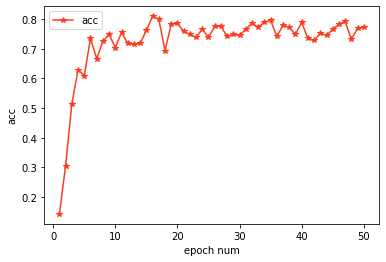

In [99]:
import matplotlib.pyplot as plt
plt.figure()
# X1的分布
plt.plot(epoch_num_list, epoch_acc, label="acc", color="#FF3B1D", marker='*', linestyle="-")
plt.legend()
plt.xlabel("epoch num")
plt.ylabel("acc")
plt.savefig("mlp_acc.png")